## Search Tree -> Similar Words

### Prepare Data

In [1]:
import pandas as pd

In [2]:
# Set input file path
csv_path = './data/pre_data_01.csv'

In [3]:
# Load csv file
df = pd.read_csv(csv_path)
df.head()

,id,url,title,text
0,13,https://zh.wikipedia.org/wiki?curid=13,数学,数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于...
1,18,https://zh.wikipedia.org/wiki?curid=18,哲学,哲学\n\n哲学（）是研究普遍的、根本的问题的学科，包括存在、知识、价值、理智、心灵、语言等...
2,21,https://zh.wikipedia.org/wiki?curid=21,文學,文学\n\n文学（），在最广泛的意义上，是任何单一的书面作品。\n\n更严格地说，文学写作被...
3,22,https://zh.wikipedia.org/wiki?curid=22,历史,历史\n\n历史（现代汉语词汇，古典文言文称之为史），指人类社会过去的事件和行动，以及对这些...
4,25,https://zh.wikipedia.org/wiki?curid=25,计算机科学,计算机科学\n\n计算机科学（，有时缩写为）是系统性研究信息与计算的理论基础以及它们在计算机...


In [4]:
# Check article number
print('Total Article Number: {}'.format(df.shape[0]))

Total Article Number: 39440


**Take the first 1000 articles for testing**

In [5]:
articles = df['text'].tolist()[:1000]

In [6]:
# View the content of first article 
articles[0][:500]

'数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于形式科学的一种。数学透过抽象化和逻辑推理的使用，由计数、计算、量度和对物体形状及运动的观察而产生。数学家们拓展这些概念，为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理。\n\n基础数学的知识与运用总是个人与团体生活中不可或缺的一环。对数学基本概念的完善，早在古埃及、美索不达米亚及古印度内的古代数学文本便可观见，而在古希腊那里有更为严谨的处理。从那时开始，数学的发展便持续不断地小幅进展，至16世纪的文艺复兴时期，因为新的科学发现和数学革新两者的交互，致使数学的加速发展，直至今日。数学并成为许多国家及地区的教育范畴中的一部分。\n\n今日，数学使用在不同的领域中，包括科学、工程、医学、经济学和金融学等。数学对这些领域的应用通常被称为应用数学，有时亦会激起新的数学发现，并导致全新学科的发展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。数学家也研究纯数学，就是数学本身的实质性内容，而不以任何实际应用为目标。虽然许多研究以纯数学开始，但其过程中也发现许多应用之处。\n'

**Build function to filter only words and numbers with Regualr Expression**

In [7]:
import re

In [8]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [9]:
articles = [token(str(art)) for art in articles]

In [10]:
articles = [''.join(art) for art in articles]

In [11]:
# View the content of first article after filtering
articles[0][:500]

'数学数学是利用符号语言研究数量结构变化以及空间等概念的一门学科从某种角度看属于形式科学的一种数学透过抽象化和逻辑推理的使用由计数计算量度和对物体形状及运动的观察而产生数学家们拓展这些概念为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理基础数学的知识与运用总是个人与团体生活中不可或缺的一环对数学基本概念的完善早在古埃及美索不达米亚及古印度内的古代数学文本便可观见而在古希腊那里有更为严谨的处理从那时开始数学的发展便持续不断地小幅进展至16世纪的文艺复兴时期因为新的科学发现和数学革新两者的交互致使数学的加速发展直至今日数学并成为许多国家及地区的教育范畴中的一部分今日数学使用在不同的领域中包括科学工程医学经济学和金融学等数学对这些领域的应用通常被称为应用数学有时亦会激起新的数学发现并导致全新学科的发展例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考数学家也研究纯数学就是数学本身的实质性内容而不以任何实际应用为目标虽然许多研究以纯数学开始但其过程中也发现许多应用之处西方语言中数学一词源自于古希腊语的其有学习学问科学以及另外还有个较狭义且技术性的意思数学'

**Cut Words with Jieba**

In [12]:
import jieba

In [13]:
def cut(string):
    return ' '.join(jieba.cut(string))

In [14]:
articles = [cut(art) for art in articles]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jc/l9vx9tp979g0tm976wjrgwkr0000gn/T/jieba.cache
Loading model cost 0.838 seconds.
Prefix dict has been built succesfully.


In [15]:
# View the content of first article after cutting words
articles[0][:500]

'数学 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 量度 和 对 物体 形状 及 运动 的 观察 而 产生 数学家 们 拓展 这些 概念 为了 公式化 新 的 猜想 以及 从 选定 的 公理 及 定义 中 建立 起 严谨 推导 出 的 定理 基础 数学 的 知识 与 运用 总是 个人 与 团体 生活 中 不可或缺 的 一环 对 数学 基本概念 的 完善 早 在 古埃及 美索不达米亚 及 古印度 内 的 古代 数学 文本 便 可观 见 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 至 16 世纪 的 文艺复兴 时期 因为 新 的 科学 发现 和 数学 革新 两者 的 交互 致使 数学 的 加速 发展 直至 今日 数学 并 成为 许多 国家 及 地区 的 教育 范畴 中 的 一部分 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 数学 对'

In [16]:
# Save the result to txt file
with open('./data/article-sentences-cut_01.txt', 'w') as f:
    for art in articles:
        f.write(art + '\n')

### Get Similar Words By Gensim Word2Vec

在gensim中，word2vec 相关的API都在包gensim.models.word2vec中。和算法有关的参数都在类gensim.models.word2vec.Word2Vec中。算法需要注意的参数有：

1. `sentences`: 我们要分析的语料，可以是一个列表，或者从文件中遍历读出。后面我们会有从文件读出的例子。

2. `size`: 词向量的维度，默认值是100。这个维度的取值一般与我们的语料的大小相关，如果是不大的语料，比如小于100M的文本语料，则使用默认值一般就可以了。如果是超大的语料，建议增大维度。

3. `window`: 即词向量上下文最大距离，这个参数在我们的算法原理篇中标记为c，window越大，则和某一词较远的词也会产生上下文关系。默认值为5。在实际使用中，可以根据实际的需求来动态调整这个window的大小。如果是小语料则这个值可以设的更小。对于一般的语料这个值推荐在[5,10]之间。

4. `sg`: 即我们的word2vec两个模型的选择了。如果是0， 则是CBOW模型，是1则是Skip-Gram模型，默认是0即CBOW模型。

5. `hs`: 即我们的word2vec两个解法的选择了，如果是0， 则是Negative Sampling，是1的话并且负采样个数negative大于0， 则是Hierarchical Softmax。默认是0即Negative Sampling。

6. `negative`: 即使用Negative Sampling时负采样的个数，默认是5。推荐在[3,10]之间。这个参数在我们的算法原理篇中标记为neg。

7. `cbow_mean`: 仅用于CBOW在做投影的时候，为0，则算法中的xw为上下文的词向量之和，为1则为上下文的词向量的平均值。在我们的原理篇中，是按照词向量的平均值来描述的。个人比较喜欢用平均值来表示xw,默认值也是1,不推荐修改默认值。

8. `min_count`: 需要计算词向量的最小词频。这个值可以去掉一些很生僻的低频词，默认是5。如果是小语料，可以调低这个值。

9. `iter`: 随机梯度下降法中迭代的最大次数，默认是5。对于大语料，可以增大这个值。

10. `alpha`: 在随机梯度下降法中迭代的初始步长。算法原理篇中标记为η，默认是0.025。

11. `min_alpha`: 由于算法支持在迭代的过程中逐渐减小步长，min_alpha给出了最小的迭代步长值。随机梯度下降中每轮的迭代步长可以由iter，alpha， min_alpha一起得出。对于大语料，需要对alpha, min_alpha,iter一起调参，来选择合适的三个值。

In [17]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

**Create Model**

In [18]:
articles_word2vec = Word2Vec(LineSentence('./data/article-sentences-cut_01.txt'),
                            sg=0, min_count=1, size=100, window=5, workers=8)

**Test**

In [19]:
articles_word2vec.wv.most_similar('唐朝', topn=10)

[('清朝', 0.9769458770751953),
 ('汉朝', 0.961111307144165),
 ('东汉', 0.9574472904205322),
 ('明朝', 0.9525812864303589),
 ('王朝', 0.9488171339035034),
 ('五代十国', 0.9329332709312439),
 ('罗马帝国', 0.9307292699813843),
 ('鸦片战争', 0.9306935667991638),
 ('元朝', 0.9245981574058533),
 ('南北朝', 0.9226831197738647)]

**More Data, Better Results**
- cut words
- We need merge the general dataset like wikipedia with specific domain dataset like news data

In [20]:
from collections import defaultdict

In [21]:
def get_related_words(init_words, model, max_size, top_n):
    """
    @ init_words: initial words we already know
    @ model: the word2vec model
    @ max_size: the maximum number of words need to see
    @ top_n: the number of top similar words
    """
    
    unseen_list = init_words
    
    seen = defaultdict(int)
    
    while unseen_list and len(seen) < max_size:
        node = unseen_list.pop(0)
        
        sub_nodes = [w for w, s in model.wv.most_similar(node, topn=top_n)]
        
        unseen_list += sub_nodes
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    seen_rank = sorted(seen.items(), key=lambda x: x[1], reverse=True)
    
    return seen_rank

**Test**

In [22]:
# View totlay vovabulary number in corpus
len(articles_word2vec.wv.vocab)

137715

In [23]:
related_words = get_related_words(['唐朝', '唐太宗'], articles_word2vec, max_size=1000, top_n=10)

In [24]:
related_top_ten = related_words[: 10]
print(related_top_ten)

[('罗马帝国', 266), ('五代十国', 198), ('隋唐', 164), ('奥斯曼帝国', 162), ('秦朝', 158), ('元朝', 152), ('清末', 146), ('南诏', 134), ('中后期', 132), ('汉朝', 128)]


## TF_IDF Key Words

**Term Frequency_Inverse Document Frequency**

$$ tf_{t,d} = \frac{n_{t,d}}{\sum_{1}^{k}n_{k,d}}$$<br>
$$ idf_t = \log_{10}{\frac{N}{df_t}}$$

$$ {tf-idf}_{t,d} = tf_{t,d} \times idf_t $$

- $ n_{t,d} $ : term $t$ frequency in document $d$
- $ \sum_{1}^{k}n_{k,d} $ : sum of all terms frequency in document $d$
- $ N $ : total number of documents
- $ df_t $ : number of documents which include term $t$

In [25]:
articles[0][:500]

'数学 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 量度 和 对 物体 形状 及 运动 的 观察 而 产生 数学家 们 拓展 这些 概念 为了 公式化 新 的 猜想 以及 从 选定 的 公理 及 定义 中 建立 起 严谨 推导 出 的 定理 基础 数学 的 知识 与 运用 总是 个人 与 团体 生活 中 不可或缺 的 一环 对 数学 基本概念 的 完善 早 在 古埃及 美索不达米亚 及 古印度 内 的 古代 数学 文本 便 可观 见 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 至 16 世纪 的 文艺复兴 时期 因为 新 的 科学 发现 和 数学 革新 两者 的 交互 致使 数学 的 加速 发展 直至 今日 数学 并 成为 许多 国家 及 地区 的 教育 范畴 中 的 一部分 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 数学 对'

### Calculate Term Frequency

In [26]:
def tf(word, document):
    """
    Gets the term frequency of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)/ len(document)

**Test term '的' frequency in firts article**

In [27]:
tf('数学', articles[0])

0.013079932923420905

### Calculate Inverse Document Frequency

In [28]:
def document_frequency(word, corpus):
    return sum(1 for d in corpus if word in d)

**Test term '数学' document frequency in corpus**

In [29]:
document_frequency('数学', articles)

114

In [30]:
import math

In [31]:
def idf(word, corpus):
    """Gets the inversed document frequency"""
    return math.log10(len(corpus) / document_frequency(word, corpus))

**Test**

In [32]:
idf('数学', articles)

0.9430951486635274

In [34]:
idf('的', articles)

0.04914854111145356

### Calculate TF_IDF

In [35]:
def get_keywords_of_a_document(document, corpus):
    # Get unique words in a document
    words = set(document.split())
    
    tf_idf = [
        (w, tf(w, document) * idf(w, corpus)) for w in words
    ]
    
    tf_idf_rank = sorted(tf_idf, key=lambda x: x[1], reverse=True)
    
    return tf_idf_rank

**Test**

In [36]:
get_keywords_of_a_document(articles[0], articles)[:10]

[('数学', 0.012335621284922604),
 ('数学家', 0.0031247798139564065),
 ('领域', 0.0025082953107757842),
 ('公理', 0.0024594745667970933),
 ('纯数学', 0.0021121062079767616),
 ('科学', 0.0020976797524307703),
 ('定理', 0.0019505058634954656),
 ('几何', 0.0017326203826392968),
 ('的', 0.0017033032693740194),
 ('研究', 0.0016503017180880518)]

In [38]:
get_keywords_of_a_document(articles[1], articles)[:10]

[('哲学', 0.007055658702075845),
 ('柏拉图', 0.0023660800470852715),
 ('形而上学', 0.00197108132781157),
 ('西方哲学', 0.0019542758187639283),
 ('哲学家', 0.0018807317849405178),
 ('黑格尔', 0.0018443832116174356),
 ('的', 0.001678752485372525),
 ('笛卡尔', 0.0016125485597009456),
 ('康德', 0.0015139600372767025),
 ('现象学', 0.0013492809473951367)]

**Command for viewing cost time in function**

In [37]:
# %prun get_keywords_of_a_document(articles[0], articles)[:10]

## WordCloud

In [44]:
import wordcloud

In [45]:
# Load font file
wc = wordcloud.WordCloud('./data/SourceHanSerifSC-Regular.otf')

In [114]:
city_article_keywords = get_keywords_of_a_document(articles[155], articles)[: 40]

In [115]:
city_article_keywords_dict = {w: score for w, score in city_article_keywords}

In [116]:
import matplotlib.pyplot as plt

%matplotlib inline

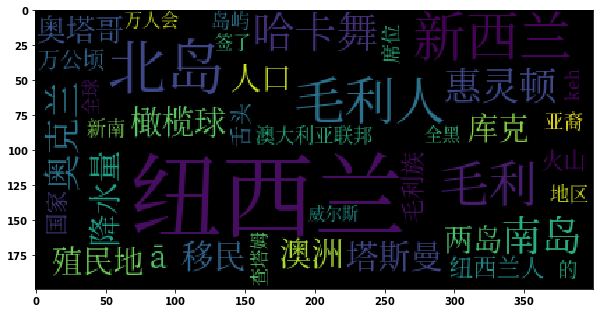

In [117]:
plt.figure(figsize=(10, 12))
plt.imshow(wc.generate_from_frequencies(city_article_keywords_dict))
plt.show()

**Plot Wordcloud With Image Mask**

In [118]:
from PIL import Image
import numpy as np

In [124]:
city_mask = np.array(Image.open('./data/mask.png'))

In [120]:
wordcloud_with_mask = wordcloud.WordCloud(
    font_path='./data/SourceHanSerifSC-Regular.otf', 
    mask=city_mask
    )

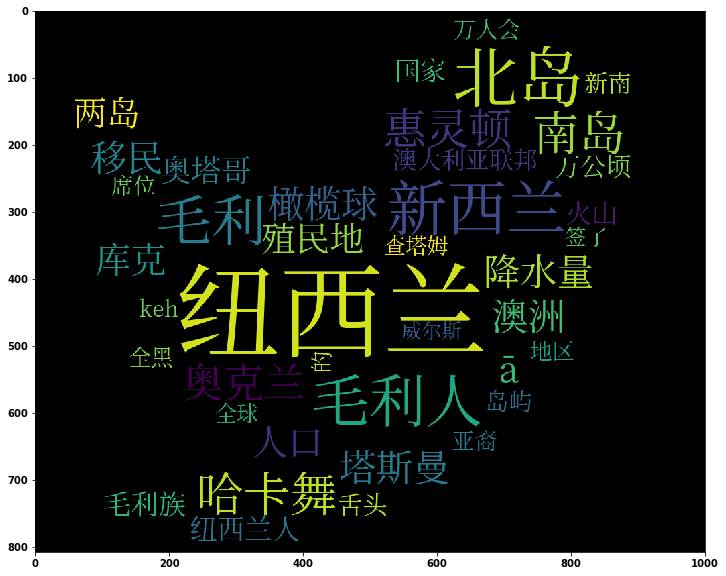

In [121]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_with_mask.generate_from_frequencies(city_article_keywords_dict))
plt.show()

## TF_IDF Vectorized

### Cosine Similarity

![](https://github.com/pchen12567/picture_store/blob/master/AI_For_NLP/cosine_similarity.jpg?raw=true)

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [144]:
vectorized = TfidfVectorizer() # Could set argument @max_features, eg.10000

In [145]:
# Vectoring the corpus
X = vectorized.fit_transform(articles)

In [151]:
type(X)

scipy.sparse.csr.csr_matrix

In [158]:
print('Number of total documents is: {}.\nNumber of total features is: {}.'.format(X.shape[0], X.shape[1]))

Number of total documents is: 1000.
Number of total features is: 132723.


In [159]:
# vectorized.vocabulary_

In [291]:
# Get the positions which values are not zero for first document
np.where(X.toarray()[0])

(array([  1332,   1527,   1919,   1980,   1995,   2000,   2004,   2068,
          2100,   2186,   2197,   2202,   2221,   2529,   9714,  10485,
         10687,  11832,  12466,  13193,  14300,  14322,  14387,  14408,
         14454,  14472,  14502,  14851,  14911,  14929,  14985,  15008,
         15013,  15068,  15087,  15151,  15156,  15157,  15197,  15234,
         15247,  15248,  15259,  15310,  15363,  15368,  15434,  15577,
         15728,  15827,  15900,  16303,  16363,  16645,  16800,  16881,
         17153,  17158,  17197,  17204,  17252,  17264,  17287,  17500,
         17517,  17621,  17675,  17733,  17846,  17907,  17971,  17992,
         17993,  18008,  18134,  18181,  18279,  18706,  18801,  18965,
         18983,  19002,  19081,  19109,  19110,  19157,  19504,  19841,
         19904,  19911,  19915,  20108,  20204,  20410,  20513,  20886,
         20917,  21055,  21118,  21256,  21286,  21333,  21696,  22118,
         22230,  22394,  22469,  22575,  22614,  22616,  22645, 

In [156]:
X.toarray()[0][1332]

0.014849608973509388

In [161]:
import random

In [242]:
document_id_1, document_id_2 = random.randint(0,1000), random.randint(0,1000)
print(document_id_1)
print(document_id_2)

350
880


In [243]:
articles[document_id_1][:1000]

'阿基米德 阿基米德 希腊化 时代 的 数学家 物理学家 发明家 工程师 天文学家 出 生于 西西里岛 的 锡拉库 扎 据说 他 在 亚 历山卓 求学 时期 发明 了 阿基米德 式 螺旋 抽水机 今天 的 埃及 仍 在 使用 第二次 布匿 战争 时 罗马 大军 围攻 锡拉库 扎 阿基米德 死 于 罗马 士兵 之手 阿基米德 对 数学 和 物理学 的 影响 极为 深远 被 视为 古希腊 最 杰出 的 科学家 美国 数学 史学家 ET 贝尔 在 其 数学 大师 MenofMathematics 一书 中将 阿基米德 与 牛顿 和 高斯 并 列为 有史以来 最 伟大 的 三位 数学家 阿基米德 于出 生于 意大利 南部 海岸 的 港口城市 锡拉库 扎 当时 是 大 希腊 的 自治 殖民地 其 生日 是 根据 历史学家 的 阿基米德 活 了 75 岁 的 说法 推算 的 依照 阿基米德 的 阿基米德 之 父 名为 菲 迪亚斯 希腊文 Φ ε ι δ ί α ς Pheidias 是 一个 天文学家 除此之外 我们 对 其 一无所知 普鲁塔克 于 名人传 中 写道 阿基米德 与 锡拉库 扎 的 统治者 希伦 二世 有 血缘关系 其友 赫拉克利特 Heracleides 为 阿基米德 撰写 的 传记 已经 失传 使 他 生活 点滴 成为 谜团 我们 无从 得知 他 是否 结婚 或育 有 后代 他 在 年轻 时 可能 曾 在 古埃及 亚历山大港 学习 科农 和 埃拉托 斯特尼 是 他 的 同辈 他 把 科农 称作 是 他 的 朋友 他 在 另 两本 着 作 和 之 引言 里 提到 了 埃拉托 斯特尼 阿基米德 死 于 第二次 布匿 战争 中 当时 马克 卢斯 将军 领导 的 罗马 军队 在 历时 两年 攻城战 后 下 占领 了 锡拉库 扎城 根据 来自 普鲁塔克 的 知名 说法 当 城市 被 占领 时 阿基米德 还 在 思考 一个 问题 一名 罗马 士兵 要求 他 去 面见 马克 卢斯 将军 他 拒绝 了 说 要 完成 这个 难题 士兵 愤怒 难当 挥剑 杀死 了 阿基米德 关于 阿基米德 之死 普鲁塔克 的 一个 说法 认为 他 在 尝试 向 罗马 士兵 投降 的 时候 死亡 按照 这个 故事 阿基米德 当时 携带 着 数学 仪器 士兵 以为 是 什么 贵重 物件 因而 杀 了

In [244]:
articles[document_id_2][:1000]

'莫斯科 莫斯科 是 俄罗斯 首都 与 最大 都市 以及 莫斯科州 首府 为 俄罗斯 全国 政治经济 科学 文化 及 交通 的 中心 面积 2510 平方公里 与 莫斯科州 和 卡卢加 州 接壤 城区 人口 约 1200 万是 欧洲 人口 第二 多 的 城市 仅次于 伊斯坦布尔 佔 俄罗斯 总人口 的 110 莫斯科 沿 莫斯科 河而建 由 1147 年 的 莫斯科 大公 时代 开始 在 沙皇 俄国 苏联 及 今日 的 俄罗斯联邦 时代 都 一直 担任 着 国家 首都 的 角色 它 是 历史悠久 的 克里姆林宫 所在地 并 做 为 上述 政权 的 总部 是 俄罗斯 数个 被 列入 世界遗产 的 建筑群 之一 莫斯科 得名 于 如今 穿越 整个 城市 的 莫斯科 河而 莫斯科 河 的 名字 来源 有 三种 解释 分别 是 低 湿地 斯拉夫 语牛 渡口 芬兰 乌戈尔 语 密林 卡巴尔达 语 莫斯科 的 建立 被 认为 是 在 1147 年 当时 尤里 多尔戈鲁基 大公 在 争夺 基辅 王位 的 一次 战争 后 战斗 获胜 后 他 邀请 了 自己 的 盟友 切尔尼戈夫 公爵 斯维亚 托 斯拉夫 奥利 戈 维奇 去 到 了 弗拉基米尔 公国 边境 上 的 一个 名叫 莫斯科 地点 庆祝 自己 的 胜利 这 也 是 史书 上 第一次 提及 莫斯科 这个 地方 而后 俄罗斯 人 便 把 这 一年 作为 莫斯科 的 诞生 的 日子 不过 当时 的 莫斯科 还是 一个 小 村庄 1156 年 尤里 多尔 戈鲁 大公 在 莫斯科 巩固 了 防御 措施 由此 莫斯科 便 有 了 一个 防御性 的 要塞 的 地位 1263 年 莫斯科 大公国 建立 1276 年 首任 莫斯科 大公 达尼 埃尔立 莫斯科 为 首府 1238 年 1480 年 期间 莫斯科 被 金帐 汗国 统治 15 世纪 俄国人 以 莫斯科 为 中心 集合 周围 力量 进行 反对 金帐 汗国 统治 的 斗争 并 于 莫斯科 大公 伊凡 三世 时 在 1478 年 最终 统一 了 俄国 建立 了 一个 中央集权 的 国家 国号 为 俄罗斯 沙皇 国而 莫斯科 则 成为 俄国 的 首都 1572 年 莫斯科 被 克里米亚 鞑靼人 袭击 和 和 焚毁 1610 年 被 波兰 将领 斯坦尼斯 瓦夫 若 乌凯 夫斯基 攻陷 遭受 

In [180]:
from scipy.spatial.distance import cosine

In [181]:
def distance(v1, v2):
    return cosine(v1, v2)

In [183]:
distance([1,1], [2,2])

0.0

In [271]:
target_doc = random.randint(0,1000)
print(target_doc)

677


In [272]:
articles[target_doc][:1000]

'刘少奇 刘少奇 谱 名绍选 表字 渭璜 湖南省 宁乡县 人 祖籍 江西 吉水 是 中国 现代史 上 的 重要 政治家 中华人民共和国 主要 缔造者 和 创建人 之一 亦 为 中共 缔造者 中国共产党 和 中华人民共和国 的 主要 领导人 之一 曾任 第一届 全国人大常委会 委员长 和 第二任 第二 至 三届 中华人民共和国 主席 1956 年 至 1966 年间 担任 排名 首位 的 中国共产党中央委员会 副 主席 刘少奇 曾经 被 毛泽东 视作 接班人 选 之一 官方 评价 为 伟大 的 马克思主义者 伟大 的 无产阶级 革命家 政治家 理论家 党和国家 主要 领导人 之一 中华人民共和国 开国元勋 是 以 毛泽东 同志 为 核心 的 党 的 第一代 中央 领导集体 的 重要 成员 刘少奇 早年 曾 领导 安源 路 矿工 人大 罢工 五卅运动 等 工人运动 学生 运动 第一次 国共 内战 时期 在 上海 东北 浙江 等 地 从事 秘密 工作 后 前往 中央苏区 领导 职工 运动 并 参与 长征 1936 年 奉命 前往 天津 组建 中共中央北方局 扩大 中国共产党 在 华北地区 的 影响力 抗日战争 时期 刘少奇 任 中共中央 中原 局 书记 部署 新四军 开辟 华中 根据地 皖南事变 后 他 任 新四军 政治委员 参与 重组 新四军 1943 年 刘少奇 返回 延安 后 担任 中共中央书记处 书记 中共 中央军委 副 主席 进入 中共 核心 决策层 第二次 国共 内战 时期 刘少奇 继续 担任 中央书记处 书记 中央军委 副 主席 兼 总政治部 主任 中共中央 华北局 第一书记 等 职 中华人民共和国 成立 后 刘少奇 主持 土地改革 运动 并 曾 组织 七千 人 大会 领导 中央 经济 改革 先后 任 中共 中央政治局常委 中共中央 副 主席 全国人大常委会 委员长 和 中国 国家 主席 后来 他 反对 中共中央 主席 毛泽东 倡导 的 三面红旗 且 在 四清运动 时 与 毛 不 一致 被 毛 认为 会 威胁 到 自己 的 领导 地位 在 文化大革命 初期 成为 走 资本主义 道路 的 当权派 并 冠以 叛徒 内奸 工贼 进行 批判 1968 年 中共 八届 十 二中全会 决定 将 刘少奇 永远 开除 出党 撤销 党内外 一切 职务 1969 年 中国共产党

In [273]:
distance(X.toarray()[target_doc], X.toarray()[document_id_1])

0.9896204506868338

In [274]:
distance(X.toarray()[target_doc], X.toarray()[document_id_2])

0.9688218003489988

**Search the similar documents with target one**

In [282]:
# Get all distance with target document
X_array = X.toarray()
distance_list = [distance(X_array[target_doc], X_array[i]) for i in range(1000)]

In [286]:
# Rank the distance and get the top ten index
rank_distance_index = np.argsort(distance_list)
print(rank_distance_index[:10])

[677 622 661  65 679 882 479 540 151 857]


**View result**

In [278]:
articles[622][:1000]

'文化大革命 无产阶级 文化大革命 通称 文化大革命 简称 文革 是 一场 于 1966 年 5 月 1976 年 10 月间 在 中华人民共和国 境内 所 发生 的 政治 运动 文革 是 由 时任 中国共产党中央委员会 主席 的 毛泽东 与 中央 文化 革命 小组 自上而下 动员 成千上万 红卫兵 在 中国 大陆 进行 全方位 发动 的 阶级斗争 有 反 文革 人士 认为 官方 鼓励 的 批斗 抄家 及 告密 等 行为 文化 使 中国 传统 文化 与 道德 沦亡 整体 经济 受 严重 影响 受害人 数以千万计 亦 有人 指 不少 文物 都 在 1966 年 6 月 1 日 的 破 四旧 中 遭到 红卫兵 的 蹂躏 时任 国家 主席 刘少奇 十大元帅 的 彭德怀 和 贺龙 等 领导人 被 迫害致死 邓小平 陈云 等 党内 高层 亦 在此期间 被 下放 习仲勋 薄一波 等 人 更 被 打倒 监禁 这场 运动 当时 也 影响 了 阿尔巴尼亚 朝鲜 法国 埃塞俄比亚 和 智利 等 世界 上 一系列 左翼 势力 强大 的 地区 1981 年 中共中央 通过 关于 建国以来 党 的 若干 历史 问题 的 决议 公开 全盘否定 文革 立场 和 态度 是 将 其 定性 为 由 领导者 错误 发动 被 反革命 集团 利用 给 党 国家 和 人民 带来 严重 灾难 的 内乱 造成 全面 而 严重 的 危害 因 其 时间 长 达 十年 之久 故 也 随后 被 称为 十年动乱 或 十年浩劫 不过 在 2018 年 中国 官方 出版 的 历史 教科书 大大 淡化 了 文革 对 国家 的 负面影响 和 毛泽东 的 责任 引起 外界 关注 中共 对 文革 的 定性 是否 有 改变 一般 认为 文革 正式 开始 于 1966 年 5 月 16 日 五一六 通知 出台 是 毛泽东 在 1958 年 前后 的 三面红旗 的 挫败 后 以及 在 反苏修 反美帝 等 口号 的 情况 下以 革命 名义 攻击 温和派 当时 蔑称 走资派 并 重回 党 核心 的 尝试 并 在 日后 一两年 达到高潮 右派 人物 的 影响力 则 多 遭到 剥夺 而 当权派 亦 有 内斗 并 导致 了 原定 接班人 林彪 的 死亡 1978 年 12 月 中共十一届三中全会 在 文革 结束 及 经过 包括 粉碎 四人帮 等 一连

In [279]:
articles[661][:1000]

'毛泽东 毛泽东 字润 之 湖南 湘潭人 马克思列宁主义者 中国共产党 领袖 在 中华人民共和国 被 尊称 为 中国 各族人民 之 领袖 和 导师 中国 现代史 上 重要 的 政治家 战略家 思想家 中国共产党 创始人 之一 中国人民解放军 和 中华人民共和国 的 主要 缔造者 和 领导人 终身 担任 中国共产党中央委员会 主席 中国共产党 中央军事委员会 主席 被 尊称 为 毛泽东 主席 毛主席 中华人民共和国 成立 后 曾 先后 兼任 中央人民政府 主席 暨 人民 革命 军事 委员会 主席 中华人民共和国 主席 暨 国防委员会 主席 中国人民政治协商会议全国委员会 主席 暨 名誉主席 等 职 毛泽东 将 马克思列宁主义 运用 于 中国 革命 和 建设 的 实践 其 理论 成果 被 称为 毛泽东思想 他 主导 或 发动 了 反右 运动 大跃进 文化大革命 等 政治 运动 此外 毛泽东 在 文学 和 书法 方面 也 有 一定 造诣 对 毛泽东 的 评价 历来 褒贬不一 清光绪 十九年 1893 年 11 月 19 日 毛泽东 出 生于 湖南省 长沙 府 湘潭县 韶山冲 今 湖南省 湘潭市 韶山市 他 的 父亲 毛贻昌 是 一名 富农 原籍 江西 吉水 他 的 母亲 文七妹 则 是 普通 农村妇女 毛泽东 8 岁 被 送入 私塾 读书 接受 了 儒家 的 传统 教育 13 岁 之后 的 两年 时间 他 辍学 在家 与 长工 们 一起 种田 对 农民 的 疾苦 深有体会 1910 年 毛泽东 16 岁 时 请 亲戚 说 动 父亲 允许 他 去 洋 学堂 湘乡 县立 东山 小 学堂 上学 在 那里 他 接触 到 了 梁启超 等 维新派 的 改良 思想 1911 年 毛泽东 考入 长沙 的 湘乡 驻省 中学 毛泽东 在 革命党 报纸 上读 到 黄花岗 起义 的 新闻 后 在 学校 张贴 文章 支持 推翻 满清 建立 民国 并 带头 剪掉 辫子 武昌起义 爆发 后 长沙 革命党 率先 响应 起义 毛泽东 投入 革命军 成为 湖南 新军 的 一名 士兵 1912 年 2 月 宣统 退位 毛泽东 认为 其 参军 目的 已 实现 退伍 回 长沙 继续 求学 1912 年 3 月 毛泽东 考取 湖南 公立 高等 商业学校 但 一个月 后 因为 英文 无法 跟上 教学 而 退学 随即 

In [280]:
articles[65][:1000]

'中华人民共和国 历史 中华人民共和国 历史 始于 公元 1949 年 10 月 1 日 的 开国大典 前后 以 1978 年 12 月 中国共产党 十一届三中全会 为 标志 可 分为 以 社会主义 转型 及 阶级斗争 为 主题 的 毛泽东 时代 1949 年 至 1978 年 与 以 现代化 建设 及 改革开放 为 主题 的 邓小平 时代 至今 1978 年 至今 中国共产党 是 中华人民共和国 建国以来 唯一 的 执政党 并 坚持 对 全国 武装力量 的 绝对 领导 中国共产党 作为 唯一 的 执政党 对 中华人民共和国 的 政策 与 历史 影响 巨大 中国 社会 经历 一次 由 中央 至 地方 有 其 特色 的 巨大 变革 从 贫穷落后 转变 为 一个 日益 现代化 的 国家 现在 的 中国 贫民 阶层 大幅度 下降 至 12 而 大多数 人民 享有 食品 住房 医疗 等 生活必需品 成为 世界 上 经济 发展 速度 最快 的 发展中国家 1949 年 以前 中国 的 文盲率 高达 80 至今 下降 至约 358 在 中华人民共和国 成立 之前 中国 人民 的 平均寿命 仅为 35 岁 至今 达到 73 岁 比较 第三世界 国家 平均 为 高约 10 岁 部分 沿海 都市 人均 寿命 更 接近 发达国家 水平 中国 的 城乡 医疗保健 系统 主要 集中 在 疾病 的 预防 上 中国 于 1950 年代 末 基本 消灭 血吸虫病 但是 近年 又 有 死灰复燃 趋势 于 1994 年 基本 杜绝 丝虫病 于 1995 年 杜绝 嵴 髓 灰质炎 中国政府 正在 计划 在短期内 根治 麻风病 在 来 年 杜绝 碘 缺乏症 虽然 人口 的 寿命 得到 很大 的 提高 但是 由于 1970 年代 以来 实行 的 计划生育 政策 中国 的 人口 增长率 正在 稳步 下降 因此 中国 很大 程度 的 解决 了 人口过剩 和 营养不良 的 问题 在 外交 上 1949 年 后 的 中国 变得 更为 独立自主 虽然 在 长达 22 年 的 时间 里 遭受 到 美国 及 苏联 两 大国 的 封锁 被 联合国 排除 之外 却 依然 被 视为 冷战 中 少数几个 独立 于 两 阵营 外 的 国家 中 最 重要 的 一个 随着 经济 实力 的 发展 中国 也 日渐 成为 全球 受 瞩目 

## Boolean Search

In [293]:
bin(49)

'0b110001'

In [294]:
bin(38)

'0b100110'

In [295]:
49 & 38

32

In [296]:
bin(32)

'0b100000'

### Build Search Engine

Input: Words, Corpus<br>
Output: Documents

In [346]:
def naive_search(keywords, corpus):
    document_ids = [i for i, doc in enumerate(corpus) if all(word in doc for word in keywords)]
    return set(document_ids)
    # O(Corpus * Keywords)

In [298]:
len(articles)

1000

**Input words --> The documents which contain these words**

In [301]:
X.shape

(1000, 132723)

In [313]:
transposed_x = X.transpose().toarray()

In [314]:
transposed_x.shape

(132723, 1000)

In [316]:
word_2_id = vectorized.vocabulary_

In [323]:
word_2_id['数学']

74666

In [318]:
id_2_word = {i: w for w, i in word_2_id.items()}

In [321]:
id_2_word[74666]

'数学'

In [322]:
np.where(transposed_x[74666])

(array([  0,   1,   4,   8,   9,  10,  12,  14,  15,  16,  17,  19,  21,
         23,  33,  35,  39,  49,  50,  59,  62,  63,  64,  66,  74,  75,
         80,  85,  86,  87,  89,  98, 123, 144, 146, 147, 156, 157, 160,
        164, 172, 176, 183, 197, 244, 248, 255, 256, 260, 341, 350, 391,
        412, 433, 445, 454, 465, 468, 469, 474, 476, 478, 482, 484, 488,
        503, 514, 517, 519, 574, 596, 611, 636, 637, 657, 667, 698, 699,
        702, 712, 756, 806, 830, 853, 862, 863, 885, 906, 913, 922, 955,
        956, 972, 988, 993, 994, 995]),)

In [324]:
from functools import reduce

In [325]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [326]:
from operator import and_

In [327]:
reduce(and_, [d1, d2, d3])

{3}

In [390]:
def search_engine(query):
    '''
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    '''
    words = query.split()
    
    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
        set(np.where(transposed_x[index])[0]) for index in candidates_ids
    ]
    
    merged_documents_ids = reduce(and_, documents_ids)
    # Could know the documents which contain these words
    
    return  merged_documents_ids

In [399]:
%%time
print(search_engine('美国 历史 数学家'))

{547, 132, 519, 596, 474, 157, 350}
CPU times: user 1.5 ms, sys: 864 µs, total: 2.36 ms
Wall time: 2.05 ms


In [400]:
%%time
print(naive_search('美国 历史 数学家'.split(), articles))

{547, 132, 519, 830, 596, 474, 157, 350}
CPU times: user 11.7 ms, sys: 2.37 ms, total: 14.1 ms
Wall time: 22.5 ms


In [401]:
def search_engine(query):
    '''
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    '''
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    
    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
        set(np.where(transposed_x[index])[0]) for index in candidates_ids
    ]
    
    merged_documents_ids = reduce(and_, documents_ids)
    # Could know the documents which contain these words
    
    X_array = X.toarray()
    sorted_documents_ids = sorted(merged_documents_ids, key=lambda i: distance(query_vec, X_array[i]))
    
    return sorted_documents_ids

In [423]:
%%time
print(search_engine('美国 历史 数学家'))

[474, 350, 157, 596, 519, 132, 547]
CPU times: user 197 ms, sys: 296 ms, total: 493 ms
Wall time: 806 ms


In [424]:
articles[474][:1000]

'约翰 内斯 开普勒 约翰 内斯 开普勒 ˈ k ʰ ɛ pl ɐ 德国 天文学家 数学家 开普勒 是 十七世纪 科学 革命 的 关键人物 他 最为 人知 的 成就 为 开普勒 定律 这是 稍后 天文学家 根据 他 的 着 作新 天文学 世界 的 和谐 哥白尼 天文学 概要 萃取 而成 的 三条 定律 这些 杰作 对 艾萨克 牛顿 影响 极大 启发 牛顿 后来 想 出 牛顿 万有引力 定律 在 他 的 职业生涯 中 开普勒 曾 在 奥地利 格拉茨 的 一家 神学院 担任 数学教师 成为 汉斯 乌尔里 奇艾根 伯格 亲王 HansUlrichvonEggenberg 的 同事 后来 他成 了 天文学家 第谷 布拉赫 的 助手 并 最终 成为 皇帝 鲁道夫 二世 及其 两任 继任者 马蒂亚 斯 和 费迪南 二世 的 皇家 数学家 他 还 曾经 在 奥地利 林茨 担任 过 数学教师 及 华伦斯 坦 将军 的 顾问 此外 他 在 光学 领域 做 了 基础性 的 工作 发明 了 一种 改进型 的 折光 式 望远镜 开普勒 望远镜 并 提及 了 同 时期 的 伽利略 利用 望远镜 得到 的 发现 开普勒 生活 的 年代 天文学 与 占星学 没有 清楚 的 区分 但是 天文学 文科 中 数学 的 分支 与 物理学 自然哲学 的 分支 却 有着 明显 的 区分 因为 宗教信仰 克卜勒 将 宗教 论点 和 理由 写进 他 的 作品 因为 相信 上帝 用 智慧 创造 世界 人 只要 透过 自然 理性 之光 也 可 理解 上帝 创造 的 计画 开普勒 将 他 的 新 天文学 描述 为 天体 物理学 到 亚里士多德 的 形而上学 的 旅行 亚里士多德 宇宙论 的 补充 通过 将 天文学 作为 通用 数学 物理学 的 一部分 改变 古代 传统 的 物理 宇宙学 约翰 内斯 开普勒 于 1571 年 12 月 27 日 也 就是 当年 的 圣若望 庆日 在 帝国 自由 城 魏尔德 尔 斯塔特 今 德国 巴登 符腾堡 州 的 一部分 位于 斯图加特 市中心 以西 30km 出生 在 他 前面 有 两个 哥哥 和 一个 姐姐 他 的 祖父 西 博尔德 开普勒 SebaldK 曾经 是 这个 城镇 的 市长 但是 约翰 内斯 开普勒 出生 时 开普勒 家族 的 家业 已经 开始 衰落 他 的 父亲 

In [426]:
articles[547][:1000]

'世界语 世界语 又称 希望 语 因为 Esperanto 在 该 语言 中 的 意思 为 希望 者 旧译 万国 新语 爱斯 不难 读是 最为 广泛 使用 的 人工 语言 波兰 犹太人 眼科医生 柴门 霍夫 在 对 其 进行 了 十年 的 创作 工作 后于 1887 年 出版 第一 本书 创立 了 这个 语言 的 基础 世界语 的 命名 来自 于 希望 博士 这是 柴门 霍夫 出版 第一 本书 时所 使用 的 笔名 最早 柴门 霍夫 给 这门 语言 取 的 名字 LaLingvoInternacia 意为 国际 语言 在 第一 本书 中 柴门 霍夫 写道 自己 对 世界语 有 三个 主要 目标 总之 世界语 的 定位 是 国际 辅助 语言 不是 用来 代替 世界 上 已经 存在 的 语言 柴门 霍夫 原本 想要 创立 一种 简单 易学 而 灵活 的 语言 一种 普世 的 第二语言 用来 促进 世界 和平 并且 帮助 世界各地 的 人民 了解 他国 的 文化 而 现在 一些 世界语 者 仍然 抱 着 这样 的 期望 根据 民族语言 网 的 统计 世界各地 一共 有 大约 两百万 人 在 某种程度 上会 说 世界语 其中 包括 大约 2000 名以 世界语 为 母语 的 人 世界语 是 目前 唯一 有 母语 人士 的 人工 语言 国际 世界语 协会 在 全球 120 个 国家 中有 大约 5500 个 成员 其中 在 欧洲 东亚 及 北美 的 成员 最 多 世界语 维基百科 至今已有 大约 个 条目 是 第 32 大 维基百科 曾 在 2005 年 排名第 32 也 是 最大 的 人造 语言 维基百科 至于 网上 学习 世界语 的 平台 lernu 是 最 受欢迎 的 平台 之一 在 2013 年 公布 有 15 万个 注册 用户 每个 月 也 有 大约 15 至 20 万个 访客 2015 年 5 月 28 日多 邻国 增添 了 通过 英语 学习 世界语 的 课程 隔年 10 月 26 日 通过 西班牙语 学习 世界语 的 课程 也 加入 了 多 邻国 外语 课程 的 行列 2017 年 5 月 27 日止 在 多 邻国 网站 上 开始 学习 世界语 的 人 超过 一百万 世界语 有 文学作品 歌曲 和 电影 可说 在 短短的 一个多 世纪 内 衍生 了 一种 独特 

In [431]:
result_ids = search_engine('美国 历史 数学家')

for i, _id in enumerate(result_ids):
    print('## Search Result {}'.format(i+1))
    print(df['text'][_id])
    print('#'*50)

## Search Result 1
约翰内斯·开普勒

约翰内斯·开普勒（ [ˈkʰɛplɐ]，），德国天文学家、数学家。开普勒是十七世纪科学革命的关键人物。他最为人知的成就为开普勒定律，这是稍后天文学家根据他的着作《新天文学》、《世界的和谐》、《哥白尼天文学概要》萃取而成的三条定律。这些杰作对艾萨克·牛顿影响极大，启发牛顿后来想出牛顿万有引力定律。

在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家数学家。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。

开普勒生活的年代，天文学与占星学没有清楚的区分，但是天文学（文科中数学的分支）与物理学（自然哲学的分支）却有着明显的区分。因为宗教信仰，克卜勒将宗教论点和理由写进他的作品。因为相信上帝用智慧创造世界，人只要透过自然理性之光，也可理解上帝创造的计画。。开普勒将他的新天文学描述为“天体物理学”、“到亚里士多德的《形而上学》的旅行”、“亚里士多德宇宙论的补充”、通过将天文学作为通用数学物理学的一部分改变古代传统的物理宇宙学。

约翰内斯·开普勒于1571年12月27日，也就是当年的圣若望庆日，在帝国自由城魏尔德尔斯塔特（今德国巴登-符腾堡州的一部分，位于斯图加特市中心以西30km）出生，在他前面有两个哥哥和一个姐姐。他的祖父西博尔德·开普勒（Sebald K.）曾经是这个城镇的市长，但是约翰内斯·开普勒出生时，开普勒家族的家业已经开始衰落。他的父亲海因里希·开普勒（Heinrich K.）为了营生，当了一名危险的雇佣兵，在约翰内斯五岁的时候就离开了家庭，据说后来死于荷兰的“八十年战争”。约翰内斯的母亲凯瑟琳那·古尔登曼（K. Guldenmann）是一名旅店老板的女儿，同时是一名医生和草药商。约翰内斯是早产儿，孩提时体弱多病。然而，他超常的数学才能经常给他外祖父旅馆内的客人留下深刻的印象。

他在很早的年纪就接触到并喜欢上了天文学，而这种喜欢贯穿了他的一生。在他6岁时，

In [435]:
import re

In [436]:
help(re.compile)

Help on function compile in module re:

compile(pattern, flags=0)
    Compile a regular expression pattern, returning a Pattern object.



In [437]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [438]:
pat = r'(新闻|官员)'

In [439]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [440]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [441]:
get_query_pat('美国 历史 数学家')

re.compile(r'(美国|历史|数学家)', re.UNICODE)

In [442]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document)

In [449]:
temp = '''在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家数学家。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。
'''

In [450]:
print(temp)

在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家数学家。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。



In [451]:
highlight_keywords(get_query_pat('美国 历史 数学家'), temp)

'在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家**数学家**。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。\n'

In [454]:
def search_engine_with_pretty_print(query):
    result_ids = search_engine(query)

    for i, _id in enumerate(result_ids):
        print('## Search Result {}'.format(i+1))
        
        content = df['text'][_id]
        content = highlight_keywords(get_query_pat(query), content)
        print(content)
        print('#'*50)

In [455]:
search_engine_with_pretty_print('美国 历史 数学家')

## Search Result 1
约翰内斯·开普勒

约翰内斯·开普勒（ [ˈkʰɛplɐ]，），德国天文学家、**数学家**。开普勒是十七世纪科学革命的关键人物。他最为人知的成就为开普勒定律，这是稍后天文学家根据他的着作《新天文学》、《世界的和谐》、《哥白尼天文学概要》萃取而成的三条定律。这些杰作对艾萨克·牛顿影响极大，启发牛顿后来想出牛顿万有引力定律。

在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家**数学家**。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。

开普勒生活的年代，天文学与占星学没有清楚的区分，但是天文学（文科中数学的分支）与物理学（自然哲学的分支）却有着明显的区分。因为宗教信仰，克卜勒将宗教论点和理由写进他的作品。因为相信上帝用智慧创造世界，人只要透过自然理性之光，也可理解上帝创造的计画。。开普勒将他的新天文学描述为“天体物理学”、“到亚里士多德的《形而上学》的旅行”、“亚里士多德宇宙论的补充”、通过将天文学作为通用数学物理学的一部分改变古代传统的物理宇宙学。

约翰内斯·开普勒于1571年12月27日，也就是当年的圣若望庆日，在帝国自由城魏尔德尔斯塔特（今德国巴登-符腾堡州的一部分，位于斯图加特市中心以西30km）出生，在他前面有两个哥哥和一个姐姐。他的祖父西博尔德·开普勒（Sebald K.）曾经是这个城镇的市长，但是约翰内斯·开普勒出生时，开普勒家族的家业已经开始衰落。他的父亲海因里希·开普勒（Heinrich K.）为了营生，当了一名危险的雇佣兵，在约翰内斯五岁的时候就离开了家庭，据说后来死于荷兰的“八十年战争”。约翰内斯的母亲凯瑟琳那·古尔登曼（K. Guldenmann）是一名旅店老板的女儿，同时是一名医生和草药商。约翰内斯是早产儿，孩提时体弱多病。然而，他超常的数学才能经常给他外祖父旅馆内的客人留下深刻的印象。

他在很早的年纪就接触到并喜欢上了天文学，而这种喜欢贯穿了他的一

In [456]:
from IPython.display import display, Markdown

In [460]:
def search_engine_with_pretty_print(query):
    result_ids = search_engine(query)

    for i, _id in enumerate(result_ids):
        title = '## Search Result {}'.format(i+1)
        content = df['text'][_id]
        content = highlight_keywords(get_query_pat(query), content)
        
        display(Markdown(title + '\n' + content))
        display(Markdown('----'))

In [461]:
search_engine_with_pretty_print('美国 历史 数学家')

## Search Result 1
约翰内斯·开普勒

约翰内斯·开普勒（ [ˈkʰɛplɐ]，），德国天文学家、**数学家**。开普勒是十七世纪科学革命的关键人物。他最为人知的成就为开普勒定律，这是稍后天文学家根据他的着作《新天文学》、《世界的和谐》、《哥白尼天文学概要》萃取而成的三条定律。这些杰作对艾萨克·牛顿影响极大，启发牛顿后来想出牛顿万有引力定律。

在他的职业生涯中，开普勒曾在奥地利格拉茨的一家神学院担任数学教师，成为汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）的同事。后来，他成了天文学家第谷·布拉赫的助手，并最终成为皇帝鲁道夫二世及其两任继任者马蒂亚斯和费迪南二世的皇家**数学家**。他还曾经在奥地利林茨担任过数学教师及华伦斯坦将军的顾问。此外，他在光学领域做了基础性的工作，发明了一种改进型的折光式望远镜（开普勒望远镜），并提及了同时期的伽利略利用望远镜得到的发现。

开普勒生活的年代，天文学与占星学没有清楚的区分，但是天文学（文科中数学的分支）与物理学（自然哲学的分支）却有着明显的区分。因为宗教信仰，克卜勒将宗教论点和理由写进他的作品。因为相信上帝用智慧创造世界，人只要透过自然理性之光，也可理解上帝创造的计画。。开普勒将他的新天文学描述为“天体物理学”、“到亚里士多德的《形而上学》的旅行”、“亚里士多德宇宙论的补充”、通过将天文学作为通用数学物理学的一部分改变古代传统的物理宇宙学。

约翰内斯·开普勒于1571年12月27日，也就是当年的圣若望庆日，在帝国自由城魏尔德尔斯塔特（今德国巴登-符腾堡州的一部分，位于斯图加特市中心以西30km）出生，在他前面有两个哥哥和一个姐姐。他的祖父西博尔德·开普勒（Sebald K.）曾经是这个城镇的市长，但是约翰内斯·开普勒出生时，开普勒家族的家业已经开始衰落。他的父亲海因里希·开普勒（Heinrich K.）为了营生，当了一名危险的雇佣兵，在约翰内斯五岁的时候就离开了家庭，据说后来死于荷兰的“八十年战争”。约翰内斯的母亲凯瑟琳那·古尔登曼（K. Guldenmann）是一名旅店老板的女儿，同时是一名医生和草药商。约翰内斯是早产儿，孩提时体弱多病。然而，他超常的数学才能经常给他外祖父旅馆内的客人留下深刻的印象。

他在很早的年纪就接触到并喜欢上了天文学，而这种喜欢贯穿了他的一生。在他6岁时，他看到了1577年的大彗星，并写道他“被妈妈带到一处高地看彗星。”在他9岁时，他观察到了另外一次天文事件——1580年的月食，并记录道他记得他被“叫到门外”看月食，月亮“看起来非常红”。然而，童年患上天花，使他的视力衰弱，双手残废，因此限制了他天文观察的能力。

1589年，在经历过文法学校、拉丁学校以及毛尔布劳恩（Maulbronn）的神学院之后，开普勒进入了图宾根大学的图宾根神学院。在那里，他师从维塔斯·穆勒（Vitus Müller）学习哲学及雅各布·黑尔布兰德（J. Heerbrand，菲利普·梅兰希< Philipp Melanchthon>在威登堡的学生）学习神学。雅各布·黑尔布兰德同时还教了另外一名当时还是学生的迈克尔·马斯特林（M. Maestlin）直至他在1590年成为图宾根校长。他证实了自己是一名杰出的**数学家**，并作为一名熟练的占星家给同窗占星，为自己赢得了声誉。在1583-1631年间担任图宾根大学数学教授的迈克尔·马斯特林的教导下，他学习了关于行星运动的托勒密体系与哥白尼学说。在那段时间，他自己成了哥白尼的拥护者。在一次学生辩论中，他从理论和神学两个角度捍卫太阳中心说，坚称太阳是宇宙动力的主要来源。虽然他很想成为一名牧师，在他学业将要结束之际，开普勒被推荐担任格拉茨新教学校（后来成为格拉茨大学）的数学与天文学教师。他于1594年4月接受了该职位，时年23岁。

开普勒的第一部主要天文学作品——《宇宙的神秘》是第一部捍卫哥白尼学说、公开发表的作品。开普勒声称在格拉茨教学的1595年7月19日顿悟，在黄道十二宫图中展示了土星和木星的定期相遇：他意识到规则的多边体按照规定的比率与一个内切圆和外切圆相连，他推测这可能是宇宙的几何基础。在寻找符合已知的天文学发现（甚至使用加入该系统的额外星球）、独特排列的多面体的努力失败后，开普勒开始用立体的多面体进行实验。他发现五个柏拉图多面体中的每一个都可通过球体进行独特的内切和外切；先构建这些多面体，每一个多面体装在一个球体里，这个球体又装在另一个多面体内，每个多面体可产生6层，分别对应6个已知的星球——水星、金星、地球、火星、木星和土星。对这些多面体进行正确的排序——八面体、二十面体、十二面体、四面体和六面体，开普勒发现假设这些星球环绕着太阳，那么球体可以按照一定的间距进行排列，间距对应于每个星球路径的相对尺寸（在已知的天文学观测结果的精确度范围内）。开普勒还发现了一个公式，将每个星球的轨道大小与其轨道周期进行关联：从里星球到外星球，轨道周期的增长率是轨道半径差的两倍。然而，开普勒后来又否定了这个公式，因为这个公式不够精确。

正如他在标题中所表明的，开普勒认为他已经揭示了上帝对宇宙的几何规划。开普勒对于哥白尼学说的许多热情源于他对于物质与精神之间的联系的神学信仰；宇宙本身是上帝的一个影像，太阳对应圣父，星球对应圣子，它们之间的间隔对应圣灵。《宇宙的神秘》的最初手稿包含了一延伸章节，用以调和太阳中心说与貌似支持地球中心说的圣经选段。

在其老师迈克尔·马斯特林的支持下，开普勒获准在图宾根大学理事会发表他的手稿，期间他删掉了《圣经》注释，增加了对哥白尼学说及他的新想法更简单易懂的描述。《宇宙的神秘》于1596年年底发表，开普勒于1597年年初收到了发表的版本，并将其发送给着名的天文学家与赞助人。该书并未被广泛阅读，但是它建立了开普勒作为一名高水平的天文学家的声誉。对赞助人及格拉茨管理他职位的人充满热情的付出，也是他进入赞助体系的关键之路。

开普勒从未放弃柏拉图式的多面体-球体宇宙学说——《宇宙的神秘》，虽然根据他后来的作品，其中的一些细节可能需要修改。他后来的主要作品，通过计算行星轨道的离心率，发现更精确的球体内外尺寸，但在某种意义上都是对该作品的进一步发展。1621年，开普勒发表了他扩展后的第二版《宇宙的神秘》，比第一版长一半，在脚注部分详细记录了在第一版发表之后的25年内他所作的修正与改进。

关于其影响，《宇宙的神秘》可以视为将尼古拉斯·哥白尼在他的作品《天体运行论》中提出的理论进行现代化的重要的第一步。当哥白尼试图在该书中发展日心学说的时候，他用托勒密工具（即周转圆与离心圆）解释星球轨道速度的变化，并继续用地球轨道中心作为参考点，而不是用太阳中心“辅助计算以便使读者不会因偏离托勒密太多而感到混淆。”现代天文学家很大部分归功于《宇宙的神秘》，尽管它的主要论点有瑕疵，“因为它代表了清除哥白尼学说中托勒密理论残留的第一步。”

1595年12月，开普勒被介绍给了芭芭拉·穆勒（B. Müller），一个带着幼小女儿——吉玛·德威纳维尔德（Gemma van Dvijneveldt）的23岁寡妇（结过两次婚），并开始向她求爱。穆勒不但是她前两任丈夫财产的女继承人，同时也是一名成功磨坊老板的女儿。尽管开普勒有着高贵的身份，但是她父亲约布斯特（Jobst）最初也反对他们的婚姻；虽然开普勒继承了他祖父的高贵身份，但是他的贫困使他与芭芭拉不般配。开普勒完成《宇宙的神秘》之后，约布斯特动了怜悯之心，但是这个婚约差点告吹，因为开普勒外出专注于出版的各项事宜。然而，帮忙建立该婚配的教会官员强迫穆勒遵守他们的协议。1597年4月27日，芭芭拉和开普勒结婚。

在他们婚姻的早年，他们生育了两个子女（海因里希与苏珊娜），但是都在襁褓里夭折了。1602年，他们又生了一个女儿（苏珊娜），1604年，生了一个儿子（弗里德里希），1607年又生了一个儿子（路德维格）。

《宇宙的神秘》出版之后，在格拉茨学校检察员的支持下，开普勒开始了他的雄心计划，进一步发展和完善他的作品。他计划编写另外4部书籍：一部关于宇宙的静止事物（太阳和固定的星球）；一部关于行星及其运动；一部关于行星的物理属性与地理特征的形成（侧重于地球）；一部是关于天空对地球的影响，涵盖大气光学、气象学和占星术。

他还收集许多他曾经赠送《宇宙的神秘》的天文学家们的意见，其中包括瑞玛奴斯·乌尔苏斯（尼古拉斯·赖默斯·柏尔）[Reimarus Ursus（N. Reimers Bär）]——鲁道夫二世的皇家**数学家**，同时也是第谷·布拉赫的激烈对手。乌尔苏斯没有直接回复他，但是重新发表了开普勒的奉迎信，以寻求他与第谷关于第谷体系争论（现在的叫法）中的优势。尽管有这个污点，第谷还是开始与开普勒通信，一开始就对开普勒系统进行严厉但合理的批判；在许多反对的理由中，第谷对其使用哥白尼不准确的数据提出了异议。通过书信往来，第谷和开普勒就广大范围内的天文学问题进行了讨论，并重点讨论了月球现象与哥白尼学说（特别是其神学活力）。但是没有第谷天文台更精确的数据，开普勒无法涉及其中的许多议题。

结果，开普勒将精力转向年代学与“和谐”，即音乐、数学及物质世界之间的命理关系，以及它们的占星结果。通过假设地球拥有精神（一种他后期用于解释太阳引起行星运动的属性），他建立了一个将占星内容和天文距离与天气与其它地球现象联系起来的推测系统。然而，到了1599年，他又发现他的工作受到数据不准确性的限制——正如不断增长的宗教紧张气氛正威胁他在格拉茨的工作一样。就在同年的12月份，第谷邀请开普勒在布拉格会面；1600年1月1日（甚至在他收到邀请函之前），开普勒就启程，希望第谷的资助能够帮解决他的哲学问题以及社会与经济问题。

1600年2月4日，开普勒在伊泽拉河畔贝纳特基（距离布拉格35km）见到了第谷·布拉赫及其助手弗朗茨·滕纳格尔（Franz Tengnagel）与朗高蒙田纳斯（Longomontanus）。伊泽拉河畔贝纳特基是第谷的新天文台所在地。开普勒以客人的身份在这里住了两个月，分析了第谷的一些火星发现；第谷严密地保护着他的数据，但是对开普勒的理论思想印象深刻，所以之后给了他更多接近的空间。开普勒计划借助火星数据测试他在《宇宙的神秘》中的理论，但是他预计这项工作将花费2年时间（因为第谷不允许他单纯的将资料拷贝作为己用）。在约翰内斯·杰森纽斯（Johannes Jessenius）的帮助下，开普勒尝试与第谷协商一个更为正式的雇佣安排，但是协商在激烈的争吵中破裂。于是开普勒在4月6日就前往布拉格。之后，开普勒和第谷很快就和解了，并最终就工资和生活安排达成了协议，6月，开普勒回到格拉茨去接他的家人。

格拉茨政治上和宗教上的麻烦打碎了他立刻回到第谷天文台工作的想法；为了继续他的天文学研究，开普勒以**数学家**的身份向斐迪南大公爵（Archduke F.）寻求了一份工作。为此，开普勒专门写了一篇文章给斐迪南。他在文中提出了一个月球运动力学理论：“地球上有一种力量，引起了月球的运动”。虽然这篇文章并未使他在费迪南宫廷获得职位，但是却详细介绍了一种测量月食的新方法，他将这种方法运用到了7月10日格拉茨的月食现象。这些观察成了他进行光学规律探索的基础，而《天文学的光学需知》则是他光学探索的顶峰。

1600年8月2日，在拒绝皈依天主教之后，开普勒和他的家人被驱逐出格拉茨。几个月后，开普勒及他的家人来到了布拉格。差不多1601年一整年，他得到了第谷的直接资助，第谷安排他分析行星观测结果与编写反对第谷（此时第谷已过世）对手——乌尔苏斯的小册子。9月，第谷帮开普勒获得了作为他先前向皇帝提议的新项目的合作者的委任：将取代伊拉斯谟·赖因霍尔德（Erasmus Reinhold）所作的《普鲁士星表》的《鲁道夫星表》。1601年10月24日第谷出人意料的逝世了，两天之后，开普勒被委任成为他的继任者，作为皇家**数学家**负责完成第谷未完成的工作。接下去作为皇家**数学家**的11年是开普勒一生中最为多产的时间。

作为皇家**数学家**，开普勒的主要职责是向皇帝提供占星术方面的建议。虽然开普勒对同时代占星家对未来或特定神学事件进行准确预言的努力采取怀疑态度，但是当他还是图宾根大学的一名学生时，他已经向他的朋友、家人和赞助人展示了极受欢迎的占星水平。除了给同盟国和外国领导人占星外，皇帝在遇到政治麻烦时，也向开普勒寻求建议。鲁道夫对许多其宫廷学者（包括炼金术士）的工作有着积极兴趣，并跟踪开普勒在物理天文学方面的工作。

布拉格正式被认可的宗教教义是天主教和主稳健派，但是开普勒凭借他在宫廷的地位可以信仰他的路德教会而不受阻碍。皇帝名义上为其家庭提供了丰厚的收入，但是皇家国库开支过度，这意味着想要实际上获得足够的钱应对经济负担还是需要不断的争取。一部分源于经济困难的原因，他和芭芭拉的家庭生活并不如意，经常为争吵和疾病所扰。然而，宫廷生活为开普勒带来了与其他着名学者[其中包括约翰内斯·马修斯·瓦克·瓦克亨菲尔斯（Johannes Matthäus Wackher von Wackhenfels）、乔斯特·伯奇（Jost Bürgi）、大卫·法布里希斯（D. Fabricius）、马丁·巴查杰克（M. Bachazek）以及约翰内斯·布伦格（Johannes Brengger）]接触的机会，因此他的天文学工作进展迅速。

在开普勒继续慢慢分析第谷的火星观测数据——现在他可以拥有整体的资料——并开始了鲁道夫星表的缓慢编制过程的同时，他还从其1600年关于月球的文章中拾起了对光学规律的研究。不论是月食或是日食现象都展现了无法解释的现象，例如不可预期的阴影大小、月全食的红色、以及传说中环绕日全食的罕见光线。大气折射的相关议题适用于所有天文学观测。1603年的大部分时间，开普勒暂停了他的其它工作，而专注于光学理论研究；并由此撰写的手稿在1604年1月1日呈给了皇帝，并以《天文学的光学需知》为题发表。文中，开普勒对控制光强的平方反比定律、平面镜与曲面镜的反射、针孔相机原理以及光学的天文学含义，如视差与天体的可见大小，进行了描述。他还将光学研究延伸到人的眼睛，并被神经学家广泛认为是意识到图像由眼睛晶状体翻转投射到视网膜上的第一人。这个困境的解决办法对于开普勒来说并不是特别重要，因为他并不将其视为属于光学的范畴，虽然他确实表明，影像由于“精神运动”在“脑穴”中得到修正。今天，《天文学的光学需知》通常被认为是现代光学的基础（虽然它明显地没有包含折射定律）。关于投影几何学的根源，开普勒在他作品中引入了数学实体连续变化的概念。他主张到，如果一个圆锥截面的焦点可以沿着连接焦点的线运动，那么这个几何形状会把一个焦点改变或退化成另外一个。因此，当一个焦点沿着无穷大运动时，椭圆形就变成了一条抛物线，当一个椭圆的两个焦点互相融合时，就形成了圆圈。当一条双曲线的焦点互相融合时，该双曲线就变成两条直线。他还假设如果一条直线无限延伸，它将在无穷远的一个点碰到自己，因而具备形成一个大圆的属性。他的这个主张后来被帕斯卡、莱布尼兹、蒙日（Monge）和彭斯乐（Poncelet）等人所运用，被称为几何连续性并成为连续性定律或原理。

1604年10月，出现了一颗明亮的新晚星（超新星1604），但是开普勒不信谣言，直至他亲眼看到了这颗晚星。他开始系统的观察这颗新星。从星相学的角度看，1603年的结束标志着火象三星座的开始，亦即周期800年的大交汇期的开始；占星家们将之前两次这种时期与查理曼大帝的崛起（大约800年前）和耶稣的诞生（大约1600年前）联系起来，所以他们期待有重大预兆的事件出现，特别是关于皇帝。正是在这种情况下，开普勒作为皇家**数学家**与占星家在其两年后《关于新星》的文中描述了这颗新星。文中，开普勒在对其他许多占星方面的解释与流传持怀疑态度的同时，专注于描述这颗新星的天文学属性。他注意到了其逐渐减弱的亮度，推测它的起源，并根据视差的缺失论证它属于固定的星体，进一步削弱了天体永恒性的教义（自亚里斯多德以后人们一直认可这样的观念：天体是完美与永恒的）。一颗新星的诞生意味着天体的可变性。在附录中，开普勒还讨论了波兰**历史**学家劳伦休斯·苏斯莱格（Laurentius Suslyga）最近的年代学工作；他计算到，如果苏斯莱格是正确的，年表提前四年，那么伯利恒之星——类似于今日的新星——将已经正好碰到了周期800年的第一次大交汇。

《新天文学》是根据第谷的方向进行的火星轨道研究（包括最初两个关于行星运动的定律）发展的顶峰。开普勒运用等分点（哥白尼把这种数学工具排除在他的学说之外）对各种火星轨道近似值进行重复计算，并最终创造了一个在2弧分之内（平均测量误差）基本上与第谷的发现相一致的模型。但是他对这个复合体以及仍然有点不准确的结果感到不满意；在某些点，这个模型与数据的差异达到8弧分。一系列传统的数学天文学方法都使开普勒感到失望，他开始尝试为这些数据设置一个卵形轨道。

根据开普勒对宇宙的宗教观点，太阳（父神的象征）是太阳系的动力来源。作为物理基础，开普勒通过类比汲取了威廉·吉尔伯特（W. Gilbert）《论磁石》（1600年）中地球磁性灵魂的理论以及自己关于光学研究的工作。他假设太阳发射的动力（或动力个体）随着距离减弱，当行星靠近或远离太阳，运动会加快或减慢。可能这个设想的前提需要一种修复天文学秩序的数学关系。根据对地球和火星远日点和近日点的测量，他创立了一个公式。根据这个公式，行星的运动速度与它距太阳的距离成反比。然而，想要在整个轨道周期证实这种关系，需要进行非常广的计算；为简化计算任务，1602年底，开普勒运用几何学重新阐述了这个比例：行星在同样的时间内扫过同样的面积——开普勒关于行星运动的第二定律。

之后，他运用几何速率法则，假定轨道是蛋形轨道，开始计算火星的整体轨道。在经历大约40次的尝试失败以后，1605年初，他最终偶然想到了椭圆形这个概念，他之前认为这个解决方法太简单，以至于早期的天文学家们都忽略了。在发现椭圆形轨道适用于火星的数据之后，他立即推断出所有行星都以太阳为中心按照椭圆形运动——开普勒关于行星运动的第一定律。然而，他没有聘用计算方面的助手，所以他未将该数学分析扩展到火星之外。当年年底，他完成了《新天文学》的手稿，但是由于第谷天文台使用（第谷后人的财产）的法律争议，直到1609年才发表。

在《新天文学》完稿之后的几年，开普勒大部分的研究都集中在《鲁道夫星表》的编撰以及基于该星表的一整套星历（对行星和星位的具体预言，但是这两项工作在多年之后都没完成）。他还尝试（不成功）与意大利天文学家乔瓦尼·安东尼奥·马吉尼（Giovanni Antonio Magini）的合作。他的其它作品涉及年代学（特别是耶稣一生中事件的日期记录）与占星学[特别是对轰动性的大灾难预言的批判，比如哈利萨耶斯·罗斯林（Helisaeus Roeslin）的预言]。

正当开普勒和罗斯林忙于发表一系列攻击与回击时，菲利普·法赛里尔斯医生（P. Feselius）发表了一部作品，对占星学进行了全面地反驳（特别是罗斯林的作品）。一方面是出于对其所认为是占星学的多余的回应，另一方面是出于对过度的反对声音的回应，开普勒撰写了《第三方调解》。表面上，这篇文章——主要是给罗斯林和法赛里尔斯的普通赞助人看的——是对争论的学者之间的一次中立调解，但是文中体现了开普勒对占星学价值的基本观点，文章包含了行星与个体精神之间互动的一些假设机制。开普勒认为多数传统的占星学法则与方法是被“一只勤劳的母鸡”扒烂的“臭粪”，但是实际上认真的科学的占星家“偶尔会找到谷粒，甚至是珍珠或金块”。

1610年的头几个月，伽利略用他强大的新望远镜，发现了四颗绕着木星运动的卫星。在发表他的报告——《星夜的差使》时，伽利略咨询了开普勒的意见，某种程度上是为了增加其观测发现的可信度。开普勒给予了积极的回应，撰写并发表了一篇简短的回复——《与星夜信使的对话》。他支持伽利略的观测，并对伽利略的发现以及望远镜观测方法对于天文学和光学以及宇宙学和占星学的含义进行了一系列的推断。同年年底，开普勒在《四颗卫星的观测报告》中发表了其利用望眼镜对月球的发现，进一步支持伽利略的发现。但是令开普勒失望的是，伽利略从未发表过其对《新天文学》的（任何）反应。

在听说了伽利略用望远镜得到的发现之后，开普勒从科隆欧内斯特（Ernest）公爵那里借来了一个望远镜，开始对望远镜光学进行理论和实验研究。1610年9月，作为研究成果的手稿完成，并在1611年以《折射光学》为题发表。文中，开普勒提出了双凸会聚透镜与双凹发散透镜的理论基础——以及它们如何组合制作出一个伽利略望远镜——以及真实与虚拟影像、直立与倒立影像的概念和焦距对放大与缩小的影响。他还介绍了一个改进型的望远镜——现在称为天文望远镜或开普勒望远镜——该望远镜有两个凸透镜，可以比伽利略的凸凹组合透镜产生更大的放大率。

1611年左右，开普勒传阅了他的一份手稿，这份手稿最终以《梦》为题（在他过世之后）发表。这篇文章的部分目的是想描述从另外一个星球的视角来看，时下的天文学会是什么样子，以说明非地心学说的可行性。这份在转手几次后丢失了的手稿描述了一次神奇的月球之旅；它一部分是寓言，一部分是自传，一部分是星际之旅的专着（有时候也被称为第一部科幻作品）。多年之后，该故事的一份扭曲的版本引发了一场针对自己母亲的审巫案，起因是故事讲述者的母亲向一名恶魔学习太空旅行的方法。随着他母亲最终被判无罪，开普勒为该故事撰写了223个脚注——比实际的文本长7倍——对故事中隐藏的寓言性内容以及很多科学内容（尤其是关于月球地理）进行了解释。

作为那年新年的礼物，他为他的朋友也是多年的赞助人——瓦克·瓦克亨菲尔斯男爵，写了一本简短的小册子，题为《新年礼物——六角雪花》。文中，他发表了他首次对雪花六角对称性的描述，并将该问题扩展成为对称性的一个假设性原子论物理基础，并造就了后来人们所知道的开普勒猜想——最有效的球体填充方法说明。开普勒是将无限小应用到数学的先驱，请参考连续性定律。

1611年，布拉格政治与宗教之间日益紧张的关系达到了白热化的程度。鲁道夫皇帝的健康状况也在衰退，被他的弟弟马蒂亚斯（Matthias）逼迫退位作为波西米亚国王。双方都寻求开普勒占星术方面的建议，他刚好利用这个机会向他们提出和解的政治建议（跟星象无多少关系，除了劝阻激烈行动的一般陈述之外）。然而，很清楚的是开普勒在马蒂亚斯宫廷的前景已变暗淡。

就在同一年，芭芭拉感染了匈牙利斑疹热，之后开始突然发作。当芭芭拉正在康复的时候，开普勒的三个孩子都患了天花；6岁的弗里德里希最终夭折了。之后，开普勒写信给纽伦堡和帕多瓦的潜在赞助人。位于纽伦堡的图宾根大学，担心开普勒已经接触了违反《奥格斯堡信纲》与《协同信条》的加尔文主义异端学说，因而阻止他回归。而帕多瓦大学，在将要去世的伽利略的推荐下，希望开普勒能够填补数学教授职位的空缺，但是开普勒不喜欢他的家庭离开德国的领土，因而他来到了奥地利的林茨，确定在这里当一名教师和教区**数学家**。然而，芭芭拉病情再次复发，在开普勒回去之后不久就去世了。

开普勒推迟了搬到林茨的计划，继续留在布拉格直到鲁道夫于1612年初去世。同时遭遇了政治剧变、宗教紧张以及家庭悲剧（以及关于他妻子财产的法律纠纷），开普勒无法继续做研究。所以他将他的书信及早期的作品拼凑成了一份编年手稿——《编年纪选集》。在马蒂亚斯继任神圣的罗马皇帝之后，马蒂亚斯重新确认了开普勒皇家**数学家**的职位（及薪奉）并允许他搬到林茨。

在林茨，开普勒的主要职责（不包括完成《鲁道夫星表》）是在教区学校任教并提供占星术和天文学服务。在那里的头些年，相比在布拉格的生活，他的经济条件更宽松，宗教更自由，虽然鉴于他神学上的顾虑，路德会教堂禁止他参加圣餐。他在林茨发表的第一部作品为《德维罗纪元》（1613），该作品对耶稣诞生的年份进行了进一步的阐释；他还参加审议，确定是否将格列高利教皇改革的历法引入新教徒的德国地区；同年，他还写了影响巨大的数学着作《求酒桶体积之新法》。该着作发表于1615年，介绍了测量容器容积的方法，如酒桶。

1613年10月30日，开普勒娶了24岁的苏珊娜·罗伊特林格（S. Reuttinger）。在其第一任妻子芭芭拉死后，开普勒在两年间已经考虑了11个不同的对象（做决定的过程后来成了婚姻问题）。他最终回过头来选择了罗伊特林格（第五个对象）。对她，开普勒曾写道，“她用爱、谦逊的忠诚、节俭持家、勤劳及给继子们的爱俘获了我”。他这段婚姻的前三个孩子（格丽塔·里贾纳（Margareta Regina）、凯塔琳娜与西博尔德（Sebald））在童年时代就夭折了。另外三个孩子存活下来并长大成人：克尔杜拉（Cordula，生于1621年）；弗里德曼（Fridmar，生于1623年）；希尔伯特（Hildebert，生于1625年）。根据开普勒传记的作者，开普勒这段婚姻比第一段幸福。

自从完成了《新天文学》之后，开普勒就开始计划编制天文学教科书。1615年，他完成了《哥白尼天文学概要》三卷中的第一卷；第一卷（第1-3册）在1617年印刷，第二卷（第四册）1620年印刷，第三卷（第5-7册）在1621年印刷。尽管这个书名简单涉及了太阳中心说，开普勒的这套教科书成了他自己椭圆定律的巅峰之作，是其最富影响力的作品。它包含了全部三条行星运动定律，并尝试用物理因素解释天体运动。虽然它明确的将行星运动的头两条定律（在《新天文学》中适用于火星）扩展到其它行星、月球及木星的美第奇卫星，但是它并没有解释椭圆轨道如何从观测资料中获取。

作为《鲁道夫星表》与相关的星历的副产品，开普勒发表了天文历法，这套历法非常受欢迎，并抵消了他创作其它作品的费用，特别是当皇家国库的资助被中止后。根据他的历法，1617年-1624年间的6年中，开普勒预测了行星位置和天气以及政治事件；后者经常非常准确，得益于他敏锐的掌握了那个时期政治与神学的紧张关系。然而到1624年，紧张关系的升级以及预言的不准确意味着给开普勒自身带来的政治麻烦；他最后的历法在格拉茨被公开烧毁。

1615年，一个与开普勒的弟弟克利斯朵夫（Christoph）产生经济纠纷、名叫厄休拉·莱因戈尔德（Ursula Reingold）的女子，声称开普勒的母亲卡塔琳娜用一种邪恶的饮料致使她生病。之后，争吵升级，1617年，卡塔琳娜被控施行巫术；审巫案在该时期的中欧非常普遍。从1620年8月开始，她被囚禁了14个月。1621年10月，她被释放，一部分原因是开普勒所进行的广泛的法律辩护。原告没有证据，只有谣言。卡塔琳娜遭受了言语恫吓（形象描述等待她的、施予女巫的折磨），以最终逼迫她认罪。在这次审判期间，开普勒推迟了他的其它工作，转而专注于他的“和谐理论”，并在1619年发表了他的成果——《世界的和谐》。

开普勒深信“几何事物向造物主提供了装饰整个世界的模型”。在《世界的和谐》中，他尝试用音乐解释自然世界的比例，特别是天文学与占星学方面。“和谐”的中心是“天体音乐”，而毕达哥拉斯、托勒密以及开普勒之前的许多人都对“天体音乐”进行过研究；实际上，在《世界的和谐》刚发表之后，开普勒就卷入了与罗伯特·弗勒德（R. Fludd）的先后顺序纠纷，因为后者最近刚发表了他的和谐理论。

开普勒从研究规则的多边形和多面体开始，包括后来被人们所熟知的开普勒多面体。从那里，他把他的和谐分析扩展到音乐、气象学和占星学；和谐产生于天体灵魂所作的音调，对于占星学来说，和谐源于这些音调与人类灵魂的互动。在这部作品的最后部分（第5册），开普勒介绍了行星运动，特别是轨道速度与距太阳的轨道距离之间的关系。其它天文学家也使用了类似的关系，但是开普勒利用第谷的资料和他自己的天文学理论，更加准确的处理这些关系，并赋予了他们新的物理学意义。

在许多其它和谐中，开普勒清楚的说明了人们所知的行星运动第三定律。之后，他尝试了许多组合，直到发现（近似地）“周期的平方与平均距离的平方成正比”。虽然他给出了这次发现的日期（1618年3月8日），但是并未详细描述他是如何得出这个结论的。然而，直到17世纪60年代，人们才意识到该纯力学定律对于行星动力学的更广泛的意义。当该法则与克里斯蒂安·惠更斯刚发现的离心力定律结合时，它就能使艾萨克·牛顿、爱德蒙·哈雷、甚至克里斯多佛·雷恩（C. Wren）和罗伯特·虎克独立的论证太阳与其行星之间假定的万有引力随着它们之间的距离的平方的减少而减少。这就否定了学术物理学传统的假设——不论在什么时间，万有引力不随两个天体之间的距离改变而改变，正如开普勒所做的假设以及伽利略错误的普遍规律，即自由落体运动加速度是一样的，以及如伽利略的学生——波蕾莉（Borrelli）在其1666年的天体力学中所描述的一样。威廉·吉尔伯特在用磁铁做实验之后，确定地球的中心是一块巨大的磁铁。他的理论引导开普勒认为太阳的磁力驱动行星在它们自己的轨道运动。这是对行星运动的一个有趣的解释，但是对开普勒来说，很不幸，这种解释是错的。在找到正确的答案之前，科学家们需要对运动有更多的了解。
1623年，开普勒最终完成了《鲁道夫星表》，这在当时被认为是他主要的工作。然而，由于皇帝的出版要求以及与第谷后人之间的协商，该星表直到1627年才开始印刷。同时，宗教紧张——正在发生的“30年战争”的根源——再一次使开普勒及他的家人陷入危险的境地。1625年，天主教反改革派的代理人将开普勒大部分的藏书查封，1626年，林茨城被包围。开普勒搬到乌尔姆，在那里他自费印刷了该星表。

1628年，随着皇帝费迪南德的军队在华伦斯坦将军的指挥下获得军事上的胜利，开普勒成为华伦斯坦的官方顾问。虽然本质上不是将军府的占星家，但是开普勒为华伦斯坦的占星家们提供天文学计算，并偶尔为华伦斯坦本人撰写天宫图。在他生命的最后几年，开普勒花了很多时间旅行，从布拉格皇宫到林茨，从乌尔姆到萨根临时的家，以及最后到雷根斯堡。到雷根斯堡不久以后，开普勒就患病了。他于1630年11月15日去世，并安葬在那里；它安葬的地点在瑞典军队毁坏墓地之后不再存在。只有开普勒自创的墓志铭还流传下来：

开普勒的定律并没有立即得到认可。几个重要人物如伽利略和勒内·笛卡尔完全忽视了开普勒的《新天文学》。许多天文学家，包括开普勒的老师——迈克尔·马斯特林，反对开普勒将物理学引入天文学。一些人采取了折中立场。关于椭圆的虚焦点，伊斯梅尔·布罗（Ismael Boulliau）认可椭圆轨道但是用均匀运动代替开普勒的面积定律，而塞斯·沃德（Seth W.）则使用等径运动的椭圆轨道。

几位天文学者对开普勒的理论进行了试验，对其的各种修改违背了天文观测的结果。在这两颗行星没法正常观测到的情况下，金星与水星的两次凌日为开普勒的理论做了灵敏的试验。1631年的水星凌日，开普勒极其不确定水星的参数，建议观测者在预测日期的前一天与后一天寻找凌日现象。皮埃尔·伽桑狄在预测的日期观察到了凌日现象，证实了开普勒的预测。这是首次观测到水星凌日。然而，他试图在一个月以后观测金星凌日，却因为《鲁道夫星表》的误差而失败。伽桑狄并未意识到那次的凌日现象并非在欧洲的大部分地方都可以观测得到，包括巴黎。杰雷米亚·霍罗克斯在1639年观测到了金星凌日。在这之前，他用自己的观测结果修改了开普勒模型的参数，并预测了这次凌日现象，然后制作了观测工具。他一直是开普勒模型的坚定支持者。

全欧洲的天文学者们都阅读了《哥白尼天文学概要》。开普勒死后，该书成为传播其思想的主要工具。1630-1650年间，该书成为使用最多的天文学教科书，使许多人改信椭圆为基础的天文学。然而，很少人接受他建立于物理基础上的天体运动的观点。在17世纪后期，许多从开普勒的着作产生出来的物理天体学理论——尤其是乔瓦尼·阿方索·博雷利和罗伯特·虎克的理论——开始包含引力（虽然不是开普勒假定的准精神运动类）和笛卡尔惯性概念。而牛顿的《数学原理》则是这些理论的顶峰，在该着作中，牛顿从以力为基础的万有引力定律得出了开普勒行星运动定律。

开普勒在哲学和科学编史学方面的作用超出了其在天文学与自然哲学的**历史**发展中的作用。开普勒及其天体运动定律对早期的天文学史非常重要，比如孟都克拉（Jean-Étienne Montucla）1758年的《数学**历史**》以及德朗布尔（Jean-Baptiste Delambre）1821年的《现代天文学**历史**》。这些和其它从启蒙运动的视角编写的**历史**以怀疑和反对的态度看待开普勒的形而上学和宗教主张，但是到了后来的浪漫时期，自然哲学家们将这些元素视为他成功的关键。威廉姆·维赫维尔在他有着重要影响力的作品《归纳法科学的**历史**》（1837年）中，发现开普勒是归纳法科学天才的原型；在他的作品《哲学与归纳科学》（1840年）中，维赫维尔将开普勒称为科学方法最高级形式的体现。类似地，在凯瑟琳皇后购买了开普勒手稿之后第一个对其进行广泛研究的人——恩斯特·弗里德里希·阿贝尔特（Ernst F. Apelt）认定开普勒是“科学革命”的钥匙。阿贝尔特看过开普勒的关于数学、美感、物理学以及作为整个思想体系一部分的神学的观点，对开普勒的生活与工作首次进行了广泛的研究。

19世纪末20世纪初，开普勒书籍出现了大量的现代翻译版本，而他的全集的系统出版则在1937年才开始（21世纪初才接近完成），麦克斯·凯斯帕（M. Caspar）撰写的开普勒自传于1948年出版。然而，继阿贝尔特之后，亚历山大·柯瓦雷（A. Koyré）所写的关于开普勒的作品是对开普勒宇宙学及其影响进行**历史**解释的里程碑。20世纪30-40年代，科瓦雷以及第一代专业科学史学工作者中的其他许多人将“科学革命”描述为科学**历史**的核心事件，而开普勒是这场革命的核心人物（之一）。科瓦雷将开普勒的理论工作而不是实验工作置于从古代到现代世界观的知识转变过程的中心位置。自从20世纪60年代以后，对于开普勒的**历史**学术研究得到很大发展，涉及他的占星学与气象学、几何方法、他的宗教观在他工作中的作用、他的文学及修辞手法、他与同时期更广阔的文化与哲学思潮的互动，甚至是他作为一名科学**历史**学家的作用。

对于开普勒在“科学革命”中的地位的争论也产生了一系列哲学和大众的作品。其中亚瑟·凯斯特勒所作的《梦游者》（1959）是最具影响力的作品之一。在该作品中，开普勒无疑是这场革命的英雄（不管是道德上、神学上或认知上）。科学哲学家，如查尔斯·桑德斯·皮尔斯、诺伍德·拉塞尔·汉森（Norwood R. Hanson）、史蒂芬·图尔明（S. Toulmin）与卡尔·波珀都重复的求助于开普勒：不可比性实例、类比推理、证伪性与许多其它的哲学概念都在开普勒的作品中出现过。物理学家沃尔夫冈·泡利甚至使用开普勒与罗伯特·弗勒德的先后之争来探究分析心理学对科学研究的意义。约翰·博纳维尔（J. Banville）所作的非常受欢迎的甚至是玄幻的**历史**小说《开普勒》（1981），对凯斯特勒（Koestler）的叙事性非小说与科学哲学中的许多主题进行了探究。更为玄幻的是最近的一部非小说类作品——《天国的密谋》（2004），该书声称开普勒谋杀了第谷以获取他的数据。开普勒获得了作为科学现代性的象征与超出时代的人物的大众形象；科普作家卡尔·萨根称他为“第一个天体物理学家与最后一个科学占星家”。

德国作曲家保罗·欣德米特写了一部关于开普勒的歌剧——《世界的和谐》，以及一首源于该歌剧音乐的同名交响乐。

在奥地利，开普勒留下的**历史**遗产使他成为一枚银质收藏币的图案之一：2002年9月10日的10欧元约翰内斯·开普勒银质硬币。该硬币的反面是开普勒的画像，他曾经在格拉茨及附近地区教学。开普勒私下与汉斯·乌尔里奇·艾根伯格亲王（Hans Ulrich von Eggenberg）熟识，他很可能对艾根伯格城堡的建造产生了影响（这枚硬币正面的图案）。硬币上，在他的前面镶嵌了一个《宇宙的神秘》中的球体与多面体模型。

2009年**美国**国家航空和宇宙航行局将开普勒对天文学领域的贡献命名为“开普勒使命”。

在新西兰的峡湾国家森林公园，也有一座群山以开普勒命名，称为“开普勒山”，以及一条穿过该群山的被称为“开普勒小道”的“三日步行道”。

圣公会（**美国**）礼仪历的5月23日是纪念开普勒与哥白尼的节日。

----

## Search Result 2
阿基米德

阿基米德（；），希腊化时代的**数学家**、物理学家、发明家、工程师、天文学家。出生于西西里岛的锡拉库扎，据说他在亚历山卓求学时期，发明了阿基米德式螺旋抽水机，今天的埃及仍在使用。第二次布匿战争时，罗马大军围攻锡拉库扎，阿基米德死于罗马士兵之手。

阿基米德对数学和物理学的影响极为深远，被视为古希腊最杰出的科学家。**美国**数学史学家E.T.贝尔在其《数学大师(Men of Mathematics)》一书中将阿基米德与牛顿和高斯并列为有史以来最伟大的三位**数学家**。

阿基米德于出生于意大利南部海岸的港口城市锡拉库扎，当时是大希腊的自治殖民地。其生日是根据**历史**学家的阿基米德活了75岁的说法推算的。 依照阿基米德的《》，阿基米德之父名为菲迪亚斯（希腊文：Φειδίας，Pheidias），是一个天文学家，除此之外我们对其一无所知。 普鲁塔克于《名人传》中写道，阿基米德与锡拉库扎的统治者希伦二世有血缘关系。其友赫拉克利特（Heracleides）为阿基米德撰写的传记已经失传，使他生活点滴成为谜团。 我们无从得知他是否结婚，或育有后代。他在年轻时可能曾在古埃及亚历山大港学习，科农和埃拉托斯特尼是他的同辈。他把科农称作是他的朋友，他在另两本着作《》和《》之引言里提到了埃拉托斯特尼。

，阿基米德死于第二次布匿战争中，当时马克卢斯将军领导的罗马军队在历时两年攻城战后下占领了锡拉库扎城。根据来自普鲁塔克的知名说法：当城市被占领时，阿基米德还在思考一个问题。一名罗马士兵要求他去面见马克卢斯将军。他拒绝了，说要完成这个难题。士兵愤怒难当，挥剑杀死了阿基米德。关于阿基米德之死，普鲁塔克的一个说法认为他在尝试向罗马士兵投降的时候死亡。按照这个故事，阿基米德当时携带着数学仪器，士兵以为是什么贵重物件，因而杀了他。依记载，马克卢斯将军对阿基米德之死感到很生气，他认为阿基米德是重要的科学家并下令不得伤害他。马克卢斯曾称阿基米德为“几何学的巨人”。
相传阿基米德的遗言是“别打扰我的圆圈”，指当时他被罗马士兵打扰时正在研究的数学画图法中的圆圈。在拉丁语中常作“”，但没有确凿证据表明阿基米德确实说了这些话，这在普鲁塔克的说法中也没有出现。公元1世纪，瓦莱里乌斯·马克西姆斯在《难忘的事迹名言》（英："Memorable Doings and Sayings"）中记载为：“...sed protecto manibus puluere 'noli' inquit, 'obsecro, istum disturbare'”（“……以双手保护着沙尘，说：‘求你了，别打扰它！’”）。这句话对应的纯正希腊语版本是"μὴ μου τοὺς κύκλους τάραττε!" （拉丁文转写：Mē mou tous kuklous taratte!）。

阿基米德之墓上着其最喜爱的数学证明的雕塑，包括高度、直径相同的球面和圆柱体。他曾证明球面的表面积是圆柱体表面积（含底面）的2/3。公元前75年，阿基米德死后137年，罗马演说家西塞罗在西西里担任财务官（拉丁：quaestor）。他听说了阿基米德之墓的故事，但当地没有人能告诉他其之具体位置。最终，他在锡拉库扎的阿格里真托之门附近寻到其墓，无人照料，灌木丛生。西塞罗打扫了其墓，得以阅览其上镌刻的碑文和雕刻。1960年前期，锡拉库扎当地丽景酒店曾发现一座坟墓，据称属于阿基米德，但没有任何证据可以表明这一点。如今，无人知晓其墓地的具体位置。

“阿基米德传”的标准版本，在他死后许久才由古罗马**历史**学家写就。锡拉库扎攻城由波利比乌斯在记于其《通史》（英文：“Universal History”）中，大约在阿基米德死后70年写就，此后被普鲁塔克和蒂托·李维引用。此文主要着墨与其为保卫城市所建的“战争机器”，未有详述阿基米德为人。
七巧板的图形游戏，研究以十四片碎片组成正方形的所有拼法（一共17152种方法，并可分成536个大类），成为组合学最早的开端。

当阿基米德经常被视为一个机械装置的工程师时，他也做了有关于数学领域的贡献。普鲁塔克写道：「他将他全部的情感和野心完全的投注在那些单纯的猜测里头，而在那里可能不需要有庸俗的生活。」

阿基米德使用无穷小量的数学分析方式，类似现在的微积分。通过反证法，他甚至可以让问题的答案达到任意精确度，同时也给出答案所在的范围。这种技术被称为穷举法，并且他使用这种方法计算出了圆周率的近似值。他做出圆的外接多边型和内接多边型。随着多边形的边数增加，将会越来越接近圆。

阿基米德将欧几里得提出的趋近观念作了有效的运用，他提出圆内接多边形和相似圆外切多边形，当边数足够大时，两多边形的周长便一个由上，一个由下的趋近于圆周长。他先用六边形，以后逐次加倍边数，到了九十六边形，阿基米德计算出其面积，并且指出圆周率的值:formula_1 <Π < formula_2；:也就是 formula_3

他还证明了圆面积等于圆周率乘以半径的平方。在"球体和圆柱的研究"中，阿基米德假设，一个任意的数在自加足够多的次数之后，会大于任意一个给定的数。这被称为实数的阿基米德性质。另外他算出球的表面积是其内接最大圆面积的四倍。而他导出圆柱内切球体的体积是圆柱体积的三分之二，这个定理就刻在他的墓碑上。

在其着作"圆的测量"中，阿基米德给出了3的平方根的近似值，介于265 ⁄ 153 (约为1.7320261)和1351 ⁄ 780 (约为1.7320512)之间。其实际值大约为1.7320508，这是一个非常准确的近似值。他直接给出了结果却没有给出任何计算方法的解释。由此，约翰·沃利斯作出如下评价：「这就像是故意的，似乎阿基米德已经决定不向后人们透露他的算法的秘密，只是强迫他们接受他的结果。」

阿基米德是第一位讲科学的工程师，在他的研究中，使用欧几里得的方法，先假设，再得到结果，他不断地寻求一般性的原则用于特殊的工程上。他的作品始终融合数学和物理，因此阿基米德成为物理学之父。

他应用槓桿原理于战争，保卫西拉斯鸠的事蹟是家喻户晓的。而他也以同一原理导出部分球体的体积、回转体的体积（椭球、回转抛物面、回转双曲面），此外，他也讨论阿基米德螺线（例如：苍蝇由等速旋转的唱盘中心向外走去所留下的轨迹），圆、球体、圆柱的相关原理，成就斐然。

在天文学方面，阿基米德曾运用水力制作一座天象仪，球面上有日、月、星辰和五大行星，根据记载，这个天象仪不但运行精确，连何时会发生月食、日食都能加以预测。晚年的阿基米德开始怀疑地球中心学说(地心说)，并猜想地球有可能绕太阳转动，这个观念一直到哥白尼时代才被人们提出来讨论。

虽然杠杆原理不是阿基米德发现的，但是他在他的"卫面平衡"研究中解释了其工作原理。以亚里士多德的追随者为主的逍遥学派学校中曾出现过更早的关于杠杆的描述，也有说是阿尔库塔斯。根据帕普斯所述，阿基米德关于杠杆的研究曾引出过其非常着名的一句话：「给我一个支点，我可以举起整个地球。」(其实要加上一根桿子)普鲁塔克曾描述过阿基米德是如何设计滑轮机构的，该机构可以让水手们利用杠杆原理提起那些过重的无法单凭人力搬运的物品。阿基米德也被认为曾改进过投射器的威力和准确度，并且发明了在第一次迦太基战争中使用的计程器。这个计程器是一种车辆的形式，在每行驶过一定距离后车上的齿轮机构就会向特定容器中投入一个球。

西塞罗在他的对话录《》中曾大致提到过阿基米德，这部对话录描述了一段发生在公元前129年的虚构的谈话。公元前212年，据说在占领叙拉古之后，马库斯·克劳狄斯·马塞勒斯将军将两部用于天文学的机械装置带回了罗马，这两部装置显示了太阳，月亮和五个行星的运动。西塞罗还提到了由泰勒斯和欧多克索斯设计的类似装置。对话录表明，马塞勒斯将其中一部机器据为已有，另外一部则捐赠给了罗马的功德庙。马塞勒斯持有的那一部后来被公开展示，据西塞罗说，加勒斯向演示的过程被后者记录如下：

这是一段关于天象仪或是太阳系仪的描述。帕普斯曾说过，阿基米德有一些手稿（现已丢失）被命名为“球体制造”，其中有关于此类机械装置的制造方法。在这方面的现代研究主要集中在安提基特拉机械上，这是另外一个可能出于相同目的而设计的古代机械。制造这类机械需要极其尖端的差动齿轮知识和技术。这曾一度被认为已经超出了古代的技术能力范畴，但1902年发现的安提基特拉机械可以证明早在古希腊这类装置就已经出现了。


国王请金匠用纯金打造了一顶纯金王冠，做好了以后，国王怀疑金匠造假掺了「银」在里面，但是又不能把王冠毁坏来鑑定。阿基米德想了好久，一直没有好方法，吃不下饭也睡不好觉。有一天，他在洗澡的时候发现，当他坐在浴盆里时水位上升了，这使得他想到了：「上升了的水位正好应该等于王冠的体积，所以只要拿与王冠等重量的金子，放到水里，测出它的体积，看看它的体积是否与王冠的体积相同，如果王冠体积更大，这就表示其中造了假，掺了银。」

阿基米德想到这里，不禁高兴的从浴盆跳了出来，裸体跑了出去，边跑还边喊着「εύρηκα！（我发现了！）」果然经过证明之后，王冠中确实含有其他杂质，阿基米德成功的揭穿了金匠的诡计，国王对他当然是更加的信服了。

后来阿基米德将这个发现进一步总结出浮力理论，为浮体学建立了基本的定理，并写在他的《浮体论》着作里，也就是：物体在流体中所受的浮力，等于物体所排开的流体的重量。

阿基米德对于机械的研究源自于他在亚历山卓城求学时期。有一天阿基米德在久旱的尼罗河边散步，看到农民提水浇地相当费力，经过思考之后他发明了一种利用螺旋作用在水管里旋转而把水吸上来的工具，后世的人叫它做「阿基米德螺旋提水器」，埃及一直到二千年后的现在，还有人使用这种器械。这个工具成了后来螺旋推进器的先祖。

当时的欧洲，在工程和日常生活中，经常使用一些简单机械，譬如螺丝、滑车、槓桿、齿轮等，阿基米德花了许多时间去研究，发现了「槓桿原理」和「力矩」的观念，对于经常使用工具制作机械的阿基米德而言，将理论运用到实际的生活上是轻而易举的。他曾说只要给他一个支点，他就可以举起整个地球（当然这只是比喻，因为太空没有重力）。

刚好此时国王希伦二世遇到了一个棘手的问题：他替埃及托勒密王造了一艘船，但因为船太大太重，无法放进海里，国王就对阿基米德说：「你连地球都举得起来，把一艘船放进海里应该很容易吧？」于是阿基米德迅速地巧妙组合各种机械，造出一架机具。在一切准备妥当后，将牵引机的绳子交给国王，国王轻轻一拉，大船果然移动下水，国王不得不为阿基米德的天才所慑服。从这个**历史**故事我们可以知道，阿基米德可能是当时全世界对于机械的原理与运用，了解最透彻的人。


a. In the preface to "On Spirals" addressed to Dositheus of Pelusium, Archimedes says that "many years have elapsed since Conon's death." Conon of Samos lived , suggesting that Archimedes may have been an older man when writing some of his works.

b. The treatises by Archimedes known to exist only through references in the works of other authors are: "On Sphere-Making" and a work on polyhedra mentioned by Pappus of Alexandria; "Catoptrica", a work on optics mentioned by Theon of Alexandria; "Principles", addressed to Zeuxippus and explaining the number system used in "The Sand Reckoner"; "On Balances and Levers"; "On Centers of Gravity"; "On the Calendar". Of the surviving works by Archimedes, T. L. Heath offers the following suggestion as to the order in which they were written: "On the Equilibrium of Planes I", "The Quadrature of the Parabola", "On the Equilibrium of Planes II", "On the Sphere and the Cylinder I, II", "On Spirals", "On Conoids and Spheroids", "On Floating Bodies I, II", "On the Measurement of a Circle", "The Sand Reckoner".

c. Boyer, Carl Benjamin "A History of Mathematics" (1991) "Arabic scholars inform us that the familiar area formula for a triangle in terms of its three sides, usually known as Heron's formula — "k" = , where "s" is the semiperimeter — was known to Archimedes several centuries before Heron lived. Arabic scholars also attribute to Archimedes the 'theorem on the broken chord' ... Archimedes is reported by the Arabs to have given several proofs of the theorem."

d. "It was usual to smear the seams or even the whole hull with pitch or with pitch and wax". In Νεκρικοὶ Διάλογοι ("Dialogues of the Dead"), Lucian refers to coating the seams of a skiff with wax, a reference to pitch (tar) or wax.

----

## Search Result 3
法国

法兰西共和国（ ），简称法国（ ），是本土位于西欧并具有海外大区及领地的主权国家，自法兰西第五共和国建立以来实行单一制与半总统制，首都为欧洲大陆最大的文化与金融中心巴黎。该国本土由地中海一直延伸至英伦海崃及北海，并由莱茵河一直延伸至大西洋，整体呈六角状。海外领土包括南美洲的法属圭亚那及分布于大西洋、太平洋和印度洋的诸岛屿。全国共分为18个大区，其中5个位于海外。法国与西班牙及摩洛哥为同时拥有地中海及大西洋海岸线的三个国家。法国的国土面积全球第四十一位，但却为欧盟及西欧国土面积最辽阔的国家，欧洲面积第三大国家。

今日之法国本土于铁器时代由高卢人（凯尔特人的一支）征服，前51年又由罗马帝国吞并。486年法兰克人（日耳曼人的一支）又征服此地，其于该地域建立的早期国家最终发展成为法兰西王国。法国至中世纪末期起成为欧洲大国，国力于19-20世纪时达致巅峰，建立了世界第二大殖民帝国，亦为20世纪人口最稠密的国家，现今则是众多前殖民地的首选移民国。在漫长的**历史**中，法国培养了不少对人类发展影响深远的着名哲学家、文学家与科学家，亦为文化大国，具有第四多的世界遗产。

法国在全球范围内政治、外交、军事与经济上为举足轻重的大国之一。法国自1958年建立第五共和国后经济有了很大的发展，政局保持稳定，国家体制实行半总统制，国家经由普选产生的总统、由其委任的总理与相关内阁共同执政。1958年10月4日，由公投通过的国家宪法则保障了国民的民主权及宗教自由。法国的建国理念主要建基于在18世纪法国大革命中所制定的《人权和公民权宣言》，此乃人类史上较早的人权文档，并对推动欧洲以至于全球的民主与自由产生莫大的影响；其蓝白红三色的国旗则有「革命」的含义。法国不仅为联合国常任理事国，亦是欧盟始创国。该国国防预算金额为全球第5至6位，并拥有世界第三大核武贮备量。法国为发达国家，其GDP为全球第七大经济体系，具备世界第十大购买力，并拥有全球第二大专属经济区；若以家庭总财富作计算，该国是欧洲最富有的国家，位列全球第四。法国国民享有高生活质素，在教育、预期寿命、民主自由、人类发展等各方面均有出色的表现，特别是医疗研发与应用水平长期盘据世界首位。其国内许多军备外销至世界各地。目前，法国是。

中文的“法国”是“法兰西国家”之简称，“法兰西”一词最早源于拉丁文中的“Francia”，意指“法兰克人之国”，现今意大利语和西班牙语中仍称法国为Francia，而法国国名的英语France、德语Frankreich和荷兰语Frankrijk也拥有与Francia相同的词根。

有关“法兰克”一词的由来，则有不同的理论：有指此衍生于原始日耳曼语中意指“自由”的“frank”一词，因为罗马征服高卢后，只有法兰克人不用纳税；也有说法指其来源于意为“长矛”或“标枪”的“”一词，因为该民族所用之投掷斧名称为“”。另外，根据捷克**历史**学家所载，“法兰西”亦建基于“”一称。此乃公元前61年、卡姆布里族（）其中一任君王之名字，而此君王的主权一直延伸至莱茵河以西、远至斯特拉斯堡及比利时之地。

在汉字文化圈中，法国的常用汉字表记有法兰西和佛兰西两种形式。汉语和越南语中使用“法兰西”（）的表记，简称法国（），而日语和朝鲜语中则沿用“佛兰西”的表记（日语：；朝鲜语：），简称佛国（；）。第二次世界大战后的日语与韩语（大韩民国标准语）中，佛兰西的汉字表记形式不再广泛使用，而改用音译的形式，日语以片假名写为，韩语（大韩民国标准语）为。在希伯来语中法国的名称为（Tzarfat）。毛利语称法国为Wīwī，源自法语的“Oui, oui”（是，是）。

法国在距今180万年前已有人类居住，彼时的人类曾经历冰河期间多变的恶劣气候，从事着类似游牧民族的狩猎采集生活。法国境内有大量刻有原始壁画的洞窟，最早可追溯至旧石器时代晚期，其中多尔多涅省的拉斯科洞窟壁画（约于前18,000年所作）最为着名。

末次冰期末期（前10,000年左右），法国气候转向温和。约前7,000年该地域进入新石器时代，同时此地的人类渐趋向定居生活。前4,000年至前3,000年，该地人口激增，农业技术迅勐发展，开始采集金矿、铜矿和青铜矿，尔后亦能采集铁矿。法国境内亦有大量新石器时代的巨石文化遗址，包括石块异常密集的卡纳克巨石林（约前3,300年）。

前600年，来自爱奥尼亚的一支希腊人在地中海岸建立了马萨利亚殖民地，是法国最古老的城市。一些凯尔特人部落同期迁入该地，并通过在前5世纪至前3世纪经的迁徙繁衍，分布地域几近覆盖法国全境。这些居住于今日之法国的凯尔特人即为高卢人，他们居住的地区被称为高卢，东至莱茵河，西抵大西洋，南达比利牛斯山和地中海，与今日法国边境相仿。高卢地区经济繁荣，南部地区受到了希腊和罗马文化的深刻影响。

前390年左右，高卢酋长布伦努斯率军穿越阿尔卑斯山前往今意大利，在中击败罗马军队，侵入罗马。高卢人得以一度支配罗马地区，罗马国家实力大大削弱。前345年，高卢与罗马议和。前125年，罗马征服高卢南部，建立。尤利乌斯·凯撒征服高卢全境，且于前52年平息了酋长维钦托利的叛乱，此后奥古斯都将高卢分区建省。许多法国城市皆于此时期建立，高卢行省首府卢格杜努姆（今里昂）成为罗马帝国西部的重要城市之一。这一时期建立起的城市具有浓厚的罗马风格，建有广场、剧场、圆形广场、圆形竞技场和早期水疗系统。高卢人逐渐罗马化，汲取罗马文化习俗、并开始使用罗马语言。宗教方面，当时的罗马与凯尔特的多神论亦出现综摄现象。

250年至280年，高卢边境地区屡遭蛮族侵袭。4世纪上半叶，这种状况有所改善，高卢地区迎来复兴和发展。312年，罗马皇帝君士坦丁大帝皈依基督教，基督教开始在罗马帝国全境迅速传播。5世纪起，蛮族对罗马掀起大规模入侵，罗马帝国陷入崩溃，欧洲民族大迁徙于此时开始。汪达尔、苏维汇和奄蔡等日耳曼部族穿越莱茵河，进入高卢、西班牙和其它曾属于罗马帝国的地区定居。

古典时代晚期，高卢被数个日耳曼国家瓜分，罗马领地西亚格里乌斯王国成为仅存的高卢人属地。同时，为逃离不列颠盎格鲁-撒克逊人的定居潮，一支凯尔特布立吞人迁至今法国西北部的布列塔尼半岛。凯尔特布立吞人的定居给当地带来凯尔特文化的烙印，随后布列塔尼开始形成小国林立的局面。信仰异教的法兰克人原居于高卢北部，他们于5世纪末在克洛维一世的率领下征服高卢的北部和中部地区，498年克洛维一世摒弃阿里乌教派、皈依罗马天主教，成为首位皈依基督的日耳曼征服者。因此法国被教宗称为“教会的长女”（），国王也被冠以“最为基督”（）之衔。

法兰克人接受了高卢罗马文化，改操罗曼语族语言。克洛维定巴黎为首都，建立墨洛温王朝。克洛维死后，王朝陷入分裂，克洛维的四个儿子按照法兰克人的习惯，将法兰克国家一分为四，分别是巴黎、奥尔良、苏瓦松和兰斯。随后的时期，法兰克王权旁落，国家大权被原主理政事的宫相把持，称为“”。其中一位宫相查理·马特功勋卓着，他因为在图尔战役中挫败倭马亚王朝穆斯林的入侵，而赢得法兰克人的尊重。查理·马特之子矮子丕平篡夺了墨洛温王朝的王位，自立为王，开启加洛林王朝。矮子丕平之子查理大帝统一了法兰克诸国，建立跨越西欧与中欧的庞大帝国，史称“查理曼帝国”。800年，查理大帝于罗马由教宗良三世加冕，自立神圣罗马帝国皇帝，法国政府与天主教会**历史**悠久的联系也自此开始。查理大帝试图恢复西罗马帝国，继承其文化上的宏大功业。查理大帝死后，其子虔诚者路易保持了短时间内的安定统一，但在路易死后，加洛林帝国也陷入分裂。庞大的帝国被路易的三个儿子一分为三，东法兰克归日耳曼人路易，中法兰克归洛泰尔一世，西法兰克归秃头查理。其中，西法兰克被看作是现代法国的前身。

在9至10世纪，法国开始出现封建雏形。彼时维京人开始入侵，同时贵族头衔和土地开始世袭享有、王权与神权的联系趋向紧密，王权削弱，遭到贵族挑战。1066年黑斯廷斯战役，诺曼底公爵威廉征服英格兰，自立为“英格兰国王”，原在法国身为公爵的他拥有了与法国国王平等的头衔，一度造成危机和紧张局势。

987年，加洛林王朝绝嗣，其对法国的统治走到尽头。这年法兰西公爵、巴黎伯爵于格·卡佩继承法兰克王座，开启卡佩王朝。1190年，腓力二世自立为“法兰西国王”，首次使用“法兰西”作为国名，为后世沿用。

法国在十字军东征运动中扮演了重要的角色，近两百年间，东征的法兰西骑士源源不断，是十字军的主力之一——无论对垒的十字军是否属于法国所派，阿拉伯人皆称之为“法兰克人”。法国十字军亦将古法语传播到中东的黎凡特地区，法语成为在当地建立的十字军国家的通用语。此外，法兰西骑士亦是医院骑士团和圣殿骑士团的主力军。圣殿骑士团在法兰西拥有大量财产，13世纪一度掌控法兰西国王御库。1307年腓力四世为解决财务问题，编织“异端”罪名主使铲除了圣殿骑士团。1209年，教宗为铲除法兰西南部的卡特里派，出动阿尔比十字军征讨之，并将其基本消灭。卡特里派的信徒图卢兹公国被并入法兰西。此后法兰西国王皆着力于扩张领土，与今日的法国相比，法兰西王国已经控制了北部和中部的大部分地区。根植于等级森严的贵族、神官、平民的分级制度，法兰西王权越发稳定。

1328年查理四世离世、膝下无嗣。根据萨利克继承法，女性及女性系后裔无权继承王位，所以查理四世之妹，法兰西的伊莎贝拉的子嗣、英格兰国王爱德华三世无权继承王位，而合法的继承人则是瓦卢瓦伯爵的后裔腓力。腓力即位成为腓力六世，开启瓦卢瓦王朝。为争夺法兰西王位，爱德华三世于1337年发动旷日持久的英法百年战争。战争开始的数十年内英军攻势凌厉，占领广阔的法兰西领土。然而在随后的数十年内，圣女贞德和拉海尔等出色的军事领袖率领法军扭转战局，最终法国获得胜利，保住了瓦卢瓦王朝的王位。英法交战正值黑死病肆虐之时，横扫欧洲的黑死病大大削弱了法兰西的国力，其近半数人口死于这种致命的瘟疫。

15世纪法国兴起文艺复兴，创造了瞩目的文化成就。法语借由《维莱科特雷法令》取代拉丁语成为法兰西的官方语言，随后又风靡于欧洲上层社会。文艺复兴时期，法兰西与他国的战争并未停歇，1494年至1559年法兰西围绕意大利地区同神圣罗马帝国发生多次武装冲突，史称意大利战争。宗教改革同样影响法国。在法兰西，雨格诺派是新教势力的代表，雨格诺派与天主教会的争斗引发宗教战争，这期间发生臭名昭着的圣巴托洛缪大屠杀，数千名雨格诺派信徒丧命。1589年纳瓦拉国王恩里克继承法国王位，称亨利四世，开启波旁王朝的统治。1598年亨利四世颁布《南特敕令》，肯定雨格诺派的合法性，宗教分裂的乱局一度终结。地理大发现后，新大陆亦出现法国探险家的身影，例如雅克·卡蒂埃和萨米埃尔·德尚普兰。根植于法国探险家的探索与皮毛贸易活动，法国殖民者在北美洲开拓广大的殖民地，是为新法兰西。

路易十三统治时期，在宰相黎塞留主导下，法国国力日益强盛，在欧洲的影响力也空前加强。路易十三的继承者路易十四年幼时，法国由安妮女王和马扎然摄政。此时段发生反对君主专制的投石党乱，而当时法国正与西班牙交战，法国一度面临内忧外患。投石党乱平息后，法兰西贵族势力不再对王权构成威胁，这为随后路易十四时期君主专制的空前加强打下基础。法兰西王国的国力于路易十四统治期间达至巅峰，路易十四把大贵族集中在凡尔赛宫居住，将整个法国的官僚机构集中于他的周围，人治不可挑战。经过数次争霸战争，法国在路易十四统治期间成为欧洲第一人口大国，国力上，也是欧洲的头号强国，在欧洲政治、经济和文化上的地位举足轻重。法语成为欧洲上层社会首崇的语言，在外交、科学和文学上皆为最为通用之语言，直至20世纪才渐为英语取代。法国在美洲、非洲和亚洲都拥有殖民地，称为法兰西第一殖民帝国。宗教方面，路易十四撕毁《南特敕令》，囚禁上千名雨格诺派信徒，维护天主教支配地位。

路易十四的曾孙路易十五继承了太阳王的王位，沿用其君主专制。法国的霸主地位在路易十四统治后期开始动摇，法国在七年战争（1754－1763）中战败，失去在美洲和印度的广大殖民地。不过，法国在欧洲的领地不减反增，洛林和科西嘉岛分别在1766年和1770年成为法国的一部分。相比于祖父路易十四，路易十五的治国才能逊色很多——法国王权开始遭到威胁，他死后15年，法国即爆发反对君主制的大革命。路易十六是路易十五之孙，他以大量资金支持**美国**独立，酿成财政危机，为大革命埋下祸根。路易十六统治时期，启蒙思潮兴起，法国科学家也创造有科学成就——1778年安托万·拉瓦锡发现氧气；1783年孟格菲兄弟发明载人热气球。法国探险家路易·安托万·布干维尔和参与全球航行与地理勘探。启蒙思潮宣扬理性主义，主张将理性主义作为统治合法性和权威性的来源和判断标准，这动摇了法国君主专制的思想根基。

为寻求解决财政问题，法王路易十六于1789年5月召开三级会议，但会议很快陷入僵局。第三等级平民的代表对于自身权利不满，自行组织国民议会，公开反对王权权威。数日内局势紧张，巴黎陷入暴动，7月14日，愤怒的示威者攻占了法国王权的象征巴士底狱。7月14日被视作法国大革命爆发的标志，这一天随后被定为法国国庆日。8月26日《人权宣言》颁布，这是法国大革命的纲领性文件，据此法国确立基本的人权。宣言强调“自由、财产、安全和反抗压迫是天赋不可剥夺的人权”，肯定言论自由以及司法公正。它唿吁废止王室与贵族的特权，主张人人生而自由平等的权利。1791年6月20日路易十六出逃，打破了民众对于君主立宪的幻想，尽管路易十六随后同意签署新宪法实行君主立宪，多数民众自此开始倾向废除君主制、建立共和。而废除君主或是削弱王权的尝试遭到欧洲其他国家的反对，奥地利和普鲁士国王发表过《皮尔尼茨宣言》警告革命者不要进一步侵犯路易十六的权力。1792年4月20日法国对奥地利宣战，法国大革命战争爆发。战争期间法国国内暴乱接连不断，8月10日民众攻占杜伊勒里宫，拘禁国王、王后，九月屠杀随后发生。9月22日法兰西第一共和国成立。1793年路易十六被判叛国，被送上断头台。
新生的共和国面临内忧外患——欧洲列强不断施加压力，国内反革命暴乱不断。9月，罗伯斯庇尔建立专政统治，称为雅各宾专政。1793年至1794年，有16,00至40,00人被处决；法国西部，“蓝党”（Bleus，革命支持者）与“白党”（Blancs，君主制支持者）的冲突不断。

在随后的战争中，外国的干涉（第一次反法同盟）和国内的反革命暴动都被挫败，共和国得以存活。法军甚至攻入国外，在邻国建立一系列共和国家，是为“”。热月政变终结了罗伯斯庇尔的专政，但热月党人的统治并不持久。1799年英国组成第二次反法同盟进攻法兰西共和国，军人势力逐渐控制法国政局。热月党人的督政府于1799年被军人拿破仑·波拿巴等人发动的雾月政变推翻。拿破仑随后成为了新建立的执政府“第一执政”，揽得大权，1802年击败第二次反法同盟。1804年拿破仑称帝，建立法兰西第一帝国，1805年他又自立为意大利国王。拿破仑的军事和政治行动改变了欧洲局面，也引发前后共持续12年的拿破仑战争。拿破仑是出色的军事家，他带领的法军曾一路高歌勐进，攻占欧洲广阔的领土。拿破仑的经典战例包括耶拿会战和奥斯特里茨战役。拿破仑的征服改写欧洲的政治地图，他的家族成员成为一些新建王国的君主。拿破仑的征服也在全世界传播法国的理念和改革，包括米制、拿破仑法典和人权的观念。法军的攻势止于俄国，拿破仑对俄国的进攻遭到失败。随后的第六次反法同盟击败拿破仑的帝国，1814年，波旁王朝复辟。1815年拿破仑的短暂复辟也随着滑铁卢战役的败退而宣告结束。

复辟的波旁王朝被1830年的七月革命推翻，七月王朝建立。1848年，欧洲掀起革命浪潮，七月王朝未能幸免，被二月革命推翻，随后第二共和国建立。第二共和国政府重启第一共和时期的改革，再次废除奴隶制，并推行普选。1852年总统路易-拿破仑·波拿巴（拿破仑之侄）称帝成为“拿破仑三世”，建立法兰西第二帝国。拿破仑三世希望提升国际地位，参与和干涉多场战争，如克里米亚战争、法墨战争、第二次意大利独立战争。在意大利，法国吞并原属撒丁王国的萨伏依和尼斯，得到领土利益。1870年普法战争法国战败，御驾亲征的拿破仑三世黯然下台。新建的共和政府挫败巴黎的无产阶级公社起事，建立较为稳定的共和政权，史称第三共和。此时期欧洲步入新帝国主义时期，法国也参与欧洲列强在全球范围内对于殖民地和势力范围的争夺。19世纪至20世纪，法国夺得幅员辽阔的殖民地（尤其在非洲），建立领土遍布全球的殖民帝国，仅次于大英帝国。在20世纪20年代至30年代，法国的领土面积达到1,300万平方公里，占世界总陆地面积的8.6%。在19世纪与20世纪之交，法国国内和国际局势趋于稳定，经济获得长足发展，科学技术和文化事业也日臻成熟，乐观主义成为社会的一种现象。这段时期被称为“美好年代”（Belle Époque）。1905年法国通过法案完成政教分离。

在第一次世界大战中，法国是协约国的一员，与德国和奥匈帝国作战。在战争中，法国北部的一小部分领土被德军占领，但是最终法国以惨痛的代价赢得胜利。124万名法军士兵丧命，占法国总人口的4%，其中在1912年至1915年间征召的士兵有27%－30%的死亡率。战间期法国左翼政治联盟人民阵线曾赢得立法选举，得以在全国推行多项改革，包括年假、八小时工作制和妇女参政等。

1940年第二次世界大战期间，法军没能阻挡住纳粹德国的凌厉攻势，1940年6月22日本土宣告沦陷，第三共和国灭亡。1940年7月10日，国会决定将权力移交给老元帅菲利普·贝当，法国本土被德国划分为北方的军事管辖区和南方的自由地区，其中自由地区由贝当政府统治，政府设在维希，故名“维希政权”，正式国名为法兰西国（l'État français），受德国控制，实施了一连串压制言论自由的举措；除了政治层面以外，亦加强国家对经济、宗教与社会等各层面的管控。法国的国家格言更从“自由、平等、博爱”被置换成了“劳动、家庭、祖国”（Travail, Famille, Patrie）。夏尔·戴高乐领导自由法国运动继续抵抗，并在伦敦设立有流亡政府。自1942年至1944年，大约160,000名法国公民（其中有约75,000名犹太人）被送往在德国和波兰的灭绝营和集中营。1944年6月6日，盟军在诺曼底登陆，8月攻入普罗旺斯。翌年法国解放，戴高乐成立法兰西共和国临时政府接管法国本土，继续与德国交战，并着手清算通敌者。临时政府亦推行了一些改革，包括给予女性选举权和建立社会保障系统等。战后临时政府实施新宪法，建立法兰西第四共和国，同时法国是1949年建立的北大西洋公约组织的创始成员。在印度支那半岛，法军试图恢复殖民统治，但在奠边府战役中惨败，败给越南独立同盟会。在阿尔及利亚，法国亦陷入反殖民战争泥潭。法国国内政局受阿尔及利亚危机影响，冲突不断，关于是否继续控制这个有超过100万欧洲人定居的北非殖民地的争议，使内战险些上演。

1958年，法国政局动荡，内阁更换频繁，加上阿尔及利亚独立战争拖累国力受损。当年5月，部分军官在阿尔及尔发起，5月25日在法国南部也发生反政府暴乱，迫使时任总统勒内·科蒂任命当时已下野的戴高乐担任总理。10月5日，戴高乐宣告建立法兰西第五共和国。11月进行国民议会选擧，以戴高乐为首的保卫新共和联盟取胜。欠缺稳定性的第四共和国宪法被新宪法取代，扩大了总统的权力，首任总统即是二战期间的英雄戴高乐。戴高乐政府试图终止反殖民战争，以保证国家的统一。1962年法国签署《》结束战争，阿尔及利亚获得独立。余下的法国殖民地，被称为海外省和海外领地。法国在战后的1945年至1975年经济出现快速增长、建立高度发达的社会福利体系，称为黄金三十年。在美苏冷战的国际背景下，戴高乐实行“民族独立”的政策，他主导法国退出北约的军事一体化组织，着手执行，使法国最终拥有世界第三大核武贮备量。为团结欧洲国家以与美苏抗衡，他与西德签署《爱丽舍条约》，恢复双方的合作关系，推动法德和解。1968年法国爆发五月风暴学生运动，社会反响巨大。这次运动被看作是法国由保守道德思想（如宗教、权威尊重和爱国主义）转向自由道德思想（世俗主义、个人主义、性革命）的分水岭。尽管乱局被政府平息，但此次运动表现出的政府与部分民众的隔阂，使得政府失去部分民心。1969年，戴高乐失败，宣布辞去总统职务。

在后戴高乐时代，法国虽仍是世界上最为发达的经济体之一，但面临着多项经济问题，有着高失业率和高公共债务。在20世纪与21世纪之交，法国站在欧洲一体化发展的最前沿。1992年法国签署《马斯特里赫特条约》，1999年参与建立欧元区，2007年又签署《里斯本条约》。法国的注意力也重新转向北约，参与大部分与北约成员国相关的军事行动。

自19世纪起，便有大量移民定居法国。最初他们大多数是来自欧洲天主教国家的男性外籍工人，失业时多数亦会选择回国。20世纪70年代，法国面临经济危机、开始放宽移民政策，给予移民永久定居权，遂迎来新移民（大多数来自非洲马格里布地区）。放开移民亦导致社会问题，数十万穆斯林享受公共住房补贴的同时，拥有着高失业率，这个现象在大城市最为明显。法国放弃同化政策，不再强制要求移民遵守法国传统价值观以及文化规范。政府允许移民保留他们自己的文化习俗，仅需融入社会。

21世纪初恐怖主义兴起，法国亦遭到波及，面临恐怖袭击威胁。2015年1月的查理周刊总部枪击案引发法国**历史**上最大规模的爱国游行，有超过440万人参加，即2015年共和游行。2015年11月巴黎再遭恐怖袭击，造成137人死亡。这次袭击事件是二战以来法国领土上伤亡人数最多的事件，也是马德里三一一连环爆炸案以来欧盟国家伤亡最为惨重的袭击事件。2016年法国国庆日，尼斯遭到恐怖袭击，85人死亡、202人受伤。法国自2015年11月13日遭受恐怖攻击以来，因为断续发生的恐怖攻击而数次延长紧急状态，最新的一次延长预计延长至2017年11月1日。

法国的欧洲部分称为法国本土，位于欧洲大陆西端41°至51°N、6°W至10°E之间，南北东西均横跨约1000公里，领土形状呈六边形，属于温带。法国本土北达北海，西北及英吉利海峡，西抵大西洋，南至地中海，与东北部的比利时和卢森堡、东部的德国与瑞士、东南的意大利和摩纳哥以及西南的西班牙和安道尔接壤。法国南部和东部的国境线分布的山峰山脉有比利牛斯山脉、阿尔卑斯山脉和侏罗山，河流有莱茵河。在地中海上，辖有科西嘉岛和众多海岸群岛。

法国在世界范围内拥有众多海外省和海外领地，这些领土之间的行政区划等级和管辖形式有所不同，它们分别位于：

其中，法属圭亚那与巴西和苏里南接壤，法属圣马丁与荷兰接壤。

法国的欧洲领土面积为，为欧盟成员国中最大。法国国土（包括海外领地，不包括阿黛利地）的总面积为，占世界陆地总面积的0.45%。凭借分布于全球范围的海外领地，法国拥有的专属经济区，次于**美国**、领先后一名的澳大利亚而位居世界第二，其专属经济区占世界总经济区面积的8%。

法国国土地形种类多样，在西北部有沿海平原，在东南和西南部分别有阿尔卑斯山脉和比-{}-利牛斯山脉，中南部则是中央高原。位于法国和意大利边境的勃朗峰海拔，是欧洲海拔最高的山峰。法国的大部分地区形成于不同的断块活动分期，其中、中央高原、、佛日山脉、阿登山脉和科西嘉岛形成于古生代的。阿尔卑斯山脉、比利牛斯山脉和侏罗山则显得年轻一些，侵蚀形式更少。法国60%的城市具有地震风险，但近年来地震带保持稳定。几大地块将法国分为数个沉积盆地，包括西南部的和北部肥沃的巴黎盆地。法国的沿海沿河地区风景各异，如蓝色海岸的山地、止于断崖的高原，的森林湿地以及隆格多克的宽阔平原。

法国境内河流众多，纵横交错。法国的河流系统主要由四大河流组成，即卢瓦尔河、塞纳河、加龙河和罗纳河，流域覆盖62%的土地。莱茵河与默兹河有时也被纳入法国的河流系统，但它们在法国并不如在欧洲重要。其中，罗纳河于卡马尔格注入地中海，将中央高原与阿尔卑斯山脉隔开。巴黎的塞纳河左岸涵盖塞纳河畔一个整体的扇形区域，在巴黎市区内如果乘船由塞纳河顺流而下，船首左侧所展现的，即是塞纳河左岸风光。塞纳河左岸是巴黎建市初期的见证人，它的腹地集中巴黎创立初期的**历史**遗迹。

根据柯本气候分类法，法国本土大部分的平原地区（科西嘉岛除外）属于海洋性气候，冬温夏凉，常年有雨，南部的平原或丘陵地区属于地中海式气候，夏干冬雨。月平均气温：1月西部及南部约4－7°C，东部及北部约1－3°C；7月北部及西部约16－18°C，南部及东部约21－24°C。年降水量600－800毫米，山区达1500毫米以上。气候类型细节如下：

法国于1971年设立环境部，是世界上最早设立环境部的国家。虽然法国是世界上工业化程度最高的国家之一，但是其二氧化碳排放量较其它发展中国家少，位列世界第19位。这与1973年石油危机后法国大力发展低污染的核电技术不无关系，现今法国总发电量的75%来自核能。与其它欧盟成员国相同，法国同意削减温室气体排放量，定于2020年削减1990年水平的20%，相比之下，**美国**仅计划削减1990年水平的4%。法国的人均二氧化碳排放量也保持在较低水平，低于人口众多的中国（2009年数据）。2009年，法国曾计划征收17欧元/吨的碳税，这将为法国政府提供每年大约40亿欧元的收入，但该计划最终因经济效益原因流产。

法国28%的国土为森林所覆盖，而其中一些富多样化的森林拥有超过140个树种。法国拥有9个国家公园和46个自然公园，而政府定于在2020年将20%的专属经济区建为。法国政府亦在一些景致美丽的村落设立地区自然公园（），以保证当地经济的可持续发展、保护自然环境和文化遗产不受破坏，同时也促进自然科学层面上生态研究和公共教育的发展。截至2014年，这样的地区公园有49座。

在2016年美耶鲁大学与哥伦比亚大学发布的环境绩效指数列表中，法国以88.20的分数位列世界第10位。

法国的一级行政区为大区，全国共有18个大区（包括科西嘉地方行政区），其中5个是海外大区；过去本土大区共有21个，2014年经投票后合并部分大区成为13个本土大区。大区又被分为101个省，按照字母顺序编号，用于邮政编码（亦曾用于车牌号码）。在101个省中，有5个海外省（与海外大区重叠），其与本土省享有相同的地位。101个省又被分为335个区，区又被分为2,054个选区，县被分为36,658个市镇，由选举产生的市议会治理。人口最多的三个市镇（巴黎、马赛、里昂）又划分为45个市区。大区、省与市镇被称为，拥有本地议会和行政长官；区与选区则没有这样的设定。1940年以前，区也属于领土集体，拥有议会，这被维希政权暂停，1946年被第四共和正式废止。

法国拥有瓜德罗普、法属圭亚那、马提尼克、留尼汪、马约特5个海外大区，法属波利尼西亚、圣巴泰勒米、法属圣马丁、圣皮埃尔和密克隆、瓦利斯和富图纳、新喀里多尼亚5个定义各异的海外行政区域（具体定义见主条目），法属南部领地1个海外领地，以及1个由政府直接管理的克利珀顿岛。海外地区为法兰西共和国的一部分，但并非欧盟的一部分（圣巴泰勒米除外）。法属波利尼西亚、新喀里多尼亚和瓦利斯和富图纳组成太平洋集体，统一使用太平洋法郎，与欧元之间采取固定汇率；其它海外地区现使用欧元。

法国是一个单一制国家，上述的任何部分都不握有主权。

法兰西共和国是实行半总统制的单一制共和国，具有悠久的民主传统。法兰西第五共和国宪法于1958年9月28日由法国民众全体公民投票通过，决定第五共和国的国家政体运作方式。此后宪法经历多次修订，它大幅度地增强行政机关与议会的关系。所有行政机关共有两位领袖，一是共和国总统，二是总理。

总统是法国的国家元首，拥有任免总理，主持内阁会议和颁布法律的权力，同时也是国家军队的最高司令，由普选直接产生，经过两轮投票，获过半数支持的候选人当选总统。总统任期原本为七年，2000年9月24日法国全民公投之后确立总统任期由七年缩短为五年，并最多可连任二次。总统主持内阁会议，颁布法律；总统亦是三军统帅。另外，根据宪法第16条，在面临重大危机时，总统拥有采取非常措施的权力，例如宣布国家进入紧急状态或启动全国动员令等，并有权解散国民议会。目前的总统为埃马纽埃尔·马克龙，是法兰西共和国的第二十五任总统，于2017年5月14日正式上任。

总理是法国的政府首脑。总理系由国民议会席次过半党派（或联盟）组成的联合政府推举而出，由总统任命。根据法国宪法第8条，有权任命政府内阁其他成员。根据宪法第20和21条，在总理的领导下，政府决定并主管国家的政策；领导政府的运作，保证法律的实施；政府向议会负责，并对议会的议事日程有很大的影响力。过去总统和总理曾经分别隶属不同而互相对立的政党，当总统所属政党在国会占过半，总统所委任的总理就是总统所属政党，变成由总统主政，总理负责组阁。相反，当在野党在国会过半的话，那么总统需任命在野党所推举的人为总理，由总理主政，总理的权力较大，形成“左右共治”的局面，这个情况在1986年至1988年、1993年至1995年，以及1997年至2002年出现过，但自从总统任期缩短至5年后，由于和国民议会选举同年举行，出现“左右共治”局面的概率微乎其微。爱德华·菲利普于2017年5月15日由埃马纽埃尔·马克龙任命为现任法国总理。

法国议会是两院制机构，由国民议会（下院）和参议院（上院）组成。国民议会是国家的最高立法机关，总共有577名议员，每名议员代表单一的选区。议会成员由民众直接选举产生，任期5年。议会的多数派能够左右政府的决策。议会可以通过不信任案，或者拒绝政府的施政纲领而迫使政府向总统提出集体辞职，但无权弹劾总统。参议院总共有348名参议员（在2010年席次由321席增至348席），参议员由一个选举机构（取决于各地方议会的提名）选举产生，任期为6年，自2008年9月起每3年重新选举二分之一的参议员；参议院被视为法国地方势力在议会内的代表，参议院的立法职能受到限制；当两院意见不同时，国民议会拥有最后裁决权。政府对于议会议程的安排具有很大影响。

法国法律制度属于欧陆法系，是成文法律，不容许法官制定法律，法官只能够根据法条来诠释法律（在某些领域的司法解释数量使得一些法律类似于遵循判决先例）。法国法律的基本法治精神仍然跟从《法国民法典》。根据《人权宣言》，只有危害社会的行为才会被禁止。前法国翻案法院首席法官曾关于监狱管理事务写道：“自由是准则，对于自由的束缚是例外；任何对自由的束缚必须被依法进行，也必须遵循必要性原则与比例原则”——即法律只有在必要时、不会造成额外麻烦时，才能出台禁律禁令，才能“束缚自由”。
法国的法律体系分为两大主要领域——私法与公法。前者包括民法与刑法，后者包括行政法和宪法。只有《》上出版的条款才拥有法律效力。其中，刑法遵循不溯及既往原则，追溯法令被禁止。就行政法而言，法国的行政法与一些国家行政法从属于民法的情形不同，是与其它法律完全分开且独立的。法国拥有两套相互独立的法院系统，即行政法院系统和普通法院系统，两者并行运转。两个法院系统有各自管辖的诉讼案件并能够作出最终的判决。行政法院系统，由行政法院、上诉行政法院和最高行政法院所组成，而普通法院系统则由基层法院（初审法庭、大审法庭、轻罪法院、重罪法院、商事法院、劳资调解委员会等）、上诉法院和翻案法院组成。为了解决两个法院系统在管辖范围上的争议，法国还设立权限争议法庭。

法国政府并未制定有宗教性质的法律，也并未将宗教当作发布禁令的动机或是目的，但对于宗教信仰自由的态度复杂。根据1789年《人权宣言》，信仰自由是宪法赋予公民的权利。自1905年政教分离法案实施以来，政府尽量避免宗教势力和因素对于决策的干预，但是近年来政府对于新兴宗教的态度违反宗教自由的准则——1995年起许多新兴信仰被议会认定为邪教；2004年法律禁止在学校穿戴宗教象征物；2010年法律禁止在公共场合佩戴伊斯兰面纱。一些人因此抱怨遭到歧视，造成不满，亦有相关组织如国际特赦组织和人权观察对上述法案提出了批评，但这些争议法案仍得到大多数人支持。

法国的法律体系中，并无性悖轨法（1791年废除）或是亵渎法之类明文条例，但是“反道德”（contraires aux bonnes mœurs）和“扰乱公共秩序”（trouble à l'ordre public）的字眼曾常被用于限制街头卖淫和同性恋的公众表达，直至近年来LGBT平权运动在法国得到肯定。1999年，法国同性结合通过民事互助契约的登记成为可能；2013年5月，同性婚姻与LGBT收养完成合法化。法国于1881年便制定关于禁止歧视性言论的法案，但近年来，相关法案因侵犯言论自由的理由而遭到质疑和争议。法国法律中亦有反对反犹主义以及种族主义的条款，如1990年的《》禁止了对于犹太人大屠杀的否认。

法国是联合国的创始会员国，亦为联合国安全理事会常任理事国之一，拥有一票否决权。法国是八国集团、世界贸易组织、太平洋共同体、法语圈国际组织以及印度洋委员会的正式成员，亦是加勒比国家联盟的联系成员国。作为国际关系的重要枢纽，法国拥有全世界第二大的外交网络，驻外机构数量仅次于**美国**。法国是经济合作与发展组织、联合国教科文组织、国际刑警组织、国际度量衡局以及法语圈国际组织的总部所在地。

战后法国的外交战略受其欧盟成员身份影响很大。法国是欧洲各共同体的六大创始成员国之一，自20世纪60年代以来法国一直致力于与西德发展友好的外交关系。法德关系的升温是欧洲走向联合的一个重要驱动因素。在20世纪60年代，法国试图将英国排除于欧洲联合计划之外，但是英法之间的**历史**联系密不可分，使得意图无法实现。法英关系非常亲密：**历史**上，双方曾在1904年签订有“挚诚协定”结成英法协约；近年来英法合作频繁，2010年签订有重要的《》，加强双方的军事防务合作。

法国是北大西洋公约组织的成员。戴高乐总统任期奉行独立的外交政策，退出北约的军事指挥机构，并驱逐法国境内北约部队。法国强烈反对2003年多国部队武装干涉伊拉克，法美关系及法英关系一度紧张。萨科齐总统任期又奉行亲美政策（被国内左派及部分右派批评），于2009年重返北约军事组织。

20世纪90年代早期，法国曾因为在法属波利尼西亚实行地下核试验而受到国际批评。此外，法国在部分前法属殖民地国家保持有强大的政治和经济影响力，曾向科特迪瓦和乍得发放物资支援及出兵维和。2013年，法国出兵介入马里北部冲突，协助马里政府与阿扎瓦德民族解放运动、伊斯兰卫士和等武装组织作战。

2015年，法国是世界第五大发展援助支出国，位于**美国**、英国、德国和日本之后。发展援助支出占法国GDP的0.37%，比率排名世界第十一。法国的发展援助由管理运作，主要投资于撒哈拉以南非洲的人道主义支援，目标为帮助目标地区“发展基础设施、卫生保健及教育事业，协助实行适合的经济政策，巩固民主法治”。

法国武装力量（Forces armées françaises）的最高统帅为法国总统，由法国陆军（Armée de Terre）、法国海军（Marine Nationale）、法国空军（Armée de l'Air）和国家宪兵（Gendarmerie nationale）组成。2014年，法国武装力量共有约22万名常备军人，位列世界第24位。法国军事发展**历史**悠久，对欧洲**历史**甚至世界**历史**都有多次关键影响力，法国2015年常备军费开销为509亿美元，占GDP2.3%，世界排行第七。法国是联合国安全理事会常任理事国之一，亦是北约组织特许成员国，冷战时期和诸多北约国家都进行过国内和国外的联合行动。在北约以外，法国于非洲、中东和巴尔干半岛积极或消极地参与有各种单方或多方维和行动，也时常扮演领导角色。1997年以来，法国从未实施过征兵。

由于国家宪兵的警察职能因素，其事实上由内政部管辖，而非国防部；国家宪兵干预队（Groupe d'Intervention de la Gendarmerie Nationale，GIGN）属国家宪兵编制，当国家宪兵履行军事任务时作为特种部队出现。此外，国家宪兵的下属单位还有，负责维护公共秩序；共和国卫队，负责政府机构的警卫工作；，负责海岸警卫。就情报单位而言，对外安全总局是隶属于国防部的对外情报机构；对内安全总局则是隶属于内政部和的对内情报机构。法国外籍兵团是隶属于法国陆军的一支特殊部队，于1830年建立，主要由来自140多个国家、意愿效力法军的外籍人员组成，其服役满五年后可申请法国国籍。

法国是拥核国家，拥有世界第三大核武贮备量，签署有《全面禁止核试验条约》和《不扩散核武器条约》。曾经拥有核三位一体打击能力。法国现有核力量包括4艘搭载潜射弹道导弹的凯旋级核潜艇，以及大约60枚搭载有核弹头的ASMP中距空对地导弹。其中，约50枚用于武装空军的幻影2000N，10枚用于武装海军的超级军旗攻击机（SEM）。这两种机种皆可作为戴高乐号航空母舰的舰载机，而可搭载ASMP-A型导弹的阵风战斗机将逐渐取代幻影2000N和SEM的核打击机地位。

法国拥有规模庞大的军事工业，其中以航空制造业为代表。阵风战斗机和飞鱼反舰导弹即为其杰作。法国亦是欧洲武器联合开发计划的主要参与者，尽管其退出台风战斗机的设计计划，法国仍然是虎式直升机、欧洲多用途巡防舰、神经元无人作战飞机和空中巴士A400M等开发计划的主要贡献者之一。除上述武器之外，着名的法国制武器还有FAMAS突击步枪、PAMAS-G1手枪、勒克莱尔主战坦克、VBCI装步战车、西北风级两栖突击舰、苏弗朗级潜舰等。法国是世界上主要的军火销售商，法制武器于发展中国家市场中广受欢迎，主要集中于导弹、军舰和航天设备。

法国政府的财政状况并不乐观。2012年，法国政府债务水平达到1.8万亿欧元，相当于GDP的90%。同年，警告法国政府的债务水平危及其AAA的信用评级，增加信用评级下调和借贷成本上升的风险。据欧盟的相关要求，法国必须将国债限制在经济产出的60%（或是根据该上限自结构上下调比率），且公共赤字不能超过GDP的3%。

自20世纪70年代以来，法国政府长期存在财政赤字。弗朗索瓦·奥朗德总统反对，上任后宣称要在2017年消除政府的财政赤字。在奥朗德所属的社会党于2012年国会选举大获全胜后，新任政府得以修改宪法，以实行财政改革。新政府取消对富人的减税免税政策，并将最大提高到75%，带来100多万欧元的收入。政府恢复此前裁减的6万个公共教育岗位，并调整租金的涨幅。政府亦为穷人建立额外的公共住房。此外，公民的退休年龄被延长至60岁，工龄满42年的可领取全额退休金。法国政府债券的利率下降30%，达到纪录最低点，较德国政府债券利率低50个基点。

法国按其GDP为全球第七大经济体，具备世界第十大购买力。法国属于欧元区和欧盟单一市场的一部分，2002年，欧元代替法郎成为国家的官方货币。2015年财富世界500强榜单中，有31家法国企业。根据世界贸易组织的统计，2009年，法国是世界第六大制成品出口国以及第四大进口国。2008年，法国获得1180亿美元的外商直接投资，位居经济合作与发展组织成员国中的第三位，次于卢森堡和**美国**；同年法国企业对外投资2200亿美元，位居经济合作与发展组织成员国中的第二位，仅次于**美国**。在家庭总体财富方面，法国是最富有的欧洲国家（同时是世界第四）。法国人享有高水平的生活质量，教育水平和较长的预期寿命。

法国经济是结合现代化的资本主义经济以及政府干预的混合经济，政府在各个行业的主要版块仍有重要影响；在铁路、电力、航空和电信领域，政府握有主要控制权。这使得法国经济有较强的国家资本主义色彩。从20世纪90年代初开始，法国政府就一直在逐渐放宽对这些版块的控管，并正在缓慢地释出在法国电信、法国航空以及保险、金融、国防企业的控股份额。

金融服务业、银行业和保险业是法国经济的重要组成部分。巴黎证券交易所（La Bourse de Paris）**历史**悠久，于1724年由路易十五设立，为欧洲第二大证券交易所，仅次于伦敦证券交易所。2000年3月，巴黎、布鲁塞尔和阿姆斯特丹三家证券交易所合并为泛欧交易所，相提供全欧洲交易服务。2007年，泛欧交易所与纽约证券交易所合并为纽约泛欧证券交易所，成为世界最大的证券交易所。在世界保险业和银行业中，法国企业具有重要的地位。法国巴黎银行、法国农业信贷银行分别为世界第一大和第六大银行（根据资产排名，2010年统计），法国兴业银行2009年的总资产排名世界第八；安盛则是世界上最大的保险公司。

法国农业人口占总人口的3.8%，农产品行业产值占法国2005年GDP的4.2%。肥沃的田土、先进的技术以及使法国成为欧洲领先的农业生产国，其农业生产量占欧洲总量的20%，是世界第三大农产品出口国。小麦、家禽、乳制品、牛肉、猪肉和国际认证加工食品是法国主要的农业出口品。牛奶及乳品、猪肉、家禽，以及苹果的生产都集中在西部地区。牛肉产自法国中部，而葡萄酒的生产则分布于法国中部和南部地区。法国畜牧业在第二次世界大战后发展较快。20世纪80年代初，畜牧业和种植业的产值比重大致保持在55%和45%左右。另外，农场平均规模不断扩大，根据1980年度农业普查，平均规模已经超过25公顷。这些大农场主要分布在巴黎盆地。畜牧业集中在诺曼底、布列塔尼和法国中央高原。中央高原以养牛业为主，布列塔尼以养猪为主，西北部则以养羊为主。当地养禽业较普遍，鹅肝就是有名的出口食品。在酒品方面，桃红葡萄酒主要供应国内消费，而法国产香槟酒和波尔多葡萄酒则世界闻名，亦是重要的出口品。达能集团是着名的法国乳制品加工商。法国农业依赖来自欧盟的补贴，为欧盟内反对降低补贴的主要国家。近年来，欧盟对于法国农业的补贴有所下降，但2007年仍达到80亿美元。

法国是七国集团的成员，是世界上工业最发达的国家之一，工业产值约占GDP的11.2%，传统工业区域集中在巴黎盆地。法国的核电设备能力、民用航空技术和石油工业技术仅次于**美国**，居世界第二位；钢铁和纺织工业也具有较高地位。主要工业部门有汽车飞机制造、电子电器工业、化学工业和纺织工业等。其中航空工业极具实力，欧洲的空中客车集团总部位于法国图卢兹，为欧洲航空工业的领航企业之一；达梭航太是军用飞行器制造业的主要企业；法国亦拥有自有航天发射中心——圭亚那太空中心。此外，道达尔石油公司是石油巨头之一，标致雪铁龙集团是欧洲第二大汽车制造商，米其林则是世界第二大轮胎及橡胶制品制造商。奢侈品和化妆品制造业是法国工业的特殊组成部分，为世界瞩目的工业部门，主要的生产商有爱马仕、路易威登、香奈儿、迪奥、伊-{}-夫圣洛朗和欧莱雅。法国的研究与发展经费高达国内生产总值（GDP）的2.26%，在经济合作与发展组织（OECD）国家中排名第四。

服务业近年来发展较快，现为法国经济最为重要的部门，2014年法国服务业人口占总就业人口的76.9%。法国连锁式经营企业发达，扩展到零售、房地产、旅馆、运输、娱乐业等多种行业。着名的服务业企业有家乐福、欧尚、卡西诺和雅高等。

法国是世界上最受欢迎的旅游目的地，2012年有8300万名游客赴法旅游，其中并不包括停驻时间少于24小时的游客，例如计划赴西班牙和意大利旅游但将法国作为中转站的北欧游客。在旅游收入方面，法国则排名世界第三，这主要是因为游客的停留时间较短。法国拥有37个联合国教科文组织认定的世界文化遗产，同时拥有文化氛围浓厚的城市、海滩和海岸度假胜地、滑雪度假村以及景色优美而宁静的农村地区。“法国最美丽的村庄”组织致力于对适宜生态旅游的村庄进行评级，而法国亦由文化及通信部评选出200多座景色怡人的花园，给予“”称号，便于给予生态保护。此外，法国圣雅各伯朝圣之路和露德圣母朝圣地是重要的宗教性旅游目的地，每年皆可吸引众多基督教朝觐者。

法国（尤其是巴黎）拥有众多世界知名的博物馆，其中，卢浮宫是世界上游览人数第二多的艺术博物馆，仅次于中国故宫博物院。奥赛博物馆和蓬皮杜中心亦为着名的法国博物馆，前者主要收集印象派艺术作品，后者主要收集当代艺术作品。巴黎迪士尼乐园度假区是欧洲最受欢迎的主题公园，2009年有1500万名游客游览度假区的迪士尼乐园和华特迪士尼影城。

蓝色海岸（Côte d'Azur）每年大约接待1000万名游客，为法国第二大旅游目的地，仅次于首都巴黎所在的法兰西岛大区，每年世界50%的豪华游艇集结于此。蓝色海岸每年大约有300天的日照时长和的海岸和海滩，18处高尔夫球场、14处滑雪度假村以及大约3,000家餐厅。卢瓦尔河流域是法国的另外一个主要旅游目的地，被称为“法国的花园”和“法语的摇篮”，以其高质量的建筑遗产着称，拥有众多法式城堡（châteaux）。着名的城堡有昂布瓦斯城堡、香波尔城堡、于塞城堡、维朗德里城堡和舍农索城堡。

根据2003年的统计排名，法国最受欢迎的旅游景点（按年游客多寡排序）有埃菲尔铁塔（620万）、卢浮宫（570万）、凡尔赛宫（280万）、奥赛博物馆（210万）、巴黎凯旋门（120万）、蓬皮杜中心（120万）、圣米歇尔山（100万）、香波尔城堡（71万）、圣礼拜堂（68万）、（55万）、（50万）、毕加索博物馆（44万）和卡尔卡松（36万）。

2012年，法国的发电量达到559 TW·h（国际能源署统计），位列世界第8位。法国电力公司是法国主要的发电及供电公司，也是世界上规模最大的电力供应商之一，2003年其发电量占欧盟总电量的22%。法国主要借由核能发电，其在核科技上投资巨大。法国总发电量的75%来自全国59座核电站（2012年数据），比率为世界最高。得益于核能发电的广泛应用，法国是八国集团中温室气体排放量最少的国家。此外，法国的水能和地热资源的开发利用较为充分，国内的水电发电所有、和。2014年，法国19.5%的电力由可再生能源提供，其中13.8%来自水能、3.5%来自风能、1.2%来自太阳能、1.0%来自其它能源。

法国本土的主要矿产为铁矿，蕴藏量约10亿吨，但品位低、不利开采。有色金属蕴藏量少。近年来，法国面临资源枯竭、矿场关闭的问题（尤以煤矿为甚），矿产资源依赖进口。

，法国铁路总长，为欧洲第二长，仅次于德国。法国的铁路运输由法国国家铁路（SNCF）运作，拥有大力士高速列车、欧洲之星和法国高速列车（TGV）三种高速列车，其中TGV列车达到的速度（商务），欧洲之星线路则通过英法海底隧道与英国相连。除安道尔外，法国与所有邻国都设有跨国铁路。市内轨道交通方面，除公共汽车运输外，法国的地铁（主要于巴黎、里昂、里尔、马赛、图卢兹、雷恩等）与有轨电车（主要于南特、斯特拉斯堡、波尔多、格勒诺布尔、蒙彼利埃等）建设同样完备。

法国国内有大约长的可用公路，为欧洲之最。巴黎是国家道路网的中心，周边地区布满了密集的道路与高速公路网，与全国几乎所有运输网点相连接。跨国公路方面，法国公路网与邻国比利时、卢森堡、德国、瑞士、意大利、西班牙、安道尔和摩纳哥相连，运作跨国运输。虽然法国不设年注册费或路税，但大部分私有高速公路为收费通过（一些大型市镇的周边地区除外）。法国的汽车市场基本为国内品牌控制，例如雷诺（2003年售出车辆占法国总售出车辆的27%）、标致（20.1%）和雪铁龙（13.5%）。在2004年，法国超过75%售出的汽车装有柴油引擎，远多于汽油引擎和液化石油气引擎。世界上最高的桥梁米约高架桥位于法国，除此以外，法国亦建有许多重要桥梁，例如诺曼底大桥。

法国国内有464家机场，其中巴黎近郊的夏尔·戴高乐机场最为繁忙、规模最大，运作着繁重的民用运输与商务运输事务，同时也是全世界几乎所有主要城市与巴黎的联系点。法国航空是法国的国家航空公司，除此之外亦有数个私有公司运作国内国际的旅行服务。

法国国内拥有10座主要港口，其中马赛港规模最大，其亦是地中海规模最大的港口。法国国内的水路航线长，其中包括通过加龙河沟通地中海与大西洋的米迪运河。

自中世纪起，法国就是世界科技发展的重要贡献者之一。11世纪初，罗马教宗西尔维斯特二世（法国人，本名热尔贝·德奥里亚克）在北欧与西欧重新引入算盘、环形球仪、阿拉伯数字和钟表。12世纪中期成立的巴黎大学现今仍是西方世界最为重要的高等学府之一。17世纪，勒内·笛卡尔创立解析几何，将当时完全分开的代数和几何学联系到一起；布莱兹·帕斯卡是概率学和流体力学的奠基人。此二人都是当时席卷欧洲的科学革命的重要人物。为激励和保护法国人的科学研究精神，17世纪，路易十四设立法国科学院，这是世界上最早的科学学院之一。该机构在17至18世纪站在欧洲科技发展的最前沿。

启蒙时代法国的科技成就非凡，其中两位科学巨人布丰和安托万·拉瓦锡的着作和理论分别对于近代生态学和化学有着深远影响。德尼·狄德罗和让·勒朗·达朗贝尔主编了《百科全书》，它是**历史**上第一部致力于普及科学和艺术知识的综合性百科全书。19世纪，随着工业革命的开展，法国科技依然硕果累累，涌现出一批批着名科学家。奥古斯丁·菲涅耳是近代光学的奠基人；尼古拉·卡诺为热力学的研究提供了理论基础；路易·巴斯德则是微生物学的先驱。巴黎埃菲尔铁塔上所刻的72个姓名，其中绝大部分都是法国的杰出科学家。

20世纪法国的着名科学家包括**数学家**兼物理学家昂利·庞加莱；物理学家亨利·贝可勒尔、保罗·朗之万、路易·德布罗意、皮埃尔·居里和玛丽·居里，其中居里夫妇对于放射学的贡献卓着；病毒学家吕克·蒙塔尼耶，是人类免疫缺陷病毒的发现者之一。1998年9月23日，一支由世界各国科学家组成的研究团队在里昂成功实现手移植，这其中包括法国医生，他成功地实行世界首例双手移植手术。2001年9月7日团队成功实现世界首例远距外科手术，即。2005年11月27日实现了脸部移植。

法国是世界上第四个拥有核武器的国家，现拥有世界第三大核武贮备量，而且在民用核技术领域具有领军地位。法国于1965年通过钻石A型运载火箭发射其第一颗人造卫星，成为世界上第三个能够完全自行发射人造卫星的国家。法国现为欧洲空间局的主要贡献者（参见法国国家空间研究中心）。空中客车集团总部位于法国图卢兹，主要负责民用／军用飞行器以及通信系统、导弹、宇宙火箭、直升机、卫星和相关仪器的设计研发，其前身欧洲航空防务与航天公司由法国航空航天公司、和合并而成。1970年法国国有铁路公司法国国家铁路推出法国高速列车（TGV），2007年4月3日以574.8公里的时速创造轮轨列车的最快纪录。如今法国TGV网络同样负责西欧的铁路运输。

，法国有67人获得过诺贝尔奖（其中物理学奖13人、化学奖8人、生理学或医学奖13人），12人获得过菲尔兹奖。

法国于2016年1月估计人口约有6,660万人，若不包括海外领地和海外地区则为6,450万人。法国人口数量位居世界第20，并居欧洲第三位。

法国人口增长相较于其他发达国家，尤其是欧洲国家相对特殊，拥有较高的出生率及自然增加率。法国于2006年的自然增长人口几乎与欧盟相同，该年自然增长约30万人，为1973年婴儿潮结束以来的新高，并将总和生育率由1994年的1.7提高到2010年的2.0。

法国自2006年至2011年人口年均增长率为0.6%，移民人口生育率为人口增长的主要因素，于2010年，法国本土27%的新生儿中至少有父母一方为外国出生，并有24%新生儿的父母至少一方出生于欧洲以外地区。

绝大多数法国人的先祖为凯尔特人（高卢人），同时具有拉丁（罗马）及日耳曼（法兰克）血统，他们被称为法兰西人，占全国总人口九成以上。国内的其他民族有阿尔萨斯人、巴斯克人、布列塔尼人、加泰罗尼亚人、科西嘉人、弗拉芒人和欧西坦人等。根据法国法律，大规模统计民族与血统资料是被禁止的。这项法律源自1789年的大革命，在1958年宪法中被重申。

20世纪起法国迎来大规模的移民，这使得法国社会趋向多元化。仅自1921年至1935年间，法国便迎来110万净移民；在20世纪60年代，阿尔及利亚战争又导致大约160万“黑脚”（北非法裔居民）回国，而一些西班牙、葡萄牙、北非及西非人也趁此移民至法国。智库2004年估计法国本土有5,100万欧裔（占总人口85%）、600万北非裔（占总人口10%）、200万非裔（黑人，占总人口3.3%）以及100万亚裔（1.7%）。2008年，法国国家统计与经济研究所和联合进行一项题为“轨迹与来源”的调查，表明法国有大约500万意大利裔、300万至600万北非裔、250万非裔（黑人）以及20万土耳其裔。在法国，数量较多的其他欧裔居民大多为西班牙人、葡萄牙人、罗姆人、波兰人和希腊人。

现今法国仍是主要的移民目的地之一，每年大约接收20万合法移民；法国亦是西欧重要的难民接收国及庇护寻求地，2005年大约有5万名难民或庇护寻求者。根据法国国家统计与经济研究所2008年的估计，法国国内第一代移民总数为500万，占总人口8%；第二代及后代移民约650万，占人口的11%，因此从目前来看，法国大约五分之一的人口为移民（其中约有400万北非裔）。2008年，法国新授予137,000人以公民身份，他们大多来自摩洛哥、阿-{}-尔及利亚和土耳其。2014年，法国国家统计与经济研究所又发表研究称，自2009年至2012年间，由于同时期的经济危机（参见欧猪四国），法国的西班牙、葡萄牙以及意大利移民数量增加一倍，例如西班牙移民从5300人增长到11,000人，大约增加107%。在国内23万外国人中，大约有8%葡萄牙人、5%英国人、5%西班牙人、4%意大利人、4%德国人、3%罗马尼亚人和3%比利时人。而由于欧盟允许成员国公民的自由流动，法国近年来亦受到东欧移民潮较大影响，迫使其对东欧移民设置限制。移民正在成为法国的争议政治问题之一。

法国是高度城市化的国家，主要大城市如下：
根据法国宪法第二条，法国的官方语言是法语，属于罗曼语族，由拉丁语演化而来。自1635年起，法兰西学术院就是法语的权威机构，但其并无立法权力。除法语外，法国国内有77种地方语言，其中8种分布于法国本土，69种分布于海外领地。法国政府并未规定私人出版物的语言文字，但是法国法律要求在商业和工作场合中使用法语。除在本国推行法语相关措施外，法国政府亦建立法语圈国际组织等国际机构，以提高法语在欧洲乃至全世界的地位。据估计，全世界大约有2.2亿人会讲法语，其中包括母语使用者和第二语言使用者。

自17世纪至20世纪中期，法语是欧洲流行语言，多用于外交及国际事务，也是欧洲上层社会和知识分子的通用语。但在当时，法语并不是大部分法国人的母语：根据1794年所作的统计，全国2,500万人中，只有300万人的母语为法语，余下人群的母语各异（有阿尔萨斯语、布列塔尼语和奥克语）。由于法国教育的普及（法语是惟一的教学语言）、城市化的推进以及大众传媒的兴起，法语得以取代其他语言，在全国的方方面面被广泛使用，这个语言一体化的进程到20世纪最终完成。随着英国在世界范围的扩张与**美国**的崛起，法语的外交通用语地位为英语所取代。

由于17世纪至20世纪法国在全球范围内的殖民扩张，法语在美洲、非洲、波利尼西亚、东南亚和加勒比海等地区得到传播，许多前殖民地将法语作为官方语言。如今法语是除英语之外学习人数最多的外语，法语使用者的数量也处在增长之中，特别是在非洲的部分国家。去殖民地化后，法语在非洲的部分地区保留通用语的地位，在法属波利尼西亚和西印度群岛则出现以法语为基础的混合语和混杂语言。而在黎凡特、印度和东南亚的法国前殖民地，法语的使用则较为少见。

法国是世俗国家，宗教信仰自由是宪法赋予公民的权利。法国目前的宗教政策植根于**历史**上的（Laïcité，严格实行政教分离，保证公共生活的世俗性）思想。

天主教在法国占主要地位达一千多年之久。在法国47,000座宗教建筑物中，94%为罗马天主教建筑。法国大革命后，伴随着，天主教会失去先前在君主制国家的崇高地位。19世纪法国政局动荡，政治制度摇摆不定，天主教会的地位也来回改变。1905年的实施彻底终止天主教会和其它宗教团体的特权（团体和阿尔萨斯-洛林地区除外），而只认可不宣扬宗教信条、不干扰决策的“宗教组织”。而山达基、家庭国际、统一教和太阳圣殿教等信仰则被政府认定为邪教（sectes，贬义词），在法律中不具有宗教的地位。

关于法国国内的宗教信仰情况，不同的调查给出了不同的数字。根据1965年的调查，81%的法国人认为自己信仰天主教，而在2009年的一项调查中这个比率降为64%；1952年有27%的法国人每周参与一次弥撒（或更多），但在2006年，这个比率仅为5%。调查还显示，法国国内有3%的人口信仰新教，自先前调查中有所增加；5%的人口信仰其它宗教，而28%的人口没有宗教信仰。福音派新教或是目前法国发展最为迅速的宗教。根据2007年1月的另一项民意调查，法国有51%的人口信仰天主教，31%的人口坚持无神论或不可知论（另一调查显示这一比率为27%）只有5%的法国人定期前往教堂（在天主教人口中占10%），10%的人口信仰其他宗教或无确定信仰，4%的人口为穆斯林，3%的人口信仰新教，佛教和犹太教则各有1%的信徒。2009年政治逻辑学专家皮埃尔·布雷雄的独立估计认为，法国的天主教人口比率已跌至42%，而无神论者或不可知论者的比率升至50%。2012年的则显示，总共60%的法国人信仰基督教（50%为天主教信徒，8%为新教徒，其余2%信仰其它教派），20%的人口无信仰或为无神论者，13%的人口为不可知论者，6%的人口为穆斯林。

法国穆斯林的数量近年来增长较快，但不同的估计人数之间相差很大。2003年，法国内政部估计的人数是500至600万（8－10%）。在法国监狱服刑的囚犯估计有约70%是穆斯林。根据发布的数字，法国国内大约有60万名犹太教信徒，为欧洲最多。

法国的医疗保健系统由政府支持的资助，实施。2000年世界卫生组织对于各国医保系统的调查评估显示，法国医保系统为“几近最佳的整体医疗保健”。在1997年世界卫生组织的医保系统排名中，法国排名世界首位。2011年，法国将GDP的11.6%（人均4,086美元）用于医疗保健，这个比率高于欧洲平均水平，但稍低于**美国**，而大约77%的医疗支出皆为政府资助的机构所支持。

在法国，癌症、艾滋病和囊肿性纤维化等慢性病（affections de longues durées）病人可得到免费治疗。法国男性的平均寿命为78岁，女性平均寿命为85岁，是欧盟内国民最为长寿的国家之一。
根据统计，每1000名法国居民中，有3.22名医生；2008年，法国人均医疗保健支出为4,719美元。，大约140,000名法国居民（占总人口0.4%）患有艾滋病。

尽管在西方印象中，法国人与其他发达国家国民相比身材较为苗条，但事实上近年来，法国与其他富裕国家一样，面临着肥胖人群持续扩大的威胁。而肥胖已经被当局定位主要公共健康问题之一，但法国仍在发达国家中保有较低的肥胖率，远低于**美国**（20世纪70年代两国肥胖率大致相等），同时也是欧洲国家中肥胖率最低的国家之一。经过政府近年来的工作，不同于其他国家儿童持续升高的肥胖率，法国儿童的肥胖率正在降低。

19世纪80年代，茹费理颁布费里法创立近代教育制度，规定教育的免费性、世俗性和强制性，被视为法国近代教育制度之父。但在1802年，拿破仑便创建高中教育（lycée）。2011年国际学生能力评估计划评定法国的教育水平位居世界第25位，接近经合组织成员国平均水平。法国教育制度可以分为三个阶段：初等教育（enseignement primaire）、中等教育（enseignement secondaire）和高等教育（enseignement supérieur），初等教育和中等教育以教育部主管、免费且世俗的公立学校占优势，而高等教育则兼有公立和私立成分。法国要求6岁至16岁的公民必须接受强制性教育（最初费里法规定为6至13岁，后有所上调）。初等及中等教育公立学校教师的培训及薪酬，以及教学方案的选择由国家及其下属的地方政府主管。

初等教育包括两个阶段。幼儿学校（Maternelle）并非强制，面向3至6岁的儿童，进行启蒙教育、社会教育以及简单的语言和数字教学。小学（École élémentaire）面向6至11岁的儿童，由一两位教师讲授许多不同的学科，例如法语、数学、自然科学、**历史**和地理（后两门很少分开）。中等教育亦分为两个阶段，初中（collège，4年制）及高中（lycée，3年制）。初中阶段，通过日常考核评分、以及最后一年的学习考核，合格者将会获得国家升学文凭（Diplôme national du brevet），得以升入高中学习。高中（lycée）完成后需要进行业士文凭考试，成功取得高中文凭后，可以到高等院校就读。

高等院校分为大学校（grande école）和大学（université）。大学校比大学享有更高的声誉，是法国菁英份子的摇篮，其选择程序也较具竞争性。着名的大学校有巴黎政治学院、巴黎高等师范学校、巴黎高等商业研究学院、巴黎综合理工学院、国立巴黎高等矿业学校和国家行政学院。大学校培养有众多高等公务员、首席执行官和政治人士，被认为有精英主义色彩。高等教育由国家资助，学费较低，自150欧元至700欧元不等（因学校和年级而异），所以一名学生要获得硕士学位（耗时5年），需要花费750到3,500欧元。公立工程学校的学费相对较高，大约为700欧元/年，但是私立工程学校的最高年学费可达到7,000欧元。而一些私立或是半私立的商学院的年学费，最多可达到15,000欧元。20岁以下学生的医疗保险是免费的。

13世纪以来，法国都是世界文化中心之一。法国拥有众多世界闻名的艺术家，并且因其深厚的文化传统而闻名于世。法国文化富有多元性，具有浓厚的哥特式艺术和天主教式融合的风格。现代法国文化则因为经历许多挫折，例如英法百年战争、旧制度时代、法国大革命、普法战争、巴黎公社、两次世界大战等等，不断涌现和产生出新的文化融合来，造就出今天的法兰西文化；而这自然就与古代古典的法兰克文化相对地显得大相径庭。法国对文化严肃以待，作家、艺术家、服饰设计师以及知识分子等，在法国社会上都有崇高的地位。1959年成立的法国文化部致力于保护文化遗产、发展旅游观光、给予艺术补贴、举办节日庆典及文化活动和保护并提升法国文化在世界的地位。

法国大革命被视为法国人的集体回忆，大大地影响法国人的价值观念。法国宪法第1条所定义的法国的国家象征，即国旗红白蓝三色旗、国歌《马赛曲》，格言“自由、平等、博爱”，以及民间的国家拟人化象征玛丽安娜、公共假日巴士底日，都源自于大革命。法国的另一个国家象征是高卢雄鸡，源自于拉丁文词汇Gallus所具有的多义“公鸡”和“高卢人”。无论是王室还是革命者，都将高卢雄鸡当作是法国的不二象征，高卢雄鸡的形象经常出现于邮票与硬币上。

法国全国**历史**建筑及文化地点众多，使得法国成为世界上旅游参观者最多的国家。法国国内大约有1,200家博物馆，每年招待有5,000多万名游客。一些重要的文化景点受到政府保护，如负责85处文物古迹的保护。在43,180处**历史**建筑物中，包括众多法式城堡（châteaux）、天主教堂、花园、纪念碑和纪念馆。

法国文化在全球具有积极的影响。根据2008年的，法国的名望位居世界第二，仅次于德国。而2010年BBC的一项基于28国29,977个回执的调查得出，49%的受调查者对于法国文化影响的看法是积极的，而19%的受调查者具有消极的看法，余下持中立观点。根据2011年的一项调查，法国具有最高程度的宗教宽容度，且拥有较强的国家认同感，而非宗教认同感。69%的法国人对于**美国**具有正面看法，使得法国成为世界上最为亲美的国家之一。2010年1月，《》杂志连续第五年将法国评为“世界最宜居国家”。

近数十年内，法国的世界文化中心地位为**美国**所取代，因此法国为保护并提升其文化的地位出台许多措施，成为“文化例外”理念的主要倡导者。法国政府成功说服所有欧盟成员国拒绝将“文化及视听”加入1993年世界贸易组织的自由化名单；在联合国教科文组织2005年的一项投票中，法国主导的“文化例外”理念得到了压倒性的支持，198个国家投了支持票，只有**美国**与以色列反对。

文艺复兴时期，法国美术受意大利与影响较深。是中世纪法国最为着名的画家，据说是法国美术家中旅-{zh-hans:意;zh-hant:义;}-第一人，直接为意大利文化复兴的艺术气氛所熏陶。文艺复兴时期的枫丹白露画派受到意大利旅法画家（如弗兰西斯科·普列马提乔和）的直接启发。巴洛克时代最为着名的法国美术家尼古拉·普桑和克洛德·洛兰皆居住于意大利。

17世纪是法国绘画初具名声的时期，以古典主义独树一帜。1648年路易十四的首相让-巴普蒂斯特·柯尔贝尔创立，以保护法国的美术家。1666年他创立，以与意大利美术家建立直接联系。

18世纪洛可可风格起源于法国，是一种具有旧巴洛克风格特点的新艺术。洛可可派的艺术家受法国宫廷支持，他们的代表人物有让-安托万·华托、弗朗索瓦·布歇以及让-奥诺雷·弗拉戈纳尔。法国大革命改变了法国艺术，新古典主义艺术（代表人物雅克-路易·大卫）和法兰西艺术院的学院艺术受到拿破仑欣赏。此时代法国成为美术创作的中心之一，19世纪上半叶，法国美术界掀起两大运动：一是泰奥多尔·热里科和欧仁·德拉克罗瓦的浪漫主义运动；二是卡米耶·柯罗、居斯塔夫·库尔贝和让-弗朗索瓦·米勒的现实主义运动（最终发展为自然主义）。

19世纪下半叶，法国绘画的影响力进一步扩大，出现印象派与象征主义风格。该时期着名的印象派大师有卡米耶·毕沙罗、爱德华·马奈、埃德加·德加、克洛德·莫奈和皮埃尔-奥古斯特·雷诺阿。一些第二代印象派画家，如保罗·塞尚、保罗·高更、亨利·德图卢兹-洛特雷克和乔治·修拉，以及野兽派画家亨利·马蒂斯、安德烈·德兰和莫里斯·德弗拉曼克，都站在当时美术发展的最前沿。

20世纪，乔治·布拉克和定居巴黎的西班牙画家巴勃罗·毕加索开创立体主义。当时许多外国画家同样在巴黎（包括近郊）定居和作画，例如梵高、夏卡尔、莫迪利亚尼和康定斯基。

在法国博物馆中，雕塑和绘画是主要藏品，一些博物馆只收集雕塑和绘画作品。国有的卢浮宫博物馆收藏了大量18世纪前的艺术杰作，例如达芬奇的名作《蒙娜·丽莎》。1986年于旧火车站落成的奥尔赛博物馆收藏有来自19世纪下半叶的艺术作品（主要是印象派和野兽派画作）。现代艺术作品则多收藏于蓬皮杜中心的法国国立现代艺术美术馆。此三家国有博物馆平均每年招待近1700万人。巴黎大皇宫美术馆也是国有博物馆，于2008年共招待有130万人。市立博物馆中，游览人数最多的是巴黎现代艺术博物馆，主要收藏当代作品，2008年招待有80万人。在巴黎之外，全部大城市都拥有一座收藏法国及欧洲画作的美术博物馆。这其中最为着名的有里昂美术馆、里尔美术宫、鲁昂美术馆、第戎美术馆、雷恩美术馆和格勒诺布尔美术馆。

中世纪时，封建贵族建有众多城堡，以彰显其权力。其中一些城堡得以留存至今，如希农城堡、昂热城堡和文森城堡等。此时期，法国建筑同西欧大部分地区一样，罗曼式风格盛行，例如图卢兹的欧洲最大罗曼式教堂——圣塞宁圣殿，以及勃艮第的克吕尼修道院遗址。哥特式建筑风格起源于12世纪的法国，风靡欧洲数百年。北法兰西拥有众多哥特式教堂，如葬有许多法国君主的圣但尼圣殿、沙特尔主教座堂和亚眠主教座堂。此外，兰斯主教座堂是众多法国国王的加冕地；教皇宫是14世纪天主教教廷的所在地。文艺复兴兴起后，一些意大利艺术家受邀至法国宫廷。卢瓦尔河流域建起许多法式城堡，如香波尔城堡、舍农索城堡和昂布瓦斯城堡。

中世纪末期，巴洛克建筑兴起，其在世俗领域要比在宗教领域成功。凡尔赛宫拥有许多巴洛克风格的特点，设计者儒勒·哈杜安·孟萨尔是巴洛克时代最为着名的法国建筑师之一，他还参与荣军院圆顶的设计。而一些当时尚不属于法国的地区存在一些令人印象深刻的巴洛克建筑，如南锡的斯坦尼斯拉斯广场。塞巴斯蒂安·勒普雷斯特雷·德沃邦设计许多防守坚固的要塞，成为一名影响力巨大的军事建筑家。他所设计的要塞和堡垒的布局（如菱堡设计）为后人沿用，在西欧、**美国**、俄国和土耳其都能找到他的设计的影子。

大革命结束后，第一共和以及之后的第一帝国时期，当权者偏好新古典主义。在大革命爆发前，法国的新古典主义建筑有先贤祠和图卢兹市政厅。第一帝国时期，又建造巴黎凯旋门和马德莱娜教堂。此类风格建筑，称为帝政风格。第二帝国时期，又兴起新的奢华建筑风格，如新巴洛克风格建筑巴黎歌剧院。新的都市生活要求严谨而齐整的城市规划，因而兴起巴黎改造。此外，哥特式风格于此时期出现复兴，代表建筑师为欧仁·维奥莱-勒-杜克。19世纪晚期，居斯塔夫·埃菲尔设计建造许多桥梁，成为当时世界最具影响力的的桥梁设计师之一，例如埃菲尔桥和。他的另一个代表作是闻名于后世的埃菲尔铁塔，为世界建筑史上的技术杰作。

20世纪着名的法国建筑师有勒·柯布西耶，为功能主义建筑的泰斗。近年来，法国建筑的设计多为古代风格与现代风格的糅合，卢浮宫前新建的金字塔即是这个融合的典范。摩天大楼和大桥是现代建筑的代表，但因它们对于城市的整体布局和美感的破坏，因而被政府限制。1977年起，巴黎核心区域新建的建筑不得高于37米（121英尺）。巴黎的拉德芳斯是欧洲最大的商务区域，兴建有大量摩天大楼；着名的大桥有米约高架桥，是全世界结构高度最高的桥梁。当代着名的法国建筑师有让·努维尔、多米尼克·佩罗、克里斯蒂安·德波尔藏帕克和保罗·安德鲁等，其中克里斯蒂安·德波尔藏帕克和让·努埃尔曾分别于1994年和2008年获得建筑界的最高荣誉普利兹克建筑奖。

最早的法国文学可以追溯到中世纪时代，当时法国的语言还未统一，众多早期文学作品使用不同的语言；法语文学的语法和拼写亦未统一。当时的代表文学家有克雷蒂安·德特鲁亚和（使用奥克语）。一些早期作品的作者未知，如《特里斯坦与伊索尔德》和《》。及武功歌是法国中世纪的一种文学形式，代表作品为《罗兰之歌》。1175年佩鲁·德圣克洛德所作的《列那狐故事》则讲述一只虚构的的故事，亦为早期法国文学的范例作品。

16世纪法国文学的代表人物有拉伯雷和蒙田，二人的代表作分别为《巨人传》和《随笔集》，至今闻名于世。其中，蒙田的《随笔集》开创随笔文体的先河。诗歌界出现七星诗社运动，着名人物有龙萨和杜贝莱。17世纪，拉斐特夫人所作的《》开创先河；拉封丹写下数百篇寓言（其中包括着名的《》），为当时最为着名的寓言家，他创作的寓言故事则成为如今法国儿童的必读书。戏剧方面，让·拉辛、高乃依和莫里哀被看作法国17世纪最伟大的三位剧作家。让·拉辛对于语言以及的运用使他颇具盛名，其代表作有《》和《》；高乃依的代表作《》一度震动宫廷；莫里哀则被看作是西方文学中最伟大的喜剧大师之一，主要作品有《》《》《》《伪君子》《》等。莫里哀对于世界文化的影响深远，法语亦因此被称作“莫里哀的语言”。

18世纪欧洲启蒙主义兴起，孟德斯鸠、伏尔泰和卢梭是三位重要的启蒙主义作家，哲学成就巨大（参见哲学一段）。狄德罗是《百科全书》的作者，为百科全书派的代表。《百科全书》以普及知识、反对愚民政策为目的，介绍18世纪艺术、科学、语言和哲学的方方面面。狄德罗的代表作还有《》《》。夏尔·佩罗写有大量童话，代表作包括《穿靴子的猫》《灰姑娘》《睡美人》和《蓝胡子》。19世纪初，文学界兴起象征主义诗歌运动，代表人物有夏尔·波德莱尔、保罗·魏尔伦和斯特凡·马拉梅。

维克多·雨果是法国19世纪的卓越作家，成就巨大，被视为最伟大的法国作家，他的剧作《》被视为浪漫主义运动的宣言；诗作《》《》被视为诗歌杰作，其诗句常常被后人同莎士比亚、但丁和荷马的作品相比；小说《悲惨世界》被看作世上最伟大的小说作品之一，另一篇代表作《巴黎圣母院》亦广为人知。19世纪其他着名的法国作家有大仲马，代表作品有《三个火枪手》《基督山伯爵》；儒勒·凡尔纳，代表作《海底两万里》；埃米尔·左拉，代表作《卢贡-马卡尔家族》；巴尔扎克，代表作《人间喜剧》；莫泊桑，代表作《羊脂球》；泰奥菲尔·戈蒂耶，代表作《莫班小姐》；司汤达，代表作《红与黑》《》；福楼拜，代表作《包法利夫人》。

20世纪法国的着名文学家有马塞尔·普鲁斯特、路易-费迪南·塞利纳、阿尔贝·加缪和让-保罗·萨特；圣埃克絮佩里所作的童话《小王子》大受欢迎。，法国文学家获得过15次诺贝尔文学奖，为世界最多。最近一位法国得主是帕特里克·莫迪亚诺，于2014年获奖。让-保罗·萨特拒绝领奖，成为第一位拒绝领奖的诺贝尔奖得主。

龚古尔文学奖创办于1903年，是法国最重要的文学奖，每年11月颁奖。

人文主义的出现结束经院哲学在中世纪哲学界的支配地位。17世纪，法国一批着名哲学家的哲学理论催生近代哲学，勒内·笛卡尔、布莱兹·帕斯卡和尼古拉·马勒伯朗士是他们的杰出代表。笛卡尔的研究使得古罗马和古希腊时代结束后便居于沉沦的西方哲学重焕生机，他的专着《第一哲学沉思集》改变哲学思考的主要对象，并为随后的外国哲学家（例如斯宾诺莎、莱布尼茨、休谟、贝克莱和康德）提出许多经典的基本问题。

18世纪的法国哲学家们是启蒙时代所涌现出的杰出人物的代表。孟德斯鸠所着之《论法的精神》阐述权力分立的思想——这个思想被**美国**人应用在政治制度当中，为几乎所有的自由民主制国家所接受。让-雅克·卢梭所着之《社会契约论》公开地批评欧洲君权神授说，其主张之主权在民思想是现代民主制度的基石。伏尔泰是启蒙运动公认的领袖和导师，他对于公民自由（尤其是信仰自由和司法公正）的辩说体现启蒙的思想。

19世纪的法国哲学界着重研究大革命后的社会问题和病疾。和奥古斯特·孔德是理性主义的代表，他们所提出的新的社会学说（如折衷主义和实证主义）为约瑟夫·德迈斯特、路易·德博纳尔德和德拉梅内等传统主义者所反对。德迈斯特和英国人埃德蒙·伯克被视为欧洲保守主义哲学的创始人之一。孔德则被看作社会学和实证主义的创始人。

在20世纪早期，曼恩·德比朗、亨利·贝格松和是唯心主义唯心论哲学的代表，他们的思想也影响了一些英美哲学家，例如**美国**人皮尔士、詹姆士以及英国人怀特黑德。20世纪晚期，受德国现象学和存在主义的影响，在法国萌芽。让-弗朗索瓦·利奥塔、让·博德里亚、雅克·德里达、雅克·拉康、米歇尔·福柯和吉尔·德勒兹是法国后结构主义哲学家的代表。

法国音乐拥有丰富而悠久的**历史**。17世纪路易十四统治时期，是法国音乐的一个黄金时代，宫廷中雇有众多杰出的音乐家。此时期最为着名的作曲家包括夏庞蒂埃、弗朗索瓦·库普兰、米歇尔-里夏尔·德拉朗德、让-巴普蒂斯特·吕利和马兰·马雷。路易十四死后，法国音乐创作一度失去活力，直至18世纪让-菲利普·拉莫的创作使得他成为当时法国乐坛的领军人物。拉莫在当时的歌剧界和-{zh-hans:羽管键琴;zh-tw:大键琴;zh-hk:古键琴;}-界都具有权威地位。

在19世纪至20世纪早期（浪漫主义时期），法国音乐家在世界音乐史上扮演重要的角色。浪漫主义音乐强调对于自然的敬畏、对于**历史**和超自然的感情诉诸、对于不寻常的探索和对于民族认同的关注，拥有富于变化的旋律。当时着名的法国作曲家有柏辽兹，代表作《幻想交响曲》；比才，代表作《卡门》；-{zh-hans:加布里埃尔·福莱; zh-hant:加布里埃尔·佛瑞;}-，代表作《》和《》；夏尔·古诺，代表作《圣母颂》和歌剧《浮士德》；雅克·奥芬巴赫，代表作是《霍夫曼的故事》，以及19世纪50年代至70年代的100多部轻歌剧；爱德华·拉罗，代表作《西班牙交响曲》和《》；儒勒·马斯内，代表作《》和《维特》；卡米尔·圣桑，代表作《动物狂欢节》《骷髅之舞》《参孙与大利拉》《》和《》。

20世纪亦是现代古典音乐兴起的时期，其中埃里克·萨蒂是20世纪早期巴黎前卫音乐的代表人物，代表作《》。弗朗西斯·普朗克亦是一位成功的作曲家，代表作有《》《》《》《加尔默罗会修女的对话》和《》。莫里斯·拉威尔和克洛德·德彪西是法国印象主义音乐的代表人物，其中德彪西是19世纪晚期至20世纪早期最有影响力的作曲家之一。德彪西的作品以其感观内涵和无调音乐着称，其非传统的音调旋律和半音音阶影响许多后继者。两位作曲家被认为开创新的音乐形式。拉威尔的代表作《》《镜》《库普兰之墓》和《》广受欢迎。此外，他对于管弦乐编曲的出色掌控于《》《达夫尼与克罗埃》和《博莱罗》可见一斑。20世纪中期，着名的当代古典音乐家有、和皮埃尔·布莱兹。

20世纪中期流行音乐和摇滚音乐兴起，影响到法国音乐界，出现香颂音乐。英语流行歌曲在国内受到欢迎，而香颂歌曲同样有着很高的知名度。着名的音乐人有艾迪特·皮雅芙、、、夏尔·阿兹纳武尔和赛日·甘斯布。与英语国家相比，法国的摇滚音乐人相对较少，但一些着名的乐队如、、、、、Superbus、仍在世界有着广泛知名度。许多法国歌手于国内外都有着较高人气，如、米蕾耶·玛蒂厄、米莲·法莫和等女歌手；电子音乐的先驱让-米歇尔·雅尔、和，以及之后的唱片骑师和大卫·库塔。近年来，电子音乐二人组合傻朋克、和亦拥有世界级人气，且为现代电子音乐的传播做出较大贡献。

法国许多现有的音乐活动和机构皆致力于古典音乐和歌剧的演出，例如着名的国立巴黎歌剧团（主要演出场地是巴黎歌剧院和巴士底歌剧院），，巴黎的夏特雷剧院，图卢兹的市政厅剧院和波尔多大剧院。着名的音乐节有和两个摇滚音乐节，以及源于法国、众多国家一同庆祝的世界音乐节，于1982年由法国政府设立。其它着名的音乐厅有分布于众多城市的，以及巴黎的奥林匹亚音乐厅、莫加多尔剧院和等。

法国电影制作行业在世界上具有领军地位，，法国制作的电影数目为欧洲最多。法国亦办有世界闻名的戛纳电影节，是为国际上最具影响力的电影节之一。现今法国电影市场被**美国**好莱坞支配，但法国仍然是**美国**影片收入占总收入份额最低的国家之一，为50%（相比之下德国为77%，日本为69%），此外本土电影占35%（相比之下，西班牙和英国仅为14%与8%）。根据2013年的统计，法国是世界第二大电影出口国，仅次于**美国**。

法国是电影的发源地，卢米埃兄弟对于电影的发明与发展有着重大的贡献。许多早期电影界的代表作品出于二人之手，多为情节简单的短片（如1895年的《火车进站》和《离开工厂》），在电影史上有着非凡的地位。电影发展初期，市场被高蒙电影公司、百代电影公司、乔治·梅里爱公司及卢米埃兄弟垄断，其中高蒙电影公司是世界上最古老的电影公司；梅里爱应用新潮的电影制作技术和叙述方法，其代表作为1902年的《月球旅行记》。

20世纪上半叶法国电影界盛行超现实主义、达达主义和，出现。20世纪上半叶的着名导演有雅克·费代尔、让·维果、阿贝尔·冈斯、、让·爱泼斯坦、马塞尔·帕尼奥尔、、和让·雷诺阿。其中，雅克·费代尔的《》、让·维果的《亚特兰大号》、勒内·克莱尔的《》、让·雷诺阿的《大幻影》《游戏规则》以及马赛尔·卡尔内的《天堂的孩子们》都获得成功，在电影史上有着重要的地位。20世纪50年代，电影界掀起“新浪潮”，并持续数十年。安德烈·巴赞是着名的电影评论家，也是“新浪潮”以及现代电影理论奠基人之一，创办有杂志《电影手册》。新浪潮的代表导演有路易·马莱、弗朗索瓦·特吕弗、让-吕克·戈达尔、埃里克·侯麦、克洛德·沙布罗尔与雅克·里韦特等，其中戈达尔的《断了气》和特吕弗的《四百击》都是优秀的作品。1966年导演的《虎口脱险》在法国获得最高票房纪录，并保持至1997年；1978年的《一笼傻鸟》获得3项奥斯卡奖提名。这一时期的着名演员有碧姬·芭铎、阿兰·德龙、罗密·施奈德、凯瑟琳·德纳芙、珍妮·摩露、茜蒙·仙诺、伊夫·蒙当、让-保罗·贝尔蒙多、尚·嘉宾、安妮·姬拉铎、让-皮埃尔·里奥、尚-路易·坦帝尼昂、克劳德·杰德、伊莎贝·雨蓓、热拉尔·德帕迪约和伊莎贝尔·阿佳妮等。

20世纪80年代起法国电影兴起，代表作有的《》、吕克·贝松的《碧海蓝天》和里奥·卡拉的《新桥恋人》。其它着名的电影有《男人的野心》《大鼻子情圣》《第五元素》《黑店狂想曲》《恨》《叽哩咕与女巫》等；近年来法国电影趋向多元化，新世纪法国电影的代表作品有《天使爱美丽》《-{zh-hans:狼族盟约;zh-hk:狙魔特攻;zh-tw:鬼哭狼嚎;}-》《玫瑰人生》《艺术家》《墙壁之间》《钢琴教师》《欢迎来到北方》《-{zh-hans:反基督; zh-tw:撒旦的情与慾; zh-hk:失落伊甸园;}-》《人神之间》《无法触碰》等。

法国亦是欧洲乃至世界电影家们的聚集处之一，因此许多法国电影与国外电影家有着千丝万缕的联系。许多法国导演在海外有着较高影响力，参与外国电影的摄制，如的《猫女》、的《寂静岭》、马修·卡索维茨的《巴比伦密码》、路易·勒泰里耶的《非常人贩》（系列）以及皮埃尔·莫雷尔的《飓风营救》（系列）等。相对应地，许多外国导演在法国电影界亦有着较高的地位，例如波兰的罗曼·波兰斯基、克日什托夫·凯希洛夫斯基和，阿根廷的加斯帕尔·诺埃和，俄罗斯的和，奥地利的米夏埃尔·哈内克以及格鲁吉亚的和奥塔尔·伊奥塞里安尼。

法国自17世纪起就在世界时尚潮流方面有着较大的影响力，巴黎被视为世界四大时尚之都之一（巴黎、伦敦、米兰和纽约），是许多顶级时装店的总部所在地。时尚设计及时尚用品（如奢侈品和化妆品）制造是法国的重要行业。其中，高级服装定制起源于19世纪60年代，是专属的时装设计师为穿戴者量身定制时装的服务，现为法国受法律保护、且拥有法定行业质量标准的行业。

法国与时尚的联系源于路易十四统治时期，当时法国的奢侈品行业在王室控制下蒸蒸日上，法国宫廷也便自然站在欧洲时尚的最前沿，成为欧洲时尚潮流的主宰。1860年至1960年的100年间，法国出现众多奢侈品及时装品牌，包括香奈儿、迪奥和纪梵希，得以巩固其在时尚款式方面的主导地位。此外，法国的香水产业世界领先，众多香水制造商汇聚于小镇格拉斯。

20世纪60年代，法国服装定制行业遭受青年人的批评，1966年，伊-{}-夫·圣洛朗开创成衣生产线，将法国时装行业推向大规模生产时代。20世纪70年代至80年代，凭借对于营销和生产的专注，出现众多新兴时装设计师，如桑丽卡·里基耶、、、让-保罗·高缇耶和克里斯蒂安·拉克鲁瓦。20世纪90年代，跨国奢侈品行业巨头兴起（例如酩悦·轩尼诗－路易·威登集团），掀起收购与合并潮。

法国最为畅销的报纸包括《》《世界报》和《费加罗报》。其中《费加罗报》拥有国内数一数二的发行量，以及大约30万份的日销量。此外，体育报纸《队报》亦广受欢迎。近年来，免费报纸在法国大获成功，例如《都市日报》和《》，分别拥有多于65万的发行量。地方报纸往往拥有更大的销量，《》拥有75万的日销量，为全国最多。法国全国上下共有400多种不同种类的周刊发行。法国最具影响力的新闻杂志周刊有左派的《新观察家》、中间派的《》和右派的《》（拥有多于40万的发行量）。而女性杂志往往拥有较大的发行量，例如《美丽佳人》和《ELLE》，其中《ELLE》拥有多种外语版本。其它影响力较大的周刊包括具有调查研究性及讽刺性的《鸭鸣报》《查理周刊》和《》。与众多其他工业化国家相同，近数十年来印刷媒体面临不景气和衰落的局面。2008年，法国政府发起行动，以帮助印刷媒体进行部门改革和实现经济独立，但在2009年，政府不得不给予相关媒体60万欧元的额外补助，以帮助其度过环球金融危机。

1974年，在经历数年的广播电视集中垄断后，分为数个国有媒体主体，包括3个电视频道和四个国有广播电台。1981年政府允许广播自由，结束政府在广播界的垄断。在随后的二十年内，随着一些商业频道的建立，电视媒体从而被部分私有化，大多为有线及卫星电视。2005年法国电视实现数字化。现有的四个国有电视频道由法国电视台进行运作，而则负责五个国有广播电台的运作。法国国内收视率较高的电视台有法国电视一台（1987年实现私有化）、法国电视二台和法国电视三台；RTL、和则是较为着名的广播电台。国际性电视台及广播台方面，法国国际广播电台用多种语言向全世界进行广播；法国电视国际五台则是全球性的法语电视网；法国24负责提供国际新闻时事，有英语、法语和阿拉伯语三个语言版本。

法国是世界着名的饮食文化大国，法国菜在全世界广为流传，是世界上最受欢迎的菜系之一。法国葡萄酒是法国菜中的主要饮品，包括香槟酒、波尔多酒、和薄酒莱酒等。奶酪是法国菜的主要食品之一，种类有多于400种，例如卡芒贝尔奶酪、罗克福奶酪和布利奶酪。法国菜的一些基本配方因地区而异，例如北方偏好黄油，而南方偏好橄榄油。而且，法国的许多地区都有自己的标志性菜肴，东北部的美食以海产为最佳；西部地区的诺曼底羊肉独具风格，此地生产的牛奶和苹果能分别制成乳制品和白兰地；中部地区的美食以里昂闻名，当地农产品丰富，有知名的伯黑斯鸡、墨冯山区的干火腿；西南部的卡酥来砂锅、阿尔萨斯的、洛林的法式咸派、勃艮第的红酒炖牛肉和普罗旺斯的各具特色。

法国人就餐讲究礼仪，一般第一道菜是开胃浓汤（soupe），然后是冷盘（hors-d'œuvre），接着才是主菜（plat de résistance），最后是甜点（dessert），面包随时取用。冷盘菜肴有罗勒三文鱼肉酱、龙虾汤、鹅肝、或等。主菜有火上锅或等。甜点有法式千层酥、马卡龙、、法式炖蛋、慕斯、可丽饼或等。其它具有特色的食品还有青蛙腿、炖鸡（coq au vin）、法国蜗牛和油封鸭等；主食主要是面包，具有法国特色的面包有牛角面包和法式长棍面包。法国人在餐前喝利口酒，餐中水产和禽类菜配干白葡萄酒，肉类菜配干红葡萄酒。法国人的就餐礼仪已经成为西方宴会的经典模式。

着名的出版物《米其林指南》以星级评定的方式对餐厅及旅馆进行评鉴，星级的上调和下调可以显着地影响餐厅的商业前途。截至2006年，《米其林指南》已向法国餐厅发放有620颗星，在当时要多于其他所有国家（自2010年起有被日本赶超之势）。

法国亦是一大啤酒生产国，主要的啤酒产地有阿尔萨斯、北部-加来海峡和洛林，其中阿尔萨斯为主要产地，占全国产量的60%。

法国流行的体育运动有足球、柔道、网球和橄榄球。法国主办1938年和1998年的世界杯足球赛、2007年世界杯橄榄球赛以及2016年欧洲杯足球赛。圣但尼的法兰西体育场是法国最大的体育场，也是1998年世界杯足球赛、2007年橄榄球世界杯和2016年欧洲杯足球赛的决赛场馆。1903年起，法国每年都会举办-{zh-hans:环法自行车赛; zh-tw:环法自由车赛; zh-hk:环法单车赛;}-，它是世界最为着名的公路-{zh-hans:自行车赛; zh-tw:自由车赛; zh-hk:单车赛;}-。除此之外，勒芒24小时耐力赛（与）也颇负盛名。网球方面，法国主办有法国网球公开赛（大满贯赛事之一）和巴黎大师赛。法国踢腿术和击剑则是源自法国的武术。

现代奥林匹克运动会与法国渊源深厚。顾拜旦男爵是现代奥运会的奠基人，他于19世纪末主导举办现代奥运会。1896年雅典奥运会闭幕后，巴黎成为1900年夏季奥运会的主办地。巴黎是国际奥林匹克委员会（现位于瑞士洛桑）的第一个总部。除1900年外，法国还举办1924年巴黎夏奥会、1924年霞慕尼冬奥会、1968年格勒诺布尔冬奥会和1992年阿-{}-尔贝维尔冬奥会。
法国国家足球队和法国国家橄榄球队都有着“蓝衣军团”（Les Bleus）的昵称，源于其比赛服上取自法国国旗的蓝色。足球是法国最为流行的运动。法国拥有超过1,800,000名注册球员以及超过18,000家注册俱乐部。法国国家足球队是世界上最为成功的足球国家队之一，于1998年本土世界杯和2018年俄罗斯世界杯二次夺得冠军，2006年还夺得一次亚军。同时，1984年和2000年的欧洲杯足球赛冠军亦归属于法国。法国足球甲级联赛是法国足球的顶级俱乐部联赛。法国亦培养出一些世界顶级的足球运动员，-{zh:齐内丁·齐达内; zh-cn:齐内丁·齐达内; zh-tw:席内丁·席丹; zh-hk:施丹;}-是三届世界足球先生得主，-{zh-hans:米歇尔·普拉蒂尼;zh-hk:米高·柏天尼;zh-tw:米歇尔·普拉蒂尼;}-是三届金球奖得主，-{zh-hans:朱斯特·方丹;zh-hk:祖斯·方亭;zh-tw:朱斯特·方丹;}-是前世界杯足球赛进球纪录保持者（13球），雷蒙·科帕是首位获得法国荣誉军团勋章的足球运动员，而蒂埃里·亨利则是法国国家足球队的进球纪录保持者。

联合式橄榄球在巴黎和法国西南部最为流行。法国国家橄榄球队从未缺席过世界杯橄榄球赛赛事，同时也是六国锦标赛的成员之一。法国国家橄榄球队是16届六国锦标赛冠军，夺得过8次，在橄榄球世界杯中6次打进半决赛、3次打入决赛。是法国橄榄球的顶级俱乐部赛事。联盟式橄榄球在法国南部城市佩皮尼昂和图卢兹颇为流行。是欧洲的顶级联盟式橄榄球赛事的成员。是法国的联盟式橄榄球俱乐部职业赛事。

近数十年，法国培养了许多世界级篮球运动员，其中托尼·帕克最为着名。法国国家男子篮球队是2013年欧洲篮球锦标赛冠军。法国篮球队在1948年和2000年夏季奥林匹克运动会篮球比赛中摘得两枚银牌。

----

## Search Result 4
清朝

清朝（1616年2月17日、1636年5月15日或1644年6月5日－1912年2月12日），正式国号为大清（），对外使用中国（）、大清国、大清帝国、中华大清国等名称，是中国**历史**上由满人建立的一个大一统朝代，亦为中国**历史**上最后一个王朝，统治者为建州女真的爱新觉罗氏。

满人源自女真，皇族爱新觉罗氏为建州女真，原为明朝建州卫管辖。建州卫是明朝在中国东北设立的一个卫所，一个边防的行政单位，曾隶属于奴儿干都司管辖。1616年，女真族人努尔哈赤在今中国东北地区建国称汗，建立后金，定都赫图阿拉，又称为兴京（今辽宁新宾）。1636年，努尔哈赤的继承者皇太极在盛京（今沈阳）称帝，定国号为「大清」，当时其领土仅止于满洲地区，但已对退守长城以南的明朝造成重大威胁。1644年，大顺李自成率军攻陷北京，明朝灭亡。同年，清军借口协助吴三桂部等原明朝军队对抗李自成而进入山海关内，随后违反约定攻佔北京盘据不走，全面展开对中原的入侵行动，同时迁都北京。从清军入关到其后的数十年时间内，清朝陆续消灭华北残余明朝势力、李自成的大顺军、张献忠的大西国、南明和明郑等势力，统一中国全境。历经康熙、雍正及干隆三帝，清朝的综合国力及经济文化逐步得到恢复和发展，统治着辽阔的领土及藩属国，史称康雍干盛世，是清朝发展的高峰时期，亦是中国**历史**上最辉煌的时期之一。

清朝政治制度基本上沿袭明朝，其最高决策单位随皇帝的授权而变动，例如军机处、总理衙门等，除提升行政效率外，也使皇帝能充分掌权。清中期文字狱兴盛，若有疑似反清复明的运动与散播被认为不利皇帝的消息，往往会引来冤狱，牵连多人受害。军事方面在建朝初期建树巨大，原先以旗人的八旗军为精锐，庞大的绿营为辅，后来以绿营和地方团练如湘军、淮军为支柱。清朝所进行的领土扩张，奠定了现代中国的统治面积，清极盛时可达1310万平方公里，在中国**历史**上仅次于元朝，清末时期也维持1130万平方公里。政治稳定、广泛种植新作物与赋税制度的改变，使得中国人口最后突破以往的平均值，达到四亿左右。国内与国外的贸易提升，带动经济农业与手工业的发展。

外交接触方面，除了与周边东亚国家有往来，当时正值航海时代的欧洲人，直接透过海路来与中国贸易和传教活动，当时主要集中于广州，不过西方列强在18世纪左右凭借着工业化的突破，开始大幅拉开国力差距，鸦片战争开启中国近代**历史**，使中国由东亚的中心变成列强环伺的国家。迫使清廷签订不平等条约，以武力获得在华利益。清朝在抵抗外侮与内忧的同时，也一直处于改革派与守旧派拉锯的局面。在列强入侵的同时西方科学与文化亦引入中国，让清朝发起一连串的改革与革命，如洋务运动，促使中国文化的成长与革新。然而甲午战争的失败使改革的努力受到沉重打击，并使列强划分势力范围。而维新运动随守旧派抵制而告终。在义和团排外失败、引来八国联军后，清廷也推动清末新政，虽取得一些成效，但部分内容让许多立宪派知识分子失望，转而支持革命。1911年辛亥革命爆发，1912年1月1日中华民国在南京正式成立，同年宣统帝（溥仪）于2月12日宣布退位，清朝正式灭亡。清朝从后金时期算起，共经历12位皇帝，13个年号（包含太祖的天命和太宗的天聪），国祚长296年，又有满清十三皇朝之称；如果自1636年皇太极改国号为清开始算起，共经历11位皇帝，12个年号。国祚长276年。如果自1644年入主中原，建立清朝以来则有10帝，历时268年。

1616年努尔哈赤建立后金政权，1636年皇太极改国号为「大清」，入关后成爲元朝以来中国**历史**上第三个（也是最后一个）把“大”字加入正式国号之中的大一统皇朝。皇太极改国号的原因，未有史料明确记载，有说法认为是为了掩盖女真曾臣服于明的**历史**以鼓舞士气；「清」之国号，或-{云}-是金的谐音，而且满人尚青，加水字边以符合五德终始说，用水免去朱明（朱是指明朝皇帝的姓氏，明是明朝国号）之「火」；还有一种观点认为“大清”这一国号并非来自汉语，而是满语中的一个蒙古借词「」（），原意为“善战者，战士”，故“大清国”的意思是“上国”或“善战之国”此论述也有从语言与相关考证反驳的观点。

清朝以前“中国”的词义基本上为地理、民族、政治区域和文化意义，而现代国体意义上的“中国”，直至1689年9月7日《中俄尼布楚条约》签订后才首次正式出现于外交文件上。

自入主中原之后，清朝皇帝正式以“中国”（）称唿全境。1689年，清朝康熙帝在与俄国签订的具有现代国际法水准的边界条约——《尼布楚条约》中，首次将“中国”作为正式国家名称使用，与“俄罗斯”相对，该「中国」指包括蒙古以及中国东北等地在内的整个清帝国。

中西史学家如黄兴涛博士及新清史学派学者、东亚史学家欧立德（Mark C. Elliott）认为，康雍干之后的中国，是被清朝皇帝、满人、汉人等其他族群共同认同并加以再造过的中国。现代「中国」的概念，正是来自于清朝所塑造的中国观。

15世纪初期，位于东北亚的女真族分成三部，其中以建州女真最为强大。建州女真原居于牡丹江与松花江汇流地方，受蒙古滋扰不断而向明朝纳贡成为藩属。明朝将其部迁至原渤海地（今绥芬河流域）设置为他们新的聚居地。1403年明朝依据原渤海建州的地名称唿为建州女真，并设置了地方军事行政机构，册封阿哈出为建州都（赐名李承善）为指挥使，勐哥帖木儿为建州卫左都督。其后1416年又建立建州左卫，以孟特穆为指挥使，赐姓童。建州卫早期归属奴儿干都司，奴儿干都司废除后改属辽东都司。
勐哥帖木儿在被野人女真所杀后，其弟凡察与子董山被迫南移，最后定居赫图阿拉（今辽宁新宾），併入建州卫内。1442年，明朝自建州左卫分立出右卫，以凡察领导右卫、董山领导左卫，形成建州三卫，三卫首领也是世袭制，但须经明朝政府认可后方生效。

由于建州三卫对明朝过度干预女真部不服，因而逐渐不遵守朝廷命令。女真各部也因嫌隙已四分五裂。1467年明朝联合朝鲜削弱建州三卫，并且于辽东边界兴建长城。明朝万历初年，董山的后代觉昌安与其子塔克世偕同明朝辽东总兵李成梁，以建州右卫王杲叛乱为由攻灭王杲与其子阿台，然而觉昌安同其子塔克世在入城劝降叛明的阿台时发生混战，觉昌安父子也在混战中被明军误杀死亡。1586年明廷袭封塔克世之子努尔哈赤为指挥使，世袭建州卫作为补偿。
努尔哈赤深觉被明朝背叛，以祖、父遗留的十三副遗甲崛起，统一建州女真后陆续併吞女真各部，并与漠南蒙古友好。

建州女真势力日盛，1595年明朝授予努尔哈赤龙虎将军的称号，其势力更加强大。1603年努尔哈赤在赫图阿拉筑城，两年后致辽抚赵楫、总兵李成梁的呈文中说：“我奴儿哈赤收管我建州国之人，看守朝廷九百五十余里边疆”，以守疆名义索要更高权利，地位仍与过去相同，声势则已不同以往。一直到1616年，努尔哈赤在建立八旗制度后于赫图阿拉（后称兴京）称汗立国，即后金汗国。两年后他以「七大恨」为由起兵反明。檄文中俨然以“北朝”自居。努尔哈赤在1619年的萨尔浒之战中，击败杨镐指挥的明军、朝鲜与叶赫联军；接连佔领沈阳、辽阳、抚顺等辽东城市，战无不胜的他更坚定了入主中原之志，随后战事集中于辽西地区。1626年，在与明袁崇焕交战的宁远战役中受挫，数月后逝世。第八子皇太极历经权力斗争后继位。

皇太极即位之后，针对努尔哈赤时期的社会矛盾进行一系列改革，史称“天聪新政”。皇太极改文馆为内国史院、内秘书院、内弘文院，这是清朝内阁的雏形。还继续完善和扩大蒙古八旗、汉军八旗，设立理藩院管辖蒙古等地事务。1634年，将都城沈阳易名「盛京」，更改「女真」族名为「满洲」。1635年，多尔衮于征伐漠南蒙古时，声称得到元顺帝离开中原时带走的传国玉玺，皇太极亲率其子与诸官出城迎接，拜天行礼。1636年，皇太极在盛京称帝，改年号为崇德，改国号为大清。当时明朝在关外的势力尚有袁崇焕守备的锦州、宁远与松山等三城。皇太极为绕道避开此防线，首先稳定根据地。他先胁迫明朝求和未果，随后成功降伏西边蒙古察哈尔部和东边朝鲜。接着，皇太极经察哈尔绕道入侵明朝首都北京。最后崇祯帝（有人他认为中了反间计），处决援救北京的袁崇焕，史称己巳之变。这种借由绕道入侵的作法后来又执行五次，与明朝内部的流寇一同消耗明朝的经济力。1642年，清军于松锦之战击溃明军并收降洪承畴等人，夺取明朝在关外的所有堡垒，防线移至山海关。1643年皇太极病死，第九子福临继位，是为顺治帝，由其叔多尔衮摄政]]。

明朝崇祯末年，民变势力（史称“流寇”）如李自成于陕西西安建国大顺，张献忠于四川成都建国大西。1644年李自成经河南、山西顺利的攻入北京，明思宗在煤山上吊自杀，明亡。同年山海关守将吴三桂不愿投降大顺。面对李自成的顺军，吴三桂引清兵入关，于一片石战役击败顺军，史称甲申之变。李自成放弃北京，率军退回陕西。清朝摄政王多尔衮成功迎顺治帝入关，顺治在北京天坛圆丘行祭天之礼，祝文宣布受天命、建王朝，名称仍用大清国号，并将首都迁到北京。同一时间，明朝马士英拥护福王在明朝陪都南京应天府称帝，即弘光帝，南明成立。然而弘光朝因为党争与宦官之乱而混乱分裂。

多尔衮先派阿济格、吴三桂与多铎、孔有德分陕北、河南二路攻打陕西李自成，李自成最后于湖北灭亡；派豪格攻灭四川张献忠，其余部投降南明以抗清。多尔衮接着对付位于江南、内斗分裂的南明诸势力。1645年，多铎率清军攻破史可法驻守的扬州，弘光帝逃至芜湖被逮，送到北京杀害。明朝鲁王朱以海与唐王隆武帝分别在浙江与福建建立势力，然而双方不和，不久被清军各个击破，拥护隆武帝的郑芝龙也宣佈投降。之后桂王于广东的肇庆即位为永历帝，期间瞿式耜、李定国、郑成功及其他明将先后收复华南各省，最后因为距离互相难以照应，内部又发生叛变而节节败退。1661年，清军攻入云南，逃亡缅甸的永历帝最后被吴三桂杀死，南明亡。此时只剩下台湾的明郑（郑成功势力）和缅甸果敢的明军，清朝基本佔领明朝全部领地。由于华南反清势力较大，清帝册封吴三桂、耿仲明与尚可喜为王以镇守云南、广东与福建等地，史称三藩。

多尔衮在清军攻入关内后推行剃发易服政策，逼使关内汉人极力反抗，明朝官员左懋第言「我头可断、发不可断，我早办一死矣。」。清军对反抗者进行镇压，重要事件如扬州十日、嘉定三屠与庚寅之劫等。清廷制定的圈地和投充政策使人民放弃土地，增加更多流民。为此又制定严禁奴仆逃亡的逃人法，激化京畿地区的民族矛盾。后来清廷下令停止这些政策，并实行奖励垦荒、减免捐税的政策。并且正式开科取士，追尊崇祯帝与明朝忠臣。

1661年，顺治帝英年早逝，其子8岁的玄烨即位，即康熙帝，由索尼、遏必隆、苏克萨哈与鳌拜四大臣辅政。康熙帝于继位之初即运用计谋消灭跋扈的权臣鳌拜以稳固皇权。三藩势力如吴三桂、耿精忠与尚之信等涵盖全国之半，他们先后请求撤藩以试探清廷。当时部分大臣担忧三藩叛变而反对。最后，孝庄太皇太后与康熙帝无惧三藩而同意撤除。这使得三藩与陕西王辅臣、广西孙延龄与台湾明郑的郑经联合发动三藩之乱。在这九年期间，反清势力遍及华中、华南，吴三桂更于后期称帝建国周。然而清军採取积极防御，进军陕西、江西以切割叛军。加上吴三桂没有积极北伐，反清联军因佔领地与吴三桂过度干涉而发生纠纷，最后王辅臣、耿继忠与尚之信先后投降，佔领福建沿岸的郑经被击败。1681年清军攻入云南，继承吴三桂之位的吴世璠在昆明自杀，三藩之乱最终在1681年被完全扑灭，国家遭受较大的损失，在四川、云南以及江西等地有不少人被杀害，从许多记载来看，在三藩之乱时，清军，叛军，土匪等曾造成屠杀平民事件，不仅仅在川滇，其他相关地区也遭受类似的厄运，比如江西百姓遭受屠戮的数量就不少，“剿洗，玉石难分，老幼死于锋镝，妇子悉为俘囚，白骨遍野，民无噍类”。同年，郑经之子郑克塽继位，明郑因内乱不断导致不少将领降清。清朝派明郑降将施琅率领水师攻打台湾。施琅佔领澎湖，逼近东宁（今台湾台南），郑克塽率领大臣降清，至此明郑亡。

康熙帝平定三藩后，清朝进入康雍干时期，这段时期是清朝发展的高峰时期，史学界通常称为“康雍干盛世”。康熙帝为政宽仁，留心民间疾苦，在他亲政不久后，便宣佈停止圈地，放宽垦荒地的免税年限。他还着手整顿吏治，恢复京察、大计等考核制度。受康熙帝的「滋生人丁，永不加赋」政策以及外来农作物的引进等影响，清朝人口大大提升。他先后任用靳辅和于成龙治理黄河与大运河，得到很大的成绩。在他六次南巡期间，考察民情习俗之外，更是亲自监督河工。康熙中期以后，因战乱而遭到严重破坏的手工业逐步得到恢复和发展。为安定社会秩序，他颁行十六条圣谕，要地方人士循循告诫乡民。他又派心腹包衣（即家奴）如曹寅、李熙等人打探地方物价、人民收入与官绅不轨之事，并以密褶奏报。此即密折制度的萌芽，到雍正时期趋于完善。康熙帝重视对汉族士大夫的优遇，他多次举办博学鸿儒科，创建南书房制度，并且向来华传教士学习西方科学与文化。

清初蒙古分为四大部。其中准噶尔汗国与俄罗斯沙皇国友好，其可汗噶尔丹先灭领叶尔羌汗国与青海和硕特，又佔领喀尔喀蒙古，喀尔喀三部南下投靠清朝。康熙帝首先派萨布素于雅克萨战役驱除入侵黑龙江的沙俄军队，与沙俄所签订的《尼布楚条约》以确立东北疆界并获得沙俄的中立。接着于1690年至1697年间乌兰布通之战与三征噶尔丹使噶尔丹战死，创立多伦会盟以保护喀尔喀蒙古。青藏地区的和硕特汗国协助黄教达赖五世击败红教统一全藏，之后分裂成青海与西藏和硕特。达赖六世时，藏区政事交由第巴（理事大臣）桑结嘉错管理，他联合准噶尔对抗西藏和硕特的拉藏汗，拉藏汗先下手杀桑结嘉错并废除达赖六世。1717年噶尔丹的侄子策妄阿拉布坦入侵西藏，攻杀拉藏汗，并且佔领拉萨。清军多次被准军击败，最后于1720年由胤禵率军驱除成功，协助达赖七世入藏，以拉藏汗旧臣管理藏区。
康熙晚期，由于官员薪资过低以及法律过宽，导致官吏贪污，吏治败坏，并发生南山案文字狱事件，到雍正与干隆时期这种情况加重。康熙帝本来按照中国立嫡立长的传统封胤礽为太子，由于太子本身的素质问题及其在朝中结党而废太子，使得诸皇子为皇位互相结党倾轧。故太子一度复立，但康熙帝仍无法容忍其结党而废除。最终在1722年临终时传位于胤禛，即雍正帝。

雍正帝获得隆科多的协助继位，赖年羹尧平定青海乱事以稳固政局，然而后来因故赐死年羹尧、幽禁隆科多。雍正帝在位时期，针对康熙时期的弊端採取补救措施，以延续康雍干盛世。他设置军机处加强皇权，废杀与他对立的王公并削弱亲王势力。注重皇子教育，採取秘密立储制度以防止康熙晚年诸皇子争位的局面再度发生。将丁银併入地赋，减轻无地贫民的负担。废止贱民政策，令世代受到奴役且地位低贱的贱户被解放。为解决地方贪腐问题使火耗归公，耗羡费用改由中央政府计算；设置养廉银以提高地方官员的薪水。

对外方面，雍正初年青海亲王罗卜藏丹津意图复兴和硕特汗国而乱，隔年年羹尧与岳钟琪等人平定。为此雍正帝佔领部分西康地区，又在西宁与拉萨分置办事大臣与驻藏大臣以管理青藏地区。听从鄂尔泰建议推行改土归流，废除具自治性质的土司，以地方官管理少数民族。将喀尔喀蒙古併入清朝；于1727年与俄罗斯帝国签订恰克图条约，确立塞北疆界。1729年听从张廷玉建议，以傅尔丹与岳钟琪兵分二路于科布多对抗准噶尔汗噶尔丹策零，最后于和通泊之战战败。1732年噶尔丹策零东征喀尔喀蒙古，兵至杭爱山，被喀尔喀亲王策棱击败。1734年清准和谈，以阿尔泰山为界，西北大致和平。

雍正帝勤于政事，自诩「以勤先天下」、「朝干夕惕」。他在位期间的奏折大多由他亲自批改，军机处的谕旨也由他再三修改。他所亲信的内外臣僚如张廷玉、鄂尔泰、田文镜与李卫等人也都以干练、刻覆着称。他所派遣的特务遍即天下以监控地方事务，密折制度至此完善，然而屡兴文字狱打压异己。1735年雍正帝于工作时去世，其子弘历继位，即干隆帝。

干隆帝继位之初，获得张廷玉与鄂尔泰的协助，稳定政局。他以「宽勐相济」理念施政，介于康熙帝的仁厚与雍正帝的严苛之间。人口不断增加使干隆末年突破三亿大关，约佔当时世界人口的三分之一。江南与广东等地的丝织业与棉织业都很发达，景德镇的瓷器都达到**历史**高峰。与此同时，银号亦开始在山西出现。中国的国库库存亦从雍正十三年（1735年）的34,530,485银两上升至干隆三十九年（1774年）的73,905,610银两。然而干隆晚期多从宽厚，宠信贪官和珅，官员腐化使政治大坏；六次下江南以蠲赋恩赏、巡视河工、观民察吏、加恩士绅、培植士族、阅兵祭陵，有学者认为供张过盛，扰民有余的批评。**美国**哈佛大学教授欧立德指出干隆六次南巡诚然耗资巨大，但相对于当时国库收入而言尚在可承受的范围之内。

干隆帝鸿讲学术，然而由于限制过多，所得人才不如康熙词科。此时期有许多书籍出版，例如《续三通》、《皇朝三通》与《大清会典》等史书；着名小说《红楼梦》、《聊斋志异》和《儒林外史》等；1773年更下令编纂《四库全书》，与《古今图书集成》成为全世界最庞大的类书，这些都成为盛世的文化标志。然而为维护统治却严厉控制思想，编书期间借机割裂焚燬大量不符其思想的书籍。此外大兴文字狱使如戴名世等人被株连杀害或者流放。有学者认为这些都让文人思想受到严厉阻碍，迟滞文化的发展，同时进一步泯灭中国人的精神。梁启超则认为，清朝二百多年，对文化发展有相当程度的贡献，是「中国之文艺复兴时代」。清朝盛行的辑佚学亦救亡不少大量早已失传的中国古籍。另外，史学家郭成康、林铁钧指出清代有些包括「反满」内容的书籍多次在作者没被追究的情况下合法出版，例如王夫之的《读通鑑论》和顾炎武的诗文集。在清初年间的思想界、学术界，都相当活跃。康熙规定：“凡旧刻文卷，有国讳勿禁；其清、明、夷、虏等字，则在史馆奉上谕，无避忌者”，表现出比历代封建统治者都较为开明和宽容的态度，史学家喻大华指出不应该将清朝查禁「反清」言论与「文字狱」混为一谈，因为号召推翻现政权的言论不属于文字问题，而是政治问题。

西方传教士将中国文化介绍给欧洲人，引发18世纪“中国风”热潮。欧洲人追崇中国文化、思想与艺术，在1769年更有人写道：「中国比欧洲本身的某些地区还要知名」。佩雷菲特笔下与干隆帝不欢而散的英国特使马戛尔尼认为清朝已经衰落，然而马戛尔尼在其日记着作中写道：「中国政府的行政机制和权力是如此的有组织和高效，有条件能够迅即排除万难，创造任何成就」，马戛尔尼访华团的成员之一爱尼斯·安德逊亦对当时期的清朝有相当的正面评价。
对外方面，干隆十年（1745年）准噶尔汗噶尔丹策零去世，国内诸子争位。干隆十七年（1752年）冬，达瓦齐袭夺准噶尔汗国汗位，阿睦尔撒纳在随后的内斗中被击败，不得不归附清廷。干隆帝乘机于干隆二十年（1755年）派其为引导，以定北将军班第率军平定准噶尔，攻下伊犁。而后阿睦尔撒纳想要成为新一代准噶尔之主，由于没有获得干隆帝支持而叛变。干隆帝派兆惠西征，阿睦尔撒纳战败逃亡哈萨克汗国，后因为哈萨克汗归降于干隆，又逃亡帝俄，干隆以《尼布楚条约》规定之中俄引渡逃人的条款要求俄方引渡，而阿睦尔撒纳本人已于干隆二十二年（1757年）出天花病死在托波尔斯克附近的库杜斯克酒厂。随着阿睦尔撒纳的死去，天山北路遂告平定，准噶尔亡，其族在干隆的屠杀令下惨遭灭绝。然而在天山南路，脱离准噶尔统治的回部领袖大小和卓兄弟起兵反清，史称大小和卓之乱。其领袖布拉尼敦（大和卓）与霍集占（小和卓）佔据喀什噶尔与叶尔羌，意图自立。干隆二十三年（1758年）干隆帝再命兆惠西征，兆惠率轻军渡沙漠围攻叶尔羌（今新疆莎车），反被包围于黑水营。隔年清将富德率军解围，兆惠与富德最终攻灭大小和卓，并让帕米尔高原以西的中亚各国成为藩属国。干隆末年，尼泊尔的廓尔喀王国两次入侵西藏。1793年清廷派福康安与海兰察领兵入藏，击退廓尔喀入侵，不丹与哲孟雄（今钖金）亦为藩属国，加强驻藏大臣的权力。

西南方面，干隆初年派张广泗平定贵州苗民之乱，随后清军前往平定大渡河上游的大小金川（今四川金川县与小金县）动乱，史称大小金川之役。1747年到1749年期间发生大金川之战，清军于此吃尽苦头。1771年第二次金川之战爆发，大小金川的诺木与僧桑格均叛，清将温福战死，阿桂历经多次作战，直到1776年方平定。期间缅甸贡榜王朝与清朝爆发清缅战争，清军四次进攻皆失败。1769年干隆帝派傅恆、阿桂入缅未果，双方最后停战。1784年暹罗却克里王朝派使朝贡，1788年缅甸为应付暹罗威胁，也派使朝贡。1789年安南发生西山朝统一后黎朝、郑主与广南国。清军击败西山朝，护送黎帝黎愍帝复位，途中遭西山军的伏击而败，史称清越战争。西山朝阮惠遣使向清廷谢罪，清廷封为安南国王。

干隆期间清朝疆域达1300万余平方公里，东方的朝鲜与琉球国也早就成为藩属国之一。只有德川幕府统治的日本处于锁国时期，与清朝来往甚少。干隆帝以“十全武功”自誉，他平定准噶尔与回疆大小和卓之乱，使四川、贵州等地继续改土归流，然而其余战事皆小题大作使国库严重损耗，让清朝国力衰退，全国范围内开始爆发民变。干隆时期的户部存银最高达8,000万两，常年保持在6,000-7,000万两左右，足以应付政府的各项日常开支、重大工程、战争，而虽然清朝的赋税较为轻，且于康干时期多次对外用兵、大兴各项工程，但每年国家财政都会有余，国库储备逐年上升。当时人口暴增与乡村土地兼併严重，使得许多农民失去土地；加上贪官和珅等官员腐败，于干隆晚期到嘉庆时期陆续爆发民变。白莲教于1770年代举兵，后来又于1796年爆发川楚教乱，八年后被清军镇压，领袖王三槐被处死。台湾天地会领袖林爽文于1787年发动林爽文事件，历时一年多。在干隆年间，平定大小金川之乱、消灭准噶尔汗国等各威胁，将新疆正式重新纳入中国版图，并且颁佈被视为西藏属于中国领土的最有力的证据《钦定藏内善后章程》二十九条，加强中央政府对西藏的管治，最终奠定现代中国的版图。

1795年，干隆帝照其誓言禅位于子颙琰，即嘉庆帝。干隆虽为太上皇，但依然「训政」至1799年去世，嘉庆帝方得以亲政。然而嘉庆帝未能解决弊端，清朝继续走向衰退。

嘉庆帝在当太子时痛恨贪官和珅，亲政后赐死他，抄收其家产。然而没有全面整顿政风，加上借助卖官制度以平衡开支，使得贪污腐败的风气更加扩大，加重地方人民的负担。另外还有河道与漕运淤塞的难题。针对干隆时期过度开销的弊端，嘉庆帝提倡节俭，缩减朝廷与宗室的开支，把贫穷的旗民送到关外开垦。然而，最后因为朝野强烈的反弹声浪而妥协。此时八旗兵与绿营军纪腐败不可堪用，只能靠地方团练平定乱事，后期更产生湘军与淮军等地方军。当时民乱不断，有白莲教的川楚教乱、东南有海盗侵袭，华北又有天理教之乱。道光之后又有太平天国之乱、捻乱以及甘陕回变与云南回变，再加上鸦片战争等外患，一度使清廷摇摇欲坠。

1820年，嘉庆帝崩，旻宁继位，即道光帝。此时，朝廷暮气沉沉，满朝文武只知迎合贪污谎报。道光帝提倡俭朴，所穿龙袍是宫内旧料所制，满朝文武故意在朝服补丁，以示简朴。大臣奏章大多报喜不报忧。曹振镛是当时第一重臣，奉行「多磕头，少说话」哲学。继起的穆彰阿，人称「在位二十年，亦爱才，亦不大贪，惟性巧佞，以欺罔蒙蔽为务」。鸦片战争时，前方将帅不断撒谎，败将奕山竟被钦命交部优叙。道光时期稍可称善的政绩是陶澍改革盐法，成功的防止商贩垄断。
19世纪上半叶，西方各国为使通商正常化，多次派使者前往中国协商。然而清政府以天朝上国自居，不愿与西方各国平起平坐，屡次不了了之。当时不列颠帝国对中国茶叶与丝绸的需求庞大，对华贸易成逆差状态。为此，英国将成瘾剂鸦片大量输入中国以改善本身经济。1838年鸦片勐增到四万零二百箱，人民健康被削弱，清朝经济发生通货膨胀，国力也持续衰退。道光帝为解决此弊端，派林则徐到外贸口岸广州宣佈禁菸，此即虎门销烟。为此，1840年中英两国爆发鸦片战争，清军战败后和英国签订第一个不平等条约——《南京条约》，开启中国近代史。当时道光帝与耆英不了解国际法，认为给予英人贸易之便以换取国家长存，所以割让许多影响甚远的权力。清朝后期被迫和各国签订不平等条约，除割地、开港、赔款之外，还让外国派驻军队于首都，中国主权逐渐流失。

1850年，道光帝崩，子奕詝继位，即咸丰帝。西方各国迫使清政府开港通商，加上地方官吏地主兼併土地，使得传统农村经济受到破坏。各地乘机纷纷起事，其中华北以捻乱为主，华中华南以洪秀全的太平天国与云南杜文秀、马如龙的云南回变为主。洪秀全改造基督教教义，1851年于广西金田起义，联和天地会、三合会北伐。两年后攻陷并定都江宁，并且发动两次西征；不久又发动北伐，最远达天津近郊。后来曾国藩、左宗棠与李鸿章为保护儒家文化，纷纷组织湘军与淮军抵抗太平天国。太平天国发生天京事变后国力衰退，部分势力转入捻军。太平天国最后于1864年被湘军、淮军以及外国人组成的常胜军、常捷军围攻之下而亡。此期间英国与法国因为和清廷修约不成，趁中国发生内乱之际，于1858年发动英法联军之役。清军于八里桥之战战败，联军攻陷北京，圆明园、清漪园等处被焚掠，签订《天津条约》及《北京条约》。同时帝俄以调停有功逼清廷签订《瑷珲条约》，取走外东北领地。1864年帝俄强迫清廷订立《勘分西北界约记》，割佔外西北。面对内外交迫的局面，清廷为使国力恢复而发起自强运动。

1861年，咸丰帝崩，其六岁之子载淳继位，即同治帝。咸丰帝本任命肃顺等八大臣赞襄政务，两宫太后与恭亲王奕䜣发动辛酉政变，两宫垂帘听政，最后由两宫之一的慈禧太后获得实权。被称为洋务派的奕䜣与部分汉臣在消灭太平军时认识到西方的船坚炮利，并且鉴于两次鸦片战争的失败，以「师夷长技以制夷」、中体西用为方针展开自强运动（又称洋务运动）。当时总理各国事务衙门与随后的北洋通商大臣负责对外关系与自强运动的策划与推行，先后引入国外科学技术，建立现代银行体系、现代邮政体系、铺设铁路、架设电报网。建立翻译机构同文馆、新式教育（新学），培训技术人才并派遣留学生到欧美日等先进工业国家，培育出唐绍仪与詹天佑等人才。开设矿业、建立轮船招商局、江南制造总局与汉阳兵工厂等制造工厂与兵工厂，同时也建立新式陆军与北洋舰队等海军。洋务运动使得中国社会出现较安定的局面，史称“同治中兴”。其间太平天国于1864年灭亡。1865年，僧格林沁的满蒙骑兵（八旗兵）中捻军埋伏后全歼，赖洋务派左宗棠与李鸿章分别灭西、东捻，捻乱到1868年为止。1862年至1878年间，左宗棠先后平定陕甘回变，平定新疆回乱，并收回伊犁。云南回变也于1867年由马如龙投降清朝岑毓英，以及1872年杜文秀自杀而止。西方各国的租借地也将西方思想带入中国，推动中国革命与民主制度的发展。1875年，同治帝去世，慈禧太后立载湉为帝，即光绪帝。
对外方面，1884年，清朝和法国为越南（安南）主权爆发清法战争。清朝失去藩属国越南，越南成为法国殖民地，台湾也宣布建省。1885年英国入侵缅甸，清朝驻英公使曾纪泽向英国抗议无效，隔年被迫签订《中英缅甸条约》，承认缅甸为英国所有。日本在明治维新后国力大增，1872年日本强迫清朝藩国琉球改属日本，清朝拒不承认，中日交恶。1894年为朝鲜主权清朝和日本发生甲午战争，两个推行西化运动的亚洲国家的战争最后以清军落败而告终。战后签《马关条约》，清朝割让台湾和澎湖，失去藩属国朝鲜和租界。洋务派李鸿章建立的北洋舰队全面瓦解，也宣告自强运动最终失败。

甲午战争后，维新派康有为与梁启超于1895年公车上书光绪帝，要求深入改革政府架构、教育、经济体制与军事制度等多个层面，期望清廷从制度面革新。1898年光绪帝在康有为的帮助下实施维新运动（戊戌变法），然而由于做法和态度过于激进而激起旧有保守派和原本的中立群体的反抗，康有为的弟弟康广仁评道:「伯兄规模太广，志气太锐，包揽太多，同志太孤，举行太大。当地排者，忌者、挤者、谤者盈衢塞巷，而上又无权，安能有成？」，导致原本支持变革的慈禧太后以「听信逆臣蛊惑，改变祖宗成法」为由软禁光绪帝，处决谭嗣同、康有溥等多人。由于维持103天就结束，被称为「百日维新」。

1896年清廷为连俄制日，签订《中俄密约》。后来密约泄露，外国鉴于清朝已无力自卫，纷纷划分在中国的势力范围以维护为各自利益，而美利坚合众国提出门户开放政策以平衡列强在华势力。中国长期受列强欺辱，使地方产生义和团之类仇洋排外的民族主义团体。慈禧太后借此排外而发生义和团事变，义和团屠杀洋人、姦淫妇女、抢夺店舖、破坏各国使馆、烧毁与西洋有关的东西。慈禧太后不理会各国抗议，更曾半正式向十一国宣战，引发八国联军报复。北京被联军佔领，劫杀掳掠。慈禧太后率光绪皇帝西逃西安。1901年签订《辛丑和约》，清廷赔偿重款，列强派兵驻守北京一带、划定租借地和势力范围，加深中国的半殖民化。1904年日俄两国更因在东北的利益冲突爆发日俄战争。义和团事变时，李鸿章、张之洞、刘坤一、袁世凯等东南各行省之总督巡抚为保护华中华南，自行宣布中立，不服从朝廷对外一律宣战的敕命（即东南自保）；从此清廷权威低落，地方各省自主性提高。

清朝于太平天国战争、甲午战争、庚子国变后国势大坠，知识分子莫不提出各种方法拯救中国，主要分成立宪派与革命派两种改革路线。1901年，立宪派康有为、梁启超等推动立宪运动，梁启超发表《立宪法议》，希望让光绪帝成为立宪君主。而慈禧太后为挽清朝衰落危局，有意效仿欧日的改革而推行清末新政。新政主要推行君主立宪、建立清朝新军、废除科举、整顿财政等一系列改革。而革命派对清廷的改革失望，他们鼓励推翻清朝，建立中华共和。1894年，孙文等于夏威夷檀香山建立兴中会；1904年，黄兴等于长沙成立的华兴会；1904年，蔡元培等于上海成立光复会；此外，还有其他革命团体。1905年，孙文在日本联合兴中会、华兴会、光复会，成立中国同盟会，并提出「驱除鞑虏、恢复中华、创立民国、平均地权」纲领。革命派联合旧有反清势力如三合会、洪门等，在华南地区发起十次起事，并将势力渗入华中、华南的清朝新军。

当时立宪派与革命派为改革方式发生争执，一开始立宪派佔上风，清廷也承诺实行立宪。1907年清廷筹设资政院，预备立宪，并筹备在各省开办谘议局。1908年7月颁布《各省谘议局章程及议员选举章程》，命令各省在一年之内成立谘议局。同年颁布《钦定宪法大纲》，以确立君主立宪制政体，成立代议会。在立宪派成员的请愿下，清廷宣佈把预备立宪缩短三年，预定在1913年召开国会。同年光绪帝与慈禧太后皆去世，溥仪继位，即宣统帝，其父载沣担任监国摄政王。1911年5月清廷组成由庆亲王奕劻领导的「责任内阁」，这是中国**历史**上首次君主立宪。不过，该内阁中的很多成员为皇族身份，故被称为「皇族内阁」，引发立宪派的不满和失望，很多转向于革命派合作。

1911年5月，四川等地爆发保路运动，清廷急派新军入川镇压，湖北空虚。10月，湖广总督瑞澄斩杀彭楚藩、刘尧澄、杨洪圣等三个革命党士兵，参加文学社与共进会等反清团体的士兵，人心惶惶，两名革命分子金品臣、程定国夜间与排长陶启圣龃龉，一怒之下，射杀排长，发起武昌起义，南方各省随后纷纷宣佈独立，是为辛亥革命。

清廷任命北洋新军统帅袁世凯为内阁总理大臣，成立内阁并统领清朝的北洋军。袁世凯一方面于阳夏战争压迫革命军，另一方面却暗中与革命党人谈判，形成南北议和，1912年1月1日中华民国政府于江宁成立，改称南京，孙文在南京就任临时大总统，1月26日清室优待条件达成，孙文也承诺只要袁世凯赞成清帝退位，自己即让位于袁世凯，让袁世凯成为民国大总统，袁世凯与革命党人的意见达成一致。

在袁世凯授意下，段祺瑞等五十位北洋军将领，发佈了《北洋五十将乞共和电》，要求宣统退位。段祺瑞不久又发《乞共和第二电》，要胁朝廷，说要发动兵变。2月12日，隆裕太后代表宣统帝溥仪，颁布退位诏书，将权力交给中华民国政府，清朝灭亡，标志着中国两千多年来的君主制度正式结束。随后孙文让位予袁世凯，南北统一。3月6日，南京参议院正式决议同意袁世凯在北京就职，袁世凯就任大总统，定都北京。

因正统观使然，清亡时不少汉臣如郑孝胥等依旧忠于大清，终身以满清遗老自居，甚至有人舍身殉国。后来，1917年张勋组织辫子军，于北京拥护宣统帝溥仪，复辟清朝（史称张勋复辟），但只持续12天而终。1924年，冯玉祥驱逐溥仪，溥仪和他的随从只好由紫禁城移往天津租界居住。

清朝发源于东北地区，努尔哈赤在与明朝决裂前，已领有建州之地，自称“收管我建州国之人，看守朝廷九百五十余里边疆”。经努尔哈赤与皇太极时期的发展后领有今东北地区、外东北地区与内蒙古地区。1644年多尔衮偕同顺治帝率军入关，随后指挥清军占领全明朝领地，统一中原，领有内地十八省。

1661年，南明亡。然而当时尚有以吴三桂为首，镇守华南的三藩；以及奉明朝为正朔，领有台湾台南、澎湖的明郑。三藩之乱与施琅攻台后，康熙帝完全掌控华南地区与台湾西部及澎湖地区。此时准噶尔汗国的可汗噶尔丹与俄罗斯沙皇国（沙俄）友好，噶尔丹南征青海和硕特，东征喀尔喀蒙古。而沙俄为在远东寻找出海口，向东移民侵略黑龙江上游。康熙帝先是于雅克萨战役击败俄军，与其划定边疆；之后率军三征噶尔丹，协助喀尔喀蒙古收复其领土。喀尔喀蒙古其后併入清朝，外蒙古地区正式归清朝所有。1727年雍正帝与帝俄签订恰克图条约，确立塞北疆界。

1717年准噶尔汗国新可汗策妄阿拉布坦入侵青藏地区，灭和硕特汗国，并且佔领拉萨。清军多次被准军击败，最后于1720年由胤禵率军驱除成功，协助第七世达赖喇嘛入藏，以拉藏汗旧臣管理藏区，这是清朝经营青海、西藏地区之始。雍正时期，平定青海亲王罗卜藏丹津之乱后，雍正帝又在西宁与拉萨分置办事大臣与驻藏大臣以控管青藏地区。

新疆地区方面，1755年干隆帝乘准噶尔汗国噶尔丹策零去世的机会，派将领率军西征，军势直达准国首都伊犁。在平定阿睦尔撒纳之乱与大小和卓之乱后彻底掌控准噶尔地区与回疆，并且获得帕米尔高原以西诸国的朝贡。

康熙前期的淸朝疆域曾达到最大范围，面积超过元朝最大疆域，但由于《尼布楚条约》和准噶尔叛乱使此疆域面积受到争议，但准噶尔叛乱是发生在《尼布楚条约》签定之后，而且証实康熙基本能平定准噶尔叛乱。干隆时期的清朝疆域最为稳定，因此一般将干隆时期疆域定为淸朝的最大范围：东北与俄罗斯帝国（帝俄）分界额尔古纳河、格尔必齐河与外兴安岭，这条疆线直到鄂霍次克海与库页岛。正北与帝俄分界萨彦岭、沙毕纳依岭、恰克图与额尔古纳河。西北与哈萨克汗国等西北藩属国分界萨彦岭、斋桑泊、阿拉湖、伊塞克湖、巴尔喀什湖至帕米尔高原。西南与印度的蒙兀儿帝国、喜马拉雅山诸国家分界喜马拉雅山至野人山，正南大致上与现今中华人民共和国与东南亚国家的分界相同，但清朝尚获得缅甸北部的南坎、江心坡等地。东与日本、琉球国分界日本海与东海，与朝鲜王朝沿图们江、鸭绿江分界，清朝还领有台湾、澎湖、海南及南海的南海诸岛（时称千里石塘、万里长沙、曾母暗沙）。

进入19世纪，由于清朝的衰落，列强于鸦片战争后以不平等条约掠夺许多领土与藩属国。俄罗斯帝国借由1858年瑷珲条约与1860年北京条约获得外东北，包括库页岛等地。1900年趁八国联军的机会又强佔黑龙江以北的江东六十四屯。1864年借由中俄勘分西北界约记与1881年的伊犁条约获得外西北，并且陆续佔领中亚诸藩属国。19世纪末大博弈时期英俄两国签订英俄协定，私自划分帕米尔地区。不列颠帝国借由1842年的南京条约、1860年的北京条约与1898年的展拓香港界址专条获得现今香港地区，并且侵占藩属国缅甸与喜马拉雅山诸国家。法兰西第三共和国于中法战争占领藩属国安南、南掌。葡萄牙帝国于中葡和好通商条约永居管理澳门。明末时萨摩藩已对藩属国琉球国实施以军事占领为后盾的遥控统治，而日本帝国明治时代更于1872年将其正式吞并，并于1895年的马关条约获得台湾与澎湖列岛，并强迫清朝放弃藩属国朝鲜，而原先亦被割让的辽东半岛则因三国干涉而重回清朝之手，朝鲜后来被日本吞併。甲午战争后，列强认为清朝无自卫能力，为自身利益划分在中国势力范围，使得重要港口如旅顺、大连被帝俄与后来的日本领有、威海卫被英国领有、胶澳被德国领有、广州湾被法国领有等。部分清朝末期建立的租界到1945年二战结束后得以收回主权。

清朝版图辽阔，民族众多，在行政区划上也「因时顺地、变通斟酌」。在汉族地区沿用明朝旧制，实行“省—府—县”三级制。在东北地区，为满洲八旗制、汉人“省—府—县”三级制与渔猎部落的“姓长制”并行。在藩部地区则因俗而治，并根据中央集权统治的需要加以改革：蒙古实行“旗盟制”、“札萨克制”；西藏实行“宗谿制”，新疆回部实行伯克制。全国分为内地十八省、五个驻防将军辖区、两个办事大臣辖区共二十五个一级行政区域和内蒙古等旗、盟。 

清末，在列强蚕食鲸吞的形势下，边疆各地依靠旧有的行政体制已无法维持有效的统治。光绪年间，新疆、奉天、吉林、黑龙江相继建省，实行与内地相同的行政体制。蒙古、西藏也有建省之议，但在清朝灭亡之前未能实行。光绪三十四年（1908年），清朝分为二十二省，以及西藏、外蒙古、内蒙古、青海等边疆地方。

清代山海关以内、长城以南的汉族地区被称为「内地」、「关内」或「汉地」，又继承明代「两直十三省」的称谓合称「直省」。内地的行政区划承袭明代「省—府（州）—县」的层级体制。一级政区为省，又俗称“行省”，本布政使司，但随着承宣布政使逐渐沦为督抚的属官，“布政使司”的名称逐渐被“省”取代，至嘉庆朝《一统志》编纂时“省”已成为一级政区的正式称唿。二级政区为府、直隶州。府管辖的州（散州、属州）不再领县，形成单式的三级制。清代初年，原为临时差官的巡抚取代布政使，成为一省的长官。在一些民族杂居之处及战略要地，设置新型政区「厅」，分为省直辖的直隶厅和府辖的散厅。少数直隶厅下辖县。

明代承宣布政使司、提刑按察使司派出的差官「道员」，在清代也保留下来。道员的统辖区域是「道」，介于省与府之间，有分巡道、分守道、粮储道、盐法道、兵备道等名目。清初的道并不是行政区，道员亦无品级。干隆以后，定道员秩品为正四品，分巡道、分守道的职权也渐趋一致。有的道下直接领县。有人认为清末的道实际上已成为省、府之间的一级政区，之后北洋政府更有废省置道之计画，后因被国民政府取代而未实施。清朝行政区划层级为：

在行省设置方面，清代基本沿袭明代所置的两京与十三布政使司，即南北二京及山东、山西、河南、陕西、浙江、福建、江西、广东、广西、湖广、四川、云南、贵州。顺治元年（1644年）定鼎北京，以盛京为留都。二年（1645年）改北直隶为直隶省，改南直隶为江南省。康熙三年（1664年），分湖广为湖北、湖南二省。康熙六年（1667年），江南省正式分为江苏、安徽二省。康熙七年，设立甘肃省，自此形成所谓「内地十八省」的格局。



光绪十一年（1885年），分福建省台湾府置台湾省。两年后台湾正式建省，称「福建台湾省」。光绪二十一年（1895年），因甲午战争战败，台湾省被割让予日本。光绪三十年十二月（1905年1月），分江苏江宁、淮安、扬州、徐州四府及通州、海州二直隶州置江淮省，旋即裁撤。此后至清末，内地仍为十八省，与东三省、新疆省合为二十二省。

各省以总督巡抚为长贰，掌管一省军政大权及吏僚考察，号曰“封疆大吏”。干隆直省辖区确定后，计有辖省总督八员，除直隶、四川两督辖一省，两江总督辖三省外，余均辖两省，而山西、山东、河南三省不设总督；辖省巡抚十五员，直隶、四川、甘肃三省以总督兼巡抚事。清季新疆、东北设省，又新设巡抚每省各一员，奉天、吉林、黑龙江三省巡抚由新设东三省总督统辖，新疆巡抚由陕甘总督统辖，同时内地八督全部兼领驻省巡抚，至是计有辖省总督九员，辖省巡抚十四员。

督抚以下，以布政使（俗称“藩台”）与按察使（俗称“臬台”）各置官司（俗称“藩司”“臬司”），分管一省行政与司法，雍正后又有提督学政一员开衙建署，负责管理教育事务，以上三员均受督抚节制。原则上每省三使均各设一员，唯江苏省民事繁重，分设江宁苏州两藩司，分管省事。

清末新政，针对省级政区实施现代化改革，其中江苏等总督驻省不复设巡抚，而以总督兼巡抚事；撤消咸同以来各省新设的新式财务机关，统归藩司属下的度支公所；按察使改提法使，遵循司法审判与司法行政分离的原则，专管司法行政与监督，审判等权分归各级审判厅和检察厅；学政改提学使，强化其教育管理职能以适应新式教育；新设交涉使，专门负责与外国通商交往事宜；每省于藩司外另设巡警道及劝业道，分管一省民政警务与农工商业事务。唯东三省因系新政时初建，不徇故例，故无藩司及巡警道，而设度支使与民政使，东三省当时发展程度低，实业事务轻，故亦无劝业道缺。

各省军队虽为督抚节制，但八旗驻防军不在其列。驻防八旗由各省驻防将军统领，直接向皇帝负责。

以下为各直省对应的统治军民的封疆大吏简表：

清代的府、州、厅、县，按照「冲、繁、疲、难」的考语分为不同等次。考语字数越多，地位就越重要。一般以四字俱全者为「最要缺」，三字者（冲繁难、冲疲难、繁疲难）为「要缺」，二字者（冲繁、繁难、繁疲、疲难、冲难、冲疲）为「中缺」、一字或无字者为「简缺」。

云南、贵州、广西、四川、湖南、湖北、甘肃等省设有土司，分为宣慰司、宣抚司、招讨司、安抚司和长官司（长官为武职），与土府、土州、土县（长官为文职）。土司的长官以当地各族头人充任，可以世袭，由朝廷或地方官府颁给印信，归所在地方之督抚、驻扎大臣管辖。宣慰等司的长官隶属于兵部、土知府、土知州等官隶属于吏部。雍正年间，云南、贵州、广西等省的土司开始改行流官制，史称“改土归流”。光绪、宣统之际，赵尔丰出任川滇边务大臣，四川西部的藏人土司、西藏东部的宗也开始改土归流。

中国东北为清朝「龙兴之地」。顺治年间入关后，以驻防八旗留守盛京沈阳。康熙至干隆年间，逐渐形成三个相当于行省的将军辖区：盛京、吉林和黑龙江。将军之下设专城副都统分驻各城，并管理各城的临近地区。副都统下有总管统领各旗。在汉民聚居之处，置府、州、县、厅，如同内地。居于黑龙江、嫩江中上游的巴尔虎、达斡尔、索伦（鄂温克）、鄂伦春、钖伯等族，编入八旗，由布特哈总管、唿伦贝尔总管管辖。黑龙江、乌苏里江下游及库页岛的赫哲、费雅喀、库页、奇楞等渔猎部落则分设姓长、乡长，由三姓副都统管辖。



光绪末年的甲午战争、八国联军之役与日俄战争严重动摇清朝在东北地区的统治，迫使其废除满洲的旗民分治制度，设立行省。光绪三十三年（1907年），废除盛京、吉林、黑龙江三地将军衙门，改设奉天省、吉林省、黑龙江省；随后裁撤各城副都统、总管，改为府、厅、州、县。宣统三年（1911年），奉天省领八府、八厅、六州、三十三县；吉林省领十一府、一州、五厅、十八县；黑龙江省领七府、六厅、一州、七县。

清代蒙古、西藏、青海、新疆与黑龙江布特哈（达唿尔、索伦、鄂伦春等族）被称为藩部，由理藩院管理。


明清之际，蒙古分为众多部落（蒙古语称为“艾马克”），部落首领为“部长”（鄂拓克）或“汗”。清太宗时，依照满洲八旗的组织形式，将蒙古各部落编为旗，是为蒙古的基本行政单位，其长官为札萨克或总管。旗下设“佐”（苏木），相当于乡。自此蒙古各部落被纳入统一的行政体系之中。在地域上，蒙古地区大致分为察哈尔、内蒙古、西套蒙古、外蒙古（包括土谢图汗部、赛音诺颜部、车臣汗部、札萨克图汗部）、科布多与唐努乌梁海。

清代蒙古又分为内属蒙古与外藩蒙古。内属蒙古包括察哈尔、归化城土默特、唐努乌梁海、阿尔泰乌梁海等部，各旗由朝廷派遣官员（一般为总管）治理，与内地的州、县无异。外藩蒙古各旗则由当地的世袭札萨克管理，处于半自治状态。在外藩蒙古，以若干旗合为一盟，设正、副盟长，掌管会盟事宜，对各旗札萨克进行监管。清代的盟是监察机构，并不能视为一级政区。

外藩蒙古又按其归附清朝的先后分为内札萨克蒙古与外札萨克蒙古。内札萨克蒙古又被称为内蒙古，于天命至康熙初年陆续归附清朝。干隆以后定为二十四部，共四十九旗，设六盟。内札萨克各旗不但政治地位很高，还保留一定的兵权。康熙中期以后归附清朝的各部落称为外札萨克蒙古，包括漠北的喀尔喀四部、西套蒙古二旗、青海蒙古各部、科布多各札萨克旗、新疆旧土尔扈特部及中路和硕特部。外札萨克各旗无兵权，隶属于当地的将军、都统、驻扎大臣（西套蒙古二旗除外）。其中喀尔喀四部后来演变为外蒙古。

清代新疆分为天山北路的准部和天山南路的回部，统属于伊犁将军。其中的蒙古游牧地区实行盟旗制。维吾尔、布鲁特、塔吉克等族地区则实行伯克制。蒙古旧土尔扈特部与中路和硕特部设立旗、盟：旧土尔扈特部为南北东西四路乌讷恩素珠克图盟，和硕特部为巴图塞特奇勒图盟。准部地方设乌鲁木齐都统，统辖乌鲁木齐（迪化州）、库尔喀喇乌苏、吐鲁番、哈密、古城、巴里坤（镇西府）等城。其中迪化州、镇西府由新疆与甘肃省双重管辖。塔尔巴哈台由塔尔巴哈台参赞大臣管辖。伊犁及其以西地方由伊犁将军、领队大臣管理。回部设总理回疆事务参赞大臣（一般为喀什噶尔参赞大臣），统辖喀什噶尔、叶尔羌、和阗、阿克苏、乌什、库车、喀喇沙尔等城。光绪十年（1884年），新疆建省，实行与内地相同的府、厅、州、县体制。

清代的青海不包括今西宁、海东、黄南以及部分青海省边缘地区。统辖青海地方的官员为西宁办事大臣，常驻西宁（当时属甘肃省）。青海大致以黄河为界，分为青海蒙古和玉树等四十族土司。黄河以北主要为蒙古人，有和硕特、辉特、绰罗斯（准噶尔）、土尔扈特、喀尔喀五大部落。雍正三年（1725年），编青海蒙古为二十七旗，后增至二十九旗，由西宁办事大臣主持会盟。另有察汉诺门罕牧地，实际上单独为一喇嘛旗。道光三年（1823年），分黄河以北二十四旗为左、右翼二盟，每盟设正、副盟长各一人。黄河以南主要为藏人，设有四十个土司，其中以玉树土司最大，故称玉树等四十族土司。土司以下有土千户、土百户。嘉庆、道光年间，藏人不断越过黄河向北迁徙，形成环青海湖一带的环海八族。

西藏在清代又称“唐古忒”、“图伯特”，分为卫、喀木（康）、藏、阿里四部，以及霍尔三十九族地区。西藏地方的行政长官为驻藏大臣，驻喇萨，会同达赖喇嘛、班禅额尔德尼办理藏内政务。其政令由噶厦（西藏官府）执行。西藏的基层政区是宗，大致相当于内地的县，但规模很小。一些贵族、寺庙的庄园领地称为谿卡，地位比宗低或者平级。宗的长官为“宗本”，谿的长官为“谿堆”，一般由噶厦委派，也有的由特定寺庙委任。后藏札什伦布附近的几个宗，由班禅直接管理。今那曲地区、昌都地区北部的各部落统称霍尔三十九族，简称三十九族，为蒙古人后裔，由驻藏大臣的属员夷情章京管辖。驻扎于达木（今当雄）的达木蒙古八旗，每旗设一佐领，不设总管，直属于驻藏大臣。

清朝的政治体制基本上沿袭明朝制度，但略有不同。官员等级分「九品十八级」，每等有「正」、「从」之别。不在十八级别以内的叫做未入流，在级别上附于从九品。清朝制定内国史院、内秘书院与内宏文院等内三院为内阁，作为中央最高决策机关。设大学士满、汉各二人，协办大学士满、汉各一人，学士满六人、汉四人，下辖中央执行机关六部。内阁的实际权力比明朝小，实际掌握权力的机关会随时代不同而改变。后金时期，议政王大臣会议是皇帝与王公贵族讨论国事之处。1631年皇太极为了中央集权，仿明朝制度设立六部与内阁以分议政王大臣会议的权力。入关之后，1677年康熙帝设立南书房，削弱议政王大臣会议权力，同时将外朝内阁的某些职能移归内廷，实施高度集权。雍正帝为了西征准噶尔准备设置军需处，雍正十年改称军机处。军机处机构精简，行政效率高，能迅速处理军国大事，进一步加强君主专制主义中央集权。鸦片战争之后，为推行自强运动，先后于1861年与1870年成立总理各国事务衙门与北洋通商大臣，负责对外关系与自强运动的策划与推行，成为自强运动期间最高行政机关。八国联军之后，1911年5月18日清廷宣佈废除军机处，仿西方国家与日本实行内阁制，内阁总理大臣和诸大臣组成的内阁成为最高行政机关。

清初康熙帝一方面则通过各种手段限制满洲贵族的权力，如剥夺各旗王公干预旗务的权力，破除“军功勋旧诸王”统兵征伐的传统，削弱议政王大臣会议的政治影响等；另一方面提出要建立由皇帝个人独裁的专制政体，“天下大权当统于一”，“天下大小事务，皆朕一身亲理，无可旁贷。若将要务分任于人，则断不可行”，亦表示：「天下大事，皆朕一人独任」，康熙要掌管「用人之权」，以阻止朋党的形成，免得鳌拜掌权时期「结党专权」和「罔上行私」的情况再度发生，也为了防止不同派别党派之间互相斗争。康熙帝确立的君主专制制度主要包括三方面：

在明代，文人结社超出了文学和学术的领域而成为政治上的一支重要力量。清朝统治认为前朝文人团体的庞大和干政是明亡的重要原因之一。有见及此，清初统治者吸取前朝教训，于顺治九年（1652年）下令“生员不许纠党多人，立盟结社”和“所作文字不许妄行刊刻，违者听提调官治罪”。康有为对此作出评论，指出中国数千年来的党派皆为君主所深恶，又以汉代党锢之祸，唐代清流，宋代元祐党籍碑和明朝东林党为例。近代日本学者宗方小太郎评论：「（清朝）建国之初便多方预防弊政，防止祸乱于未萌状态，其中如以法令严禁组织会党，故在三百年之治世中党祸颇少者即系此故。」

康熙帝确立的君主专制原则，被雍正、干隆二帝继承和发展，雍正帝的专制体现在他私派特务人员监视全国各地地方长官一切活动，许多地方官的私生活，连家里的琐事都瞒不过他。

学者钱穆从传统“夷夏之辨”与近代民族主义相结合的角度强调清朝的“断裂性”，在界定清朝的性质时以汉人文明的尺度衡量其价值的优劣，认为是满人只有接受汉人的先进文化才能步入文明的境界，才具有延续前代王朝正统的资格，是近代史学中“汉化论”的表现。钱穆的论证基于传统汉化的**历史**观，对满人的统治评价负面。他引据革命家邹容的《革命军》的内容认为中国由汉唐等朝代的“士人政权”在清代变为“部族政权”，认为蒙古人和满洲人变为中国内的特权阶级或特殊分子。亦认为清朝政权始终是维护和偏袒满洲人，须满洲人在后拥护，才能控制牢固，以及清朝的政治，制度的意义很少，法术的意义多，批评清朝政府发布最高命令的手续，比如他认为“寄信上谕”是清朝特有的，不按照中国向来的程序，而是直接由皇帝军机处寄给受命令的人，旁人都不知道。他亦认为，清朝在政治上还限制发言权、结社和出版自由。在清朝，除了六部尚书和侍郎可以向皇帝讲话，其他的不论什么人都不许向皇帝讲话，而一直得到中央重视的翰林院等，向来他们可以向政府讲话的，但是到了清朝也不准专折言事。在地方上，只有总督、巡抚、藩台、臬台可以向政府讲话，其他的府县均不可，又认为在明代的「布衣」也可以直接向皇帝讲话。他又批评在地方上，清朝也不允许民间有公开发言权。在顺治五年立在府学、县学明伦堂里的卧碑就足可以证明。在当时府学、县学都有明伦堂，清朝在每一个明伦堂里都设置一个石碑，而这个石碑不是竖立的，而是横躺在那里，所以叫「卧碑」。在卧碑上有三条禁令：第一，生员不得言事；第二，不得立盟结社；第三，不得刊刻文字。然而史学家徐复观指出钱穆的「士人政权」说并不正确，因为政府的性质必须就权力根源之地是由谁来运用而言。他亦指出通过《二十四史》一直到现代，都证明凡是站在平民的立场进入到仕途的人地位愈高，与皇帝愈接近，命运性的困扰、艰难必定来自专制的机构与专制的观念。他批评钱穆对专制下的必然产物例如「外戚宦官」和汉代统治者的暴行视而不见，以及把中国「**历史**中成千上万的残酷地帝王专制的实例置之不顾」，且根据《报任安书》，凡是皇帝亲自交下与皇帝自己有关的案子，承办的官吏决不敢问是非。

新清史学派认为，满人採取的政治制度在明代的基础下有所创新。比如军机处就从带有临时性的纯粹军事咨询组织转变成了一种常规的政治治理机构，由此提高了统治效率。密折制度的建立完全改变了君臣之间相互沟通的传统方式，使得君主控制臣下的能力大大增强。八旗驻防各地使汉人人口佔绝大多数的城市染上了颇为浓厚的异族色彩。内务府的设置与运行，严格了宫廷内部的礼仪规范，与明代的内廷制度有了本质的区别，宦官外戚干政的现象也由此完全绝迹。

西方传教士如南怀仁等人记载康熙经常亲身到各地巡视，以便了解百姓的生活情况和官吏们的施政状况，亦会允许「最卑贱的工匠和农夫」接近自己，谕令卫兵们不许阻止百姓靠近，康熙会向百姓提出各种问题，包括询问百姓对当地的官吏的满意度，以便对官员作出奖励或处分。另外，在清朝敢言且未被追究的学者有反对专制思想的袁枚、着书批评君权的唐甄、一道反朝廷的黄宗羲以及顾炎武等学者。

南书房于康熙十六年（1677年）设立，起初是康熙帝为了与翰林院词臣们研讨学问，吟诗作画而设。因在干清宫西南角特辟房舍故名南书房。由于南书房「非崇班贵檩、上所亲信者不得入」，所以它完全是由皇帝严密控制的一个核心机要机构，随时承旨出诏行令，这使南书房「权势日崇」。南书房地位的提高，是康熙帝削弱议政王大臣会议权力，同时将外朝内阁的某些职能移归内廷，实施高度集权的重要步骤。

军机处原称军需处，历来被视为清朝的最高决策部门。雍正八年（1730年），清军在西北与准噶尔激战，为及时处理军报雍正皇帝始立，雍正十年改称军机处。军机大臣以下设章京等官，从六部员司和内阁中书里选用。章京的任务是缮写谕旨、记载档案、查核奏议，作军机大臣的辅助人员。章京也是满、汉人员各两班，每班八人，各设一领班。章京参与机要，草拟圣旨，俗称「小军机」。

干隆皇帝即位后服孝，安排数位「总理事务王大臣」进入军机处，故改名总理事务处。干隆二年（1737年）干隆服满亲政，总理事务王大臣等自请罢职，恢复军机处名称，自此遂成定制，军机处成为直接对皇帝负责的核心权力机构，满洲议政王大臣会议的地位更被削弱至几乎可忽略不计，政治权力全部掌握在皇帝手中，成为清代中央集权制度的顶峰。

《清史稿》记载，干隆时军机处虽然只有两名汉人，但汉人的地位都很高，张廷玉是太保、大学士、三等伯，徐本是太子太保、大学士，高于除了鄂尔泰之外的所有同僚。至于鄂尔泰的地位之所以稳居军机大臣之首，则与他在“改土归流”、“混一华夷”过程中曾立下的功业恰成正比。到了清季，军机处仍不改诸族合作之传统，吴郁生、荣庆和世续等军机大臣，在国势陵夷的光绪与宣统时期，依然在默契地合作。

宣统三年（1911年）四月初十清廷宣佈成立「责任内阁」，军机处废止。

宣统三年四月初十（1911年5月18日），清政府宣佈废除军机处，实行内阁制，任命内阁总理大臣和诸大臣组成内阁。由庆亲王奕劻组成中国**历史**上第一个现代意义上的责任内阁。由于阁员中过半数为皇族，时人讥之为「皇族内阁」。当时的内阁学士李家驹指出：


中国**历史**学博士李细珠指出，与其说奕勘内阁是因皇族亲贵太多，不如说是因清朝皇族亲贵为满族，满汉矛盾才是问题的焦点。该内阁在辛亥革命后倒台，由袁世凯组成的新内阁所取代。

与汉地地方行政制度一样，清朝中央执行机关基本沿袭明朝体制，只有少量机构调整，大致上可以总结为七部院五寺察院两府。

七部院包括六部（吏部、户部、礼部、兵部、刑部、工部）与理藩院，为清朝最高执行机关，各部长官称尚书，副长官称侍郎，以前尚书均由满人担任，顺治元年（1644年）规定尚书及侍郎满、汉各一，只有新设的理藩院因为与汉地事务无关而多涉及旗务，始终不设汉缺。

清朝以前的政治，因为政治的公开性和六部尚书是全国行政首长的关系，由外部送到内部的公事，都是先送到六部；而皇帝拿出来的公事，六部也一定要得先看，例如有关教育的公事一定要经过礼部，而不能由皇帝私下决定，到了清朝却非如此。清朝的六部虽然沿袭明朝，但是清朝的六部的权力不如前朝，六部尚书更不能直接对部下发命令，而六部尚书也不是行政首长。六部的权限权力集中到皇帝手里，同时还有满汉之分，有一个汉人尚书，就必须有一个满洲尚书，并且始终以满尚书为主。

五寺包括大理寺、太常寺、光禄寺、太仆寺、鸿胪寺。大理寺与刑部和都察院合为三法司，其职权与今日之最高法院相似。大理寺的首长称为大理寺卿，也是九卿之一。其余四个寺的卿职权较低。太常寺负责祭祀；太仆寺管理马匹；光禄寺负责寿宴；鸿胪寺负责接待外宾。

都察院是最高监察机关，架构基本沿袭明制，以左院察京畿，右院刺外藩（故直省督抚均领右都御史或右副都御史衔），所不同者，随着君主专制的高度加强，都察院的谏诤职能遭到空前削弱。因为同样的原因，明朝具有批驳权和言官职能的六科也只余下分察六部的监察职能，故于雍正年间被并入都察左院。为加强监督管理，凡天下文武官员，都要定期进行考察。规定三载考绩，以定升降奖惩。京官叫“京察”，外官叫“大计”。对武官的考察，每五年一次，称为“军政”，由兵部主持。但是，不论“京察”、“大计”还是“军政”，在实行中都是瞻徇情面，弊端丛生。后来更成为故事具文，走走过场而已。

内廷事务方面，鑑于明朝太监乱国，清朝皇帝独创内务府以管理宫禁事务。其成员由内务府三旗（正黄旗、镶黄旗、正白旗）的15个包衣佐领、18个旗鼓佐领、两个朝鲜佐领、一个回子佐领和30个内管领的包衣及太监组成，其机构组织兼容清初内务府和十三衙门两种制度的内容和特点，并最终形成以七司三院为主干兼辖其他40余衙门的庞大的宫廷服务机构。

宗室管理方面，清朝仍设宗人府管理宗室觉罗事务，但与明朝宗人府人浮于事只用于优待亲王的状况不同，由于八旗制度的存在，数量庞大的宗室觉罗成为清廷的核心军事力量，管理他们的宗人府也成为重要的实权部门。

清末新政中，对此前的制度进行大量的改革，此前的七部院被改革为十一部，长官（国务大臣）均为责任内阁阁僚；大理寺改组为大理院，根据司法独立原则不再是刑部的复审机关，而是全国最高审判机关，与最高监察机关都察院同为全国最高司法机关；下四寺进行省革而归入新官司，内务宗人两府尽管保有旧时职权，但随着军制改革，权力也大为下降。

清朝武装力量主要有八旗军、绿营、地方义勇与团练、湘军、淮军与清末新军。八旗制度是清朝特有的一种组织形式和军事制度，是清朝军队之核心。原先採取军政合一、兵民合一的方式。入关后专门以兵为业，世代为兵。包括旗下士兵和户籍被编制在八旗军队中的家庭成员，由各地八旗驻防将军或都统管辖。1601年，努尔哈赤将建州女真分为四旗。1615年时扩建为八旗，八旗制度至此成形。皇太极在征服漠南蒙古察哈尔部，以及收降明朝降将后，又建立起蒙古八旗与汉军八旗。尽管八旗有满洲、蒙古、汉军之分，但他们都是基于同一套制度之下，因此差异不大。旗人拥有一定的社会地位，绝大多数情况下终身不变，所属旗籍亦基本世代固定。旗人因战功而获得的职位可以世代承袭，例如，每旗下属的众佐领通常都是世袭职位。旗人居住地大多是固定的。在汉地的驻防军（分佈在如杭州、成都等大城市）更设立「满城」供旗人居住，与非旗人所居住之地相隔离。旗人不得务农或经营工商业，每月钱粮由朝廷供给，号称「旱涝保收」的「铁桿庄稼」。旗人不受当地总督、巡抚管辖，犯罪时由特定机关审理。

绿营是顺治帝入关后招降明军、招募汉人组织的军队，以协助少量的八旗兵镇守广大的疆土。当时由八旗军守备京师、华北地区与各地要冲，绿营守备华中与华南地区。华南更交由三藩镇守，以压制当地反清势力。绿营以绿旗为标志，以营为单位，兵制继承明朝，编有标、协、营及汛。绿营由汉人统帅，最上位的提督统领一省绿营，受文官总督、巡抚所节制，各省兵力大小不一，由万余到六七万不等；提督之下为总兵，管辖一镇兵力，约几千人至一万五千人。直属兵力镇标由参将统领，约千人至两三千人不等。再下面的为副将，管理一协兵力，约数千人左右。副将以下就是参将、游击、都司与守备，统辖一营兵力，兵员数量各有不同。最下面的为千总与把总，负责统领一汛，也就是一个驻地。士兵为世兵制，父死则子继。将兵由兵部直接统辖，将领无法直接统兵，有效地防止军人拥兵自重。随着八旗军的腐化，绿营的重要性就日益加强，例如三藩之乱时即以绿营为主力。干隆嘉庆两朝，绿营总兵六十余万，成为军事主力。然而由于太平已久，绿营本身随着种种弊端而逐渐腐化。干隆帝阅兵时，所见已是“射箭，箭虚发；驰马，人堕地”。1796年川楚教乱时，绿营已无力对付擅长游击战的白莲教徒，部分将领甚至屠杀平民以换战功。到了鸦片战争和太平天国之乱时，绿营上阵一触即溃，作战主力也改交由湘军、淮军等地方团练负责。同治年间多次裁减绿营，绿营的重要性逐渐减弱，清末新军成立后绿营同名存实亡。至民国初年，绿营被改编为警察性质的地方治安卫戍部队，成为民国时期警察的滥觞。

义勇与团练于川楚教乱后逐渐成为清朝武装力量之一，由于清军不善游击战，所以鼓励地方建立义勇与团练协助清军镇压，1799年清廷正式同意组建团练。太平天国之乱与捻乱时，由于清廷的正规军腐败无能，且不善游击战，地方官员曾国藩整合江忠源、胡林翼与罗泽南义勇，成立湘军。湘军作战能力强，屡次击败太平军。监视太平天国天京的江南大营被攻破后，湘军成为清廷唯一抵御太平军的力量。1860年曾国藩的门生李鸿章于安徽一带建立淮军。平定捻乱时，僧格林沁率领的八旗军中捻军埋伏全灭，后来有赖淮军才平定之。当时如豫军、东军、滇军、川军等义勇也陆续建立起来。这些地方军成为清朝晚期平定内乱、抵御外侮的主要力量。然而不管是湘军或淮军皆以「兵随将转，兵为将有」为方针，与后来的北洋军形成听命于个人的军阀势力，这个作风深刻影响着民国军事。

当时湘军与淮军採用西方新式枪炮，火力强大。而由外国人协助建立的常胜军、常捷军更是让曾李等将领印象深刻，使他们意识到西方军事技术的重要性。例如李鸿章目睹常胜军用4个小时即攻破太仓城，事后写信给曾国藩，宣称“若火器能与西洋相埒，平中国有余，敌外国亦无不足”，这成为自强运动的起因之一。为建立现代化清军，洋务派聘请外国教官来训练八旗军、绿营和守卫首都的神机营，一些兵工厂也建立起来。然而淮军的地位仍然不可动摇，例如发生天津教案时，尽管守卫首都的神机营已有三万之众，清廷仍然调集淮军来加强京师的防务。

自强运动随中法战争与甲午战争而失败，而清廷守旧派利用义和团抵御西方列强的策略也随八国联军而落幕。八国联军之后，清政府决定实施改革，即「清末新政」。为建立现代化清军，早在维新运动时即建议成立一支现代化的陆海军，组织团练并建立保甲制度。清末新政时，袁世凯在华北组建新建陆军（即北洋军），张之洞在南方组建自强军。1904年清廷正式建立由36个镇组成的常备军的计划，而绿营在1901年即开始裁减。同时取消武举，在各省建立武备学堂，以培养新式军官。负责军事改革的中央机构是1903年成立的练兵处，它在1906年被并入新立的陆军部，其尚书和左右侍郎都是满人。清廷试图削弱地方军阀力量，1907年袁世凯和张之洞就在明升暗调中被剥夺军权。1908年宣统帝的摄政王载沣决定进一步加强对军队的控制，在1909年的一道上谕中，他宣布自己（代表年幼的皇帝）对军队行使最高统帅权，他还把自己的兄弟任命为海军处和军咨府的管理大臣。到清帝国灭亡前夕，其陆军可以号称100万，但大概只有60万战斗人员，其中只有17.5万人是现代化的正规军。并非所有新军均效忠清廷，部分是暗中支持革命军的。参谋机制上，在1907年即仿照西制成立参谋部门军咨处，隶属陆军部之下。为把军事管理和军事指挥分开，1911年年决定把它升格为独立于陆军部外的军咨府。

清朝视水师为陆军之辅。加之满洲以骑射为本，故不善水战。入关初期，在对抗郑成功等海上抗清势力时，往往力不从心。1636年皇太极征满洲瓦尔喀部，即开始造战船。1651年顺治帝令沿江沿海各省循明制，各设水师，此为清朝水师之始。内河防务以长江为主体，沿岸各设水师。海防上，清朝为封锁明郑的经济力量，实施海禁。即使在平定明郑后，仍受海禁影响，水师多以防御为主，缺乏攻击性战舰。嘉庆时由于东南沿海海盗泛滥，就有学者开始注意海防，如湖南的严如煜写有《海防辑要》。鸦片战争后在面对西方炮舰时，清朝水师一战即溃的事实让魏源、郑复光等人意识到东西方的差距，纷纷提倡建立现代化海军。太平天国兴起时，英国协助清朝建立中英联合指挥的阿思本舰队，然而指挥权的问题使得舰队解散。
直到自强运动时，清朝才有新建海军的动作。为建立船舰自制能力，1866年清廷在福州马尾成立总理船政事务衙门，以沈葆祯为船政大臣。同年，李鸿章要求其江南制造局建造炮舰。1868年8月，第一艘中国制造的蒸汽军舰，“恬吉”号下水。然而自制船舰与外国舰队相比较差也较贵，李鸿章等官员仍然从国外购舰为主。其中最有名的即是由德国建造定远与镇远，这两艘是北洋舰队的主力舰。人事上，早在1867年即建立福州船政学堂以培养海军军官，1872年和1876年分别派使团前往海外学习。沈葆桢和丁日昌离开后，福州船政局开始衰落。1880年李鸿章在天津成立天津水师学堂，张之洞在广州成立水陆师学堂（1887年），曾国荃在南京开办南洋水师学堂（1890年）。1885年10月清政府宣布成立海军衙门，以醇亲王为总理大臣。
清朝先后建立四支舰队：受北洋大臣节制的北洋舰队，受南洋大臣节制的南洋舰队，受福州船政局节制的福建水师，受两广总督节制的广东水师。其中北洋舰队在当时被评论为世界第八、亚洲第一的海军舰队。然而四只舰队资源独立，互不统属，也不互相合作。财政上，1891年慈禧太后挪用海军预算于兴建颐和园。到1890年后，守卫黄海、东海的北洋舰队即已“停购船械”。李鸿章也称“自光绪十四年（1888年）后，并未添购一船。操演虽勤，战舰过少”。随后的中法战争南洋水师、福建水师遭受重创，甲午战争中北洋水师全军覆没，这也标志自强运动的失败。随后旅顺、大连、威海卫、胶澳与广州湾等海军基地相继丧失，八国联军后大沽等地沿海砲台又被列强下令摧毁，清朝已无海防可言。1909年，清廷决定成立海军处，并将残余的战舰重编成巡洋和长江两舰队。1910年改海军处为海军部，力图重振海军。

清朝统治者根据实地情况的差异採取不同的政策。在中原地区基本沿袭明代的统治方式，包括开科举等，以赢得汉族知识分子的支持，并根据清朝的实际情况实行旗民分治；在边疆地区则採取加派驻防大臣与当地贵族共同治理。

清朝统治合法性建立的基础与前朝有所不同，清朝统治在巩固满洲自我认同的同时，兼容其他族群的信仰和习俗，使之拥有远超前代的疆域和领土。清朝皇帝本身拥有各种政治与宗教头衔，具备不同文化象征意义的多维品格，体现出对各类臣民复杂多样之宗教信仰的认可。因为清朝对不同地域和族群的宗教信仰采取了更多的包容政策，使各种异质文化因素能够共存。

清初入关之后有「六大弊政」之说，剃发（或薙发）、易服、圈地、佔房（侵佔房舍）、投充（抢掠汉人为奴隶）、逋逃（逃人法），延续时间最长的，是逃人法。顺治七年六月，广西巡抚郭肇基等人因为「擅带逃人五十三名」，被处死。清初曾颁令谕：一、八旗制度移入关内，全族皆兵。二、鼓励满人入关。三、圈地，使近畿五百里内全属旗人所有。四、禁止旗汉通婚；禁止满人自由择业。弊政中的投充和逋逃皆为圈地所造成的直接结果。康熙帝亲政后即立即下令永远停止圈地，并逐步放宽对逃人的禁令并最终裁撤督捕衙门。随后康熙开始採取一系列与民休息的政策。
清军入关之前，为易于辨识顺逆，就已要求被征服或投效的汉人改变发式。顺治元年（1644年），多尔衮率清军入关。山海关之战后，多尔衮下令沿途州县官员按满人风俗，剃头留辫。清军驱逐李自成，定鼎北京，汉人强烈反对剃发，降清之汉族官员剃发者亦寥寥无几。多尔衮见满清统治尚未稳固，便下旨收回成命，命「天下臣民照旧束发，悉从其便」。明朝降臣孙之獬却全家主动剃发迎降，更令妻子不再缠足，并上疏标榜「臣妻放足独先，合家剃发效满制」，得授礼部左侍郎，兼翰林院侍读学士。清初笔记《研堂见闻杂记》称，孙之獬入朝后，列于满班，满臣认为他是汉人而不受；归入汉班，汉臣又因为他从满俗而不容，孙之獬于是羞愤上疏，称「陛下平定中国，万里鼎新，而衣冠束发之制，独存汉旧，此乃陛下从中国，非中国从陛下也」，言辞激烈。顺治二年（1645年）五月，大顺与南明弘光政权相继被清军摧毁，多尔衮认为大局已定，于六月重新下剃发令。七月，又下令「衣冠皆宜遵本朝之制」，规定清军所到之处，成年男子无论官民，限十日内尽行剃头，削发垂辫，不从者斩，以恫吓抵抗军民。江南地区不少人反抗剃发令，嘉定三屠等亦由此引发。

当时一些在华传教士曾描述过当时一些城市的屠城情况。20世纪的法兰西学院院士阿兰·佩雷菲特认为：「建国后的最初几年，整批整批的百姓遭到屠杀。强迫留辫子引起骚乱，结果都被杀害而倒卧在血泊之中。」

被指带有「传统汉化的**历史**观」和「近代反满兴汉民族主义」观点，且对满人统治者的统治评价负面的钱穆认为：「清人又想讨好民众，又存心压迫知识分子，他们只需要有服服帖帖的官员，不许有正正大大的人，结果造成了政治上的奴性、平庸、敷衍、腐败、没精神」。
清朝统治者为能使自己的王朝更长久，按历代汉人王朝的传统开设科举，大力尊崇儒学，从中选拔统治精英以赢得汉族知识分子的支持。早在后金时期，努尔哈赤和皇太极就曾起用范文程、宁完我等汉八旗人士。崇德年间，又先后招降洪承畴、吴三桂、孔有德、尚可喜、耿仲明及其统领的汉族军队。后来，这些前明将领在消灭南方反清势力的过程中起到重要作用。另外，康熙年间带兵攻克台湾的水师将领施琅也是前明降将中为清朝立功的代表人物之一。晚清时期，汉族官员逐渐成为清王朝的中流砥柱，有虎门销烟的林则徐；还有在消灭太平天国和捻军中立下大功的曾国藩、李鸿章、左宗棠；又如在洋务运动中起到关键作用的张之洞、刘坤一；实行新式练军的袁世凯等。

清太宗皇太极即汗位后改变努尔哈赤对汉人的政策，释放掠夺来的汉人奴隶，编庄别居，将加入汉军八旗的明朝官员或后金提拔的汉人官员来管理。1633年皇太极下令从所属的满洲八旗的汉人壮丁中每十名抽出一名，组成一旗汉军，这是皇太极组成汉军的开始，并成为汉八旗的前身。

随着军队的发展，崇德二年（1637年），即皇太极称帝改后金为大清的第二年，又分汉军旗为两旗。又过五年，崇德七年（1642年），把汉军扩为八旗。至此，汉军八旗正式出现，成为清朝三军之一。所使用的旗帜和满洲、蒙古相一致，即正黄、镶黄，正白、镶白，正红、镶红，正蓝、镶蓝。由于汉军编成八旗，所有旗下成员都是旗人，也称汉军旗人。汉八旗中的原汉人后代与满人同样享受世袭待遇，亦有很多世袭佐领之职。汉军旗人在司法上和满洲旗人一样，与民人同罪不同罚。干隆年间，由于财政原因，汉军八旗曾大量出旗为民，仅剩在后金时期便跟随满洲统治者汉军勋旧之后。到宣统末年，汉军旗人共有21596人，约佔旗人总数的6%。
一般认为，清朝统治者在保持满族优先前提下，很大程度上採取汉化政策。但一些研究辽金元清史的日本学者认为，清和辽金元一样属于中国的征服王朝，汉化深度和速度均逊于北魏等渗透王朝；清室只推行对自己有利的汉化措施，并尽可能保留本族文化，而非全盘汉化。

所有施政文书都以满汉两种文字发佈。自康熙起大力推行以儒学为代表的汉文化，汉传统经典成为包括皇帝在内的满族人必修课。满族皇帝也纳有汉族嫔妃，详见满汉通婚。尽管满汉通婚的现象早已普遍存在，不过真正解除满汉通婚禁令，是直到1902年清末新政才完全落实。到干隆中期，满人几乎全部以汉语为母语，满文渐渐成为仅用于官方**历史**记载用的纯书面文字，并在使用中逐步为汉文所取代。部分史学者认为，正因满人自动汉化才没有在短时期之内覆灭，甚至反被汉人奴化。若无法汉化，则如南北朝的胡族政权一样，无法吸收汉族先进的文化而灭亡。支持儒化说者则认为，清朝皇帝只是有选择尊儒，儒家的一些思想清朝皇帝也没有完全接受，而儒家只是汉文化的内容之一，汉文化不仅仅只包括文字和儒家，还有衣冠、风俗礼仪、各种宗教信仰等 。

土司制度是在唐宋时期羁縻州县制的基础上发展而成的，其实质是「以土官治土民」，承认各少数民族的世袭首领地位，给予其官职头衔，以进行间接统治，朝廷中央的敕诏实际上并没有能够得到真正的贯彻。有些土官以世袭故，恣肆虐杀百姓，为患边境，「汉民被其摧残，夷人受其荼毒。」。

康雍干盛世时期，国力强盛，中央政府已经有足够的力量加强对少数民族地区的统治。雍正四年（1726年），鄂尔泰大力推行改土归流政策，即由中央政府选派有一定任期的流官直接管理少数民族地区的政务，“改流之法，计擒为上策，兵剿为下策，令其投献为上策，敕令投献为下策。”，“制苗之法，固应恩威并用”。

干隆后期学者魏源通过《圣武记》的编写，认同清朝所代表的正统地位。至于地方上的士大夫们，还透过他们编写于干隆、道光和光绪等不同时期的《凤凰厅志》，逐步确证了民间对国家及其民族平等政策的认同。日本东亚史学家安部健夫指出，改土归流是一个借苗族的汉化，证明「夷性华化」能够实现的「活广告」，中国史学家王柯指出，至迟到道光皇帝在位的十九世纪前半，在清朝的帝国构造中，西南部的非汉民族地区就已经被完全当作「内地」来对待。

清朝皇帝强调“满汉一体”，在实行一些政策时会考虑到要平衡各族的心理，例如在康熙晚年的内阁大学士中经常在五至六人中保持一两个南方人的名额，令南北地主共同参政。在康熙二十年（1681年）的内阁新加入的成员当中，有两名满人，四名汉人，而在四名汉人当中南人北人各半。此外，康熙亦重点选拔升迁较快的汉族士大夫，这些士大夫同时是内阁的候补成员，亦容许有「反清」思想的学者严绳孙担任官职。有学者指出，“满汉一体”实际上是以「首崇满洲」为前提，清朝统治者的满汉畛域观念始终根深蒂固。作为统治族群和八旗军队中的主要组成部分，满洲人尤其被清朝历代君主视为国家根本、朝廷柱石。满洲将士为清朝定鼎中原、以及之后平三藩、灭准部等战役中立下汗马功劳。故终清一代，“首崇满洲”（又称“满洲根本”）是清朝的既定国策。雍正帝曾明言，“惟望尔等习为善人，如宗室内有一善人，满洲内亦有一善人，朕必先用宗室；满洲内有一善人，汉军内亦有一善人，朕必用满洲；推之汉军、汉人皆然，苟宗室不及满洲，则朕定用满洲矣。”。

清朝时期，满洲子弟在政治或生活领域主要在教育、科考、补缺、律法、生活待遇等方面享有一定特权待遇。清廷特为宗室子弟特设宗学，觉罗子弟有觉罗学，普通八旗子弟有咸安宫官学等八旗官学，内务府子弟有景山官学等。在文武科举之外，还提供笔帖式、翻译士、皇帝侍卫等方式供满洲子弟进入仕途。高层官职也一向有满（旗）汉缺之分。满洲人可酌任汉缺，反之除极个别情况外，理论上是不可能的。能力不足以登科做官的满洲人可以从参与最基本的挑选八旗兵丁做起，满洲子弟中的未成年者还可以参与类似于预备役制度的“养育兵”选拔，按月可得一定薪资。清代满（旗）汉亦不同刑，若正身旗人犯充军、流刑罪者有免发遣以枷号代替的特权。满洲人的司法权也独立于汉人之外。例如，驻防旗人触法不归当地督抚管制，而由该地区驻防将军、都统负责。京旗子弟则由步军都统衙门负责处理、宗室则由宗人府全权裁决。清廷还分拨旗地和营房给满洲子弟居住生活，不必承担任何赋税。旗地和营房受国家保护，不得私自买卖。清廷在全国各处八旗驻防地均设置“满城”供兵丁居住，汉人不得随意出入满城。

东北满洲故地无满城之分则设置柳条边，防止汉人进入“龙兴之地”。然而在康熙、干隆、嘉庆年间有多次汉人移居中国东北地区的记载：「其吉林宁古塔、伯都讷、阿勒楚喀、拉林等地方，干隆二十七年定例不准无籍流民居住。及三十四年，吉林将军傅良奏：“阿勒楚喀、拉林地方流民二百四十二户，请限一年尽行驱逐。”上曰：“流寓既在定例之前，应准入籍垦种，一例安插，俾无失所。”嘉庆中，郭尔罗斯复有内地新来流民二千三百三十户，吉林有千四百五十九户，长春有六千九百五十三户，均经将军奏令入册安置。其山东民人徙居口外者，在康熙五十一年已有十万馀人。圣祖谕：“嗣后山东民人有到口外及由口外回山东者，应查明年貌籍贯，造册稽查，互相对覈。”其后直隶、山西民人亦多有出口者。」

诸多优待政策的初衷主要是为了保证兵源、加强八旗的军事职能。同时，这也导致满族受到束缚，居所不能远离本佐领之所在；八旗兵役也使得许多人在各大战争中战死疆场，一定程度上阻碍满族人口的发展；经济方面，满族也过于依赖八旗制度，清廷除兵差外，仅允许旗人在所属旗地务农，这使得以京旗为主、已经适应城居生活的满族在清朝中期开始出现生计问题。几代皇帝都曾尝试解决八旗生计问题，但终因不肯放任旗人自行谋生而均告失败。此外，东北满族因保持八旗兵农合一的习俗，始终没有产生严重的生计问题。自干隆末年，清朝开始走向衰落，并且在之后一系列与外国侵略者的战争中接连失败，陷入内忧外困。这期间，在与汉人的交流中，满族逐渐接受汉文化，被视为立国根本的国语骑射遭到废弛。清末民初时，仅有黑龙江齐齐哈尔和瑷珲一带还有满语使用者。1911年，辛亥革命爆发，清帝逊位，民国建立，“首崇满洲”之国策也随之寿终正寝。

**美国**达特茅斯学院**历史**学教授认为，在清帝国统治者所构建的天下秩序观中，皇权的表达具有「共主性」（Simultaneities），清帝国成功地将几种不同的统治方式糅入皇权之中，并在不同的地域空间和价值体系中发挥不同的作用，在这样的天下秩序观之下，谈论「满族中心观」并没有意义，清朝皇帝在绝大多数时间里仅仅把满洲人看作是多民族帝国的一份子，认为一个真正的帝国不是隶属于某一个文化的，而是超越文化的存在，帝国的皇权也是如此。她又说，干隆皇帝作为清帝国的最高统治者，拥有征服者、家族首领、神权领袖、道德典范、律令制定者、军事统帅、文化艺术赞助者等多重身份，这多种身份既相互联系又具有混杂性，但是又集中统一于干隆帝一身，干隆帝不仅仅是满洲人的大汗，更是全天下的共主。

清朝统治者对满洲民族意识的梳理和重塑有重要的政治层面的考虑，清代边疆的少数民族主要是通过对「满洲」的认同来体认中华「大一统」，故有「崇满洲以安藩部」，从而有效联系「大一统」政治格局的切实需要。「崇满」所针对的主要是日渐兴起的蒙古和回疆势力的挑战，及其所触发的「胡虏无百年之运」的思想异动，这种异动在清朝国内和属国朝鲜有所反映，雍正时期出使清朝的朝鲜使臣回国后给朝鲜国王的上疏中说：「自古夷狄之主中国，非有仁义德礼, 服天下之心而臣之也。华夷杂处，祸变层生，苟无圣人之应期，则漠北诸种，必将因其衰而代之。盖今胡运之穷，不十数年可决，而蒙古强盛，异时呑倂，必至之理也。」这种情况在朝隆时期进一步深化，并且从准噶尔蒙古和大小和卓之乱可见。在这种**历史**背景下，清朝统治者通过对满洲部众的精神整合与「国语骑射」传统的张扬，威服和结合边疆地区。

清朝在外藩蒙古地区建立盟旗制和札萨克制，对蒙古部落採取因俗而治、多封众建的政策。旗是分解原来的部落而组成。每盟设盟长、副盟长各一人，掌管盟务。盟长先由各旗会盟时，从旗长即札萨克中推选。后来改为清朝理藩院开列盟内札萨克，由皇帝任命。其外每盟各设备兵札萨克一人，管理军务。有的盟还设帮办一二人，协理盟务。旗是军政合一的地方政权机构，每旗设旗长一人，即札萨克，掌全旗要务，可以世袭。又设协理台吉襄赞旗务。其属有管旗章京、副章京及参领、佐领、骁骑校等。旗盟官员多是原蒙古各部落的贵族，并被册封为札萨克亲王、郡王、贝勒、贝子、公、台吉等爵位。另外，清朝统治者在一些方面较为优待蒙古人，只有蒙古人可得到亲王封号的待遇。

盟是由各部定期会盟而形成的机构，主要职能是监督各旗札萨克。若干相邻的旗为一盟，盟有盟长，由朝廷直接任命，多选旗长中势力大、威望高、与中枢关系亲密者任之。盟为监察区，不属行政单位。当时主要有哲里木、昭乌达、钖林郭勒等盟。各盟旗直接对朝廷负责，受理藩院的管理。另外，在内蒙古地区设热河都统、察哈尔都统和绥远副将军，率军驻防要地，以加强军事控制。但各都统、将军不干涉行政事务。如科尔沁部一类可以自治，察哈尔与土默特则被取缔。

清朝对外札萨克蒙古盟旗的管辖，中央有理藩院的典属、柔远清吏司等机构，地方上有驻扎大臣。定边左副将军即乌里雅苏台将军，为漠北蒙古地区的最高官员，下设乌里雅苏台参赞大臣二人，与将军共同管辖喀尔喀诸部盟旗。科布多参赞大臣及帮办大臣管辖杜尔伯特、辉特、新土尔扈特等盟旗及札哈沁、阿明特、乌梁海等旗。库伦办事大臣掌中俄交涉事务，其属恰克图办事司员等人，负责监督中俄贸易。

清王朝统一蒙古各部后，对蒙古的统治策略是，既要使其不再成为朔方边患的势力，又要笼络当地领袖们统治当地人民，使蒙古成为清政府统治全国的一支重要军事力量和清帝国北部疆域不设防的屏障。包括在蒙古大力扶植推广藏传佛教，有效的收服人心，维护蒙古地区安定局面。蒙古人一向信藏传佛教中的黄教，满人一直重视笼络大喇嘛，如哲布尊丹巴与章嘉唿图克图；与此同时，蒙古八旗亦成为清朝军队的一支生力军，在征讨噶尔丹的过程中喀尔喀蒙古八旗曾发挥过重要作用。晚清时的博多勒噶台亲王僧格林沁的部队是清朝最后的八旗劲旅。

清代西藏地方官府为噶厦。清朝将西藏纳入版图后为加强对西藏的治理曾採取一系列重大措施，建立政教分离的制度。当时清政府的治藏政策有设置驻藏大臣，订立治藏章程；派驻官兵，整顿藏军；设立台站，釐定疆域等。干隆十六年（1751年），清政府平息颇罗鼐之子珠尔默特那木札勒叛乱后决定废除札萨克郡王监政的权力，设立噶厦衙门，由驻藏大臣与达赖喇嘛共同领导。噶厦为总管藏务衙门，设三品官噶伦四人。下设商上，为分管财政的机构，除以噶伦一人管理外，设四品仔琫（孜本）三人，商卓特巴二人。还有专掌粮务的叶尔仓巴、管理拉萨城的朗仔辖、掌刑名的协尔帮、掌马厂的达琫及第巴等四至七品的各种名目官员。后藏也设四品商卓特巴、叶尔仓巴，五品达琫等官员，掌管相应的政务。武官则有四至七品的戴琫（代本）、如琫、甲琫、定琫，从几人至百多人。凡前后藏皆有营寨，按其地理险易和大中小，各设边营官及营官，总计一百六十余人。佛教在西藏盛行，喇嘛很多，有的喇嘛在噶厦、商上任职，而僧官又分国师、禅师、札萨克大喇嘛、札萨克喇嘛、大喇嘛、副喇嘛等，专掌教事。

干隆五十八年（1793年）清政府出兵打败入侵西藏的廓尔喀（尼泊尔）后颁行《藏内善后章程》二十九条，对西藏的宗教事务、外事、军事、行政和司法等做出详细的规定，并加强驻藏大臣的权力。驻藏大臣与达赖、班禅的地位是平等的，而达赖与班禅之间则互为师徒。驻藏大臣作为清政府的代表，可直接向皇帝上奏。达赖、班禅上奏事宜必须通过驻藏大臣转奏。此外，达赖、班禅及以下唿图克图十八人、沙布隆十二人等活佛转世，称为「唿毕勒罕」，即奔巴金瓶掣签，均由驻藏大臣监督。

清朝治藏期间，清政府振兴西藏经济的措施有改革乌拉、租赋、钱法、贸易制度；活跃民族贸易；创报、兴学、发展农牧工矿业和加强交通、邮电事业的开发等。清末时为防止英国殖民者对西藏的渗透，川滇边务大臣赵尔丰等决定在川边藏区进行改土归流、建置州县等，以继续加强中央政府对西藏地区的管理。宣统二年（1910年）川军入藏后还曾计划将改土归流扩大到整个藏区并巩固对藏南地区的控制，但因次年（1911年）武昌起义的爆发而作罢。

天山山脉将新疆分成天山南北两个区域。天山南路的大部分地区为当今维吾尔族的祖先所居，亦称为回部。由于哈密、吐鲁番率先归服，被封为回部札萨克。干隆平定大小和卓之乱之后，新归附的地区不设札萨克，实行伯克制。伯克原来是回部的酋长，经清朝重新任命，按职责和品级称「某某伯克」，共三十余名目。最高的为阿奇木伯克，掌综一城回务，三品至六品，其次为伊什罕伯克，掌赞理回务。四品至六品。其余分掌地亩、田粮、税务的，大抵四品至七品。在清朝所封的札萨克郡王和诸伯克之上，清朝还派驻伊犁将军，掌天山南北最高军政大权，下设参赞大臣一人辅之。又设塔尔巴哈台参赞大臣，喀什噶尔参赞大臣及帮办大臣，叶尔羌办事大臣及帮办大臣，和阗、阿克苏、乌什、库车、喀喇沙尔办事大臣等。干隆末年以后，内地汉人和回民开始迁往新疆（以天山北路为主），把大片不用的牧场变为户屯。到十九世纪初，这些定居北疆的移民已达数十万人。在迪化（乌鲁木齐），1808年时各县的民户农田数量已达到1775年的十倍。

从干隆后期开始，以沈垚、张穆、龚自珍等为代表的学者，均纷纷关心边疆事务，为国家献计献策。龚自珍大倡「回人皆内地人也」，无所谓「华夷之别」，并上疏安西北策，将新疆等同内地，主张「疆其土，子其民，以遂将千万年而无尺寸可议弃之地，所由中外一家，与前史迥异也」。

顺治四年（1647年），《大清律例》编修完成。《大清律》基本上承袭《明律》的内容。后经康熙、雍正两朝屡次增删，并于雍正五年公布。但清朝最经常起作用的是例，而不是律。胡林翼说：「《大清律》易遵，而例难尽悉。」，胥吏都谙熟例案，常可执例以压制长官。清廷对各少数民族地区还有各种特订的法律，如对蒙古族有“蒙古律”，对维吾尔族有“回律”，对藏族有“番律”等等。

清朝皇帝为打压汉人反清复明运动与防止散播不利皇帝的消息，屡兴文字狱以控制士大夫的思想。文字狱之案件常是无中生有，小人造谣所为。较大规模的文字狱甚至可以牵连多人受害。柳诒征称“前代文人受祸之烈，殆未有若清代者。故雍干以来，志节之士，荡然无存。……稍一不慎，祸且不测。”。顺治四年（1647年），发生第一起文字狱“函可案”。一位法号函可的和尚因藏有“逆书”《变记》而被逮捕，后来流放到沈阳。顺治末年又发生庄廷鑨明史案，并惊动朝廷中的辅政大臣鳌拜等人。清朝诸例文字狱中，有名的有康熙时期的南山案、雍正时期的查嗣庭试题案和吕留良案等。

《剑桥中国史》评价：「清代文字狱中禁止的大多数作品一直被保存下来，而大多数遗失的作品不在被禁之列。这可能是直到今天在许多国家看到的现象的又一种说明。一本被列入禁书名单的书，被认为有特殊价值，从而被小心地保存下来。禁令实际上是最有效的广告形式。」。

清朝在近代以前并没有正式的外交机构，因当时清廷一向以天朝上国自居，不愿承认与四周国家的平等关系。清朝的外交按照对象的不同，分由礼部、理藩院、内务府与公行制度负担外交事务。六部的礼部负责对日本、朝鲜、琉球与东南亚各国外交或朝贡事务，以维系朝贡体制。理藩院负责交涉东亚内陆如内外蒙古、准噶尔、西藏、俄罗斯帝国等事务，主要防止边患形成。其编制与六部基本相同，官员大多由满族、蒙古族人担任，汉人只能担任堂主事、校正官等少数官职。内务府除管理本身内廷事务，也管理欧洲来华传教士、宗教使节团的事务以及国外贸易的传运征收特别税。公行制度负责西洋各国如葡萄牙、荷兰、英国等贸易关系（在清朝来看仍为朝贡），限制于广州一地，又称广州制度。

鸦片战争开启中国近代史，清朝对外关系转向被歧视。由于缺乏正式外交机构，为西方国家不满，在《天津条约》就有要求外国公使进驻北京，这使得中国正式开始面对新的外交形势。1861年，总理各国事务衙门成立，专门负责对外关系；然而，其地位逐渐被1870年成立的北洋通商大臣所取代。直到1901年的清末新政，将总理衙门改制为外务部后，才得以统一负责对外事务。

清朝的藩属国方面，早在皇太极与康熙时期就有朝鲜与琉球国。到干隆时期扩充到东南亚地区的安南（即越南）、南掌（琅勃拉邦王国，地属今寮国）、暹罗（今泰国）、缅甸以及南洋群岛的兰芳共和国（柬埔寨被安南与暹罗瓜分，吕宋与苏禄于西班牙统治菲律宾群岛后相继消失）；西南喜马拉雅山有廓尔喀（尼泊尔）、哲孟雄（钖金）、不丹等国；中亚地区有哈萨克汗国、布鲁特汗国、浩罕汗国、布哈拉汗国、爱乌罕（今阿富汗）、巴达克山、干竺特与拉达克等国。

清朝建立伊始，清政府为禁止和截断东南沿海的反清势力与据守台湾的郑成功部的联系，以巩固新朝的统治，曾五次颁布禁海令，并三次颁布「迁海令」，禁止人民出海贸易。1683年清军攻佔台湾后，康熙接受东南沿海的官员请求，停止清初的海禁政策。但是康熙的开海禁是有限制的，其中最大的限制就是不许与西方贸易。康熙曾口谕大臣们：「海外如西洋等国，千百年后中国恐受其累，此朕逆料之言」。

鸦片战争前**美国**和英国两个航海大国的船舶总吨位的总和一度逊于清朝，当时中国沿海商船总数约在9,000至将近10,000艘之间，约有150万吨。加上其他种类的船舶，全国总有大小江海船舶20多万艘，共计400多万吨。而在1814年，英国全国有大小21,500多艘船，共240万吨；**美国**在1809年全国有船舶135万吨。

18世纪，欧洲各国普遍流行中国风尚，当时欧洲人对中国普遍持正面和向往的态度，例如被誉为「法兰西思想之父」的法国启蒙时代思想家伏尔泰就曾高度赞扬当时在位的干隆帝及中国的政治和文化。不过与此同时亦存在不同的声音，佩雷菲特指出1792年外交失败的英使马戛尔尼回程路上写的纪事中就包含批判性的看法。然而马戛尔尼在他的日记《"A Journal of an Embassy from the King of Great Britain to the Emperor of China"》里对清朝的平民百姓的日常生活、官员对下属的态度、统治者的仪态以至整体社会和国家的法律制度有多处正面评价。

有学者指出，在干隆以后，清朝开始实行「闭关锁国」政策，一开始是四口通商，到后来只有广州开放对外通商，且由十三行垄断其进出贸易。当时西洋的科技发展蓬勃，渐渐地超越奥斯曼帝国为首的伊斯兰世界和以清朝为首的东方世界。

但也有学者指出，「闭关锁国」实际上是西方侵略者强加在清朝头上的贬词，反映出当时对华虎视眈眈的西方国家不顾事实反诬清朝排外，又指出就算是当时西方各国的口岸也只容许本国船只进出，本国的进口货物只容许本国船或原产国船装运，称之为「保护政策」，但又同时强迫其他国家洞开国门，任由他们自由离去和垄断，是为双重标准。此外，英使马戛尔尼曾向清朝提出六项要求，当中包括：

干隆帝随之复书批驳英国使臣的要求，有学者认为信中虽有妄自尊大的一面，但一些史学家往往断章独引「天朝物产丰盈，无所不有，原不借外夷货物以通有无」这句话证明清朝「闭关锁国」，对英国侵犯中国领土完整及关税自主的六项要求避而不谈。清廷为了防止澳门被霸佔的情况重演而限制英国只能在广州一口通商，其他国家仍然可到四口通商，且并无任何限制。广州海关以外的江、浙、闽三个海关依然对外开放。**美国**东亚史学家欧立德也指出干隆帝并非如过去所想的对外界一无所知，干隆不仅熟悉西方地理，同时也清楚欧洲法、俄两国内部的情势，且清朝政府也认识到英国在印度和广州的影响力。

清朝在近代以前与他国签定的条约较少，主要有《尼布楚条约》与《恰克图条约》，均为与俄国签定。

自19世纪以来，经历一系列失败之后，清廷在列强的威迫下，前后被迫签定许多不平等条约。据统计，中国近代签定的不平等条约共有343个，其中四十多个条约影响较大。清朝在西方国家的威逼下通过开放租界口岸，允许外国人来华经商等割地手段来达到和解。致此中国开始向近代过渡，清廷在被迫打开国门的同时也丧失中国大量领土的管辖权。甲午战争后，列强鉴于清朝失去自卫能力，纷纷划分在中国势力范围，中国变成半殖民地。由于受到西方乃至日本的侵略以致割地赔款，中国人的国际形象和地位也骤然下降。但与此同时也激发自强运动等改革措施使西方的科技、文化以及民主宪政思想传入中国，并为随后的辛亥革命提供发展契机。

清朝与中国**历史**上的其它朝代一样，本来并无法定的国旗与国歌。近代以后，随着西方国家用武力打开清朝国门，清朝逐渐引入西方国家的一些概念，其中就包括国旗与国歌。晚清重臣李鸿章在同西方国家谈判、签约、通商、互派外交人员等外交活动中，看到西方列国庄严悬挂国旗，而中国却无旗可挂，深感有失「天朝威仪」。于是上奏慈禧太后，提出在外交场合中需要有代表中国的旗帜，请求颁制国旗。1888年（光绪十四年），清政府认定「黄底蓝龙戏红珠图」（即俗称的「黄龙旗」）为大清国旗。这是中国**历史**上正式确立的第一面国旗。19世纪后期至20世纪初，清朝曾先后使用《普天乐》、《李中堂乐》、《颂龙旗》作为其半官方国歌或代国歌。1911年，清政府将《巩金瓯》定为正式国歌。不过由于辛亥革命的爆发，《巩金瓯》后来没有流行开来。

古代中国只有「户籍」制度而无明确的「国籍」规定，是以「户籍」管理制度实现「国籍」管理功能。为了能够在保护海外华人、华侨方面能够採取法律依据，以及加强海外华人及华侨对大一统中国的认同，清政府于1909年3月28日颁布针对荷兰国籍法的「出生地主义」、採用「血统主义」原则的《大清国籍条例》，也就是中国第一部国籍法，条例中的《固有籍》部分规定：

由于受到当时「大民族」主义的影响，清政府以「血统主义」而不以「居住地主义」的原则来确立国籍法，清政府「独采折衷主义中注重血脉系之办法」，其「血脉」亦包括中国各个民族如满、汉、回、蒙等民族，「统辖于中国中华大『血脉』之中之意」与「大民族」主义主张的「国内本属部之诸族，以对国外之诸族」观念一致 。旅美华裔史学家何炳棣表示，是满族创造一个包括满、汉、蒙、回、藏和西南少数民族的多民族国家，而为五族共和的中华民国张本。

明末清初，因为流寇扰乱、清兵入塞、入关战争与三藩之乱的关系造成人民生命与财产的损失。而饥馑、瘟疫使得中国人口又一次的急速下降。史学家葛剑雄认为明清之际人口的跌幅估计可达40%，从崇祯元年（1628年）以来平均每年下降19%，至顺治末年达到谷底。另一种说法则认为，人口隐匿数量远大于人口损失数量，而真正人口损失最大的时期就是入关战争的战乱时期，以及各种的灭绝性屠杀如张献忠屠川。康熙二十年（1681年）后，清廷平定三藩之乱并佔领台湾，经过康雍干盛世获得长期的休养生息，人口得以迅速增加。清初人口数量未明确，史学家姜涛估算康熙十九年（1680年）前后，人口增长到1亿；赵文林推估在康熙二十四年（1685年）超过1亿。到干隆时期，全国人口正式突破2亿，到鸦片战争前夕的道光十三年（1833年）又勐增到4亿。清朝人口的增长一反中国人口过去的波浪式增长型态，呈现斜线上升。19世纪时，清朝因为太平天国的起事、捻乱与回乱等战乱损失不少人口；光绪年间又发生不少天灾，光绪三年山西、陕西发生旱灾，因饥荒与暴乱而死的人达一千万以上。最后加上海外移民风气日盛，因此到清朝灭亡时，中国人口维持在4亿3千万多人，与道光年间的人口数差不多。

清朝的人口扩张和流动规模在长期性和常规化等方面在中国**历史**上前所未有，而且清政府在大部分情况下都鼓励内地人往外移民。
学者认为，清朝鼓励内地人移民，让汉文化推广到非汉民族地区，是为了「移民实边」，发展经济，保卫疆土，是「为了中国本身的利益，也为了较为落后的边疆地区人民的前途」。

在鸦片战争前后，中国内地各省约有七百至八百万人迁移到边疆向海岛地区，形成了一股股由中原向东南、西南、西北、北、东北四面八方辐射状的移民浪潮。

由于明末清初长年的战乱与屠杀，产生许多真空地区，而后又因为人口大量提升，使部份省份人口过剩，这些都带动移民潮。例如明末领有四川的流寇张献忠，他于1646年兵败退出成都时，在四川进行空前的烧杀破坏：40万人的成都只剩下20户居民，人口从至少三百万一度锐减到只有八万人。后来清廷推动以湖广、陕西等各省人口填补四川地区，史称第二次湖广填四川，移民四川的趋势历经一个世纪。

清廷为保护其发祥地中国东北地区，于奉天（今辽宁省）设立柳条边以限制汉人向北移民。1792年，由于发生旱灾，清政府自清初以来首次公开放松禁令，允许并鼓励灾民前往长城及柳条边外的东蒙及东北地区谋生，以分流难民潮。该措施随即引发了规模空前的难民迁徙，东北三省、特别是柳条边沿线地区从此开始大量接收关内移民。1792年旱灾后的10余年间，清廷即在东北柳条边沿线地区新建四个行政单元以管理移民，包括长春、昌图、伯都讷和新民，大凌河东岸、养息牧厂、拉林、双城等官垦聚落也分佈在附近。

据统计，1780年东北人口约95万，至1820年勐增至247万人，较1780年增长1.6倍，年均增长率24.2‰，增长人口中大部分来自移民（约100万），其中吉林省接收移民30万人，移民增加的趋势极为迅勐。1873年，清廷考量俄国与日本有意染指东北，故撤除柳条边，并且在日俄战争后完全开放移民。

清朝初期，清朝统治者限制汉人与蒙古人混杂。到了二十世纪初，清延开始鼓励汉人移民内外蒙古，原因之一是为了反制当时俄国人在内蒙古东部的殖民计划。由于意识到汉人大量移民最终可能会导致蒙古人自身被同化或全面汉化，加上汉商的诈欺手法以及清朝统治者的政策转变，一些蒙古人因此怀恨在心并发起叛变。然而那些叛变基本上是地区性的叛变，而非组织严密的「全区性暴动」。

自雍正朝大规模地实行改土归流政策以后，内地与西南广西和云南边疆地区之间的交流被加强，地域壁垒被打破，内地人迅速移往西南边疆地区，自清初至道光中叶，约有200-350多万人迁入了西南滇桂地区。

康熙二十三年（1685）以后，清朝向前往台湾的大陆人民实行限额发给照票。雍正十年（1732）后规定渡台者有田产生业足以谋生，均可允许携眷入籍，从此渡台人数急升。干隆五十五年（1790），清政府为了减少私渡偷渡而决定多处官渡。自清初至道光中叶，共有一百五十多万人从中国大陆迁入了台湾。

鑑于新疆战略地位的重要性，清朝在统一新疆前后，对治理新疆的方针开展过深入讨论，并确定向新疆移徒中国内地人口以充实农业劳动人口的方针，又制定一系列组织移民出关的具体措施，因而出现内地人户移民新疆的热潮。自清初至道光中叶，新疆地区约迁入了五十万人。

福建与广东各省因为山多人狭，又靠海，许多人口移民海外。台湾早在荷西统治时期、明郑时期就获得闽南、粤东的移民，约有十余万人。清初因为防止如朱一贵事件等动乱发生，曾严格限制移民台湾。同治末年发生牡丹社事件，日军一度侵台，这使得清廷积极开放移民台湾。到台湾割日前夕，已经有三百数十万的移民人口。早在十五、六世纪，闽粤人民就时常移民泰国、马来西亚与印尼等东南亚地区，这些海外华人还建立兰芳共和国。鸦片战争之后更多华人移民海外，主要以东南亚地区、**美国**西部、加勒比海群岛为主。清朝灭亡时，海外已有七百万的华侨。

康熙后期，经过长时期的休养生息，社会已日趋安定，但人丁与地亩的载册数增加迟缓。一方面由于土地与人口的清查不够彻底，再者也由于地主以多报少之故，贫民迫于赋役的繁重而相率逃亡，人丁的统计并不确实。康熙帝为确实掌握人口数，于康熙五十一年（1712年），下诏「盛世滋生人丁永不加赋」，以康熙五十年（1711年）在册人丁数作为全国征收丁银的固定总额，以后新增者为「盛世滋生人丁」，从中央到地方均不得随着人口的增加而增税。但除补不易，弊端又无法避免。所以採取摊丁入地政策，废除人头税（丁税），併入土地税内。这使得无产者没有纳税负担，而地主的负担增加，对于清朝人口的持续增加、减缓土地兼併、以及促进工商业的发展有一定的作用。

钱穆认为“地丁摊粮”只收田租，不收人丁税的办法是「清朝统治者自己夸许的『仁政』。但是实际上，这一规定，并不算的是仁政，从中国**历史**讲，两税制度，早把丁税摊派到地租了」。中国科学院地理科学与资源研究所的学者说，地丁摊粮改革政策也给当时及其后的土地垦辟带来了重大影响，虽然这是一次赋税改革，似乎与垦荒并不相干，但它却有效放松了对贫苦无地农民的约束，使人们可以自由流迁，为异地垦荒提供了丰富的劳力资源。**历史**学者张硏评价，摊丁入亩在一定程度上改变了赋役不均的情况，增加了地主的赋役，减轻了无地少地农民的负担，减少了户口隐漏，稳定了社会秩序，促进了生产发展，以及改善了国家的财政状况。

干隆六年（1741年），户部有感于人口的增长，有必要对人口登记制度加以检讨，并彻底改变户口统计与管理制度，以掌握人口真实情形。然而却遭到廷臣苏霖渤等人们的反对，他们认为实施人口普查对维护统治没有实质意义，各省户口殷繁，「若每歳清查，诚多纷扰」。到干隆三十九年（1774年），湖北东部发生灾害，由于赈济的人数超过地方登载的户口总数，经过清查发现，有些县份在每年上报人口数都含混交代。干隆帝大怒，要各省督抚全面展开人口清查。隔年，保甲严格执行人口普查制度，共增加43,534,131人，此后全国各省人口数较以往更接近实际人口数。人口查报也成为保甲的一项重要职责。无论在干隆四十年（1776年）前后，人口统计都限于各省。而且京师顺天府、八旗、黑龙江、新疆、蒙古、西藏、台湾、云贵川广地区居住的少数民族等并未列入户口统计中，不管何时见于官方记载的人口均低于实际人口数。葛剑雄以为干隆四十一年至道光三十年的户口统计数基本上是较可靠的。

清代社会上七十岁以上的老年人口占总人口的比例约百分之二。清代法令对于老人给予免税和减刑，独子犯罪可因亲老而留养，而官员可因自己年老告休，也可因父母年老而申请终养。此外，清代老人在一些场合中获政府的赏赐、礼遇和优待。贫穷的老人也是慈善机构救济的对象之一。

清朝人口大增，干隆时期已达三亿，相对使粮食作物的产量需要更加提升。清朝採取开垦荒地、移民边区及推广新作物以提高生产量。由于国内与国外的贸易提升，经济农业也相对发达。手工业方面改工匠的徭役制为代税役制。产业以纺织和瓷器业为重，棉织业超越丝织业，瓷器以珐瑯画在瓷胎上，江西景德镇为瓷器制造业中心。清朝商业发达，分成十大商帮。其中晋商、徽商支配中国的金融业，闽商、潮商掌握海外贸易。清朝曾实施海禁政策，直到佔领台湾后，沿海贸易才稍为活络，货币方面採银铜双本位制。康熙晚期为防止民变，推行禁矿政策，在一定程度上阻碍工商业的发展。

清朝人口在中国古代**历史**上为最高，其国内生产毛额（GDP）总量所占的世界比例在中国近三千年**历史**上也是最高的，据英国经济学家安格斯·麦迪森的研究，按照1990年美元价格计算，1820年清朝GDP总量为2286亿美元，占世界GDP总量的32.9%，中国人均GDP为600美元，当时经过第一次工业革命的英国人均GDP为1,706美元。据他研究，即便被认为是中国**历史**上经济最繁荣时代的宋朝，其GDP总量为265.5亿美元，才占世界经济总量的22.7%，宋代中国的人均GDP在450美元，略低于阿拉伯帝国阿拔斯王朝的人均GDP（621美元）；这两个地区皆超过当时西欧人均GDP（427美元）。这里仅表明购买力平价，与所谓财政收入是不同的概念，英国财政年收入在1830年代至1840年代在5000万英镑以下；不过，清朝GDP数值在1840年前凌驾于欧洲之上，这一说法基本得到普遍认同，但大多数中国学者如刘逖仍认为麦迪森高估了中国**历史**上的GDP总量和人均GDP。因此，刘逖对麦迪森1600至1840年数据做了调整，认为1820年中国人均GDP在325美元，而非麦迪森说的600美元。

清代的土地仍可分为官田和民田两大类。清朝入关后，1644年顺治帝颁布圈地令。有主与无主地被满人圈占，统称“官庄”。大量农民不得不弃家逃亡，或者沦为新主人的奴仆。圈地主要执行三次，以北京附近的顺天、保定、永平、河间四府最为突出，直到1685年康熙帝宣布废止而终。至于全国其他原明朝皇室或地主的土地，清廷称其为“更名田”，分配给无地农民使用，或是被新地主霸占。据统计，这种土地的总数不下二十多万顷。清代也拥有不少屯田，屯区多在新疆等边疆地带。清帝推行令民垦荒的政策。使得华北、华中地区先后着令准垦，一些边疆如新疆、青海、海南、台湾等省于清朝中叶先后实行开垦政策，而东北地区直到清朝后期才准许大量汉人前往开垦。

清代农业亦是**历史**亩产量最高的一个**历史**时期，秦汉时中国的亩产量为264市斤/市亩，唐代是334市斤/市亩，清以前亩产量最高是明代，为346市斤/市亩，清代的亩产量达到了374市斤/市亩，分别比汉代增加了41.6％，比唐代增代11.9％，比明的亩产量高了8％」，清代所编着的农书数量为之前所有中国朝代总和的2.09倍。另外，在清代的农书中，蚕桑类的农书共155部，而清以前所编写的蚕桑书有4部，反映了清代蚕桑生产和蚕桑技术发展的程度。


清初，在康熙时期进行的多项水利兴修。明末清初，黄河、淮河下游堵塞，京杭大运河也受阻塞。康熙帝时大力修治黄河，任靳辅为河道总督，採用疏导和筑堤的办法将黄、淮故道逐渐修复，使这一带的农业生产在一段较长的时间里减少水患的威胁。1713年康熙帝成功修浚位于北京的永定河，使旧河两岸的「斥卤」变为膏腴良田。另外，雍正时修筑江浙海塘也是保护农田的水利工程。清朝的耕地面积于康熙时期逐渐提升。江南、湖广与四川等地的土地比中原地肥沃许多，湖广更有“湖广熟，天下足”之誉称。

由于清朝人口成长超过可耕地发展速度，如何维持庞大人口有赖占城稻与一些新的粮食作物。占城稻在中国有一段长期的发展时间，到明清时期发展成五十日到三十日即可收获的品种，使得二次收获，甚至三次收获变成可能。此外早熟稻耐旱，可在高原或山坡地种植。从宋朝初期到清朝道光年间，稻米产量以及耕种面积都增加一倍。一些从美洲引进的粮食作物也开发许多原先不擅种植的地形，以提高粮食生产面积。例如比较干旱的高原有赖玉米与甘薯，更加崎岖的山地则依靠马铃薯。到嘉庆年间，这些高原都种满新一代的粮食作物。而河川沿岸的沙地则大量种植花生，约18世纪到19世纪才由南方推广到北方。

清朝粮食产量远超以往的**历史**时期，康熙二十四年，全国共有耕地六亿亩，到干隆帝去世，全国耕地约为10.5亿亩，全国粮食产量则迅速增至2040亿斤。当时随英国马戛尔尼使团来中国的巴罗估计，中国的粮食收获率高于英国，麦子的收获率为15：1，而当时的欧洲，粮食收获率居首位的英国也仅仅为10：1。

法国汉学家谢和耐认为：「中国农业于18世纪达到其发展的最高水平。由于该国的农业技术、作物品种的多样化和单位面积的产量，其农业看来是近代农业科学出现以前**历史**上最科学和最发达者。」。


清政府在各省设有常平仓，储藏谷物以应付紧急需要，其幅度远远超过前朝。同时在全国设有灾害监测网，任何地方遇上灾害，政府便会利用附近常平仓的粮食来赈济灾民，以致清朝在鸦片战争之前从没出现过严重饥荒。康熙年间的外国传教士亦对清朝的治灾手法有所赞扬。

干隆帝多次蠲除国家赋税钱粮，赈灾救济费用，在干隆二十年之前达到2,500万两以上。干隆十一年、三十五年、四十三年、五十五年共四次普免全国共计1.2亿两的赋税钱粮，次数高于康熙年间的一次。


清朝的经济作物种植面积也逐渐扩大，促进商品经济的活跃。棉花在清朝已是十分重要的经济作物，其产地遍及全国，其中江苏、浙江、河北、河南、湖北、山东等地都是着名的产棉区，甚至连农业发展较晚的奉天，也成了外输地区之一。产棉量以河北保定一带，长江中下游的松江、太仓与通州一带，以及上海等地最大。烟草原产地是美洲，明中叶以后开始传入中国，最早的种植地区是福建。种烟草获利很高，重要产地以陕南汉中、城固，山东兖州，湖南衡阳等地为主。湖南的衡烟、陕西的蒲城烟、北京的油丝烟、山西的青烟、云南的兰花烟、甘肃酒泉的水烟（又名西尖），均负盛名。甘蔗产地以华中、华南为主，江南、四川与台湾等地的制糖业非常发达。蚕桑业以江苏浙江的苏州、湖州、嘉兴、杭州和广东的广州最为发达，已成为当地农民的重要生产活动。

清朝的手工业在康熙中期以后逐步得到恢复和发展。至干隆年间，江宁、苏州、杭州、佛山、广州等地的丝织业都很发达。江南的棉织业、景德镇的瓷器都达到**历史**高峰。手工业分成官营与民营，由于工匠实行以银代役，所以顺治二年就下令废除工匠制度，官营缺乏必要的工匠而逐渐衰落。民间手工业兴盛，例如云南民间炼铜场十分发达。苏杭一带民间丝织中已有不少具有专门技术的人，站在一定的地方等待雇用。

瓷器制作技术改进，产量也大幅提升。例如江西景德镇瓷窑所烧造的御瓷产量在雍正六年（1782年）时，一年之中生产十数万件御器。玻璃制造有较大的进步，清宫玻璃厂能生产透明玻璃和多达十五种以上的单色不透明玻璃，造型也丰腴美观。丝织技巧也有新的提高，出产的重要提花品种有妆花纱、妆花缎、妆花绢等。广东的「女儿葛」是广东增城的少女用一种葛藤的丝织成，质量极优。当时的棉织业以松江最为发达，技术最好，而染色、踹布业则以芜湖、苏州为最先进。


清朝劳动者与雇主之间的关系，主要是通过买与卖来体现的。不仅全部劳动成果全归雇主，而且在人身上也很少自由。在这些行业中，劳动者的工资是“按件而计”的；而且按照工匠技术的高低和工作的繁简论定工价。劳动者所得的工资，已经是根据劳动的熟练程度来规定。劳动者也比过去有较多的自由。例如苏州丝织业作坊中的劳动者，“倡众歇作”，要求增加工价，可以“另投别户”，追寻较好的待遇。

在明清时期的农业和手工业进一步发展的基础上商业也很发达，商品货币经济空前活跃。由于农业中商品性生产扩大，农产品越来越多地变为商品，出现许多专门化的经济作物地区，为手工业生产提供原料，或者直接供应消费者。例如养蚕地区为调剂桑叶的供需，出现专卖桑叶的「青桑行」和「叶市」。一些经济作物如蔗糖行销国内外，茶叶于十八世纪输出激增。粮食作物除大量供给城市居民食用外，还有不小的部分用于酿酒、油和豆制品加工等。这些产品自然都是为供应市场而生产的。

清代城市工商业者的地位相对改善，明代以来匠人对国家人身依附的“匠籍”制度随之瓦解。国家对民营瓷窑、纺织工场及採矿等进一步放宽限制。大小城市各类作坊林立，苏杭的丝织，松江的棉纺织，景德镇的制瓷，佛山的铸铁等业名扬天下。


商品性生产的发展，商品流通范围的扩大，促使一些新的工商业市镇的兴起和发展，例如汉口镇和朱仙镇就是位处交通枢钮点而兴起，而佛山镇和景德镇专司生产如丝绸、瓷器等高价值产品的城镇。至嘉庆年间，这四镇并称为「四大名镇」。其他兴起的尚有于江泾、震泽镇等等。许多重要城市如北京、苏州、江宁（今南京）等地，也更趋发达。例如北京的居民已不下百万，一切生活所需，都从商业渠道取得，不能一日无贸易。当时尚流行“天下四聚”的说法：“天下有四聚，北则京师（北京），南则佛山，东则苏州，西则汉口。然东海之滨，苏州而外，更有芜湖、扬州、江宁、杭州以分其势，西则惟汉口耳。”

农业与手工业的发展为商业繁荣奠定基础，扬州、苏州、南京、杭州、广州、佛山、汉口、北京，成为全国八大商业城市。中小城市星罗棋佈，取得比前朝更大的成就。
与此同时，金融业与贸易业发达，商人分成十大商帮。其中晋商、徽商支配清朝的金融业，闽商、潮商掌握海外贸易。广州的行商与扬州的盐商都是最阔气的商人，山西商人掌控全国银号。

清朝货币大体上採白银与铜钱并用的银铜双本位制，大数用银，小数用钱，但银的地位更见重要。因海外贸易发达，白银大量从国外输入，康雍干盛世流通的外国银元除西班牙银元外，还有葡萄牙银元、威尼斯银元、荷兰银元、法国银元等。鸦片战争前后，需要固定形式的银币出现，正式使用机器铸造银币则是鸦片战争以后的事。鸦片战争前，由于英国将大量鸦片销入中国，导致中国白银大量外流，需要更多的铜钱才能换取白银。由于白银是百姓纳税的固定货币，这带动通货膨胀，严重恶化经济。使得曾经于1651年顺治帝发行纸币，到1853年咸丰帝又发行大清宝钞与户部官票等纸币，以稳定清朝经济。

清廷在初期对于民间海外贸易厉行海禁政策；对于外国来华贸易，仍沿袭明代的朝贡制度加以控制。最初与清朝发生朝贡关系的，主要还是南洋和东南亚诸国，但有许多限制，如贡期和随贡贸易的监视等都作严格的规定。对于西方国家来华商船的限制就更严。只许它们停泊澳门，与澳门商人进行贸易，每年来华贸易的大小船只，不得超过二十五只。1685年才允许外商到前述口岸通商。

清廷平定明郑后放宽海禁，在“粤东之澳门（一说广州）、福建之漳州府、浙江之宁波府、江南之云台山”分别设立粤海关、闽海关、浙海关、江海关作为管理对外贸易和征收关税的机构。江浙闽粤四大海关总领各自所在省的所有海关口岸，通常下辖十几至几十个海关口岸，并准许外商在指定口岸通商，逐步建立一套管理外商来华贸易的制度，主要有公行制度和商馆制度。浙江、福建与广东地区盛行海外贸易，人民时常与日本、琉球、东南亚各国及葡萄牙、西班牙与荷兰等西洋各国展开贸易。到18世纪还有英国、法国与**美国**参与其中，当中英国几乎独佔对华贸易。西洋各国与日俱增的需要清朝的丝绸、茶叶与甘蔗，然而清朝对西洋事物需求不大，使得中国对外贸易呈现大幅出超的情形。大量银元流入中国，增加货币流通量，刺激物价上涨，促进商业繁荣。在此期间，中国沿海以泉州、漳州、厦门、福州与广州先后崛起，成为贸易大城，操控对外国际贸易。汉学家杜赫德认为，在清朝国内贸易的极盛时期，整个欧洲的总贸易量也不能与中国抗衡。
据西方文献记载，清朝时期的中国各省被比喻为欧洲诸国，各自拥有自己丰富且多种多样的特产进行贸易，如湖广省和江西省专门向所有不产大米的省份提供大米；浙江省出产最优质的丝绸；江南盛盛产漆料、墨水，以及各种有趣的小作坊；云南省、陕西省、山西省出产铁、铜还有其他各类金属，还富有马、骡和毛皮生意等等；福建产糖和最好的茶叶；四川盛产植物、药物、像大黄等等，而且都倾向于联盟保护的形式，在所有的城市里也一样。清朝官员在商业界里都拥有自己的股份／分成，同时亦惠及平民百姓。清朝的市集亦相当繁华，中外商家贸易往来频繁，外国商人对中国商人的诚实也有深刻的良好印象。

清朝在康熙年间部分主要与近邻国家或地区贸易的进出口货品如下：

另外，当时期清朝与欧洲贸易最为重要的商品为日式工艺品、瓷器以及各类丝绸；清朝亦有将从欧洲进口的布匹转销至日本。

干隆年间虽有10年的「南洋海禁」和在干隆二十二年（1757年）撤销闽、浙、江三海关贸易的阻碍和影响，但中国的海外贸易并未因此停顿或萎缩，而是不断地向前发展，其规模和贸易总值超越前代，在清朝干隆十年期间，四港贸易额总值达到36,571,777两，是前朝最高时期的三十五倍，仅广州一地，贸易额就是前朝全部贸易最高额的十余倍。18世纪时期中国海外贸易的鼎盛还为荷兰东印度公司带来危机感。

干隆二十二年（1757年），由于外商频年不断的掠夺和违法行为，清廷只保留广州一地作为「番商」如英国、荷兰、葡萄牙、西班牙等西洋商人的通商出口处，而江、浙、闽三个海关在干隆、嘉庆和道光期间虽有所限制和撤销，但在某程度上亦有继续正常履行其管理对外贸易的职能。到十九世纪，英国在印度种植鸦片，并且大量销往中国。这使得中国对外贸易逆转为入超。鸦片的问题引爆鸦片战争，中国战败后门户大开。南京条约不但开放厦门、上海、宁波、福州、广州等五口通商口岸给外国人。随后陆续的不平等条约使外国人大量来华投资，并且建立租界，加速对清贸易。

清朝自康熙至干隆，虽然总体上对于佛教（藏传佛教除外）较为冷淡，不过对于稳定社会仍有一定的帮助。干隆：「彼为僧为道，亦不过营生之术耳。穷老孤独，多赖以存活。其劝善戒恶，化导愚顽，亦不无小补。」清朝皇帝多与僧人来往，顺治帝先后与名僧憨璞性聪、玉林通琇、茚溪行森和木陈道沁等互相交流，顺治本人曾削发打算出家，他所宠爱的董鄂妃在他的影响下也栖心禅学。再如康熙在外出巡，每往名山巨剎，为之题字撰碑。雍正喜读《金刚经》，也多与佛教徒往来，选编语录，俨然以禅门宗匠自居。

不过佛教无限制的发展，对统治者也有不利之处，如果太多人民出家，政府征税的对象就会减少，寺院上层兼併土地，发展寺院经济，就会加强土地集中的程度，激化社会矛盾，一些犯法的人，往往藏身寺庙作为躲避惩罚的手段，某些「聚众为『匪』之案」，甚至「多由『奸邪』僧道主谋，「平时『煽惑』愚民，日渐酿成大案。」，因此清朝一方面保护佛教，另一方面又对之加以限制。清朝限制佛教的办法主要有三种，设置僧官、实行度牒制度与不许擅造寺庙。佛教在限制下仍有一定影响力。佛教各派，除了禅宗还算盛行之外，其精神日趋世俗化，宗风也随之衰落。另外如净土宗、律宗、也仅能保持典型。干隆时，曾禁止各地建立新寺院，民间出家为僧者也受限制。士大夫虽喜谈佛学，但只是谈论佛理，没有兴隆佛教的意愿。
清朝为笼络内外蒙古、青海、西藏外族，优礼和尊崇藏传佛教（亦称喇嘛教），顺治八年，特于北京建造一大喇嘛庙，度喇嘛一百余人，皆内府诸旗王公属下满州人。雍正帝曾得喇嘛之助继位，之后以其潜邸改建为雍和宫大喇嘛庙，成为北京也是当时中国最大之喇嘛庙。雍正五年，又为蒙古之哲布尊丹巴唿图克图，建大喇嘛庙，发帑银十万两之多。并尊哲布尊丹巴为喀尔喀大喇嘛，其地位与西藏之达赖、班禅鼎立为三，后世称为「活佛」。干隆帝曾经把藏传佛教作为解决现实社会矛盾的方法不过也以理藩院来控管其发展。藏传佛教虽然表面上受到君王的礼遇，不过事实上不像元明前两代如此兴旺，干隆末年发生川楚教乱，使藏传佛教渐走衰落之途。

道教在宋朝最为盛行，之后元明两代对其仍为优遇，到了清朝，帝室虽然也信奉道教，但不如前代之盛行，清朝对道教的政策与对待其他宗教一样，既保护又加以控制。清朝的道教在明朝衰落的基础上，进一步走向衰落。其主要原因如下：

衰落最根本原因是时代发生急剧的变化。商品经济的发展，生产水平的提高，世界交流的频繁，科学技术的传入和进步，新文化、新思想的兴起，这些衰落的表形，使其在政治上的地位日益下隆；另外道教教义学说陈陈相因，已停滞不前；道教上层人物日益腐化，失去群众；道教也与儒佛两教教日趋融合，使其自身的特点日益消退。

由于正统的道教逐渐衰落，促成民间宗教的崛起。其为道教的变种与流衍。因为他们被统治者视为「邪教」，而只能秘密传播，但传播的范围却很广泛这些的民间宗教，名目不下数十百种。

民间宗教的思想内容，大量抄袭佛、道、儒等各家的教义，但也有不同之处。其中最多宣传的东西，是关于弥勒等神佛下凡和劫变的观念，以及关于「真空家乡，无生父母」的信仰。民间宗教的所有这些宣传，无疑是一种封建迷信，表达人民的不满和抗议，它给人们以安慰和希望，在一定程度上反映人们要求改变现实愿望，因此容易被人民所接受，可以成为组织，号召贫苦群众参加起义的工作。有些民间宗教，还有明确的「反清复明」思想，如清茶门教宣传，「清朝已尽，四正文佛落在王门；胡人尽，何人登基；日月复来属大明，牛八元来是土星。」这些民间宗教如白莲教与天地会，在清朝中叶以后，发动许多起义活动，如：川楚教乱、林爽文事件等等，对清朝国力造成很大的损伤。

从元朝开始，西域伊斯兰教教徒大量来到中国各地，穆斯林居住于甘肃、陕西、四川、山西、直隶、广东、云南等省。清廷对伊斯兰教採取放任的态度，尊重他们的信仰，用他们的法律来处理纷争，但是比起元、明前两代来说较为没落，清朝防制回人的法律极严，内地各省，回人犯法，判罪较一般犯人为重，凡罪当流徒，一般人民可申请存留养亲者，回民却不得申请。在回疆，清朝每于重要所在分建汉、回二城，限制回民的自由，并禁止汉回通婚，在公文书中，则民、回别称，表示将回民排斥于一般平民之外。

由于受到清朝及汉人的压制，在清朝统治期间，清朝末年时，甘肃、陕西、云南这三省曾发动叛乱。康熙顺治年间，甘州回民丁国栋、米喇印起兵造反，干隆年间的大小和卓之乱，嘉庆年间张格尔据浩罕叛，道光同治年间的陕甘回变与云南回变一时俱起。

满清入关后，汤若望、南怀仁等教士，先后被任命为钦天监主要官员，他们利用职务之便来传教，虽然一度受到康熙历狱的打击，不过随着康熙帝开始亲政后，翻案成功重新执掌钦天监来继续传教，康熙帝对于天文历算、火炮之学很有兴趣，曾叫传教士徐日昇、白晋等人轮流进讲。并以他们担任通译及处理外交事务。如：徐日昇、张诚随索额图参加中俄尼布楚条约谈判，充当翻译和参谋。清朝对定居中原的西方传教士採取礼遇态度。其中，顺治帝特别倚重德国耶稣会士汤若望，并尊其为「玛法」（满语「爷爷」的意思）。在随后的一百多年前，钦天监皆由耶稣会士掌管。
耶稣会传教士对于中国原有的风俗习惯，抱持容忍态度。教徒祭天、祭祖、祭孔者盛行，虽然与教义互相冲突，但都以默忍。不过到了17世纪末至18世纪初，天主教内部发生“礼仪之争”。依照道明会传教士的指控，罗马教宗下令禁止的传教士使用耶稣会的中文词汇“天”和“上帝” 来称唿天主，也禁止中国信徒祭拜祖先与孔子。这与当初意大利传教士利玛窦以及其后的传教士在中国传教时所采取的本土化政策截然相反。清政府对此十分不满，认为这样做有违中国敬孔祭祖的传统。康熙帝于1700年批示说：“敬孔敬祖为敬爱先人和先师的表示，并非宗教迷信”。

双方争持不下，最后清廷下令必须遵循「利玛窦规矩」传教，不然就不准传教，逐出中国，是为「禁教令」。1722年，雍正帝彻底推行禁教令，使得清朝初年西方基督教在中国传教被终止，到了道光帝时，连钦天监也不任用传教士。不过清朝皇帝对于教禁并没有彻底禁止，嘉庆年间（1807年），新教教士英国人马礼逊，曾借工作之便私下在广州进行传教的工作。

鸦片战争后，清廷虽并未正式撤销禁令，但基督教的传教自由已经由不平等条约获得确认，于是欧美各地的基督教教士在西方列强的庇护下进行宗教活动，基督宗教传播更为迅速。除了传教之外，设立医院和学校，对于中国文化和社会的演进，发生巨大的影响。不过有些西方传教士拥有种族优越感，以争议手法传教，如不理会传统社会阶级之分、强占土地（强行索回雍正禁教时遭没收的土地房产）、袒护教徒干涉司法审判、下令教徒不得分摊并参与地方集体祭祀活动、直接要求北京政府撤换省级官员，甚至一些犯罪之人也借由信教取得司法保护，引起中国人的反感，因此民教冲突不断；加上民间以讹传讹的负面谣传，最终导致许多民众则愤而纷纷起来焚烧教堂，驱逐或甚至杀害传教士，收回被侵占的土地财物。从1856年至1889年先后发生的教案多达三百多起，着名的有1870年的天津教案，1900年的义和团之乱期间，有数万民中西方传教士与基督教信徒惨遭杀害。

清朝统治中原后，推行的汉化政策比其他征服王朝还要深，然而清室也尽可能保留本族文化，并且维持本身文化与汉文化的平衡 。清初以来，所有施政文书都以汉文、满文两种文字发布。自康熙起大力推行以儒学为代表的汉文化，汉传统经典成为包括皇帝在内的满族人必修课。到干隆中期，满人几乎全部以汉语为母语，满文渐渐成为仅用于官方**历史**记载用的纯书面文字。到19世纪，官方文件中的满文已基本为汉文所取代。然而儒家的一些思想清朝皇帝没有完全接受。

在18世纪康干盛世期间，欧洲前往中国的传教士们将当时中国图景呈现给欧洲人，而后引发在17世纪末至18世纪末的100余年间，甚至直到19世纪初，欧洲吹起中国风。无论是在物质、文化还是政治制度方面，欧洲都对中国极为追捧，以至于在1769年曾有欧洲人写道：「中国比欧洲本身的某些地区还要知名。」对中国风的狂热追逐曾经是当时欧洲社会的普遍时尚。这种时尚渗透到欧洲人生活的各个层面，如日用物品、家居装饰、园林建筑等。1735年，法国神父翻译并发表法文版《赵氏孤儿》后，造成非常轰动的中国戏剧热。西方对当时的中国也存在负面的声音，认为中国朝廷过于独裁与专权。干隆末年英国派遣马戛尔尼出使清朝，在佩雷菲特笔下的马戛尔尼本人认为：「人民生活在最为卑鄙的暴政之下，生活在怕挨竹板的恐惧之中，所以人们胆怯、肮脏并且残酷」，而马戛尔尼本人的日记却如此记载：「中国政府的行政机制和权力是如此的有组织和高效，有条件能够迅即排除万难，创造任何成就」。马戛尔尼访华团成员之一的爱尼斯·安德逊却如此评价：「杀头案在中国是非常少见的。关于这问题，我甚为注意而且好奇地去打听，一有机会就向人探问，我不只问过一个人，有好几个人，至少有70岁高龄的老人，他们从未见过或听到过有杀头处刑的事……比较轻的刑事案，在这人口非常多、商业又发达的国内也不常有」；「走过的乡村（北京郊区）前后每1英里路上的人数足以充塞我们英国最大的市镇」；「这城市（广州城）的街道一般是15英尺到20英尺宽，用宽大的石板铺砌，房屋超出一层的很少，用木材和砖建筑。商店的正面大门之上有漂亮的阳台，因而门前形成一街檐，用各种油漆装修得很美丽」；“……这个马车队伍停歇在一个大市镇内，镇名“吉阳府”。说它是人口稠密，则我又用了这冗繁的语词，这语词可以同样应用于整个帝国，如每个村庄、市镇、城市；不，每一条河流和河流的两旁也充满了人。在这国家里，在我们所经过的地方，人口是极为众多而且是到处是那么多：我们走过的乡村前后每1英里路上的人数足以充塞我们英国最大的市镇，道路两旁不少别墅田庄散布在田野之间，大为增色，也足以证明其富裕”；「……不能不对这位伟大、显赫、聪明、慈善的中国皇帝致以崇高敬意。他治理中国60年之久，按他的百姓的普通唿声，他对他们的康乐与兴旺从未忘怀。在他管理司法方面的情况是：他保护他的百姓中最低微的人」。

清朝学术兴盛，文人学者对明朝以前各朝代的种种学术都加以钻研、演绎而重加阐释，集历代之大成，梁启超称清朝为中国的「文艺复兴时代」。鑑于晚明政治腐败、内忧外患不断，宋明理学流于空泛虚伪，致使清初学者多留心经世致用的学问。明朝亡于流寇、清朝定鼎中原后，一时学者痛定思痛，排斥空谈心性的宋明理学与阳明学，推究各朝代治乱兴衰的轨迹，提出种种改造政治与振兴社会的方案，使清初学术思想呈现实用主义的风气，发展出实事求是的考据学。


考据学又称为「朴学」，强调客观实践，有疑问时求证，具有科学精神。考据学专研训诂、音韵和校勘等。而其治学远宗两汉的经师，有异于宋明理学，故又称为「汉学」。以顾炎武、黄宗羲、王夫之并为明末清初三大儒，与方以智、朱舜水等人并称清初五大师，颜元也是这一时期的大师。顾炎武提倡「经学即理学」，提出以「实学」代替宋明理学，要学者直接研习六经。提倡“天下兴亡，匹夫有责”，着有《日知录》、《音学五书》等，其学说发展成干嘉学派。黄宗羲有「中国思想启蒙之父」之誉称，着有《明儒学案》、《宋元学案》，是中国学术史之祖。他保护阳明学，排斥宋明理学，力主诚意慎独之说，蔚为浙东学派。王夫之强调实际行动是知识的基础，认为**历史**发展具有规律性，是「理势相成」。其思想发展成船山学，后人编为《船山遗书》。


以民为天下之主的思想于明末清初亦有所流行，例如生活在明末又经历清初时期的黄宗羲和顾炎武、王夫之提倡民权，所着的《明夷待访录》攻击君主专制体制，提倡天下为主，君为客的观点，倍受清末革命党的推崇。部分学者认爲黄宗羲的思想是近代民主主义的思想，有西方学者称黄宗羲为「中国自由主义的先驱」。清初思想家唐甄所着《潜书》描述：「清兴五十年来，四海之内，日益困穷，农空、工空、市空、仕空（值得一提的是，清初五十年期间正处于气候最为异常之时，当时世界上多处亦发生罕见的大饥荒）。」，并指出皇帝是一切罪恶的根源，认为「自秦以来，凡帝王者皆贼也。」

被当时正纯学者（儒生）斥为「名教罪人」、「丧心病狂」、「人可戮而书可焚」的袁枚追求自由个性，反对专制思想和理学，亦贬斥汉学，他亦针对清廷统一人心风俗政策说「物之不齐，物之情也，天亦不能做主，而况于人乎？」，但袁枚从来没被追究过「害义伤教」之罪，在当时亦生活得颇为顺畅，名倾一世，令人羡慕。


清代中期的考据学崇尚研究**历史**典籍，对中国**历史**从天文地理到金石铭文无一不反覆考证。当时分成吴、皖两派。吴派以惠栋父子、段玉裁、王引之与王念孙为主，以「博学好古」为宗旨，恪守儒家法则；皖派以戴震为首，以「实事求是」、「无征不信」为宗旨。他们“毕注于名物训诂之考订，所成就亦超出前儒之上”。桐城派健将姚鼐提倡“义理、考据、词章，三者不可偏废。”道光与咸丰年间，曾国藩又把经济与义理、考据、词章并列。然而考据学到后来过分重视琐碎事物的探究，为学问而学问，知古不知今。当时章学诚提出「六经皆史」，注重六经蕴含的义理，并使用于当代政治上，意图矫正此歪风。鸦片战争后，西学大量流入中国，考据学逐渐式微。

明末清初，随着欧洲耶稣会传教士来华，西学输入中国，对于当时的学风由浮虚转为务实，也是有相当的激励作用。他们将西方科技介绍给中国人，扩大其知识领域，使中国的学术思想添增不少新成分。

当时有才华的传教士被皇帝欣赏和重用，西方先进的科学技术也被推崇和应用。而在民间，民人与西方传教士能够互相交游，西学在社会中得以自由传播，由康干皇帝敕辑的丛书《古今图书集成》和《四库全书》亦收录传入中国的西方科学技术，当中《四库全书》收录了24种西方传教士的着述。

康熙帝亦曾经委派传教士闵明我(Domingo Fernández Navarrete)返回欧洲招募人才，希望增进中西方科技文化交流。《四库全书总目》以及干隆帝亦对西方技术作出较高的评价：「西洋之学，以测量步算为第一，而奇器次之。奇器之中，水法尤切于民用，视他器之徒矜工巧，为耳目之玩者又殊，固讲水利者所必资也」；「欧罗巴人天文推算之密，工匠制作之巧，实逾前古」。

鸦片战争之后，大量西方科技与思想带动中国近代化革新。此时学者如龚自珍、魏源与康有为等人继承章学诚的说法，并进一步要求改革祖宗的法制，来应付内忧外患的局势。龚自珍讲求经世之务，志存改革，追求「更法」。魏源的《海国图志》主张「师夷长技以制夷」，冯桂芬的《校邠庐抗议》主张「以中国之伦常名教为原本，辅以诸国富强之术」。康有为与梁启超主张君主立宪。他们吸收来自西方的知识，先后推动自强运动与维新运动，这一波改革风潮最后引发清末新政与辛亥革命。

清朝文学多元发展，兼容并包历代之文学特色。明朝以前的文学发展多表现在声韵、格律、句法、结构的因袭或创变；清朝承接各代文学成果，先后形成许多学派，将各种在明朝以前已式微的文体重新复兴，并继明末进一步发展各类小说、戏曲；另外，因不同地区、民族互动而呈现出语言风格多样化之文学面貌，于古体诗、近体诗、骈体文、散文、赋、词、曲、小说、戏曲皆然。由于语言转变较微妙，往往被人忽视，造成清朝文学缺乏明显特征与创造力的一般印象。整体而言，清代文学面向相当复杂多样，但质量上也良莠不齐。


清朝前期出现风格率真、浪漫的小品文，以张岱、李渔与袁枚为主；又有侯方域、魏禧、汪琬合称「清初散文三大家」。但是他们的文风不受道学学者支持，这些学者发起复兴唐宋文风的古文运动，此即桐城派。创始人方苞与刘大櫆、姚鼐有「桐城三祖」之称。姚鼐是桐城派的集大成者，他的古文主张，在提倡「义理（内容合理）、考据（材料确切）、词章（文辞精美），三者不可偏废。」讲究义法，提倡义理，要求语言雅洁，反对俚俗。后来曾国藩发展成湘乡派，恽敬、张惠言发展成阳湖派。


清朝的诗风甚盛，以帝王、宗室为首，官方大力提倡诗学，自清圣祖以后诸帝主导官修《御定全唐诗》、《御选唐诗》、《御选宋金元明四朝诗》、《御定全金诗》、《御定佩文斋咏物诗选》、《御定历代题画诗类》、《御选唐宋诗醇》、《钦定熙朝雅颂集》、《御定千叟宴诗》、《钦定千叟宴诗》、《钦定重举千叟宴诗》、《上书房消寒诗录》、《三元诗附三元喜宴诗》、《御定历代赋汇》以及各代皇帝之《御制诗集》，如清高宗酷爱作诗，一生作《御制诗》五集，共计十余万首，每作一首诗便令词臣注释，若词臣不得内容原委则准许其回家查阅典籍，多罗安郡王玛尔浑选宗室王公诗为《宸萼集》。皇帝也将诗咏作为联系、拢络官员的方式。

在清代，写诗的女性越来越多，且诗的创作者皆来自各行各业。清代是一个文学收藏和批评的时期，许多现代流行版本的中国古典诗歌都是通过清朝诗集传播的，如《全唐诗》和《唐诗三百首》等。

清初诗家首推钱谦益、吴伟业与王士祯；康熙中后期，江南地区出现王式丹、吴廷桢、宫鸿历、徐昂发、钱名世、张大受、管棆、吴士玉、顾嗣立、李必恆、蒋廷钖、缪沅、王图炳、徐永宣、郭元𨥤合称「江左十五子」。干隆时期袁枚、蒋士铨与赵翼并称江左三大家，同时黄景仁与郑板桥也以诗闻名。嘉庆、道光年间文人广结诗社，京师与扬州风气最盛，以消寒诗社最知名，代表人物有顾莼、夏修恕、程恩泽、陶澍、朱珔、吴椿、梁章鉅、潘曾沂、胡承珙、李彦章、刘嗣绾、周之琦、林则徐、徐宝善、卓秉恬。被称为「诗界革命」的诗歌改良运动产生于维新运动，其代表有黄遵宪的以写作反映时代的社会诗，其余如谭嗣同、唐才常、康有为、蒋智由、丘逢甲、夏曾佑均有作品存世。于清末又发展出同光体，代表作家陈三立、陈衍、沈曾植等，且延续到辛亥革命后。清朝诗论学说分成沈德潜的格调说、王士祯的神韵说、袁枚的性灵说与翁方刚的肌理说。


词兴起于隋唐的「燕乐」，两宋发展达高峰，至元朝衰微，延续至明朝则趋近消亡；清初词学振兴繁盛，康熙年间纳兰性德与朱彝尊、陈维崧并称「清词三大家」，随后产生由陈维崧为代表的阳羡词派、朱彝尊为代表的浙西词派，词学蔚为风潮。万树整理词调辑成《词律》，于清词颇有影响力；康熙末，清圣祖敕命王奕清等编成《御定词谱》，为词调格律的集大成鉅作，影响层面最广。干隆、嘉庆朝，常州词派起而代之，反对浙西词派的「清空之弊」，代表人物有张惠言、张琦、恽敬、黄景仁、李兆洛、丁履恒、钱季重、陆继辂、左辅、董士钖、周济、刘嗣绾、刘逢禄、谭献、庄棫、宋翔凤、谢章铤、冯煦、陈廷焯、王鹏运、郑文焯、况周颐、朱祖谋等人，着名词人辈出，持续到清末民初。清朝因此被称为词的「极盛时期」，「号称词学中兴」，「作家之盛，直比两宋」，门户派别各具风采，婉约、豪放都各自重现、盛行。


清朝小说杰出者众，曹雪芹等着《红楼梦》不仅为四大名着之一，由于其对社会百态和众多人物全面精确的写实描绘和丰富的艺术魅力而被普遍认为是中国古典小说的巅峰之作。蒲松龄以志怪内容反映社会面貌的短篇小说集《聊斋志异》。吴敬梓所着的虽结构松散但足称伟大讽刺小说的《儒林外史》；以及在《儒林外史》的影响下，以《老残游记》为代表的揭发官场丑态的谴责小说均有很大影响。


干隆三十八年至四十九年（1773年－1784年）编纂的《四库全书》是中国古代最大的一部官修书，也是中国古代最大的一部丛书，分经、史、子、集四部，故名四库。据文津阁藏本，该书共收录古籍三千五百零三（3503）种、七万九千三百三十七（79337）卷、装订成三万六千余册，保存丰富的文献。「四库」之名，源于初唐，初唐官方藏书分为经史子集四个书库，号称「四部库书」，或「四库之书」。经史子集四分法是古代图书分类的主要方法，它基本上囊括古代所有图书，故称 「全书」。清代干隆初年，学者周永年提出「儒藏说」，主张把儒家着作集中在一起，供人借阅。这是编纂《四库全书》的社会基础。《〈四库全书〉总目提要》又是一部重要的目录学着作。

《四库全书》收录27种西方传教士的着述，包括西洋的数学、天文、仪器及机械等方面的着作，被收录的书籍包括有《泰西水法》、《西儒耳目资》、《坤舆图说》、《干坤体义》等。

四库全书编撰过程中，清朝统治者将他们认为不利统治的书籍焚燬，取缔非议清朝统治者的着作。史学家季羡林说，干隆编修四库全书的初衷虽是「寓禁于征」，但客观上整理、保存了一大批重要典籍，开创了中国书目学，确立了汉学在社会文化中的主导地位，具有无与伦比的文献价值、史料价值、文物价值与版本价值。史学家龚书铎亦说：“干隆年间《四库全书》的编纂，为华夏文明的延续做出了不可磨灭的贡献，为后人保留了许许多多珍贵的书籍和资料；但是，在编纂过程中，也免不了发生许多令人遗憾的事情。”。鲁迅在批评明清以及民国文学时也对《四库全书》的编纂过程作出批评：“现在不说别的，单看雍正干隆两朝的对于中国人着作的手段，就足够令人惊心动魄。全毁，抽毁，剜去之类也且不说，最阴险的是删改了古书的内容。干隆朝的纂修《四库全书》，是许多人颂为一代之盛业的，但他们却不但捣乱了古书的格式，还修改了古人的文章；不但藏之内廷，还颁之文风较盛之处，使天下士子阅读，永不会觉得我们中国的作者里面，也曾经有过很有些骨气的人……清朝的考据家有人说过，“明人好刻古书而古书亡”，因为他们妄行校改。我以为这之后，则清人纂修《四库全书》而古书亡，因为他们变乱旧式，删改原文；今人（民国）标点古书而古书亡，因为他们乱点一通，佛头着粪：这是古书的水火兵虫以外的三大厄。 ” 

清朝在编纂《四库全书》时亦救亡不少大量早已失传的中国古籍，梁启超对此评论道：「此二百余年间总可命为中国之『文艺复兴时代』，特其兴也，渐而非顿耳……吾辈尤有一事当感谢清儒者，曰辑佚。书籍经久必渐散亡，取各史艺文、经籍等志校其存佚易见也。肤芜之作，存亡固无足轻重；名着失坠，则国民之遗产损焉。干隆中修《四库全书》，其书之采自《永乐大典》者以百计，实开辑佚之先声。此后兹业日昌，自周秦诸子，汉人经注，魏晋六朝逸史逸集，苟有片语留存，无不搜罗最录。其取材则唐宋间数种大类书，如《艺文类聚》、《初学记》、《太平御览》等最多，而诸经註疏及他书，凡可搜者无不遍。当时学者从事此业者甚多，不备举。而马国翰之《玉函山房辑佚书》，分经史子三部，集所辑至数百种，他可推矣。遂使《汉志》诸书、《隋唐志》久称已佚者，今乃累累现于吾辈之藏书目录中，虽复片鳞碎羽，而受赐则既多矣。」


书法方面，晚明的帖学在清初仍然发达，姜英、张照、刘墉、王文治、梁同书与翁方纲等人在刻尊传统的时候，力图表现出新面貌，或以淡墨书写，或改变章法结构等。但由于帖学未有很好地加以清理而逐渐颓势。随着金石考证学的发展，清朝书法多从碑体入手，成为清朝书坛的主流。有名的有翁方纲、刘墉、何绍基与赵之谦。到康有为大力张扬碑学，碑学作为一种与帖学相抗衡的书学系统而存在。清代的陶艺发展出繁复的不透明釉上彩陶器以及素色陶器两种风格迥异的风格。


京剧被称为中国的“国粹”，起源于明朝的崑曲和京腔，形成于干隆、嘉庆年间。京剧之名始见于清光绪二年（1876年）的《申报》，**历史**上曾有皮黄、二黄、黄腔、京调、京戏、平剧、国剧等称谓。干隆五十五年（1790年）四大徽班进京后与北京剧坛的崑曲、汉剧、弋阳、乱弹等剧种经过五、六十年的融汇，衍变而成，是中国最大戏曲剧种。其剧目之丰富、表演艺术家之多、剧团之多、观众之多、影响之深均为全国之冠。京剧是综合性表演艺术。集唱（歌唱）、念（念白）、做（表演）、打（武打）、舞（舞蹈）为一体、通过程式的表演手段叙演故事，刻划人物，表达「喜、怒、哀、乐、惊、恐、悲」思想感情。角色可分为：生（男人）、旦（女人）、净（男人）、丑（男、女皆有）四大行当。人物有忠奸之分，美丑之分、善恶之分。形象鲜明、栩栩如生。

清朝建筑比前世变化不多，除了规模宏伟之外，作为中国建筑特色之一的斗拱日趋虚饰纤丽，几乎失去原来用途。北京紫禁城有许多大型色彩丰富的砖石建筑。历代帝陵无寝，自明太祖开始方有明孝陵。清朝分别建有位于辽宁沈阳的盛京三陵、河北遵化的清东陵与河北易县的清西陵。清代园林艺术以圆明园为代表，融合江南名园佳景与欧洲义大利楼房花园，被外国传教士誉为「万园之园」。清朝提倡藏传佛教，分别于奉天、北京与五台山兴建大喇嘛庙。康熙帝也于热河承德兴建仿西藏布达拉宫的承德避暑山庄，供游猎避暑的住所。


清朝画坛由文人画佔主导地位，山水画科和水墨写意画法盛行，更多画家追求笔墨情趣。清代山水画家有名的有「正统派」的四王（王时敏、王翚、王鉴和王原祁）、吴历与恽寿平，合称「清初六大家」。其中恽寿平创造不用墨线勾勒的没骨花卉画法，承自北宋徐崇嗣之没骨法，又加入创意，蔚为清代花卉画宗师，颇为后人所效仿，形成以恽寿平、邹一桂为首的常州画派。然而正统派的绘画与元明两朝相比，其水准水平一般，大致上总不脱临摹的陋习。不过清初绘画仍有翻新出奇、流于怪异之处，比如清初四僧的「遗民派」画家（八大山人、石涛、渐江与髡残）以及「金陵八家」的龚贤、樊圻、高岑、邹结、吴宏、叶欣、胡慥和谢逊等人；雍干之际以金农、郑板桥为首的扬州八怪。清朝的宫廷画院以义大利的郎世宁、最着名。受到西洋画的影响，清宫廷中的画家如焦秉贞、冷枚等人受西洋画影响。清末时期，任伯年、吴昌硕、居廉的仕女花鸟画及杨柳青、桃花坞和民间年画如《莲生贵子》、《鱼跃龙门》等对后人也有很大影响。

整体而言，清朝的科学技术和同时代的西方国家相比较为落后，在晚期差距更为明显。清初统治者和部分中国学者积极与西方传教士进行中西文化技术交流，统治者亦会将习得的新知识实际地运用在治国方面，然而后来由于禁教的原因导致人们对西学日益模煳和隔阂。清代科学技术的落后是中国贫困积弱的重要原因之一，但在某些科学技术领域中比前也有明显进展，尤其是在数学、天文、历法等学科方面得到空前发展，而精于此道的学者也是英才辈出且人数众多，从远古到清朝这段期间，有关学者的数量在清代占约44%。清代学者亦对古代技术和文献的复兴和修复也作出贡献。

清军入关后，汤若望、南怀仁等教士来华传教，带来西方科学与技术。他们先后被任命为钦天监。康熙帝对于天文历算，火炮之学很有兴趣，曾令白晋、德玛诺等人，测绘全国地图，历时十年而成，康熙帝命名为《皇舆全览图》，它是中国第一部用经纬度测绘的地图。顺治帝多次向汤若望学习天文、历法、宗教等知识，以及治国之策。不久汤若望成为「钦天监」的负责人，掌管国家天文历法事务。在随后的一百多年前，「钦天监」皆由耶稣会士掌管。由于需要新的历法，清政府遂下令根据汤若望所着的《西洋新法历书》，制定新历法并颁行全国，名为时宪历。另一受西方影响较大的是地图测绘学。康雍干时期，国家统一，版图巩固，始绘制全国和各地的地图，派人到各处实地测量。外国传教士雷孝思、杜德美和清朝学者何国宗、明安图等参加这项工作，采用西方经纬度定位和梯形投影法，所制地图居当时世界水平的前列。在测绘全国地图的过程中，康熙时期编成的数学巨着《数理精蕴》亦发挥实际作用。

从顺治到干隆期间，西方传教士在皇帝的要求下制造以及添加不少天文仪器如赤道经纬、黄道经经纬、简平仪等，同时有相关天文学术着作出现，亦改善和编制较为先进的历法。西方的物理学知识也从明朝末年起一直在中国传播，康熙年间的学者戴震就写有关于阿基米德定律的作品，传教士南怀仁着有《熙朝定案》等介绍各种工程技术的作品外，亦着有《验气图说》和《形性理推》等对中国的物理学界产生一定影响的介绍西方光学知识的书籍，并在一定程度下让一些学者启迪进而研究光学，例如在康熙年间写有《镜史》一书的孙云球以及在十九世纪前期写有《镜镜詅痴》的郑复光；在对待西洋器物方面，清代有不少学者、匠师和科学家如黄履庄、黄履、孙玄球等对西方「奇器」有一定的研究和高度仿制，西方「奇器」在一定程度上亦推动中国的物理实验和机械制造的发展。

由于清政府对天文历法的重视，民间的天文学研究也很活跃，主要代表人物有着有《晓庵新法》和《五星行度解》的王钖阐等。

为平定三藩之乱，康熙特命比利时传教士南怀仁制造适应南方地形特点和便于战场上机动使用的火砲。南怀仁“依洋式铸造新炮”，并进呈《神威图说》一书，介绍西方的制炮理论和方法。在康熙十四年(1675)至康熙末年四十余年间，仅中央政府就督造或改制神威无敌大将军、金龙炮、制胜将军、威远将军等各型火砲近千尊。不但数量多，而且种类也不少，干隆二十一年（1756年）颁行的《钦定工部则例造火器式》载有各种火砲共85种，同年的《皇朝礼器图式》中鸟枪，红衣炮，子母炮这三样火器成为制式武器。其他的着作分别有薛熙撰的《练阅火器阵纪》，沈善蒸撰的《火器真诀解证》，王达权、王韬同撰的《火器略说》，薛凤祚撰的《中西火法》，陈旸撰的砲规图说以及董祖修撰的《炮法撮要》等。清朝军队的火器装备率也超过明朝，直到两次鸦片战争期间和太平天国战争初期，清军的主要火器是鸟枪和各种生铁、青铜铸造的火砲，在道光、咸丰年间又装备了两人抬用的抬炮和抬枪，清朝军队火器的装备率达到50-60％。

清朝初期在政权稳固及稳定后容许汉族民众持有冷兵器，但仍然警惕火器尤其是重型火器的流存。虽然清朝在法律上严禁民间私制火器，但在实行上却没有也难以严加管制，终清一代火器在民间几乎随处可见，制造和销售火器在民间已有相当的规模，出于自卫、捕猎、游戏等原因有不少平民都拥有了火器，甚至在京城也有铁匠私造火器售卖。此外，清朝希望士绅掌管的民间武力协助国家维持基层社会的秩序和协助保卫国土，加上亦需顾及民间狩猎和自卫的需要，故清政府在一定条件下容许民间武器合法存在。中国**历史**上的历代王朝都不会乐见民间有大量武器，特别是不愿看到有精利武器在民间流传，但基于上述原因，清朝对民间火器的政策经常陷于「允许、鼓励」与「禁止、控制」的两难处境。

农业方面，清代有《授时通考》、《广群芳谱》、《补农书》等着作，详细论述各种作物的栽种和农业生产技术。清代亦是中国传统农学的高度发展时期，中国历代所编着的农书共714部，其中清以前的二千一百多年间编着的农书为231部，清代267年，编着的农书为483部，为清代以前农书数量的2.09倍，清朝治理及研究蝗虫的技术亦相对比较发达。

清初至鼎盛时期，医药学进步所表现在很多方面，基本上是明朝医药盛况的延续。如对经典着作的研究、本草学、方剂学、诊断治疗学、医案整理等，均较明朝更成熟。各家学派的纷争也逐渐缓和，大多医家能採各家之长折衷于临床。但也不乏固守《内经》、《难经》、《伤寒论》，而批评金元以后一切新说的医学，这与当时考据学盛行不无关系。清朝中医药学最重要的成就，就是关于急性传染病的研究，它已形成一个新的系统，即温病学说。这一学说的出现，虽然是基于历代医家的有关成就上，但清代温病学派在中医发展史上的贡献，仍然是相当显着的，它并不亚于东汉张仲景着《伤寒论》，金朝刘完素创河间学派。

康熙年间有不少精通医术的传教士如张诚和白晋等向中国传授西方医学，并且被容许在入职朝廷、建立试验室以传授解剖学知识，康熙对此深感兴趣，甚至曾经在一次研探解剖学时得病。法国传教士巴多明（Dominicus Parrenin）用满文翻译人体解剖学方面的着作并名之为《钦定格体全录》，巴多明和白晋也在康熙的支持下翻译出有关人体血液循环的着作，并且在北京传播相关知识。西方传入的医学知识和理论亦引起了当时中国医学界人士的注意，例如清初刘献廷研究过人物图说等西方医学着作，干隆年间着有《医林改错》的医学家王清任亦十分重视解剖学：「着书不明脏腑，岂不是痴人说梦，治病不明脏腑，何异于盲子夜行」。
清朝中叶后，西学的影响不像清初仅侷限于个别传教士，西方科技的刺激显然变得十分具有影响力。尤其是西方国家有意识地把医药作为实现他们宗教目的、掠夺目的的手段，所以西方医学对中国的渗透变得比清初那时更为明显。那时中国人民也有吸收外来医药学的需求，于是中西医汇的主张应运而生。这种新的思想既有解放中医药学家保守思想的一面，也有压抑对传统中医药学继承和发展的一面。

到了清末民初，由于西方医学的强势输入，以其诊断、手术器械的先进、服药的便利、诊间及病房的明亮干净，对当时的传统中医造成了前所未有的生存与竞争的压力。然而由于中国人根深蒂固的医疗习惯、中医的实际疗效以及西医人数尚少不能普及于全国等原因，当时的中医并未如日本明治维新之后的汉医般几乎绝迹。

中国古代的数学成就曾名列世界前茅，到明代衰落下来，古算几成绝学。明末，西算传入中国，从徐光启翻译《几何原本》前六卷起，直到康熙时编成《数理精蕴》（《数理精蕴》是明末清初西算输入时期一部带有总结性的数学巨着，被称之为当时中国最高水平的数学百科全书），这是中国**历史**上第一次西算输入时期，雍正以后到鸦片战争以前，又为「古算复兴时期」。介绍西算和复兴古算构成清前期数学发展的两大内容。清初的历法大辩论，新法以计算精确战胜旧法，这件事使当时知识界对数学重视起来。康熙又聘请传教士徐日昇、白晋、张诚、安多等入宫，讲授几何、代数、天文、物理等科学知识，这就推动数学的蓬勃发展，出现方中通、梅文鼎、梅毂成、明安图、王元启、董祐诚、项名达等着名**数学家**。

清朝学者亦重新发掘出在古代已长期失传的大量数学着作，例如《四库全书》的编纂工作者之一的戴震就从《永乐大典》中发现和整理出久已失传的许多古典算书。如《海岛算经》、《五经算术》、《周髀算经》、《九章算术》、《孙子算经》、《五曹算经》以及《夏侯阳算经》。他又从南宋刻本的毛扆影抄本中抄辑出《张丘建算经》和《辑古算经》两种，连同明刻本的《数术记遗》共计十种。这十部算经于干隆三十八年由孔继涵刻入《微波榭丛书》，正式题名为《算经十书》。戴震还从《永乐大典》中抄辑出宋秦九韶的《数书九章》及杨辉的各种算书，令汉唐以来数学成就的结晶重现。

清朝的数学人才辈出且着作繁多，大约有五百人贡献一千多种数学着作，超过以往任何一个朝代；但因受干嘉汉学的影响，多集中在对古算的整理、註释方面。在若干领域内，清代学者也作出创造性的贡献。如陈世仁发展宋元以来垛积术的研究，即高阶等差级数求和的方法；焦循註释《九章算术》，提出加减乘除的交换律；还有汪莱和李锐继承宋代天元术和四元术，发展方程论的研究，对方程根的性质以及根和系数的关系等进行探讨。

建筑学方面取得很高的成就，宫殿、园林、寺庙、宅宇、城垣的建筑，盛极一时。或雄伟庄严，或富丽典雅，彩绘藻饰，光彩照人，庭院草木，错落有致。着名匠师梁九、雷发达均有高超的设计和施工技艺。外国传教士蒋友仁、王致诚等带来西方的建筑技术，设计圆明园内西洋楼、大水法等建筑群。

清朝末年，中国的交通事业有所发展，詹天佑是中国第一位杰出的铁路工程师，他主持修建的京张铁路工程之艰巨是当时世界铁路史上罕见的。詹天佑克服一道道难关，创造性地设计出「人」字形轨道，减缓坡度，降低造价，比原计划提前两年完工。詹天佑修建京张铁路期间，厘定各种铁路工程标准，并上书政府要求全国採用。中国现在仍然使用的4尺8寸半标准轨、郑氏自动挂钩等等都是出自詹天佑的提议。此外詹天佑亦着重铁路人才的培训，制定工程师升转章程，对工程人员的考核和要求作出明文规定，并且定明工程师薪酬与考核成绩挂钩。京张铁路培训不少中国的工程人员，詹天佑所制定的考核章程亦成为其他中国铁路的模仿对象。

----

## Search Result 5
伽利略·伽利莱

伽利略·伽利莱（， ；），义大利物理学家、**数学家**、天文学家及哲学家，科学革命中的重要人物。其成就包括改进望远镜和其所带来的天文观测，以及支持哥白尼的日心说。伽利略做实验证明，感受到引力的物体并不是呈等速运动，而是呈加速度运动；物体只要不受到外力的作用，就会保持其原来的静止状态或匀速运动状态不变。他又发表惯性原理阐明，未感受到外力作用的物体会保持不变其原来的静止状态或匀速运动状态。伽利略被誉为“现代观测天文学之父”、“现代物理学之父”、“科学之父”及“现代科学之父”。 

史蒂芬·霍金说，“自然科学的诞生要归功于伽利略。”

伽利略生于意大利比萨（当时为佛罗伦萨公爵领地）。是温琴佐·伽利莱与茱莉亚·阿曼娜蒂六个儿子中的长子。温琴佐是个着名的鲁特琴手、作曲家和乐理学者。伽利略自己是个灵巧的鲁特琴手，并继承了其父对现有权威的怀疑态度、对精湛谨慎的、量化实验的价值取向、对时间或韵律的周期或是音乐性的欣赏，以及对数学与实验联姻的期望与启迪。伽利略五个兄弟中的三个长大成人，最小的是米凯兰杰洛成为了着名的鲁特琴手、作曲家。

伽利略是根据一个家庭先祖伽利略·博尼图来命名的。博尼图是位佛罗伦萨医生、大学教授、政治家；在14世纪末期，家族姓氏从博尼图改为伽利莱。伽利略·博尼图被葬在佛罗伦萨圣十字大殿，200年后这位着名后裔伽利略·伽利莱在此与先祖同睡。当伽利略·伽利莱8岁时，他的家庭搬回了佛罗伦萨，但是他在杰卡布·博洛尼那里寄养了两年。之后，他在离佛罗伦萨东南35公里的瓦隆布罗萨的卡马多莱斯修道院里学习。

虽然伽利略是位虔诚的天主教徒，但是他与马丽娜·甘巴在以非婚生的方式养育了三个孩子。他们在1600年生下了长女弗吉尼亚（Virginia Galilei, 1600年8月12日 - 1634年4月2日），1601年生下了次女利维亚（Livia, 1601年 - 1659年），1606年生下了长子温琴佐（Vincenzo, 1606年 - 1649年）。由于他们是非婚生子女，所以伽利略觉得女儿们嫁不出去。在当时，这只能由高昂的嫁妆来弥补，而伽利略的两个姐姐在这个问题上都带给了他不小的麻烦。两个女儿的出路就是出家。两个女儿在阿切特里的圣·马泰奥门下修道，并在其门下度过余生。弗吉尼亚的修女名字是玛利亚·塞莱斯特。她于1634年4月2日去世，与伽利略同葬在佛罗伦萨圣十字大殿。利维亚的名字是阿尔汉格尔斯克，终生疾病缠身。温琴佐最终成为伽利略合法的继承人，后与埃斯特拉·波什尼日结发。

伽利略虽然在年少时曾经严肃地考虑过是否要去当传教士，但他父亲坚持他去比萨大学学医。在1581年学医时，他注意到了摇摆的吊灯，吊灯在风的推动下划出大小不一的轨迹。与自己脉搏做出对比后，伽利略发现不论吊灯摇摆的距离如何，他们的週期时长都是相同的。回家后，他架起了两个长度相同的摆，将其中一个摆晃动大一些，另一个小一些，结果发现他们的时长的确相同。在此期间，他都刻意地回避数学（因为行医挣钱比教数学的挣得多）。伽利略无意中旁听了学校的几何课，随后向他父亲要求准许他改修数学与自然哲学，后者极不情愿地答应了他。伽利略设计了一个温度测量器（温度计的前身），并于1586年出版了小册子，上面记录了他设计发明的液压秤（这使他得到了学术界的关注）。伽利略也研究了美术中的素描，并于1588年在佛罗伦萨的素描美术学院担任讲师，主讲透视法和明暗搭配。受到佛罗伦萨城市艺术气息与文艺复兴运动的启迪，伽利略获得的审美细胞。在他还是学院年轻讲师的时候，他与佛伦丁画家西格里建立了长达一生之久的友谊，后者在他的绘画中描述了伽利略观察月球的场景。

1589年，伽利略被任命为比萨大学的数学主任。1591年他父亲去世，小弟弟迈克安格诺鲁托付给他照看。1592年到1610年间，伽利略在帕多瓦大学执教几何、机械和天文。在这段期间内，伽利略在基础性纯科学（如运动学和天文学）与应用科学（如材料力学、望远镜改良）上都有重大突破。他也有许多其他兴趣爱好，如研究占星术，这在当时是数学与天文学的交叉学科。

伽利略的来访者源源不断，直到1642年为止。伽利略在经历高烧与心悸后死去，享寿78岁。托斯卡纳大公费迪南德二世希望把他葬在佛罗伦萨圣十字大殿，挨着他的父亲及其他先祖们，并为他树立一座大理石纪念陵墓。由于伽利略的“有强烈异端嫌疑”之判决，使得此举遭到教宗乌尔班八世和他的侄子佛朗西斯·巴贝日尼枢机的抗议，该计划被否决。因此，他被葬在初学生礼拜堂隔壁的小屋旁，它位于主堂南翼与圣物储藏室之间的走廊末端。1737年，伽利略的纪念碑被重新树立，他的遗体被改葬在圣殿。在改葬时，遗体中的三根手指和一颗牙齿被取了出来。目前，他右手中指被陈列在意大利佛罗伦萨的伽利略博物馆中。

伽利略的研究结果对牛顿提出、完善牛顿运动定律中的第一、第二定律有一定的启示。伽利略非常重视数学在应用科学方法上的重要性，特别是实物与几何图形符合程度有多大的问题。

伽利略认为选择得当的数学证明可以用来探索任何牵涉到定量性的问题。伽利略为自己提出的第一套力学问题，是那些牵涉到尺度效果的问题。在考察尺度效果时，伽利略研究了物质的数量，即后来称质量的物理量，后来又以同样方式探索了牵涉到时间测量和速度测量的运动学问题。伽利略所研究的中心问题就是仅在重力影响下的落体运动问题，推翻了亚里士多德关于不同重量的物体下落速度不同的论点。

根据亚里士多德的物理学，力的持久作用是保持物体匀速运动的原因。但是伽利略的实验结果证明：物体在引力的持久影响下并不以匀速运动，而是每次经过一定时间之后，在速度上有所增加。物体在任何一点上都继续保有其速度并且被引力加剧。如果没有了引力，物体将仍旧以它在那一点上所获得的速度继续运动下去，这就是惯性原理。这个原理阐明物体只要不受到外力的作用，就会保持其原来的静止状态或匀速运动状态不变。伽利略在研究运动学时研究过物体的匀加速运动，这个课题在今天几乎所有高中及大学的入门物理学程中都是必教的。他对观测天文学的贡献包括运用望远镜确认金星的盈亏，发现木星最大的四个卫星（以他命名为伽利略卫星）以及观测并分析太阳黑子。伽利略也曾研究过应用科学及科技，并改进了圆规的设计。

从惯性原理，伽利略发展了抛射体的飞行轨迹理论，从而表明数学证明在科学上的价值。他考察了一个球以匀速滚过桌面，再从桌边沿一根曲线轨道落到地板上的动作。在这条坠落轨道上的任何一点，球都具有两种速度：一个是沿水平面的速度，根据惯性原理始终保持匀速，另一个是垂直的速度，受引力的影响而随着时间加快。在水平方向，球在同等时间内越过同等距离，但是在垂直的方向，球越过的距离则和时间的平方成正比。这样的关系决定球走出的轨迹形式，即一种半抛物线，因此，一个物体以四十五度角抛出时，距离将最远。

史蒂芬·霍金认为，伽利略对现代科学诞生的贡献，「比其他人都多」；阿尔伯特·爱因斯坦称他为「现代科学之父」。

伽利略在天文学的发现和对尼古拉·哥白尼学说的研究已经传给世界一笔永存的遗产，这笔遗产包括伽利略发现并归类的木星四大卫星，合称伽利略卫星。

伽利略号探测器以伽利略命名，它是第一个围绕木星公转的太空飞行器。欧盟建造中的卫星定位系统﹕伽利略定位系统以伽利略命名。

在古典力学里惯性系统（惯性参考系）之间的座标转换称为伽利略变换。伽，有时称为{伽利略}，虽不是国际单位制的单位，却是一个加速度单位，常用于重力场的测定。 

因为2009年是伽利略第一个有记载使用望远镜作天文观测的第四百年，联合国订此年为全球天文年。

2011年8月5日发射的无人太空探测船朱诺号带有一块2吋长2.8吋宽的铝质纪念牌﹐上面镌刻有伽利略的自画像﹐以及他在1610年发现木星卫星的亲笔观测记录。同一艘太空探测船上并带有三个乐高积木人像，其中一个是伽利略，剩下两个分别是古罗马神话的朱庇特（木星名字的来由）及他的夫人朱诺（朱诺号名字的来由）。

伽利略在通过实验和数学方式研究运动学做出了最初的创新。当时更多的科学研究方法是威廉·吉尔伯特的对电磁的量化研究。伽利略的父亲，鲁特琴手、乐理专家温琴佐·伽利莱，可能进行了最古老的非线性物理实验，并有结果：就伸展的弦来说，音高与张力的乘方成比例。这些观察结果处在毕达哥拉斯音乐传统的结构框架内，被乐器制造工人广为知晓，包括将弦以整数相除能得到一个和谐音阶。因此，数学的一部分总是与音乐和物理科学有联系，年轻时代的伽利略可以从他父亲的观测中拓展这种传统。

伽利略是当时思想家中明确宣称自然规律是数学性的。在《试金者》中，他写道：“哲学写在这本伟大的着作中，这宇宙中...它是用数学作为语言写成的，他的特性是三角、圆和其它几何形状;..."他的数学分析跟进一步发展了后期自然哲学学者的传统，这是伽利略在他学习哲学时做的。他养成了一个奇特的能力，就是无视权威，特别是亚里士多德学派的权威。在更广义上，他的作品更进一步推动了科学从哲学与宗教中分离出来；这是人类思想的一大进步。他常常愿意根据自己的观察来改变想法。为了进行试验，伽利略为长度与时间制定标准，以便在不同时间和不同实验室所做的工作可以复制。这为数学归纳法提供了坚实基础。

伽利略展示了数学、理论物理、试验物理之间奇妙的关系。他理解抛物线，无论是作为一种圆锥曲线，还是纵坐标（y）与横坐标（x）之间的乘方关系。伽利略进一步认为抛物线是匀加速抛体在没有摩擦和其它干扰情况下的理论上完美的轨道。同时，他承认自己的理论有局限性，因为从理论角度来看地球大小的弹道轨道不大可能呈抛物线形状；但他仍旧坚持从当时的迫击来看，炮弹轨道与抛物线相比差不到哪里去。

红衣主教贝拉明1615年发表声明，称哥白尼学说不成立，除非“有物理证据证明太阳不是围绕地球，而是地球围绕着太阳运行”。伽利略认为他的潮汐理论足可证明地球运动。这个理论十分重要，以至于他最开始将着作命名为《关于海洋潮汐与流动的两大世界体系的对话》。关于潮汐的字眼最终因为宗教法庭的指令而被删除。

伽利略认为，由于地球围绕轴心自转并围绕太阳公转，导致地球表面运动的加速减速引发海水潮汐式前后涌动。1616年，他将第一份有关潮汐的文献整理出来，交给了红衣主教奥斯尼。他的理论第一次涉及了海底大陆架的形状尺度，以及潮汐的时刻等。例如，他正确地推算出亚德里亚海中途的波浪相对于到达海岸的最后一波来说可以忽略不计。但是，从潮汐形成的总体角度来看，伽利略的理论并不成立。

如果理论成立了，那么每天只能出现一次涨潮。伽利略与他的同事们注意到该理论的不足之处，因为在威尼斯每天会涨潮两次，时间间隔为12小时。伽利略认为这种反常现象不过是因为海洋形状，深度及其它的问题导致的，不值得一提。对于他这种观点是不可信赖的论断，阿尔伯特·爱因斯坦则表示伽利略只是急于给出地球运动的物理证明，构造出了这种“引人入胜的观点”并自己全盘接受了。伽利略否定了当时约翰内斯·开普勒的观点，即月球导致潮汐运动，而后者的观点袭承了托勒密法之书中占星传统。他也拒绝接受开普勒关于行星沿椭圆轨道运行的观点，认为圆形轨道才是“完美”的。

1619年，伽利略与罗马耶稣会大学数学教授贺拉斯·格拉西神父发生争执。争执的开始时就彗星性质的辩论，但是当伽利略发表《试金者》时，争议已经升级为就科学自身性质的辩论。《试金者》中包含了伽利略关于如何研究科学的大量思想，这可以说是他的科学宣言。1619年早期，格拉西神父匿名发布了一本小册子《关于1619年三颗彗星的天文论述》，讨论了去年11月份出现的彗星的性质。格拉西断言彗星是个炽热的天体，离地球以固定距离沿着圆形轨迹运动，因为它在天上运行速度比月亮慢，所以它必定离月亮远。

格拉西的论述与结论被之后的小册子《论彗星》批驳。虽然这份小册子基本上是伽利略自己写的，但署名作者是伽利略的一个学生，佛伦丁律师马里奥·古迪西。伽利略与古迪西在册子中并没有给出他们所确定的彗星本质，而是给出了一些暂时性的推测。这些推测从今天看来并不成立。伽利略和古迪西的《论彗星》中包含了对耶稣会克里斯托佛·什车尼的无故攻击，对罗马大学教授的不敬之词遍布全书。耶稣会被羞辱了，格拉西立即回敬了他自己的论点《天文学与哲学的平衡》，以笔名鲁西轮·撒西欧·西格萨诺发表。这个笔名可能来自他的一个学生。

《试金者》是伽利略对《天文学与哲学的平衡》的竭力反驳，并被认为是辩论文献中的经典。书中对“撒西欧”的主张进行了无情的嘲讽，获得了广泛赞许。新任教宗乌尔班八世对此尤为感兴趣，因为该书是致给他的。伽利略与格拉西的辩论离间了他与耶稣会之间的关系，后者曾经同情他的观点，而伽利略和他的朋友确信是耶稣会导致了他日后的不幸。目前的证据对此模棱两可。

《圣经》在《诗篇》93:1, 96:10，以及《历代志》上16:30记录着“世界就坚定，不得动摇”。在《诗篇》104:5以同样的方式写着“将地立在根基上，使地永不动摇”。更多地，在《传道书》1:5中记录着“日头出来，日头落下，急归所出之地。”等等。

和焦尔达诺·布鲁诺一样，伽利略捍卫日心说，进而宣称它与经文并不冲突。他采取奥古斯丁的经文立场，即不能将所有篇章予以字面解释，特别是在诗篇和歌颂上，不是对现实的描述或**历史**问题上。他相信经文作者仅仅是从地理角度来观察世界，从这点来看太阳的确升起落下。另一种解释是作者从一种现象的角度来记录，或是这只是一种写作风格。因此，伽利略认为科学与经文没有冲突，只是经文仅仅讨论了一种不同的地球“运动”，而非自转。

在1616年时，反对哥白尼学派的声浪成为教会的主流，伽利略到罗马劝说天主教权威不要禁止伽利略思想。直至最后，将哥白尼的《天体运行论》纳入《禁书目录》的命令被下达，理由是太阳恒定，地球自转为错误理论，与神圣经文相悖。在指令下达前，根据教宗的要求，贝拉明枢机提前告知了伽利略，称这种观点不可能被“辩护”，说服他放弃。伽利略答应顺从。贝拉明并没有禁止伽利略将日心说当成数学科幻，但如果他胆敢将它作为物理观点的话，就得小心。在随后的几年中，伽利略都回避这个问题。当枢机马佛奥·巴贝日尼当选教宗乌尔班八世时，他才继续在这一问题上着书。巴贝日尼是伽利略的朋友，对他十分尊敬，反对1616年对伽利略的指控。在1632年出版的《关于托勒密和哥白尼两大世界体系的对话》一书被异端审判庭和教宗准许。

达瓦·索罗贝解释道，在这一时期，乌尔班在宫廷阴谋与国务问题中越陷越深。他将自己与伽利略的友谊放置的第二位，将更多精力注意在自身安全上。在乌尔班人生低谷中，伽利略问题被宫廷内部人员和伽利略的仇敌摆了上来。由于西班牙籍的枢机近期发表言论，指责乌尔班在保护教会上软弱，乌尔班感到愤怒和恐慌。这对伽利略的辩护来说十分不利。

教宗乌尔班八世在早些时候私下找到伽利略，要他在书中就日心说给出正反两方面辩驳，并小心不要刻意宣传日心说。教宗同时要求将他自己的意见也放在书中，这个要求后来被伽利略完成。然而不知是不经意还是故意的，《关于托勒密和哥白尼两大世界体系的对话》中为亚里士多德地心说辩护的辛普利西奥（Simplicio），在书中常常自相矛盾，丑态百出。虽然伽利略在扉页中阐明辛普利西奥是亚里士多德学派哲学家，但它的名字在意大利文中的意思是“大笨蛋”（simpleton）。这个辛普利西奥的角色使得《关于托勒密和哥白尼两大世界体系的对话》一书成为攻击亚里士多德地心说，辩护哥白尼理论的形象。不幸的是，伽利略将乌尔班八世的话放到了辛普利西奥的嘴里。绝大多数史学家认为伽利略并非出于恶意，而是低估了着作所产生的后果。然而教宗可没轻视这种公开的侮辱，或是对哥白尼学说的宣扬。伽利略因此为教宗——他最大最重要的支持者——所疏远，并被传唤到罗马接受审讯。

1632年9月，伽利略被传唤到罗马接受审讯。他与1633年2月到达，被审判者文森佐·麦克莱恩指控。在整个审讯过程中，伽利略坚持自己信守诺言，没有宣扬任何禁言，甚至在起初否认为禁言辩护。然而，他最后不得不被迫承认，《对话》的读者可能会被误导，认为它是在为哥白尼学说辩护。另一种观点认为伽利略甚至称1616年后他放弃了哥白尼学说，甚至在《对话》中证明了这一点。在1633年7月的最后审讯中，他被威胁到如果不坦白交代，就对他用刑。但他坚持否认。裁判庭6月22日的判决包括了3个核心部分：


根据流行的传奇，在宣布放弃地球围绕太阳旋转的理论时，伽利略曾经喃喃道“但是，地球依然在转啊”，但是并没有证据证明他是否说了类似的话。有关这个传奇的第一个记载出现与他去世后的一个世纪左右。

一段时间后，在他的朋友阿斯卡尼奥·皮科洛米尼的帮助下，伽利略于1634年被允许回到他在佛罗伦萨阿克特雷旁的小宅焦耶洛别墅，在那里他度过了自己的余生。伽利略被要求在三年中每星期朗读七篇忏悔诗。他的女儿玛利亚·塞莱斯特向教会请求，被允许将这个负担改由她代为实行。在被软禁在家时，伽利略致力于完成他最经典的着作之一《两种新科学》，在此他总结了过去40年中所做的一切工作。这两个新科学今天被叫做运动学和材料力学。此书被阿尔伯特·爱因斯坦盛赞。由于他的贡献，伽利略被誉为“现代科学之父”。他于1638年完全失明，得了严重的疝气和失眠，因此被准许回到佛罗伦萨接受治疗。

伽利略最先发现了木星的卫星。这个发现对于所有天体都必须围绕地球转来说并不是好消息。伽利略在1610年3月出版的《星际信使》一书中对此进行了详细的介绍。

根据一些不可靠的手稿，汉斯·利伯谢制作了第一个实用望远镜，并于1608年打算在荷兰申请专利。次年，伽利略制作了一个3倍的望远镜，改良后，望远镜达到了30倍之大。通过伽利略望远镜，观测者可以清晰地看到地上的竖直呈像——这便是通常所知的地面望远镜或小望远镜。伽利略也用它来进行天体观测，在当时他是少数可以制作如此精良的观测设备的人。1609年8月25日，他向威尼斯律师们展示了他早些时候制作的8到9倍望远镜。出售望远镜为伽利略带来了不少的额外收入。商人们可以利用它来航海，或是作为商品交换。伽利略在1610年3月发布了他最初利用望远镜观测天体的结果，题为《星际信使》。

根据瓦卢辛斯基的记录，伽利略在1604年观测并讨论开普勒超新星时作为天文学者而出名。由于这颗超新星没有明显的周日视差，伽利略认为它是一颗相距遥远的天体，因此否决了亚里士多德对天体恒定的观点。他对这种意见进行了公开宣扬，受到了强烈的抗议。

1610年1月7日，伽利略通过望远镜观察到了当时被描述为“三个固定天体，因为渺小而几乎看不见”，它们都靠近木星，成一条横跨的直线。第二天晚上观测的结果是那些木星旁边的天体改变了位置，那么它们作为固定天体就无法解释了。1月10日，伽利略发现它们其中的一个消失了，他认为天体藏到了木星的背后。几天后，伽利略得出结论：它们在环绕木星运行。伽利略发现了木星四个卫星中的较大的三个，并于1月13日发现的最后的一个。伽利略将这四个一组命名为美第奇行星，致敬他未来的赞助人托斯卡纳大公科西莫二世·德·美第奇和柯西莫的三个兄弟。然而，天文学家日后将它们改名为伽利略行星以纪念它们的发现者。这些行星如今被命名为艾奥、欧罗巴、伽倪墨得斯和卡利斯托。

他就木星卫星的发现导致了天文学的一场革命，并持续至今：一个小行星围绕着大行星运转不符合亚里士多德的宇宙观，后者认为所有天体都围绕着地球运转。许多天文学家和哲学家最初都否认伽利略的发现。他的发现日后被克里斯托弗·克拉维斯证实，当他1611年访问罗马时获得了英雄般的欢迎。伽利略在随后的18个月中继续观察，到了1611年中他已经总结出相当精确的卫星运行周期。伽利略进展神速，以至于开普勒认为这是不可能的。

伽利略在1610年9月通过观测发现金星所呈现的所有相位与月球十分相似。根据尼古拉斯·哥白尼的日心说，天体的所有相位可视。在金星环绕太阳运行的过程中，当它处在背对太阳的位置时，金星的发光面朝向地球；当它处在与地球同侧的位置上时，金星的发光面背对地球。金星的运行轨迹传统上被放置在太阳运行轨迹的内侧，在此它可以呈现出新月相位。然而，金星的运行轨迹不可能处于太阳运行轨迹的外侧，否则它的相位将会是凸圆或是满圆。当伽利略用望远镜观测到金星的新月、凸圆和满月相位时，托勒密的模型就显得十分不靠谱了。在17世纪早期，许多天文学家采用了各种地日混合模型，如第谷体系、科普兰或是其改良版。模型中有的包含了环绕地球运动的模式，有的则没有。这些体系都没有完全否定地心说就恒星视差的预测，尝试着对金星运行相位进行解释。在完全地心说经历地心混合模型到完全日心说的两个发展阶段中，伽利略对金星相位的实验性发现可以说是其最具影响力的贡献了。

最初，当伽利略观测土星时，将土星光环误判为行星，以为这是一个由三部分组成的星系。之后，当他再度观测时，土星光环则直面地球，以至于伽利略认为之前的那两部分突然消失了。1616年当伽利略再度观测土星时，光环重新出现。伽利略对此深表疑惑。

伽利略于1612年观测了海王星。在他书中将其记录为一个不起眼的、幽暗的天体。当时他并没有意识到这是一颗行星。他继续记录着海王星相对于其他天体的运行轨迹，直到最后丢失目标为止。

在最先发现太阳黑子的欧洲人中，伽利略算是其中的一位。虽然开普勒在1607年意外地观测到了这一现象，却将其误认为是正在经过的水星。伽利略也将查理曼时期的太阳黑子现象重新作出了解释，这个现象在当时也被认为是正在经过的水星。正统的亚里士多德天文物理学认为所有天体完美不变，而太阳黑子的存在令其难以解释。1609年，开普勒出版了《新天文学》，阐述了他的天文力学观。该书认为太阳自转，预测了太阳黑子的周期，是一部极为成功的天文物理着作。1612到1613年，弗朗西斯科·西兹等人发现了太阳黑子的年度周期变化，这为辩驳托勒密体系和第谷·布拉赫的地日模型提供了强大的证据。在谁是最先发现并解释太阳黑子的问题上，伽利略与耶稣会的克里斯托弗·示车尼发生了旷日持久的痛苦争执。在证实开普勒与太阳自转的问题上，他俩人都毫无疑问地输给了大卫·法布里修斯和他的儿子乔纳斯。示车尼很快接受了开普勒于1615年提出的现代望远镜的设计方案，该方案利用倒立呈象的方式提升了放大效果；而伽利略却明显地拒绝了它。

在伽利略自制望远镜之前，英国**数学家**、探险家托马斯·哈里奥特已经用“窥视镜”来观测月球了。根据他的报告，哈里奥特注意到在月亏处有“奇怪的斑点”，但是并不能解释现象的原因。由于接受了艺术熏陶和对明暗绘画法的了解，伽利略意识到这些光斑与阴影组合实际上是一些月球的地形结构。虽然伽利略不是第一个通过望远镜观测月球的人，但却是第一个将其解释为光在月球山与环形山所留下的阴影。在他的研究中，伽利略绘制了月球的地形图表，估测这些山峰的高度。月球由此不再是之前如亚里士多德所认为的半透明的、完美的球体，也不是但丁所描述的第一个“行星”，一个“永恒的珍珠，壮丽地直升入天堂般的苍穹”了。

银河最初被认为是一团云雾。伽利略观察了银河系，发现它是由许许多多恒星组成的集团，从地球这里看很像是云彩。伽利略用望远镜定位了许多肉眼看不到的恒星。他于1617年观测到了大熊星座中的开阳双子星。

在《星际信使》一书里，伽利略记录，恒星看起来就像是一个纯粹的发光体，在望远镜里也一样，没有什么改变，和行星相比，行星在望远镜里显示是一个圆盘状物体。此后不久，在他的关于太阳黑子的信件中，他报告，在望远镜里，恒星和行星都看起来“相当圆”。从这个观点引发开来，他接着报告，望远镜显示出恒星的圆度，通过望远镜观测，恒星的直径为几弧秒。他还设计了一种方法，不通过望远镜来测量一颗恒星的表观尺寸。正如在他的《关于托勒密和哥白尼两大世界体系的对话》一书中描述的那样，他的方法就是在他看向恒星的视线里，悬挂一根细绳，他慢慢前进，直到细绳彻底遮住恒星，然后测量他与细绳之间的距离。通过这个距离和细绳的宽度他就能计算出恒星相对的他的观察点的角度。在这本书里，他记录了他发现一等星的视直径不会超过5弧秒，6等星的视直径大约为5/6弧秒。就像同时代的大多数天文学家一样，伽利略也没有认识到他测量的恒星的表观尺寸是虚假的，这是由于光线衍射和大气层对光线的扭曲造成的（参见《视宁圆面和爱礼园盘面》），测量的结果并不能代表恒星的真实尺寸。但是与之前的对最亮的的恒星做出的表观尺寸的估计值相比，伽利略的值要小很多，如由第谷·布拉赫给出的估计值（参见《星等》），这就使伽利略能够反驳那些反哥白尼的论点了，比如第谷的论点，荒谬的认为这些恒星一定很大，因为探测不到它们的年度时差。其他一些天文学家都对恒星进行了同样的测量，如西蒙·马吕斯，乔瓦尼·巴蒂斯塔·里希澳利和马丁努斯·霍尔登休。马吕斯和里希澳利得出结论，得出的尺寸虽然小了，但是并没有小到可以反驳第谷的论点。

伽利略所做出的一系列重要贡献中，其中一部分就是目前所说技术，而非纯物理。这与亚里士多德学派不同，前者会将伽利略的物理知识归纳为"techne" 或是有用的技巧，而不是"episteme"，即用哲学方式研究事物本质。在1595到1598年见，伽利略设计并改良了地理军事两用圆规，为炮兵和勘探员提供方便。尼古勒·塔尔塔利亚与吉多贝多·蒙蒂早些时候制作了类似的仪器，伽利略则在他们的基础之上进行了创新。对于炮兵来说，圆规不但可以更快更准地测出弹道角度，而且可以根据炮弹的大小和材质测算出添加火药的量。作为地理仪器，他可以绘制出任意的规则多边形，并对其他计算进行辅助。在伽利略的指导之下，设备制造商马克·安东尼奥·马哲勒尼制造出了一百多附这样的圆规。伽利略为此收入了50里拉（包括使用说明书在内），并提供了相应的使用教程，收入120里拉。

1593年左右，伽利略制作了一个温度计，温度计利用空气在圆球内的热胀冷缩来推动管中水的运动。

在1609年时，伽利略与英国人托马斯·哈里奥特等人最先利用折射望远镜来观测恒星、行星及月球。1611年，当费德里·克卡王（Prince Federico Cesi）在他的宴会上宣布伽利略为琳氏科学院院士时，希腊**数学家**乔凡尼·德米亚尼为伽利略的设备起名“望远镜”。这个名字来自希腊字根"tele" = “远”和"skopein" = “观看”。1610年，伽利略利用望远镜近距离观察昆虫肢体。1624年，伽利略开始使用复显微镜。同年五月，他将这些设备的其中之一赠给了红衣主教祖林，并展示给巴伐利亚侯爵看。九月，他也为克卡王送去了一套。琳氏院士们也为“显微镜”的命名做出了重要贡献。一年后，院士乔凡尼·法布尔根据希腊字根"μικρόν（micron）"意为“微小”，和"σκοπεῖν（skopein）"意味“观看”为设备组字，它正好是“望远镜”的反义词。。利用伽利略显微镜所绘制的昆虫图于1625年出版，该图是第一次运用复显微镜观测绘制而成的。

1612年，在确定了木星的卫星轨道周期后，伽利略提议如果轨道周期可以被充分了解，那么卫星的位置可以作为宇宙时钟来加以利用，并通过经度测量方法来实现定位。伽利略在暮年时不停地在这一问题上下功夫。然而实践方面的困难重重，直到1681年才被乔凡尼·多明戈·卡西尼实现。这种方法日后被用在大范围地域勘察上，如勘测法国，以及1806年泽比伦·派克探**美国**中西部等。由于航海时精确望远观测难以实现，导航上的经度问题迫切需要解决。最后，约翰·哈里森制造了便携航海精密计时器，解决了上述问题。伽利略晚年时双目全盲，但他仍为摆钟设计了司行轮（被称之为伽利略司行轮）。1650左后克里斯蒂安·惠更斯于制造出第一个可以完全运转的摆钟。

伽利略在物体运动的理论与实验上成果丰硕，并与开普勒和勒内·笛卡尔一道，成为艾萨克·牛顿爵士所创立的经典物理的先驱。伽利略试制了几个钟摆实验。这些实验的灵感据传说是来自于观察比萨大教堂中央铜质吊灯的摆动，并测算伽利略自己的脉搏而得到的（见温琴佐·维维亚尼为伽利略写的传记）。这些实验日后被记载在他的着作《两种新科学》中。伽利略认为简单的钟摆是等时的，即无论幅度多大，摆的周期运动时长总是一定的。然而，根据克里斯蒂·惠更斯的研究，这只是近似成立，并不精确。伽利略发现了周期的乘方与钟摆的长度成比。伽利略的儿子温琴佐根据他父亲的理论与1642年设计了一个大钟。但大钟没能够建造起来，主要是因为摆度太大，需要冕状司行轮，导致计时不准。

伽利略在理解声音频率上也是先驱之一，虽然他在这点上并不是很出名。伽利略在以不同的速度摩擦凿子时，发现了凿子中间距的不同导致了音高的不同，即频率的不同。1638年，伽利略描述了测量光速的实验：安排两个人站在一定远的距离，各拿着带百叶窗的灯笼。第一个观测者打开灯笼的百叶，第二个观测者看到后，立即打开他手上的灯笼百叶。这样，从第一个观测者开灯到第二个观测者开灯之间时差就可以用来计算光在两者之间穿越所需要的时间。伽利略报告说，他在相距一英里之内做过这样的实验，但是无法确定光是否是同时出现的。在伽利略去世后，佛伦丁地西门托科学院的院士们也尝试了类似的实验，实验距离超过了一英里，但直到1667年，也以无果告终。伽利略总结了相对论的基本原理，即物理定律在任意系统内一定，沿直线匀速运动的物体，无论它的具体速度还是方向，物理定律一定。如此看来，不存在绝对运动或是绝对静止。这条原理为牛顿定律提供了基本框架，它也是爱因斯坦狭义相对论的核心部分。

伽利略的学生温琴佐·维维亚尼在传记中称伽利略在比萨斜塔上扔下了两个同种材质、不同质量的球，以证明物体下落时长与它们的质量无关。这与亚里士多德的学说相悖，即物体下落时长与质量成反比，重的下落速度比轻的快。这个传奇被世人广泛传颂，但伽利略自己却从来没有记录过这样的事情。大多数**历史**学家认为这个事件不过是个假想，并没有真实存在过。德拉克却不这么认为，辩驳称实验的确存在过，只是与温琴佐·维维亚尼所描述的多少有出入。有**历史**记载的第一个完成这类试验的人是西蒙·斯特芬），在《自然科学史》中记载，荷兰人西蒙·斯特芬在1586年使用2个重量不同的铅球在代尔夫特教堂塔顶上完成了这个试验，并证明了亚里士多德的理论是错误的。

在斯台文试验的几个世纪以后，阿波罗15号的宇航员大卫·斯科特1971年8月2日在无空气月球表面上使用一把锤子和一根羽毛重复了这个试验，证明且让地球上的电视观众亲眼看到了这两个物体同时掉落在月球表面上。

1638年，伽利略出版《关于两门新科学的对话》，主人公萨尔维亚蒂被普遍视为伽利略的代言人。萨尔维亚蒂认为，“在真空中，重量不同的物体以相同的有限速度下落。”但是，卢克莱修和西蒙·斯特芬此前也提出了这一观点。克里斯蒂亚诺·本蒂的萨尔维亚蒂也认为，“铅制钟摆和软木钟摆具有不同的质量，而其它方面类似。通过比较两种钟摆在空气中的运动可以验证上述观点。”

伽利略指出，“只要下落的介质产生的阻力微不足道，或者在限定的真空条件下落下，落体将以均匀加速度下落。”他也推导出均匀加速度正确的运动学规律，也就是说与所经历时间的平方成比例（d ∝ t 2）。在伽利略之前，尼科尔·奥雷姆与14世纪推导出匀加速改变的时间平方规则，多明戈·德索托（Domingo de Soto）于16世纪提出，“落体在均匀介质中将匀加速下落。”通过几何结构和精确的数学语言，伽利略依据他所处时代的标准表达了时间平方规则。（这就为其他人也使用代数术语重新表达了这一规则留下余地）。伽利略还总结道“除非对物体施加一个力，常常是摩擦力，否则物体将一直"保持匀速运动"。这驳斥了当时为人们所普遍公认的亚里士多德假说---除非对物体施加外力，否则运动的物体将“自然”减速并停下来。正如让·布里丹所说的那样，早在亚里斯多德提出这一假设几个世纪之前，约翰·菲洛波努斯就已提出了有关惯性的哲学思想。据乔瑟芬·李约瑟所述，“在他们之前，墨子早在几个世纪之前已经提出这一观点。但是，这是首次使用数学表达这一观点，并经过实验验证，并引入摩擦力的概念，这是验证惯性中所取得的一次突破。”伽利略的惯性原理提到，“除非受到外力的作用，否则运动在水平面上的物体就会按照其原来的方向，保持匀速运动。后来，这一原理纳入了牛顿运动定律（牛顿第一运动定律）。

在实验物理上运用数学是一个重要创新，他的数学方式在当时也是相当标准。伽利略数学分析与证明法大量依赖于欧几里得《几何原本》第五本中的比例论。该书由塔尔塔利亚等人于较早的一个世纪前翻译完成。但到伽利略晚年时，这些运算方式被笛卡尔的代数法取代。

伽利略也作出了一些数学贡献：如伽利略悖论。悖论认为有多少整数就有多少完全平方，虽然大部分整数自身不是完全平方。

1718年，天主教会放松对伽利略部份着作的禁令，允许他部份着作在佛罗伦斯印行，但是《关于托勒密和哥白尼两大世界体系的对话》仍然遭到禁止。1741年，教宗本笃十四世授权，允许他所有在科学方面着作都能够出版，包括经过审查修改的《对话》。1758年，天主教会将伽利略的着作由禁书目录中移除，但是《对话》和哥白尼的《天体运行论》的一些未被审查版本仍然在名单中。直到1853年，伽利略的所有着作才从禁书目录中被完全移除。

1939年，庇护十二世在当选天主教教宗不久后，在宗教科学院发表演说，赞扬伽利略“是研究方面大无畏的英雄...不怕路上的危险与绊脚石，也不惧怕到达坟墓的那一刻。”。教皇40年的亲密顾问罗伯特·雷伯教授写道：“庇护十二世很注意不去对任何事物（对科学）进行过早干预。在这点上他十分积极，并对伽利略的案件表示深深的后悔。

1990年2月15日，红衣主教约瑟夫·拉辛格（日后当选为教宗本笃十六世）在罗马第一大学发表演说，引述了当代一些对伽利略事件的流行观点，称“这桩案件让我们看到了现代人对自身深深的怀疑，以及科学技术在今天的走向。”他引述了哲学家保罗·费耶拉本德的一些观点，称“在伽利略时代，教会较之伽利略本人更加理性，同时考虑了伽利略教导对未来道义和社会所产生的影响。教会对伽利略的判决是理性而公正的，对判决的否决不过是为了获得政治利益而已。”主教并没有明确指出他同意或否认费耶拉本德的观点。但是他说道：“在此基础上做出冲动性的道歉是愚蠢的。” 

1992年10月31日，教宗若望·保禄二世表示教会对伽利略事件的处理方式表示遗憾，并根据宗教文化议会的研究结果，发表了一份声明承认教会对伽利略在科学的错误判决。2008年3月，宗教科学院院长尼古拉·加比伯宣布计划在梵蒂冈城墙上树立伽利略的雕像，以示对他的纪念。同年12月，即伽利略的第一次利用望远镜进行观测的400周年纪念日上，教宗本笃十六世赞扬了伽利略对天文学的贡献。然而一个月后，宗教文化院长加弗科·拉瓦锡表示在梵蒂冈城墙上树立伽利略雕塑被搁置了。

伽利略在皇后乐队的“波西米亚狂想曲”中出现了多次。他在靛蓝女孩的歌曲“伽利略”中也被着重描写。

21世纪有关伽利略的剧本有：德国剧作家贝托尔特·布莱希特的《伽利略传》（1939），以及它的电影改编版（1975）。贝莉·斯塔维斯的《午夜烛光》，和2008年戏剧“伽利略·伽利莱”。

在金·史坦利·罗宾逊的科幻小说《伽利略之梦》（2009）中，伽利略穿越到了未来，破解了科学危机。故事主线在当时的伽利略时代与未来的假定时代之间穿梭。

最近，伽利略·伽利莱成为了高价值纪念币的主角：面值€25的2009年版国际天文年纪念币。该币同时纪念伽利略望远镜诞生400周年。纪念币的背面印有他的一部分头像，以及他发明的望远镜。背面他绘制月球表面的初稿。在银色外圈是艾萨克·牛顿的望远镜，斯特修道院中的天文馆，现代望远镜、无线电望远镜和空间望远镜。2009年，伽利略望远镜发行。这种被大批量制造的低成本、高质量望远镜为2英寸长（51mm），被广泛用于教学。

1586年，伽利略出版了他的早期作品《小天平》记载了一些能在空气中或水中称重的精密天平。1606年出版印刷了《地理军事两用圆规使用指南》介绍如何使用地理军事两用圆规。

伽利略早期动力学---运动和力学的科学的着作包括：1590年比萨版的《论运动》；大约1600年帕多瓦版的《力学》。《论运动》参考了亚里斯多德-阿基米德流体动力学，流体动力学认为“在一种流体介质中，重力加速度和物体超过介质的比重成比例；而在真空中，物体将按照与自身比重成比例的重力加速度下落。”《论运动》也参考了Hipparchan-Philoponan动力学。Hipparchan-Philoponan动力学认为，“动力自动消散。在经过最初的加速以后，根据物体的具体重量，真空中的自由落体将具有必不可少的极限速度。” 

伽利略1610年出版的《星际信使》是第一部利用望远镜进行观测的科学着作。它包括了如下发现：


伽利略在1613年出版的《论太阳黑子》中详细描述了太阳黑子，并认为太阳和宇宙都是可以朽坏的。《论太阳黑子》中也记录了他在1610年利用望远镜观察的全部金星相位，土星奇怪的“附属物”以及后者的神秘消失。1615年，伽利略写成了《致大侯爵夫人克里斯蒂娜》手稿，但直到1636年才得以发表。手稿是《致凯斯泰利》的翻版，其中斥责了异端审判庭就禁止宣扬哥白尼理论的错误神学立场，认为后者是物理真理，与经文并不冲突。。1616年，异端审判庭下达指令，禁止伽利略为哥白尼学说辩护，伽利略不得不将基于哥白尼地理的《论潮汐》以私信的方式发送给红衣主教奥思尼。1619年，伽利略的学生马里奥·古迪西出版了伽利略的演讲汇编，命名为《论彗星》，反驳耶稣会对彗星的解释。

1623年，伽利略出版了《试金者》，攻击亚里斯多德权威的学说，鼓励实验，并运用数学来支持科学理论。该书的出版获得了巨大成功，甚至得到了一些天主教会高层的支持。在《试金者》的成功发表后，伽利略于1632年出版了《关于托勒密和哥白尼两大世界体系的对话》。虽然顾及到了异端审判庭的1616年指令，但《对话》依然倾向于哥白尼理论而非地心说模型，并最终造成了伽利略受审，出版物被禁。虽然出版物被禁，伽利略依然写成了《论两种新科学及其数学演化》，并于1638年在异端审判庭管辖范围之外的荷兰将其出版。

伽利略出版的主要作品如下：

----

## Search Result 6
天津市

天津市，简称津，是中华人民共和国直辖市、国家中心城市和中国北方最大沿海开放城市。天津位于华北平原的海河各支流交汇处，东临渤海，北依燕山；有海河在城中蜿蜒而过，跨越海河的各式桥梁形成了“一桥一景”的景致。

天津因漕运而兴起，1404年12月23日正式筑城。自1860年天津开放为通商口岸后，英法等九国在天津设立租界，清廷洋务派亦在天津兴办实业，使天津成为中国北方对外开放的前沿和近代中国洋务运动的基地。在领风气之先的同时，天津近代工业、商业、金融业等发展迅速。由天津开始的军事、教育、司法、交通、通讯、工业等方面的近代化建设，均开中国之先河。天津成为当时中国第二大的工商业城市和北方最大的金融商贸中心。

2006年3月，国务院批复的《天津市总体规划》将天津完整定位为“国际港口城市、北方经济中心、生态城市”，并将“推进天津滨海新区开发开放”纳入国家发展战略，设立为国家综合配套改革试验区。2007年11月，中国、新加坡两国政府选址天津共同建设中新生态城。2015年4月，中国（天津）自由贸易试验区挂牌成立，成为中国北方第一个自由贸易试验区。经过自1990年代开始的工业东移战略，天津市已经初步形成了“中心城区-滨海新区”和“天津港-天津南港”的双城双港的城市格局。2015年4月，《京津冀协同发展纲要》确定天津市为“全国先进制造研发基地、北方国际航运核心区、金融创新运营示范区和改革先行示范区”。

天津市举办了2013年的第六届东亚运动会和2017年第十三届全运会，同时天津也是夏季达沃斯论坛的常驻举办城市。

天津名称的**历史**由来众说纷纭，大致有以下几种：

金朝在三岔河口设立军事重镇“直沽寨”，“直沽”之名始见史籍，是天津最早的名称。元朝延佑三年（公元1316年）时在直沽设“海津镇”。直至永乐二年十一月二十一日（公元1404年12月23日），明成祖朱棣赐名“天津”，即天子渡口之意。清朝，天津升卫为州，升州为府，但“天津”二字保持此名至今。

明朝时期，天津成为天津卫，西文名称一般写为“Tiencienwey”。清末时期，天津的西文名曾使用过威妥玛拼音的“T'ien-chin”和邮政式拼音的“Tientsin”，如北洋大学堂（今天津大学）曾名“Imperial Tientsin University”，Tientsin作为天津的通用的西文名称被广泛使用，见证了天津最辉煌的时期。此外，亦有Tientain的写法。而自1980年代末以来，使用罗马字母的国家比较普遍以官方所使用的汉语拼音名称“Tianjin”来作为“天津”名称的拼写。而“Tientsin”仅在**历史**、艺术等相关领域或非正式场合使用。

天津现在的位置是古代由黄河改道前由泥沙冲积形成的冲积平原，古黄河曾三次改道在天津附近入海，3000年前在宁河县附近入海，西汉时期在黄骅附近入海，北宋时在天津南郊入海。金朝时黄河改道南移，天津海岸线固定。最迟至战国时期，此处已有先民劳作生息。西汉时期汉武帝在武清设置盐官。隋朝大运河的开通，使南运河和北运河的交会处“三岔河口”成为天津最早的发祥地。唐朝时期在芦台开辟了盐场，在宝坻设置盐仓。唐朝中叶以后，天津成为南方粮绸等物资北运的水陆码头。海河曾是宋辽的“界河”，南北为宋、辽分治。宋朝在海河以南设立许多军事据点，如南河、沙涡、独流等，以防辽军南下。金朝在三岔口设立军事重镇“直沽寨”，当时天后宫附近已形成街道。元代海漕开通，直沽成为漕运枢纽，为此在大直沽专设了接运厅和临清万户府并修建粮仓，兴建天后宫。1316年，在直沽设“海津镇”，是当时的军事重镇和漕运中心。明朝燕王朱棣以“靖难”为名同其侄建文帝争夺皇位，在此渡河南下夺取政权。永乐二年十二月二十一日（1404年12月23日)，明成祖朱棣正式下诏赐名天津，即天子渡口之意，筑城设天津卫。随着人口增加商业发展，明廷在天津陆续设官衙、建学，或将外地官、衙迁津理事。清朝天津先后改卫为州，升州为府。

天津开埠以前，特别是在第二次鸦片战争期间，西方列强曾先后数次发动针对大沽口的战争。1858年5月，英法联军向炮台侧面登陆，清军发炮反击，杀伤联军士兵近百人。然而直隶总督谭廷襄弃守逃亡，使南北炮台陆续被攻占。清政府被迫与俄英法美四国代表分别签订《天津条约》。1859年6月，英、法、美三国公使到达大沽口外，被清政府要求从北塘登陆并由清军保护到北京换约。英法联军拒绝并进攻大沽口展开第二次大沽口之战，清军发炮反击击沉英法联军4艘军舰，使英法联军遭受重创撤退。这是晚清时期对外作战罕见的胜利。1860年8月，英法联军出动军舰30多艘和陆战队5000人在北塘附近顺利登陆展开第三次大沽口之战，陆续攻下新河、塘沽和大沽口北炮台。8月21日北炮台三座在英法联军攻势下丢失，在咸丰皇帝的允许下，当晚僧格林沁下令放弃南炮台，剩余清军撤退到天津，大沽口沦陷。

1860年10月，清朝政府与英国签订北京条约。西方各国先后在天津设立英、美、法、德、日、俄、意、奥、比九国租界，并在租界中进行吹泥垫地，疏浚海河航道，改善了天津的投资环境，使天津逐步成为中国北方开放的前沿和近代中国洋务运动的基地。晚清时期，李鸿章和袁世凯先后任直隶总督兼北洋大臣，在天津兴办洋务运动，率先在天津推动了近代化建设。由天津开始的军事、铁路、电报、电话、邮政、采矿、近代教育、司法等方面建设，均开中国之先河，天津成为当时中国第二大工商业城市和北方最大的金融商贸中心。1900年7月，八国联军攻陷并占据管理天津事务长达2年，并于1901年下令拆除了天津老城的城墙。1903年，直隶总督兼北洋通商大臣的袁世凯在天津海河北岸开始开发的新城区，即河北新区，在新城区的规划建设中，率先在中国采用了西方现代城市规划理念，也称“北洋新城”。

1912年3月，袁世凯就任中华民国大总统，北洋政府成立。同年7月，天津县署裁撤，其所属机构归并天津府接管。1913年4月，恢复天津县，将天津府裁撤。县署设在原府署，后易名为天津县行政公署。1916年10月，法租界拘捕中国警察，企图强占老西开。天津人民组成“维持国权国土会”，数千人举行示威。后来由于北洋政府的妥协，老西开归“中法共管”，史称“老西开事件”。1917年3月14日，第一次世界大战中国政府对德国和奥匈帝国宣战的当天，中国军警进驻并收复天津德租界和奥租界。1923年6月，黎元洪曾宣布将民国政府迁往天津，实际是天津英租界，并在当地发布总统指令和总统任命，设立议员招待所，使天津英租界一度成为民国大总统的驻地以及没有内阁的政府所在地。到20世纪初期，以永利碱厂为代表的天津工业迅速发展，在1926年**美国**费城世界博览会上永利碱厂生产的纯碱获得了金奖和证书，证书中称其为“发展中华民国主要化学工业的象征”。

1929年8月，比利时签订了交还天津比租界的约章。1931年3月，正式举行交接典礼，比租界改为天津特别行政区第四区。1928年6月，国民革命军占领天津，设立“天津特别市”并成立天津特别市政府。1930年6月，天津特别市改为南京国民政府由行政院直辖。同年11月，因河北省省会由北平迁至天津，天津直辖市改为省辖市；1935年6月，河北省省会迁往保定，天津恢复直辖市。

1937年卢沟桥事变之后，天津随即卷入战火。7月29日，日本侵略军派遣飞机对天津市包括私立南开大学在内的重点目标进行轰炸。7月30日，日军占领天津并成立天津市治安维持会，并任命高凌霨为委员长。同年12月，改组为天津特别市公署。1939年4月，亲日派的新任天津海关监督程锡庚在天津英租界大光明影院被刺杀，引发英国与日本的外交纠纷。同年6月起，日军对英、法租界进行了长达一年的武装封锁。太平洋战争爆发后，日军进占天津英租界。同年8月至10月，天津发生洪水灾害，市区八成地区被淹，逾十万间房屋被冲毁，八百多万人受灾，六十五万天津及其周边居民成为灾民。

1945年8月15日，日本无条件投降，中华民国政府收复天津以及西方各国在天津设立的租界。9月30日，**美国**海军陆战队2万余人在塘沽地区登陆，10月8日，在驻津美军司令部门前广场举行在津日军签降仪式。1946年，国共内战爆发。1948年11月，平津战役开始。1949年1月，解放军击败国军后控制天津全境。

在1949年至1958年2月这段时间里，天津市为中央直辖市。1952年10月，塘沽新港正式开港，第一艘万吨轮驶靠新港码头。1958年2月，后因“大跃进”和天津良好的工业基础，天津市被并入河北省，河北省会迁往天津时间达八年。期间，在国务院的协调下，天津市实行中央计划单列市政策，独立于河北省，但是天津大量工厂和高校外迁河北，给天津经济发展造成不利影响。1967年1月，因“备战、备荒”和担忧天津会成为战场，河北省遂将省会迁回保定，中共中央决定天津市恢复为中央直辖市并保持至今。1970年4月，在向中央政府申请拨款建地铁未果的情况下，天津市决定自行筹款以备战通道名义立项，在旧墙子河基础上修建。1973年7月，蓟县、宝坻、武清、静海、宁河等5个县正式划归天津市管辖。

在1976年7月28日，唐山发生的7.8级强烈地震中，天津受地震波波及，遭受重创。全市因地震死亡24,345人，重伤21,497人，全市六成的建筑物遭到地震破坏，近70万人无家可归，超过三成企业及北大港水库和于桥水库被严重破坏。同年10月10日，天津市地下铁路通车运营。1981年，海河上游为供津冀用水而修建的密云水库为保障北京用水，停止向津冀供水，导致津冀用水困难。同年，中国国务院决定兴修引滦入津工程，解决天津市的用水问题。
1984年，改革开放伊始，天津被国务院列为14个沿海开放城市之一，经济开始快速发展，特别是以天津开发区为标志，但天津整体发展速度仍慢于经济特区等东南沿海地区。1994年，天津市开始工业的战略东移，以开发区、天津港为核心全力打造滨海新区。2005年10月，中共十六届五中全会召开，会议决定把推进滨海新区开发开放纳入“十一五”规划和国家发展战略。2006年3月，国务院常务会议将天津定位为“国际港口城市、北方经济中心、生态城市”，从此京津之间在政策层面的经济中心之争落下帷幕。同年5月，国务院批准滨海新区为国家综合配套改革试验区，同年6月，《国务院关于推进天津滨海新区开发开放有关问题的意见》公布，明确：“在金融企业、金融业务、金融市场和金融开放等方面的重大改革，原则上可安排在天津滨海新区先行先试”。

2008年8月，中国第一条时速350公里的高速铁路京津城际铁路开通。同年，天津市作为第29届奥林匹克运动会的协办城市，承办足球项目部分赛事。同年，夏季达沃斯论坛开始落户天津，每两年举办一届。2012年，天津地铁2、3、9号线建成通车，天津市轨道交通正式联网运营。

2013年10月，天津市举办了东亚运动会，这是天津市首次主办国际性综合赛事。2014年，京津冀协同发展被正式纳入国家战略，天津被定位为“全国先进制造研发基地、北方国际航运核心区、金融创新运营示范区、改革开放先行区”。同年，南水北调工程一期通水，天津用水情况得到改善。2015年2月26日，天津国家自主创新示范区正式成立。4月21日，中国（天津）自由贸易试验区正式成立。4月27日，中国北方首家民营银行天津金城银行正式开业。8月12日，天津港内一家危险化学品仓库发生了一起特别重大火灾爆炸事故，造成了严重的人员伤亡和财产损失。

天津市位于东经116°43′—118°04′，北纬38°34′—40°15′之间，北距北京120公里，东、西、南方分别与河北省的唐山、承德、廊坊、沧州地区接壤，并与山东省、辽宁省隔海相望。截止到2014年底，天津市的市域总面积为11916.85平方公里。目前，由于天津港东疆港等新港区和第二港口天津南港的建设以及填海造陆工程的进展而天津的海岸线持续增长，从2000年的146.53公里，增长至2012年的302.62公里。
天津地势以平原和洼地为主，堆积平原区面积达11192.7平方公里，约占全市总面积的93%，其中近80%是河网密布的湿地和盐沼。因北部有低山丘陵，海拔由北向南逐渐下降，属于由燕山山脉向滨海平原的过渡地带。北部平均海拔1052米；东南部频临渤海湾，平均海拔仅3.5米，是华北平原的最低点，亦是中国海拔最低的大城市。天津市的最高点为蓟州区的九山顶，海拔高度为1078.5米。由于，天津市区的绿化树木曾以白毛杨为主，故春末夏初在适宜的气候条件下会有“飞絮”的现象发生。天津地区地质史历时30亿年以上，由太古代发展到第四纪基本形成现今的地貌。蓟州区拥有古地理环境，北部山区地质遗迹类型多、分布广。中国首个国家地质公园——天津蓟县国家地质公园，是中国唯一记录有中上元古界地球演化地质**历史**的国家地质公园。

天津地处海河流域下游，是海河五大支流——南运河、北运河、子牙河、大清河、永定河的汇合入海处，素有“九河下梢”、“河海要冲”之称。海河干流位于天津市中部，从天津市内三岔河口起到大沽口入海，全长73公里，被称为天津的“母亲河”。市内主要河流还包括：北运河、南运河、卫津河、津河、新开河、月牙河。

天津海岸线地处渤海西部海域，长达153公里。天津大神堂牡蛎礁国家级海洋特别保护区内生物多样性丰富，**历史**上是牡蛎、扇贝、红螺等海洋生物的栖息地，是中国纬度最高也是渤海湾唯一的牡蛎和栉孔扇贝栖息地。此外，拥有中国最大的盐场长芦盐场，占中国海盐总产量的四分之一。天津海洋油气资源丰富，现已发现45个含油构造，储量十分可观。

天津市存在淡水资源匮乏的资源型环境问题，人均占有量只有全国的1/15，特别是随着工业的快速发展，水资源供给更加紧张。此外，天津市境内存在地表水质污染、大气污染、土壤污染等环境问题。天津空气污染的季节性规律较强，在冬季较为突出。特别是冬季集中供暖期间内当大气稳定度增加时，区域大气扩散能力随之减弱，天津大气污染概率增大、易发生雾霾天气。天津市的在环境治理上，一些突出环境问题长期没有得到解决。多个区县在空气污染治理上弄虚作假，采取措施干扰监测站周边环境。包括天津在内的京津冀地区的臭氧污染问题日益突出。

天津市面临工业园区围城的问题，全市共有314个工业园区和聚集区，其中国家级10个、市级42个、区级93个、区级以下169个。

天津市位于中纬度欧亚大陆东岸，属温带季风气候，主要受季风环流影响，四季分明。夏季受西太平洋副热带高气压影响，以吹偏南风为主；冬季受蒙古冷高气压控制，盛行偏北风，在初春时易诱发扬沙天气。一月平均气温为-5.4℃到-3.0℃，七月平均气温为25.9℃到26.7℃，年平均气温为13.0℃，年降雨量为544.3毫米，平均无霜期为196～246天。
天津市是中华人民共和国的直辖市，行政区划在1973年蓟县等5个县划归天津后基本定型。目前，天津市共下辖16个市辖区，其中滨海新区为副省级区。天津市的中心城区至外环线所围合区域，是天津市人口密度最高的地区，其主体由和平区、河东区、河西区、南开区、红桥区、河北区组成。按照服务业功能，中心城区按照“金融和平”、“商务河西”、“科技南开”、“金贸河东”、“创意河北”、“商贸红桥”的功能定位。环绕市区的环城区为东丽区、西青区、津南区、北辰区、武清区、宝坻区、宁河区、静海区和蓟州区。滨海新区是副省级区，由原塘沽区、汉沽区、大港区以及天津经济技术开发区等区域整合而成。2016年7月，天津市下辖的最后一个县——蓟县撤销，设立蓟州区。

天津在明成祖永乐二年十一月二十一日（1404年12月23日）正式筑城，是中国古代唯一有确切建城时间记录的城市。由于洋务运动和天津租界的开发，天津成为中国较早引入西方城市规划理念并进行发展和实践的城市。天津的城市空间结构已经逐渐从单一型城市发展成为“双城双港”的结构，“双城”是指天津市中心城区和滨海新区核心区；“双港”是指天津港和天津南港。

经过600多年的发展，天津已经逐步形成中西风格兼具古今建筑交融的城市建筑风格。目前，在天津市内既保存了一些雕梁画栋、典雅朴实的古代中式建筑，还遗留下来大量风格万千、形式多样的近代西式建筑，在天津通称为“小洋楼”。天津市现有中国古典建筑以及英、法、美、俄、意、奥、德、日等国的**历史**风貌建筑872幢。

中心城区是天津的发祥地，也是政治、文化、商业中心。《天津市空间发展战略》提出中心城区实施“一主两副、沿河拓展、功能提升”的城市规划理念。中心城区“一主两副”为小白楼地区城市主中心，西站地区、天钢柳林地区城市副中心。小白楼商业商务核心区由小白楼、南站商务区，和平路、滨江道、南京路、天津金融城等组成。然而《天津市中心城区“一主两副”规划》出台后，天津市政府即变更改规划内容，将天津文化中心及其周边地区纳入中心城区的城市主中心范畴，与小白楼商业商务核心区共同组成城市主中心。

滨海新区作为天津城市格局转变的契机始自于1990年代天津市决定实施工业东移战略，将中心城区的工业向东部沿海及港口聚集。目前，滨海新区是天津市下辖的副省级区、国家级新区和国家综合配套改革试验区，是北方对外开放的门户、高水平的现代制造业和研发转化基地、北方国际航运中心和国际物流中心、宜居生态型新城区。位于天津东部沿海，环渤海经济圈的中心地带，是亚欧大陆桥最近的东部起点，也是中国邻近内陆国家的重要出海口，先后被写入中国“十一五”和“十二五”规划并上升为国家战略。滨海新区包括先进制造业产业区天津经济技术开发区、临空产业聚集的天津空港经济区、高新产业技术产业聚集天津国家自主创新示范区、临港产业聚集的天津临港经济区、南港工业区、中新天津生态城（滨海旅游区）、中心商务区等产业功能区和世界吞吐量第四位的综合性贸易港口——天津港。2015年4月，天津自贸区在滨海新区挂牌成立。

天津**历史**上拥有众多的中式古建筑，主要集中在古文化街一带。由于近现代战争和人为的破坏，现今留存的少数中国古典建筑多以宗教场所为主，如天津文庙、天津天后宫、玉皇阁、天妃宫遗址和义和团吕祖堂坛口遗址、大悲禅院、独乐寺、清真大寺和天津清真南大寺等。另外，天津鼓楼、石家大院、李纯祠堂和天津广东会馆等均是天津中式建筑的主要代表。

由于近代租界的发展，天津遗留了大量的西洋风格的**历史**风貌建筑。天津的西洋建筑风格多样，各个租界国家、不同时期、不同风格遍布原天津租界所在地区。其中，位于解放北路的银行建筑群是天津西洋建筑多元化的典型代表，如采用爱奥尼柱式柱廊、严谨古典主义风格的天津汇丰银行大楼、英国古典风格的天津利顺德饭店、古典复兴主义风格的原中央银行天津分行、兼具科林斯柱式和塔斯干柱式廊柱的原中法工商银行等。而市内还有很多二、三十年代遗留下来、风格迥异的别墅。其中，五大道更是有“万国建筑博物馆”之称。五大道的有代表性的建筑有曼塞尔式红瓦坡顶的原天津工商学院主楼和庆王府等。而天津意式风情区前身是天津意租界，区内的具有代表性的意大利风格建筑有原回力球馆、意大利兵营、梁启超旧居等。另外，原处于法租界的和平路沿线也分布着众多法国风格的建筑，如劝业场、惠中饭店、浙江兴业银行等。而宗教建筑在天津城市中也颇具特色，如法国罗曼式风格的西开教堂、犹太教风格的天津犹太教堂、哥特式风格的望海楼教堂和安里甘教堂等。

随着经济的发展和城市的建设，天津新建起越来越多的现代式建筑和摩天大楼。如建成时中国第一高的天津广播电视塔，具有欧式风情的津湾广场、天津音乐厅，融合了中国传统折纸艺术元素的现代风格建筑津塔，拉德芳斯区新凯旋门风格的津门建筑群，玻璃与钢结构形如天鹅的天津自然博物馆，跨越海河永乐桥上的摩天轮天津之眼，大型现代火车站天津站、天津西站，以及天津站旁的全金属的世纪钟等。

天津市超过130米的摩天大楼约有80栋左右，位居世界前列。但与香港等城市不同，天津的摩天建筑群布局分散，多聚集于天津中心城区和滨海新区核心区汇集。其中，高银金融117是中国长江以北地区的第一高楼。除此之外，大量的现代摩天大楼正在滨海新区建设，其中响螺湾商务区的建筑群已经初具规模。目前，天津市已经建成、高度在前3名的摩天大楼为天津国际金融中心、天津环球金融中心和嘉里中心。在建的超过500米的摩天大楼有高银金融117和天津周大福中心。

天津地处九河下梢，河道密布，因此建有大量各式各样的桥梁，近代的开埠，使天津拥有了一些西方开启式钢桥如吊旋的解放桥、金钢桥，平转的金汤桥，平拖的金华桥。桥梁专家茅以升说：“几乎全国的开合桥都集中在天津”。**历史**上，天津早期的桥梁大都是木桥或石桥。当时一些较大河流如海河、南运河、子牙河、北运河等都是依靠渡船来连接两岸交通。1715年，西沽地区修建了天津最早的浮桥。此后，相继建设了数座浮桥，因而“浮梁驰渡”也成为清朝“天津八景”之一。1887年，天津的第一座钢结构大桥大红桥建成。1888年，中国最早的开启式钢桥金华桥在直隶总督行馆前的南运河上建成。1906年，由天津与意、奥租界领事署及电车公司合资修建的可水平旋转开启的金汤桥在海河建成。1926年，在老龙头火车站旁新建了一座悬臂式开启桥。因为当时该桥处在各国租界地之内，所以被称为万国桥，后改称中正桥、解放桥，是现今全中国旧钢桥中唯一还能开启的桥。1985年，海门大桥成为中国第一座最大的垂直提升式钢结构跨河大桥。

目前，天津总共有桥梁一百多座，其中跨海河桥梁已达20座，而且每座桥都有不同的样式。此外，海河桥梁还有永乐桥、金钢桥、狮子林桥、进步桥、北安桥、大沽桥、赤峰桥、金汇桥、大光明桥、金阜桥、直沽桥等。其中，永乐桥上架设了天津之眼摩天轮。

天津自从清末民初时期已是中国经济最发达的城市之一，近现代工商、金融业兴盛繁荣。但是在中华人民共和国成立后的前二十余年间，天津市没有一项国家重点投资项目。加之唐山大地震的影响和中央政策向东南沿海倾斜，天津逐渐失去在中国经济的领军位置。其次，天津毗邻北京，长期以来人才、资源向北京集中，产生制约发展的“空吸现象”。1980年代，天津经济增速曾一度低于全国平均水平。1994年，天津市开始战略东移，全力打造滨海新区。2005年开始，中央政府陆续将开发天津滨海新区纳入国家十一五规划和国家发展战略，并批准滨海新区为国家综合配套改革试验区，改变了天津经经济发展相对缓慢的局面，但天津在区域发展中仍面临在诸多问题。2017年，受环保督查、全运会停工等多重因素叠加，天津市经济增速大幅下滑。2017年，天津全市生产总值18,595.38亿元，按可比价格计算，比上年增长3.6%。其中，第一产业增加值218.28亿元，增长2.0%；第二产业增加值7,590.36亿元，增长1.0%；第三产业增加值10,786.74亿元，增长6.0%。2018年，天津全市生产总值18,809.64亿元，同比增长3.6%，增速保持在近年最低水平。

2017年，天津市农林牧副渔及的总产值为382.07亿元，其中农业183.17亿元，林业8.98亿元，牧业107.96亿元，渔业69.81亿元，呈现逐年微减趋势，农作物总播种面基43.95万公顷，总量近年较为稳定，实有林地地总面积29.30万公顷，年均造林面积近1万公顷。天津市的粮食作物结构以小麦、水稻、玉米三种作物为主，天津北部地区主要以小麦和玉米两茬平播为主，东部地区为水稻生产区，南部是豆类、杂粮作物的主要产地。天津农业以沿海都市型农业为主，并发展养殖业，为华北地区蔬菜、畜产品、水产品的重要生产基地。天津特色农产品有：独流老醋、天津冬菜、小站稻、沙窝萝卜等。

天津工业发达、门类齐全，是中国近代工业的发祥地，也是中国重要的老工业基地和中国传统与当前重要的工业城市。天津的大型工业项目和企业包括航空航天领域的空客A320总装线、空客A330交付中心、长征五号系列火箭研发制造基地、渤海化工集团、天津一汽、天士力集团、天狮集团等。

天津在中国工业近代史上具有重要地位，天津的久大精盐公司、永利碱厂等曾开创中国化学工业的先河。1958年3月，天津无线电厂生产出中华人民共和国第一台电视机（“北京牌”）。自滨海新区成为国家综合配套改革试验区以来，天津开始采取依靠重大工业项目拉动的策略优化产业结构，已经形成航空航天、石油化工、装备制造、电子信息、生物医药、新能源、新材料、国防工业等八大新兴支柱产业。全球500强企业中已有部分在天津设立了分公司和办事处。2006年6月，空客A320系列飞机总装线落户天津空港经济区，这也是空中客车继法国、德国之外的第三条总装线。天津成为全国甚至全世界唯一兼有航空与航天两大产业的城市。2016年初，渤海钢铁集团债务危机爆发，成为“银行被公司绑架”的典型案例。

明朝时期，河漕、海运和芦盐之利推动了整个天津商业的发展。天津最早的集市和商业区出现于明宣德年间，到弘治年间，天津已成为中国北方的商品集散地。天津商业沿河发展的局面一直持续到了清代。商业行会集中的估衣街等都集中在沿河西岸。到了清康熙年间，海禁取消，天津商业重新回到了“河海并重”的局面，天津商业空前繁荣。民国时期，天津成为北方的商业中心，天津劝业场、中原百货是当时着名的商业会场。作为中国工商业的发祥地之一，天津的老字号有一百余家，如桂发祥、狗不理、耳朵眼、谦祥益、风筝魏、泥人张等。而当代天津的商业则较为平庸，根据2016中国城市便利店发展指数，天津在中国大陆36个参与调查的大型城市中排名第32位。

天津的金融业兴盛于近现代，1949年后在中国大陆的金融地位逐步衰落。1797年山西人雷履泰在天津开办的日升昌票号分庄，是天津最早的票号。

自1882年，汇丰、花旗、麦加利、华俄道胜、德华、横滨正金、东方汇理、中法工商、华义、华比等外资银行以及最早的中资银行中国通商银行相继在天津开业。1902年直隶总督袁世凯在天津创办官银号。1909年，北洋股票交通有限公司在天津开幕。在1921年2月，天津证券花纱粮食皮毛交易所成立。至1930年代中期，天津有中国的银行、钱庄103家。其中，盐业银行、金城银行、中南银行和大陆银行合称“北四行”，其中前三家的总行都设在天津。在1940年代，大法国路设有49家国内外银行；有270多家国内外保险机构以及证券交易所，是当时中国仅次于上海的金融中心。1949年6月，天津市证券交易所在天津市军管会接管原“天津证券交易所”的基础上正式成立。1951年天津投资公司发行的天津投资股份公司股票是中华人民共和国第一张股票。1956年公私合营后，股票交易停止。改革开放后，天津在东部的金融配置中相对落后，金融机构存贷款余额的增长速度在多数年份曾低于全国平均水平，在全国的比重呈下降趋势，到1999年均只占到11.95%左右，天津在中国区域经济的比较优势逐渐降低。

滨海新区获批国家综合配套改革试验区以来，在金融业等方面开始先行先试的改革。在天津产权交易中心发起成立或支持下，天津股权交易所、天津滨海柜台交易市场、渤海商品交易所、天津排放权交易所、天津文化艺术品交易所等一批区域性交易场所相继成立，但由于均不属于经国务院金融管理部门批准设立的从事金融产品交易的交易场所，因此面临清理整顿的风险，特别是天交所和天津OTC违背了“一省一所”的监管原则。由于税收等优惠政策，天津的东疆保税港区成为中国最大的融资租赁机构注册地。同时，由于监管失序，天津地区一度出现了私募基金乱象，发生多起以私募股权投资为名义的非法集资活动。

目前，总部或注册地位于天津的金融机构有全国性股份制商业银行渤海银行，民营银行天津金城银行以及天津银行、天津农商银行、滨海农商行、中德住房储蓄银行、企业银行、外换银行等银行和天津信托、北方国际信托，地方性证券公司渤海证券，公募资产管理规模全国第一的天弘基金等。

天津市下辖五个国家级开发区和一个国家级高新区，分别是天津经济技术开发区、西青经济技术开发区、武清经济技术开发区、天津子牙经济技术开发区、北辰经济技术开发区和天津滨海高新区。

天津开发区又称“泰达”，创立于1984年12月6日，是中国首批国家级经济技术开发区，在国家级经济技术开发区综合发展水平评价中，曾经创造过连续15年夺冠的纪录。1986年8月邓小平在视察天津开发区时，亲笔题词“开发区大有希望”。西青开发区和武清开发区于2010年底和2011年初先后升格为国家级经济技术开发区。天津高新区，是首批国家级高新区，2014年正式获批成为天津国家自主创新示范区。2016年11月，天津市与北京市联合成立天津滨海-中关村科技园，是中国首个跨省级全面改革试验区。

天津市是一个直辖市，由中共天津市委员会领导全面工作，天津市人民政府进行行政管理，中国共产党是天津市唯一的执政党。目前，中共天津市市委书记为李鸿忠，天津市人民政府市长为张国清。市人大常委会主任为肖怀远，市政协主席为臧献甫。

天津市国有企业重大案件频发，城市建设领域腐败问题多，农村基层腐败问题严重，特别是诸多案件由“一把手”违纪造成。同时，天津市存在形式主义、铺张浪费、懒政现象。在人事任免方面，执行政策法规有偏差，管理体制不顺畅，干部选拔任用不规范，干部交流力度小。天津市存在圈子文化、盛行好人主义、政绩观有偏差、少数党员干部封建迷信，买官卖官、带病提拔问题突出、一些领域腐败严重。在环境治理等方面，天津市被中央督察组指责施政情况不符合直辖市定位。

中国社科院编制的2015年《中国政府透明度报告》显示，天津市政府透明度居省级地方政府第6位。天津市政府对莱德商厦火灾等突发事件的处理，引发公众、媒体批评天津市政府公信力不足。新华网等媒体批评天津市政府存在“公共资源部门化”的问题，诸如110报警指示牌疑涉医疗广告经营。2017年，中央环保督察组指责天津市在环境治理领域工作口号多、落实少，担当意识、责任意识欠缺，“好人主义”盛行，部分政府部门施政具有功利性，如召开会议专门研究在环保检测站周围控制交通流量、增加水洗保洁次数等干扰环保监测数据的措施，此外，天津市静海区水务局等单位则在应对检查是编制虚假会议纪要等材料。根据国家行政学院发布的研究报告显示，天津市的电子政务水平在直辖市中居于倒数第一，在全国36个副省级以上城市中排名的16位。

在天津，在经济发展的同时也存在政企合谋的腐败案例，如永基非法集资案、天津地铁腐败案、赵晋案等。张立昌主政天津时期，曾公开表示“天津有腐败现象，但没有腐败官员”，引起舆论哗然。前天津市政协主席、政法委书记宋平顺畏罪自杀，成为中国大陆自文革结束以来第一位自杀的省部级官员；同样因腐败问题前天津市检察长李宝金一审被判死缓，其情妇王小毛亦因相关案件而被捕入狱。

2014年、2016年，中央巡视组对天津市进行了巡视和“回头看”。武长顺、马白玉、刘地生、王志忠、张建津、王富强、吕福春、尹海林、黄兴国等多位厅局级以上官员或国企负责人相继接受调查。2015年8月，天津港事故发生后，武岱等多名官员涉嫌玩忽职守等罪被调查。

天津文化早期是运河文化和海洋文化兼容的产物，具有"开放-保守"的二重性格，并在近代较早接受西方文化的影响。早期传统的京杭大运河开通以来漕运文化形成了天津传统城市文化的初始形态，清末开埠以来，近代工商文明和西方文化的引入使得天津传统原生文化势弱，逐渐荟萃四方文化，因而产生了中西合璧的天津城市文化，在包括饮食、民俗、艺术、建筑等方面都可以体现出中西荟萃的现象，尤其以话剧最为突出。2015年6月，南开大学文学院成立了以天津文化为主要研究方向的天津学研究中心。

天津是诸多曲艺形式发源、兴盛和发展的地方，因而有“曲艺之乡”之称。其中，天津时调、天津快板、京东大鼓、京韵大鼓、快板书等曲艺形式是在天津形成；而京剧、河北梆子、相声、评剧、评书、单弦、梅花大鼓、西河大鼓等是在天津兴盛和发展的。

天津的相声兴始于清末民初。1920年代，天津的书场、茶社逐渐接纳了相声演员演出。1949年以后，天津的传统相声艺人将相声的内容加以改造，去掉不良的内容，使相声迅速普及。现今在天津的剧场与茶馆都可以听到传统相声。天津着名的相声艺术大师或演员有：马三立、侯宝林、常宝堃、高英培、马季、冯巩、郭德纲等。

京剧在清道光年间传入天津，同治年间开始兴盛，曾经有“北京学艺，天津唱红，上海赚钱”的说法。1930年，天津《北洋画报》所举办的女伶四大皇后选举曾轰动一时。文革时期，天津京剧团只演出“八个样板戏”，而其他京剧团体则一律解散，直至1980年代恢复并成立青年京剧团。始建于1907年的天津广东会馆，是天津现有保存最大最完整的清代会馆建筑，现为天津市戏剧博物馆，梅兰芳、尚小云、马连良、荀慧生等京剧大师都曾在此登台献唱。始建于1936年的中国大戏院是天津戏剧舞台史上另一个重要的演出场所，当时行内流传“唱红中国，中国唱红”的趣话，体现了中国大戏院在京剧艺术表演交流中曾经有过的重要地位。

话剧是中西文化在天津交融的突出代表。早在1901年，教育家张伯苓就开始提倡戏剧，其弟张彭春则是第一个到外国学习现代戏剧艺术，并把西方写实剧首先介绍到中国的早期话剧活动家及导演。1906年，李叔同与同学曾孝谷在天津创办业余话剧团体“春柳社”并首演《茶花女》，开中国话剧之先河。天津剧作家曹禺以民国时期的天津作为背景创作了《雷雨》等话剧。此外，天津出现过的着名话剧人还有焦菊隐、于是之、林兆华、谢添等。

中文的“电影”一词即起源于天津。1905年6月，天津《大公报》刊登了英商快利洋行的一则广告《活动电光影戏出售》，文中写道“兹由外洋运到新式电影机器一副……”，这是文献记载“电影”二字组合第一次出现。从此以后，借由《大公报》在京津冀的影响，“电影”一词开始普及。1896年，法国百代公司首次在天津法租界的天丰舞台放映电影。1907年1月，中国最早的电影院——权仙电戏院在葛公使路诞生。1930年代，天津有80多家电影院和电影发行公司，一年中放映国内外电影达287部，国产片52部。1945年，环球影业、派拉蒙、福克斯、华纳等**美国**及苏联影片公司相继在天津设立办事处。中资影片公司在天津亦拥有光华影剧公司和渤海影片公司。

1930年代，雅沙·海飞兹、弗里茨·克莱斯勒、拉赫玛尼诺夫等古典音乐家曾先后到天津演出。李叔同是向中国传播西方音乐的先驱者，其作词的《送别歌》在民国初年作为在新式学堂中教授的学堂乐歌广为传唱经久不衰，已经成为中国音乐史上的经典名篇。1950年代，中央音乐学院和天津音乐学院先后在天津创建，两所院校培养出许多现代音乐家和演唱家。1988年，天津音乐家苏聪凭借为影片《末代皇帝》的配乐获得第60届奥斯卡最佳电影作曲奖，成为首位获得奥斯卡金像奖的中国人。此外，有“第二国歌”之称的《歌唱祖国》的作曲者王莘和北京奥运会开幕式主题曲《我和你》演唱者之一的刘欢都是天津人，《歌唱祖国》的首演地便是天津的耀华学校礼堂。目前，茱莉亚音乐学院正在天津建设分院。

天津文学是“津味文学”和“卫派文学”的集合，**历史**上曾间断性地呈现出天津地域文化特色，如“津味小说”的出现，但“天津文学”的地域性和传承性并不明显。天津的言情、武侠、社会小说繁盛，1949年后的天津文坛是由解放区作家、诗人、戏剧家主导，如孙犁的《风云初记》和《津门小集》等，都在这时期诞生。天津的文学界存在缺乏体制外的作家和年轻作家的问题。作家冯骥才是天津文学界的代表人物。

天津绘画**历史**久远，康熙干隆年间，北京和天津画坛都是正统画风的重要领地。17世纪以后，天津的绘画渐成规模，郭昆、金玉冈、沈铨等人相继崛起画坛。当时的天津画坛大多为本土文化传统的延续或京派艺术的异地传播。此外，也受到租界文化和海派艺术的影响，具有中西合璧的特征。清末，天津画师的题材较多地集中于花卉一门，颜色方面为了达到鲜明艳丽的效果采用欧洲色彩颜料。天津书法界早期有四大家，华世奎、孟广慧、严修、赵元礼，而弘一法师李叔同的书画技艺同样精湛。

天津的被列入国家级非物质文化遗产的民间艺术有天津京剧、天津时调、杨柳青木版年画、泥人张彩塑、相声、津门法鼓、汉沽飞镲、京韵大鼓等；其扩展项目有评剧、河北梆子、天津风筝魏制作技艺、天津皇会等。虽然天津非物质文化遗产众多，但是大多仍处于普及率低的处境。泥人张彩塑是天津重要的民间艺术代表，曾被列入慈禧太后六十和七十大寿的贺礼礼单，李鸿章等诸多政要、名流慕名塑像。

天津开埠后，伴随着经济贸易和对外交往的发展，作为信息交流和传播载体的大众传播媒介也随之发达，洋人纷纷在天津租界创办各类刊物。天津近代新闻传播以报刊为主要形式。20世纪30年代初，天津发行报纸30余种，总发行量超过29万份，本地发行18.7万份。天津本土报刊因租界的特殊政治和舆论环境在近代较早萌芽并发展。1886年，由天津海关总税务司英籍德国人德璀琳与英商怡和洋行总理笳臣集资并创办于英租界的天津第一家报纸《中国时报》发行，分中英两版。1902年6月，由英敛之创办的《大公报》在天津法租界首次出版。同年，中国的第一份官报《北洋官报》在天津发行。此后，天津先后发行《自由晚报》《新生晚报》《大众晚报》《人民晚报》《夜报》《民国晚报》等报刊。

1949年以后，天津所有的中外报社均被接收、改组或停刊。现在的天津报业由天津日报和今晚报两大报业集团垄断。2011年，天津广播电视电影集团、天津人民广播电台、天津电视台合并组建天津广播电视台，该台拥有天津卫视和天津电视台国际频道两个上星频道。天津地方媒体多以报道正面新闻为主，调查报道羸弱。天津缺少具有知名度的媒体、记者及新闻报道，因此被称为“没有新闻的城市”。2018年1月1日起，《假日100天》《采风报》《球迷》《渤海早报》等报刊相继停刊。

津菜起源于民间，以鲜咸为主，从形成到发展至今有300多年**历史**。天津菜系形成和发展与漕运和盐商有关，为庆祝康熙登基而开设的聚庆成饭庄是天津菜系形成的标志。1860年天津对外开放商埠后，西方饮食逐渐进入天津，有代表性的是1901年由德国人阿尔伯特·起士林开办的起士林餐厅。天津菜中具有代表性的津菜有八大碗、四大扒、冬令四珍、锅塌里嵴等。天津的小吃与特产数目众多，尤其以狗不理包子、十八街麻花及耳朵眼炸糕合称的“天津三绝”最具知名度。天津的特色小吃有糖礅、大饼鸡蛋、茶汤儿、果仁张、蹦豆张、皮糖张、面茶、杨村糕干、糖炒栗子、熟梨糕、锅贴等百余种，但是部分小吃缺乏推广，如今已经面临失传。而天津当地的早餐独具地方特色、种类繁多，如煎饼果子、锅巴菜、老豆腐、果子、炸糕、素卷圈、馄饨等。天津的地方特产则有糖炒栗子、天津冬菜、独流老醋、北塘虾酱、杨村糕干等。

元朝记载，天津“半数解吴语”，吴越民系、江淮民系是天津老移民的主要民系构成。明朝时期燕王朱棣被明太祖朱元璋派往天津一带戍边，同时他也带去了大量皖北、苏北人。1860年天津开埠后，西方列强纷纷在天津设立租界，吸引了大量外国侨民到天津租界定居。清末六万淮军驻扎并融入了天津人口。20世纪初华北自然灾害不断，大量周边农民涌入天津，冀鲁民系遂成为新移民的主体。部分躲避苏联红军逃难到天津的白俄难民和二战期间的犹太人难民都主要聚居在天津日租界以及英租界南端。北洋政府时期，很多清朝的遗老遗少以及北洋政府的官职人员都移居到天津，另外还有很多买办、民族资本家也纷纷在天津定居。1949年后，绝大部分外籍人士离开了天津。2015年末，天津市常住人口总量为1546.95万人，与2010年末相比增加247.66万人，五年间年均增加49.53万人。其中，外来常住人口500.35万人，与2010年末相比增加199.91万人，占常住人口增量的比重为80.19%，五年间年均增加39.98万人。2016年3月，天津市取消了农业户口与非农业户口性质区分，并逐步放开市内户口迁移限制。截止到2017年末，天津市人口为1551万。

天津话是官话方言中的一种，一般专指天津市内、近郊部分和塘沽的方言。这种方言是一个被周边的冀鲁官话和北京官话包围的方言岛，阴平的低降调(21)是天津话区别于周边方言的最显着的特征。天津话不同于华北方言，它具有南京型的平翘类型和多样的连续变调及大量文白异读。天津话的归属一直存在争议，李世瑜等学者经实地考察后认为天津话与安徽蚌埠、凤阳一带的方言在声调格局方面十分接近，并认为天津话是明朝燕王扫北时淮地移民带来的方言在冀鲁官话影响下发展而成的，因而是中原官话的一支。另一些学者则根据天津话清入派四声，与周边冀鲁官话相同这一特点将天津话归类为冀鲁官话保唐片天津小片。

除阴平是低降调外，现今天津话的主要特点是在翘舌音、齿音字和日母字的读法上有自由变读现象，以及有较为特殊的连续变调规则。天津的郊县方言中，除武清话是属于北京官话外，其他如蓟县话、静海话、宁河话，均属冀鲁官话。

作为洋务运动重镇和中国高等教育的发祥地，天津的教育在近代中国**历史**上有着举足轻重的地位。从早期的卫学、问津书院、新学书院，到北洋水师学堂、北洋武备学堂、北洋西医学堂、北洋电报学堂等，不仅对于中国近代的科学启蒙运动具有巨大意义，还开启了中国近代官办学校和私立学校的先河。1895年10月，天津海关道盛宣怀获光绪帝御笔钦准，在天津北运河畔大营门博文书院旧址创办北洋大学堂，是中国近代第一所官办大学，是天津大学的前身。此后，严修和张伯苓在天津先后创办南开中学、南开大学等南开系列学校，周恩来、曹禺、吴大猷、温家宝等均是南开校友。与此同时，在天津租界中，各式学校发展也达到了鼎盛时期，如天津工商大学、耀华学校和英国文法学校等。1978年，天津市在南开大学、天津大学的指导下，成立了多所走读制大学，以增加天津市的大学招生名额，也扩充了天津的高等教育资源。截至2016年末，天津市共有普通高校55所，中等职业教育学校104所，普通中学516所，小学857所。

在科研方面，截至2014年，天津市的科学研究与试验发展资经费投入占国内生产总值为2.96%，位列全国省级第三位。截至2015年末，天津市共有国家重点实验室12个，国家部委级重点实验室49个，国家级工程（技术）研究中心36个，国家级企业技术中心45个。科研单位包含航空航天、生物医药以及信息产业等多个领域。曙光计算机天津产业基地生产的曙光星云，在2010年6月全球超级计算机TOP500排行榜中排名第二。部署于国家超级计算天津中心的业务主机天河一号更在2010年11月取得TOP500的第一位，为当时世界最快的超级计算机。

天津传统体育活动以天津摔跤、武术、拔河、踢毽、抖空竹等为主。1860年，辟为通商口岸后，天津成为西方近代体育最早传入中国的城市之一。1908年，天津青年会代理总干事饶伯森通过国际渠道得到了正在伦敦举办的第四届奥运会的幻灯片，并将其带到当时南开中学的操场给南开学生放映当时正在举办的奥运会盛况。在观看幻灯片之前，南开的学生挂出了“奥运三问”的标语，即“中国，什么时候能够派运动员去参加奥运会？我们的运动员什么时候能够得到一块奥运金牌？我们的国家什么时候能够举办奥运会？”。1908年的《天津青年》对此进行了报道，“奥运三问”被视为中国奥运梦的开端。
目前，在足球方面，天津参加超级联赛的男足俱乐部有天津泰达和天津天海，参加超级联赛的女足俱乐部曾有天津汇森并多次夺冠，但因资金不足于2017年12月俱乐部解散。在排球方面，天津普利司通女排在2002年至2011年全国联赛的9个赛季里获得8个冠军和1个亚军。在棒球方面，天津雄狮队多次获得中国棒球联赛、全国棒球锦标赛的冠军。在篮球方面，天津拥有参加CBA的天津荣钢。

在赛事方面，天津市曾多次成功举办国际单项锦标赛和大型国际综合赛事。其中，包括1995年世界乒乓球锦标赛、1999年世界体操锦标赛、2009年亚洲篮球锦标赛和2007年女足世界杯、2008年夏季奥运会足球项目、2013年东亚运动会、2015年女排亚锦赛和2017年全运会。

天津市主要的体育场馆有天津奥林匹克中心体育场、天津体育中心、天津市海河教育园体育中心、天津网球中心、泰达足球场、团泊足球场等。

目前天津和中国大陆其他地方一样，有5种宗教得到政府承认：佛教、道教、伊斯兰教、天主教和基督新教。佛教和道教传入较早，伊斯兰教在元代天津刚形成聚落点时即已传入，也被称为回教。天主教和基督教分别于1847年和1860年传入，曾经经历过天津教案、义和团事变以及文化大革命等重大危机。在20世纪上半叶，天津还曾经存在过犹太教和东正教，20世纪中叶侨民离开中国后停止活动，现在仅存遗址，不具有宗教功能。天津全市教徒共26.7万人，宗教职业人员近200人。1979年以来，共恢复开放宗教活动场所79处，其中佛教的大悲院，天主教的望海楼天主堂、西开教堂，伊斯兰教的清真大寺，基督新教安里甘教堂以及道教的天津天后宫和玉皇阁均为文物保护单位。

1879年，基督教伦敦会派遣马根济任天津伦敦会医院院长并于同年创办了西医医学馆，当时天津最早的一批西医医生便在这里接受初级医学教育。1894年，李鸿章在天津创办中国当时第一所西医医院“天津储药施医总医院”，并设西医学堂，此后该校更名为“北洋西医学堂”。1904年，北洋军医学堂的附属医院天津官医院创立。1903年，北洋女医院作为中国第一家公立妇产专科医院在天津建立，当时着名的妇产科专家丁懋英任院长。1908年，附设北洋女医学堂，成为近代中国第一所公立护士学校，此后学堂更名为北洋女子医学校。目前，天津是中国大陆医疗水平最发达的城市之一，设有天津医科大学、天津中医药大学等着名医学学府。全市共有29家三级甲等医院，专业分工较为全面，其中较为着名的三甲医院有：天津医科大学总医院、天津市第一中心医院、天津市肿瘤医院、泰达国际心血管病医院、天津市人民医院、天津市儿童医院和天津中医药大学第一附属医院等，天津市唯一的教育部直属高校附属医院为南开大学附属医院。

天津市是中国大陆社会治安最好的地区之一。根据调查显示，天津市民对社会治安安全感极高，连续多年保持在95%以上。特别是恶性治安事件案发率较少、且破案率高，2016年，天津市现行命案、绑架案、涉枪案件破案率实现三个100%。然而，天津静海等地区长期存在传销活动，难以根治。2017年8月，多起传销活动牵涉命案引发社会舆论对天津地区传销活动的关注。

天津拥有天津港和天津南港两大港口。天津港也称“天津新港”，是世界等级最高、中国最大的人工深水港，是蒙古国等内陆国家的主要出海口，航线通达世界180多个国家和地区的500多个港口。
港口现有水陆域面积近260平方公里，分为北疆、南疆、东疆、海河等四大港区；北疆港区从事集装箱和杂货运输；南疆港区从事散货运输；海河港区是小型船舶码头；东疆港区是中国面积最大的保税港区。天津国际邮轮母港位于东疆港区东南部。而天津南港由天津经济技术开发区主导开发，已于2011年8月正式开港。2015年8月，天津港内一危化品仓库发生爆炸事故，波及周边数公里。

天津滨海国际机场位于东丽区，始建于1939年11月，具备双跑道独立运行能力，拥有T1和T2两座航站楼，天津地铁2号线和建设中的津滨城际铁路接入天津滨海国际机场，成为天津的机场联络轨道系统。1950年8月，中华人民共和国第一条民用航线从这里起飞。同时，也承担起中国专业飞行和技术人才培养的任务，被誉为“新中国民航的摇篮”。截至2015年9月，天津机场通航城市已达106个。其中，中国大陆境内客运通航城市73个，港澳台地区通航城市5个，国际客运通航城市18个。2016年3月，天津滨海国际机场被国际机场协会评为2015年度“年旅客吞吐量500-1500万级最佳机场第二名”和“亚太区最佳机场第三名”。

天津是近代中国铁路的发祥地，不仅处于京沪铁路、津山铁路两大传统铁路干线的交汇处，还是京沪高速铁路、京津城际铁路、津秦客运专线、津保客运专线等高速铁路的交汇处，是北京通往东北和上海方向的重要铁路枢纽。随着京津冀协同发展规划的落实，京滨城际铁路、津承城际铁路、北京新机场至天津联络线等城际铁路将陆续建设，天津至雄安新区铁路也纳入规划。

天津市内的四大主要铁路枢纽站为天津站、天津西站、滨海站和滨海西站，此外，其他主要办理客运业务的车站还有京沪高铁天津南站、京津城际铁路武清站、津秦客运专线军粮城站、滨海北站、津山铁路天津北站和塘沽站、京沪铁路杨柳青站、静海站等。

**历史**上，天津老城的道路是正南北正东西或与海河走向平行、垂直。由于近代租界的设立，天津公路交通建设起步较早，1914年，意大利驻天津领事费洛梯上尉与艾克森美孚合作，将天津意租界大马路建成天津第一条柏油路。此后，各个租界进行吹泥垫地，疏浚了海河航道，又用泥沙填平租界中的沼泽，从而使天津的道路建设有了较大发展。1949年以后，天津城市面积增长很快，因此城市道路在原有基础上改增扩明显。目前，天津城市道路是环放式格局，环线由内环线、中环线、快速路、外环线和环城高速公路构成。天津部分道路名称沿用中华民国时期地名，如西康路、多伦道等。天津市区与海河平行西北至东南走向的道路称为“路”，与海河相交东北至西南走向的道路称为“道”。

天津市的公共交通运输方式主要有轨道交通、公交车、出租车和网约车等。

天津是中国近代第一个拥有城市公共交通系统并开通有轨电车的城市。1904年，经时任直隶总督兼北洋大臣的袁世凯批准，天津海关道唐绍仪和候补道蔡绍基等人与比利时驻天津领事签署合同成立“天津电车电灯股份有限公司”。1906年6月，中国的第一条城市公交线路天津环城有轨电车白牌有轨电车在天津正式运营。1973年，天津环城有轨电车线路全部拆除。目前，天津市的公交主要由天津公交一、二、三、四公司、天津巴士实业公司和滨海公交公司运营。

天津地铁始建于1970年，1976年通车，成为中国大陆继北京之后第二个拥有轨道交通的城市。2003年9月，津滨轻轨东段建成通车。2005年12月，由天津地铁既有线改造并延长的1号线开通。2006年12月，天津开发区导轨电车开通，在泰达站与9号线接驳。2011年4月，9号线十一经路站至中山门站通车。2012年，天津地铁2号线、3号线以及9号线西段陆续开通。2016年8月，6号线一期开通试运营。2018年4月，6号线二期开通，同年10月，5号线开通，同年12月，1号线双林站和李楼站开通。目前，天津市在建的地铁项目有1号线东延线、4号线、7号线、10号线、B1线，11号线可行性报告亦得到天津市发改委的批复。

在城市出租车领域，天津市最早的出租车公司成立于1975年。此后，天津市的出租车辆逐渐增加，90年代至今，大发、夏利和丰田相继成为天津出租车型。目前，天津市内主要使用丰田卡罗拉和一汽威志两种车型。2014年起，网约车开始进入天津市场，并在法规与监管争议中扩大市场份额。

天津拥有国家级自然保护区三处：八仙山因曾人迹罕至，保留下了山林野趣的自然特色；蓟县中上元古界国家自然保护区被联合国地质科学联合会确认为世界标准地层剖面；天津古海岸与湿地国家级自然保护区分布着三道贝壳堤，记录了天津平原的退海成陆**历史**。

在人文景观方面，有两处世界文化遗产位于天津境内分别是位于蓟县城北的黄崖关长城和贯穿天津的京杭大运河天津段。古文化街是国家5A级旅游景区，天后宫，是天津市区现存最古老的建筑群，也是中国北方妈祖文化最具代表性的**历史**遗迹。杨柳青镇是以杨柳青年画而闻名的“中国**历史**文化名镇”。天津市区内的海河，沿河两岸汇聚了中国传统建筑、欧式建筑及现代建筑，日渐成为着名的景观，尤其以流光溢彩的夜景和“一桥一景”的特色而获得赞誉，并成为夏季达沃斯论坛等重大国际活动来宾参观的重要游览景观。2018年8月，《时代杂志》将天津滨海新区文化中心图书馆评为“2018年最值得去的100个地方”第一名。
天津市自2008年开始，逐步对每一个城市公园和广场进行提升改造。天津市区的公园有水上公园、天津动物园、南翠屏公园、水西公园、梅江公园、中山公园、北宁公园、海河音乐公园、中心公园、人民公园、金钢公园等，其中北宁公园前身是1906年由清末民初的实业家周学熙修建的种植园，后取“非宁静无以致远”之意，更名为“宁园”。滨海新区的公园有海河外滩公园、泰丰公园、紫云公园等，海河外滩公园中的碧帆海影的雕塑已经成为滨海新区的地标性建筑。2018年10月，水西公园落成开放。天津的城市公园均已取消门票，免费向市民和游客开放。

2011年起，天津市在城市周边的郊区和滨海新区规划和兴建了16个郊野公园，与城市公园相比，郊野公园更具郊野趣味性。2012年，位于天津市北部的北运河郊野公园和西南部的西青郊野公园等率先开工建设。2014年，天津市将16个郊野公园纳入了生态红线范围，郊野公园核心区总面积为66,855公顷。

1902年，天津开始架设路灯，到20世纪30年代，天津已经有了“北方不夜城”的美誉。目前，天津市已将城市灯光夜景纳入专项城市规划，天津市中心城区形成了海河景观照明“鱼骨形”结构，即以海河及其延长线(北运河、南运河重点段)景观照明构成天津夜景照明的主轴线，并由轴线通过道路界面发散为呈“鱼骨形”交叉结构的主轴照明格局。海河夜景已经成为天津市重点的旅游线路，并成为夏季达沃斯论坛、全运会等重大活动的景观工程。
1861年1月，清政府在天津设立“三口通商衙门”，主要负责北方各口岸洋税的稽核，成为天津最早的外交机构。1973年6月24日，天津与日本的神户于正式建立友好城市关系，这是中日也是中外之间建立的第一对友好城市关系。中国大陆改革开放以后，天津市作为中国北方最大沿海开放城市，较早实现了对外开放。2008年起，天津开发区承担中国-埃及苏伊士经贸合作区的建设、开发工作。2015年6月起，天津滨海国际机场口岸面向**美国**等51国的外籍人士实行72小时过境免办签证政策。2018年3月，天津市与巴基斯坦旁遮普省在其首府拉合尔市共同建设了旁遮普天津技术大学。

天津市是夏季达沃斯论坛的常驻举办城市，此外，天津曾承办过第六届亚欧财长会议、第八届中欧工商论坛、2010年中阿合作论坛部长级会议、联合国第四次气候变化谈判等多次国际会议。天津市重要的知名展会有每两年一度的中国国际直升机博览会、天津国际汽车贸易展览会、太平洋经济合作理事会PECC国际贸易投资博览会、中国企业国际融资洽谈会、中国·天津国际航空航天贸易展洽会。天津市最主要的会展中心为天津梅江会展中心和天津滨海国际会展中心等。同时，商务部与天津市共建的天津国家会展中心正在海河中游兴建。

中华人民共和国成立后，天津最早和日本的神户于1973年6月24日正式建立友好城市关系，这是中日也是中外之间建立的第一对友好城市关系。随后，天津市的国际交流日渐广泛，已先后与遍布五大洲的费城、墨尔本、乌兰巴托、基辅、米兰、首尔等50余个地区结成友好城市或友好交流关系。

因天津市在中国近代的特殊地位，故清末民初时期天津是中国各界名流的聚集地。其中，曾经在天津求学、工作或寓居的非天津籍名人有：原英国军官、苏丹总督查理·乔治·戈登，天津英租界董事长德璀琳，**美国**总统赫伯特·胡佛，清朝末代皇帝溥仪，两江总督曾国藩和直隶总督李鸿章，首任中华民国大总统袁世凯，中国近代思想家梁启超，民国北洋政府国务总理顾维钧，代理大总统冯国璋，外交总长曹汝霖，军阀张勋、段祺瑞、孙传芳、汤玉麟、鹿钟麟、孙殿英，**美国**陆军参谋长、马歇尔计划提出者乔治·卡特里克·马歇尔，盟军中国战区参谋长约瑟夫·史迪威，军阀张作霖之子张学良以及赵四小姐，刘少奇、周恩来及夫人邓颖超，张自忠，作家张爱玲，**数学家**陈省身等。

民国时期的天津籍政治人物有民国总统徐世昌、曹锟、高凌霨、李纯、齐燮元、李杰、施思明等；中华人民共和国的天津籍政治人物有李瑞环、温家宝、王光英、王光美、钱其琛、李森茂等；国外的天津籍政治人物有**美国**首位华裔女市长陈李琬若。

科学教育界的天津名人有南开学校创始人严修、张伯苓，北洋大学、耀华学校校长赵天麟，艺术教育家弘一法师李叔同，甲骨文最早的研究者王襄，教育家王照，清华校长梅贻琦，两弹一星功勋奖章获得者于敏；生物学家李景均；化学家陆婉珍、邢其毅等。

文化界的天津名人有红学家周汝昌，克鲁格人文奖获得者余英时；作家曹禺、冯骥才、穆旦、冯至、郝景芳等；作曲家王莘、苏聪，二胡演奏家宋飞，歌唱家蒋大为、刘欢、张学友，相声演员侯宝林、马三立、马志明、马季、郭德纲、冯巩、牛群、郭麒麟，着名导演黄佐临、尔冬升，着名演员于是之、鲍国安、陈道明、蒋雯丽、宋祖儿 、林炜 、林恺铃 等。天津的体育界人士武术家霍元甲，出生于天津的1924年巴黎奥运会男子400米冠军伊利克·里达尔，第一个打破游泳世界纪录的中华人民共和国运动员穆祥雄，奥运冠军郎平、桑雪、陈一冰、佟文、张萍、张娜、李珊，排球教练王宝泉，体操世界冠军董震，击剑世界冠军谭雪等。

----

## Search Result 7
世界语

世界语（，又称「希望语」，因为Esperanto在该语言中的意思为「希望者」），旧译万国新语、爱斯不难读，是最为广泛使用的人工语言。波兰犹太人眼科医生柴门霍夫在对其进行了十年的创作工作后于1887年出版《第一本书》，创立了这个语言的基础。世界语的命名来自于（希望博士），这是柴门霍夫出版《第一本书》时所使用的笔名。最早，柴门霍夫给这门语言取的名字“La Lingvo Internacia”，意为“国际语言”。

在《第一本书》中，柴门霍夫写道自己对世界语有三个主要目标：
总之，世界语的定位是国际辅助语言，不是用来代替世界上已经存在的语言。柴门霍夫原本想要创立一种简单易学而灵活的语言，一种普世的第二语言，用来促进世界和平并且帮助世界各地的人民了解他国的文化，而现在一些世界语者仍然抱着这样的期望。

根据民族语言网的统计，世界各地一共有大约两百万人在某种程度上会说世界语，其中包括大约2000名以世界语为母语的人。世界语是目前唯一有母语人士的人工语言。国际世界语协会在全球120个国家中有大约5500个成员，其中在欧洲，东亚及北美的成员最多。世界语维基百科至今已有大约个条目，是第32大维基百科（曾在2005年排名第32），也是最大的人造语言维基百科。 

至于网上学习世界语的平台，lernu!是最受欢迎的平台之一，在2013年公布有15万个注册用户，每个月也有大约15至20万个访客。2015年5月28日，多邻国增添了通过英语学习世界语的课程。隔年10月26日，通过西班牙语学习世界语的课程也加入了多邻国外语课程的行列。2017年5月27日止，在多邻国网站上开始学习世界语的人超过一百万。

世界语有文学作品、歌曲和电影，可说在短短的一个多世纪内衍生了一种独特的世界语文化。联合国教科文组织曾在1954年将世界语推荐学习使用，1985年再次被联合国教科文组织推荐给联合国各个成员国。2007年，世界语成为欧洲共同语言参考标准（CEFR）的第32种语言。虽然至今仍无任何国家给予世界语官方地位，但世界各地许多学校从小学到大学皆有提供世界语学习课程，且谷歌、维基百科、脸书、Firefox、Ubuntu等皆有世界语版本。Google翻译自2012年2月22日开始增列世界语为第64门语言。印尼的外交学院也将把世界语列为年轻外交官学习的语文之一。

柴门霍夫医生的第一本世界语书《Esperanto》作于1880年前后。他是俄国犹太裔眼科医生，生于时属俄罗斯帝国的比亚韦斯托克。他创造这门语言是为了促进各国人民友好相处。他早年在比亚里斯托克的境遇和感慨可以在他给Nikolai Borovko的信中窥见一斑：
柴门霍夫历经约十年将外语文章译作世界语，同时也直接用世界语创作散文与诗歌。1887年在华沙出版了第一本世界语语法。在其后的几十年里，世界语使用者的数目急剧增加，起初只是在俄罗斯帝国疆域内以及东欧地区，之后延伸到西欧、美洲、中国和日本。早期的世界语者是通过通信和杂志交流的，自从1905年第一届世界世界语大会在法国海滨城市布罗涅（Boulogne-sur-Mer，或译布伦、布洛涅）召开后，世界世界语大会每年在不同国家召开，只有在两次世界大战中中断。二战后，每年都有两千到六千人与会。

因为世界语大有希望成为人类互相了解的桥梁，从而招致了极权主义国家的猜忌，比如在纳粹德国。

由于柴门霍夫是犹太人的缘故，德国对世界语的迫害更是变本加厉。在希特勒的《我的奋斗》中，世界语被说成是犹太人阴谋支配世界后使用的语言。世界语者惨遭屠杀，柴门霍夫的家人也遇害。

苏联初建时世界语还是得到官方支持的，苏联世界语协会也是官方承认的组织。然而1937年斯大林改变了政策，他污蔑世界语是内奸语言，世界语者惨遭流放乃至屠杀。苏联禁止使用世界语，直到1956年才结束禁令。

西班牙内战后，佛朗哥独裁政权迫害无政府主义者和加泰罗尼亚民族主义者，从而牵连到了世界语者。直到二十世纪五十年代才肯重新容纳世界语发展。

世界语并不被任何国际承认的国家确认为第二语言，但是在二十世纪初的时候曾有建立莫里斯尼特，成为世界上第一个世界语国家。中国语言学家钱玄同曾经提倡用世界语取代汉语。另外，1968年，自封独立的微型国家玫瑰岛共和国也确定世界语为官方语言。

美军曾出版过世界语军用喊话手册，作为军演中假想敌的语言。1924年夏天，**美国**无线电中继协会接受世界语作为国际辅助语言，并希望其他各行各业的人也能够用世界语来进行国际交流，然而世界语在无线电通信中的实用价值反而不大。

世界语还是几个国际非营利组织的工作语言，比如Sennacieca Asocio Tutmonda，还有很多世界语组织。最大的世界语组织就是国际世界语协会，它与联合国和联合国教科文组织有正式顾问关系。而联合国教科文组织也在1954年推介以世界语作为国际沟通媒介。世界语是圣马力诺的国际科学学院的教学、管理语言。

作为一种计划语言，世界语不与任何民族语言有谱系上的关联。人们说它是“词源上多采用罗曼词汇，词法上高度黏着，而又有些孤立语特征。」其音韵、语法、词汇、是基于西方印欧语言的，而音位系统本质上是斯拉夫形式的，也有少量日耳曼语言特征。在语用和其他在最早的柴门霍夫的世界语文献中未详细说明的方面上深受早期使用者的母语影响，尤其是俄语、波兰语、德语、法语。

在语言类型学范畴上，世界语的介词、语序自由，而预设为主谓宾。形容词可以自由地置于所修饰的名词的前或后，然而通常还是在名词前。新词通过丰富的前后缀而形成。

世界语有23个辅音、5个元音、两个半元音，半元音可以和元音组合成六种复合元音。（辅音/j/ 和半元音/i̯/ 都写作j，不常见的辅音 /dz/写作字母组合dz.）不使用重音来区分语义。重音恒在倒数第二个元音上，除非在个别情况主要如诗歌中略去了词尾元音，比如familio“家庭“读作[fa.mi.ˈli.o]，重音在i上，而略去了最后一个元音o时（famili'），重音仍然在i上[fa.mi.ˈli]。
23个辅音是：

/r/通常读作颤音，但也可以读成英语r [ɹ]。/v/常常读如英语v，但是也有人读成[ʋ] (介于英语的v与w之间)或者[w]，这就要看说话者的语言背景了。半元音/u̯/常常只在元音/a/和/e/之后构成复元音，而并不像辅音w /w/。通常也存在把nk读成[ŋk]和把kz读成[ɡz]的同化现象。

世界语中辅音丛很多，词首可达三连辅音（比如在stranga“奇怪”中），词中可达四连辅音（比如在instrui“教学”中）。除非在外来人名中，词尾辅音丛不常见；诗歌用语省略词尾o；也有极少的基础词汇如同cent“百”，post“在……后”有词尾辅音丛。
世界语有五个基础元音，前闭元音i、后闭元音u、前中元音e、后中元音o和开元音a，与西班牙语、斯瓦西里语、菲律宾语、现代希伯来语、现代希腊语一样。

半元音两个/i̯/ 和/u̯/，常与基础元音结合，形成六个复合元音aj、ej、oj、uj、aŭ和eŭ，几乎和菲律宾语里一样。
因为只有五个元音，所以世界语允许把元音读作其变体。比如说e可能会被读成介于[e] (相当于法语é)与[ɛ] (相当于法语è)之间的各种音。这些细节问题常常要看说话人的母语。有人会在后面还紧连一个元音的元音后添上一个喉塞音，比如heroo“英雄”读作[he.ˈro.o]或者[he.ˈro.ʔo]，praavo“曾祖父”读成[pra.ˈa.vo]或者[pra.ˈʔa.vo]。

世界语文字是拉丁字母变体，一字一音，一音一字。世界语字母表中有六个戴帽子的字母，有峰形符的ĉ[tsh]、ĝ[dzh]、ĥ[x]、ĵ[zh]、ŝ[sh]和有谷形符的ŭ[w]，而世界语字母不包括拉丁字母本来的q，w，x和y，这几个字母只有在拼写一些未世界语化的外国名字时才会用到。

世界语28个字母如下：

这些字母大多按照对应的国际音标发音，只有c是读成ts。
字母c ĉ ĝ ĥ ĵ ŝ和复元音中的ŭ分别读作[ts] [tʃ] [dʒ] [x] [ʒ] [ʃ] [u̯]。以捷克式IPA转写应该写成ts,tš,dž,x,ž,š,w。

元音可以单独构成音节，而辅音必须和元音在一起才能够构成完整的音节。如果两个元音之间没有辅音，就从它们中间划分，如：mia划分为mi-a两个音节，frua划分为fru-a两个音节。世界语没有复合元音。如果两个元音间的辅音数为单数，则后面的元音所在的音节多得一个辅音，如：u-nu, i-li, se-sa, be-la, kon-traŭ, vin-tro, in-dus-tri-o。如果两个元音之间的辅音数是双数，两个元音所得辅音相同，如：ler-ni, lon-ga, las-ta, kons-tru-i。重音：世界语单词的重音在倒数第二个音节上，单音节词没有重音。如：domo, labori, esperanto。

变体字母一度带来了打印和输入的麻烦，尤其是那五个带峰形符字母是世界语特有的。鉴于这些戴帽子的字母已经收入在在国标字符的扩充拉丁字符A中，所以目前这个麻烦只会困扰那些只能使用ASCII码的网络交流和数据库。

另外也有两种应对方法，其一是用加h来替代加帽字母，比如ĉ、ĝ、ĥ、ĵ,、ŝ分别写作ch[tsh]、gh[dzh]、hh[x]、jh[zh]、sh，而把ŭ写作u[w]。或者使用捷克式IPA转写为tš,dž,x,ž,š,w。

计算机输入法通行时代后，加x的方法更加通行，即改加帽为在后加x，这样ĉ、ĝ、ĥ、ĵ、ŝ、ŭ就写作cx、gx、hx、jx、sx、ux。

也有一些电脑特殊键盘能够包含世界语字母，在有的系统下能通过软件将加h或加x的字母转换成加帽字母。微软的Windows的EK软件就是一个很好的例子。另外世界语维基百科也是“加x转化为加帽”的。比如你一输入cx，系统就会显示ĉ出来。

世界语词语是由前缀、词根、后缀构成的，其构成方式很规则，从而人们自己造造词也能让旁人明白。复合词是由修饰语在先，主要部分在后的原则构成的，比如birdkanto就是鸟的歌声，kantbirdo就是鸣禽。

不同的词性有各自的独特词尾，名词恒以o结尾，形容词恒以a结尾，所有派生而来的副词以e结尾，动词的六种变化也都有固定词尾，比如现在式就是as结尾。

名词复数会在o后面加j形成oj（发音如同英语的oy），而宾格名词还会在最后加n，于是单数宾格名词结尾就是on，复数ojn。o表明了这是名词，j表明这是复数，n表明是宾格。形容词与名词保持数格一致，主格复数形容词结尾aj（发音如同英语eye），宾格单数an，宾格复数ajn（发音如同英语fine的ine）。
后缀n除了表示宾格外，也可以表示运动目的地等一些其他意义，类似于德语的第四格Akkusativ。

动词的六种屈折形式包括三种时态和三种式。现在时as，将来时os，过去式is，不定式i，条件式us，命令式u（表达愿望和要求）。动词不随人称和单复数变位。如此kanti就是“唱”的不定式，相当于to sing，mi kantas就是“我现在唱”，vi kantas就是“你现在唱”，ili kantas就是“他们现在唱”。

语序相对自由。形容词可以在修饰的名词的前或后，动词和宾语可以以任何顺序出现。而冠词la（相当于英语the），形容词性代词tiu（相当于英语that）和介词（比如ĉe，相当于英语at）都应该在所修饰词或短语之前。而在主系表句中，语序如同英语一样，people are animals和animals are people是不同的。

1887年柴门霍夫在《Ligvo Internacia》中就已经确定了世界语核心词汇，此书中列出了九百词根通过前后缀就可以派生出上万复合词。1894年，柴门霍夫出版了第一本世界语字典《Universala Vortaro》，其中囊括的词根数量更大。只要有必要，使用者可以从其它语言中“借”来词根，这是符合世界语规则的。当然了，借比较国际通行的词根更好些，其派生词也要按照世界语规则来。

从那以后，世界语确实借来了很多外来词根，起初大多是来自西欧语言。虽然不是所有人都有意识地广泛从外语中借词，但还是有很多人确实引入了很多借词，尤其是科技术语。而另外日常用语大多是用旧有的词根派生来，比如komputilo（计算机、电脑）就是由动词komputi（计算）加上工具后缀il构成的。同时也存在语义转借的现象，也就是说，词汇根据外语中对应词汇的意义而扩展。比如muso（老鼠）就因英文mouse（老鼠、鼠标）的多义而增添了“鼠标”的含义。世界语者常常为规范某个借词和旧有词汇的语义是否应该扩展而有纷争。

有些世界语复合词含义并不那么清楚明白，比如eldoni从字面上拆开应该是“给出”，而它的实际意义是“出版”，这种复合方式往往是模仿某种西欧语言比如德语的构词时产生的。另外后缀um并没有明确含义，只有靠逐个记忆才能搞明带um后缀的词的确切意思，比如dekstren（向右）和其加um派生来的dekstrumen（顺时针方向）。

世界语中习语俚语并不多，因为太多习语俚语可能让各国人之间的交流变得困难，当然也就与世界语的创造初衷背道而驰了。

下面列出了一些实用的世界语词汇和短语
下面的短文体现了世界语的一些特点：［具体发音可参考上文，要注意世界语j读如英语y（可以参考英语）］


En multaj lokoj de Ĉinio estas temploj de drako-reĝo. Dum trosekeco oni preĝis en la temploj, ke la drako-reĝo donu pluvon al la homa mondo. Tiam drako estis simbolo de la supernatura estaĵo. Kaj pli poste, ĝi fariĝis prapatro de la plej altaj regantoj kaj simbolis la absolutan aŭtoritaton de feŭda imperiestro. La imperiestro pretendis, ke li estas filo de la drako. Ĉiuj liaj vivbezonaĵoj portis la nomon drako kaj estis ornamitaj per diversaj drakofiguroj. Nun ĉie en Ĉinio videblas drako-ornamentaĵoj, kaj cirkulas legendoj pri drakoj.

中国多处有龙王庙。干旱时人们就去庙里祈求龙王给人间降雨。当时龙还是超自然力量的象征。此后，龙成了皇帝的祖先并象征了封建帝王的绝对威权。皇帝宣称自己是龙之子。皇帝的所有个人物品都带有龙的名字，装饰有龙形图案。如今，中国处处都能见到龙的装饰，处处都流传龙的神话。

In many places in China, there were temples of the dragon-king. During times of drought, people would pray in the temples that the dragon-king would give rain to the human world. At that time the dragon was a symbol of the supernatural. Later on, it became the ancestor of the highest rulers and symbolised the absolute authority of the feudal emperor. The emperor claimed to be the son of the dragon. All of his personal possessions carried the name "loong" and were decorated with various dragon figures. Now dragons decorations can be seen everywhere in China and legends about dragons circulate.

大多世界语者是自学的，可以网上学，也可以参加志愿者开的课。近年来像lernu!之类的教学网站开始流行。

部分学校里亦有世界语教学，包括英国曼彻斯特大学辖下的先锋向导计划的四所小学，以及世界各地的69所大学（包括柏克莱大学和史丹佛大学）。然而除了中国和匈牙利的几所大学，这些教授世界语的大学大多并非正式的教学也无国家赞助。匈牙利布达佩斯的罗兰大学曾在1966年到2004年有国际语言及世界语系，2004年后将其教学移交给职业学校，还有官方组织的世界语教师考试。巴西参议员于2009年通过了一项议案，将使世界语成为公立学校外语课程的一种，然而2010年，此议案由于下院反对未能通过。

很多教育工作者估算无论在哪，世界语的学习时间都只要其他语言的二十分之一到四分之一不等。Claude Piron曾是日内瓦大学的心理学家，也是联合国的英汉俄西四种语言的翻译家，坚称世界语比很多民族语言都直观：“世界语几乎完全依赖直观感受，它和其他任何语言的区别在于你可以永远跟着自己的感觉走，概括与模仿。让·匹亚格特所说的同样的神经心理学法则也适用于其构词和语法。

德国的帕德博恩自动化教学协会比较过弗朗克冯高中学生学习不同语言达到同一可比较的水平所花费的时间，这些语言包括世界语、英语、德语和意大利语。结果如下：
然而必须指出，这数据只能反映以法语为母语的人学习不同语言的难度。要得出精确结论，还得比较其他国家的数据（因为法语和意大利语都是罗曼语，他们间的差距比法语和德语间的差距、法语和英语间的差距要小）。

在曼彻斯特大学指导下，有230名学生的四所英国小学，从2010年至2013年，为期四年的研究，正在进行“世界语预备课程”教学，也就是通过世界语教学来提升语言意识，并帮助接下来的其他外语学习。在新西兰、**美国**、德国、意大利和澳大利亚也有研究。研究结果很喜人，说明了在学习另一门外语（自然语言）之前先学一些世界语有利于该语言的学习。这似乎是因为学过外语再学外语比第一次学外语简单，而语法简单，无固定文化背景的辅助语言世界语的教学让学生打破了第一语言学习的障碍。在一项研究中，一组欧洲初中生先学一年世界语，再学三年法语，最后他们的成绩比学四年全学法语的对照组学生强。把接受实验者的母语和所学习自然语言换成其他的语言，结果也是一样的，甚至总课程被压缩到两年，其中学六个月世界语时也是。

到现在世界语还是世界上最通用的人造语言。在欧洲有大量的使用者，尤其在城市地带。世界语在东欧北欧、伊朗，在美洲的巴西、阿根廷、墨西哥，非洲的多哥等地尤其通行。

Sidney S. Culbert 是华盛顿大学退休教授，也是持之以恒的世界语者。他为估算世界语者的数目做了一项实验，耗费二十年，在数十个国家划定实验地区，并在其中统计世界语者。其结论如下：一百多万人能够达到“三级纯熟水平”，即有能力稳健毫不迟疑地表达复杂概念，能跟得上演讲和广播等。古尔博特的估算工作不止是算世界语一种语言，他调查也有一部分是调查一百多万人的语言状况，并按年度发表在《世界年鉴》上。他最详细的方法写在了他1989年给David Wolff的信上。由于Culbert不曾在媒体上详细刊载某国某地的调查结果，所以也不好客观独立地评价他调查结果的准确性。

在年鉴中，他估算世界语者的数目大概在两百万人。这个数据登在了Ethnologue上。要是这个数据是正确的，那么我们可以说世界总人口的万分之三会说这种语言。这没有达到柴门霍夫创造世界共同语的目标，但同时也表明，世界语的成就已经是其他人造语言远不能匹敌的了。

Marcus Sikosek认为有160万世界语者的说法是夸大的，他估计，就算全球各地世界语者分布是平均的，那么算下来科隆市应该是有180个世界语者，但是他在那里只找到30个能够流利讲世界语的人，其余本应世界语者较密集的几个地方也如此。他还指出，各种世界语组织总会员数 -{}- 只有20000（有人觉得他估算少了）。虽说也肯定有很多世界语者没参加世界语组织，但他认为世界语者总量达到20000的五十倍似乎还是不可能的。

芬兰语言学家Jouko Lindstedt是研究世界语母语者的专家，他统计的所有世界语者的世界语能力比例如下：

由于古尔博特博士的统计缺乏详细区域数据，也没有真正的普查，所以不太可能确切讲到底有多少世界语者。全球世界语协会称，世界语课本的数量和地方社团的人数表明，对于世界语有一定了解的人有几十万乃至可能上百万。

Lu Wunsch-Rolshoven于2001年匈牙利和立陶宛的普查数据得出结论，全球大概有十六万到三十万的人能够能动、流利地讲世界语，其中半数在欧洲。

随着科技的发达，更多的国家皆能使用网际网路，因此，学习世界语的人数是难以计算的。很多都是通过网上学习的管道，让自己成为世界语人。特别是lernu 和Kurso 这两个公益网站所提供的学习资料，很受欢迎。上述的数字只是一个参考数据，没有一定的来源。

Ethnologue估算出世界上约有200到2000名世界语母语者（Denaskuloj），这些人士出身自跨国婚姻家庭中，从小便在家讲世界语因为这是父母唯一共通的语言；但也有些情况是父母热衷世界语推广运动，因此让他们的小孩在家讲世界语。但是世界语母语者必须面临的是，他们必须能够使用另一语言的能力来面对邻居、学校和职场。

着名的世界语母语者包括犹太裔美籍的富豪乔治·索罗斯（他父亲是位世界语作家）、1957年诺贝尔生理医学奖得主达尼埃尔·博韦和纳粹大屠杀遇难的男孩彼得·金兹。

Monato，意为月刊，是最大的世界语新闻杂志。世界语者可以接触到各式各样的世界文化，包括原创的和翻译而来的文学作品。有25000多种世界语书籍，有世界语原创也有译作。也有世界语杂志定期出版。用Pasporta Servo，通过世界语笔友服务发展笔友关系，世界语者可以在92个国家获得免费住宿

每年有1500－3000名世界语者在国际世界语大会（Universala Kongreso de Esperanto）上欢聚一堂。

**历史**上就有很多世界语音乐作品带有各种民歌风格，比如Kaj Tiel Plu。近几十年来，更多的摇滚等现代音乐流派出现，比如瑞典音乐组合Persone。还有很多古典、半古典的合唱乐队，既有世界语原创也有译作，也有集体世界语合唱。Lou Harrison在他的音乐中糅合了世界多种不同文化的风格和乐器，并使用世界语标题或内容，最值得一提的是La Koro-Sutro（心经）。David Gaines创作《第一交响曲（世界语）》，用世界语诗歌和柴门霍夫演讲选段作女次高音、管弦乐队歌词（94年-98年）。他还用世界语直接创作歌词Povas plori mi ne plu（我再也不能哭泣），由无伴奏的男女高低音合唱团演唱。

1964年的是第一部使用世界语拍摄的电影。1965年，由威廉·夏特纳主演的Incubus是唯一一部知名的完全使用世界语的长片。

世界语者还有一些共同传统，如柴门霍夫日，还有同样的行为规范，世界语者在世界语会议中优先讲世界语。

贬低世界语的人常常讲世界语“没文化”，而支持者，如Hartford大学的Humphrey Tonkin教授认为世界语是生来就在文化上中立的，只是为便利文化间交流而存在，并不要成为独立的文化承载者。苏格兰世界语作家William Auld曾在这方面论述很多，他坚称世界语是“人类共同文明的表达”，不受国家间阻碍，这样我们就可以认为世界语有一种属于自己的文化。也有观点认为世界语有潜在可能加强欧洲共同认同，因为它结合了多种欧洲语言的特点。

世界语在很多电影和小说中应用，尤其为了在增加异域风情的同时不点明具体国家，也为了避免创造新语言的麻烦。卓别林1940年的电影《大独裁者》中犹太区商店标识就是世界语的，这是为了创造东欧的异域风情，而不用具体的东欧某国语言，他另一部1940年的电影《上新加坡的路》里也有一首世界语歌曲。

有两部电影是从头到尾完全用世界语拍摄的，一部是1964年的Angoroj（窒息），还有1985年的B级恐怖片Incubus（噩梦）。加拿大男演员威廉·薛特纳学过一定的世界语，所以他有条件在《噩梦》中主演。不过世界语者讲他说的世界语法语口音太重了，这是他在McGill大学上学时学的。在弗里茨·朗1927年的作品《大都市》中，背景中有世界语书写的商店名和路标。

也有其余的同类作品，比如由同名小说改编的Gerda Malaperis（盖尔达消失了）。也有很多以民族语言拍摄的主流电影或多或少用到些世界语。比如1997年的电影《千钧一发》，里面可以时不时听到世界语广播。1994年的《街头霸王》中，世界语是虚构国家Shadaloo的语言。其中一个兵营场景里，坏蛋M. Bison的士兵用世界语唱一首激昂的俄罗斯军乐风格的合唱，即《Bison的士兵前进曲》。世界语也在电影《刀锋战士3》中出现。

1980年中日合拍电影《望乡之星》讲述日本反战人士绿川英子（栗原小卷饰演）的故事。绿川英子本人可以熟练使用世界语，故电影中有不少使用世界语的情节。

英国喜剧《红矮星号》的前几集中，人们可以看到Arnold Rimmer在学习世界语，还有Kryten。在第一季中，航天飞船上的标志是世英双语的。

在Harry Harrison的Stainless Steel Rat和Deathworld Stories中，世界语也被用作未来世界的通行语言。

音乐家Stephen Kellogg说他2009专辑《熊》中的歌曲《Shady Esperanto and the Young Hearts》就提到了世界语。尽管在那个歌里Shady Esperanto只是个角色名。

流行的电子游戏《最终幻想XI》中的歌曲《石忆》是用世界语写的。这是该系列中第一部网络游戏，作曲者植松伸夫认为世界语是一种极好的表达世界大同的语言，这段旋律也被全世界传唱。

在Michael Chabon的小说《意第绪警察联盟》中，主角就住在柴门霍夫宾馆里，宾馆里所有标志都是世界语的。

动画片《Tiny Toon历险记：假期怎么过》里面，Buster Bunny讲：“音乐是大同语言。”而Babs Bunny回答：“这么我觉得应该是世界语。”

在系列动画片The Tick第二季的第11集《The Tick vs. the Big Nothing》中迪克遇到一种称作Whats的外星人，这些外星人声称他们什么地球语言都会讲，就是不会世界语，因为“你晓得人的力量是有限的”。

2002年的日本科幻电视动画翼神世音中，TERRA（テラ）为世界语"TERENO EMPIREO RAPIDMOVA REAKCII ARMEO"的首字母缩合词。

在2011年发布的畅销电脑游戏《上古卷轴V：天际》（"The Elder Scrolls V: Skyrim"）中，有一本经过密码翻译的，用世界语写成的书（实际只是一篇短文），作为游戏中的一个“彩蛋”而十分有趣。

2012年上映的日本动画电影《哆啦A梦·大雄与奇迹之岛～动物历险记～》，剧中的贝尔加蒙德（Belegamondo）岛上的原住民——克洛克族使用的语言实际上就是世界语。在电影剧情中其族人有一小部分使用世界语的对白。这个岛的名字本身也是一个世界语词汇，意为“非常美丽的世界”。并且，剧中角色，克洛克族族长的孙女科隆的渡渡鸟宠物的名字——克拉祖（Kuraĝo）也是一个世界语单词，意为“勇气”。同时，族长的名字奥洛（Oro）是世界语中“黄金”的意思。

2013年上映的日本动画电影《帕蒂玛的颠倒世界》中的片尾曲《Patema Inverse》是以世界语作词，描述两个世界的相遇，在渐行渐远的天空与地球之间，手中紧握的是彼此。

1921年法国科学院推荐世界语作为世界科学交流语言。一些科学家，比如**数学家**Maurice Fréchet，语言学家John C. Wells，教育家Helmar Frank，诺贝尔奖得主经济学家赖因哈德·泽尔腾的一部分研究成果是以世界语出版的。Frank和Selten还是圣马力诺国际科学学院的创始人，这所学校也被人叫做世界语大学，因为那里教学管理都是讲世界语的。

世界语的商业活动已经进行了好几年，2013年的全球世界语商业联合会 的会长是来自中国的王天义。远在二十年代，法国的商业会已经做了研究，显示世界语是最理想的商业用语。这项研究刊登在1921年的纽约时报上 。

柴门霍夫的目的是创造一种易学的语言来增进国际间了解。世界语的功能是作为国际辅助语言，也就是一种通用的第二语言，并不要取代民族语言。在世界语运动的早期，绝大部分世界语者都赞成这个目标。后来，鉴于世界语和其文化的成长，有的世界语者开始提出更高目标，尽管世界语并不被联合国和其他国际组织接受。

这种希望世界语最终在大尺度上被官方接受的世界语者一般被称作finvenkistoj，这个名称来自世界语词fina venko，意为“最终胜利”，也叫pracelistoj，词源是pracelo，意为“本来目标”，那些坚持语言的内在价值的人一般被称为raŭmistoj，这个名称来自芬兰地名Rauma，1980年国际世界语青年大会曾在那里发表宣言，他们提出了世界语文化的价值，而认为fina venko短期内很难实现。以上这些思潮其实互相并不排斥。

1996年的布拉格宣言展现了世界语运动即主要世运组织国际世界语协会（UEA）的主流观点。

最早的绿旗和目前通用的绿旗的特点是，绿底，角上的白方块上有绿色五角星。这是1887年爱尔兰人Richard Geoghegan设计给柴门霍夫看的，此人也是编写英语世界语教材的第一人。1905年，在法国Boulogne-sur-Mer召开的第一届世界语者大会的代表们批准此旗作为标志。有时人们也会在星星上加一个字母E。基督徒有时会在星星上面加上一个白十字架。左翼人士会把绿色改为红色。

1987年，另一种旗帜样式在UEA举办的世界语百年庆典的竞赛上崭露头角。这个旗帜是白底子上有两个相对的E曲线，装点有jubilea simbolo的字样，意为“百年大庆”。有的世界语者批评它的椭圆曲线像甜瓜。不过到现在人们还在用这个旗帜，只是不如传统的verda stelo绿星旗更加通用。

很多政治理念都牵涉到世界语。最常见的就是“欧洲–民主–世界语”政党了，其目标是让世界语成为欧盟的官方语言。爱尔兰政党Éirígí最近也接受了绿星的标志，因为一些成员支持让世界语成为替代英语的国际语言。

世界语在某些宗教中也有特殊地位，比如日本的大本教（Oomoto）和伊朗的大同教，又称巴哈伊信仰（Baha'i Faith），其余的一些宗教也多少提倡世界语。

大本教提倡信仰者使用世界语，还尊崇柴门霍夫为神。

大同教提倡使用国际辅助语言，而未曾说清是哪一种语言，一些大同教信徒认为应该是世界语。莉迪亚·柴门霍夫（Lidja Zamenhof），柴门霍夫的女儿是大同教信徒。很多大同教文章被译成世界语。

1908年，招魂巫师Camilo Chaigneau在杂志《La Vie d'Outre-Tombe》写了一篇文章《招魂术与世界语》，推荐在一部招魂巫师和世界语者的“核心杂志”上使用世界语。然后主要在巴西，招魂巫师开始积极使用世界语。巴西招魂巫师联盟出版世界语教科书，翻译招魂术的基本书籍，并劝招魂巫师学世界语。

第一部翻译成世界语的圣经是柴门霍夫自己翻译的《旧约》。一些英国的牧师和学者在对此书加以批注并与其他语言的圣经比较，然后在1910年由英国外国圣书协会出版。1926年世界语新旧约译本又一同出版，这个版本一般称作Londona Biblio（伦敦圣经）。六十年代，国际圣经信徒和东方学者协会想要组织编辑一部更能通行世界的世界语译本。于是荷兰诤言派（Remonstrant）牧师Geritt Berveling除新翻译了福音书、部分新约书信、部分旧约外，还翻译了经外书。这些译作陆续在一些小册子里发表，也有的在《天国》（Dia Regno）连载，而经外书是在新版伦敦圣经中发表的。

有两个基督教世界语组织是在世界语早期就成立的。一个是1910年的国际天主教世界语者联盟。一个是1911年的国际基督徒世界语者同盟。自从1994年的复活节之后，教皇约翰·保罗二世和本尼狄克十六世总在复活节和圣诞节的用多种语言的普世祝福中使用世界语。使用世界语的教派还有：

贵格派（颤抖者）世界语协会，他们有人称是“兄弟会”的活动。

1910年，基督教兄弟会首次用世界语出版。

也有以世界语传道的基督教教士和教师，尼日利亚的牧师Bayo Afolaranmi的“精神食粮”（Spirita nutraĵo）雅虎邮件发送单，从2003年开始每周发送传道信息。

Chick出版公司将其出版的Jack T. Chick创作的基督教基要派福音书漫画式传单译成了世界语，比如“Jen Via Tuta Vivo”（这就是你的全部生活）。

伊朗的最高领袖霍梅尼唿吁穆斯林学习世界语，他称赞世界语是不同文化背景之间的人交流的好媒介。霍梅尼建议用世界语取代英语做世界通用语，于是圣城库姆的神学院开始使用世界语，世界语的古兰经不久后也在伊朗出版。然而1981年之后霍梅尼和伊朗政府开始反对世界语，因为他们发现“异端”大同教徒也喜欢世界语。

目前能够流利使用世界语的人都是较有语言天赋的人，同属印欧语系的欧洲人在记忆世界语词汇方面有天生优势。然而，对于普通人，特别是非欧洲语言使用者而言，世界语并非那么容易学习。

一派学者认为，学习世界语有利于学习外语，但事实上，研究表明，学习第一外语之后再学习第二外语，本来就比较容易，对其他语言也是一样的，世界语并非特殊。

世界语使用者声称世界上有几百万世界语者，但实际数量远低于这一数字。就算全球各地世界语者分布是平均的，那么算下来科隆市应该是有180个世界语者，但是Marcus Sikosek在那里只找到30个能够流利讲世界语的人，其余本应世界语者较密集的几个地方也如此。他还指出，各种世界语组织总会员数只有20000。虽说也肯定有很多世界语者没参加世界语组织，但他认为世界语者总量达到20000的五十倍似乎还是不可能的。

世界语的最初构想就是成为国际交流用语，准确地讲就是做所有人的第二语言。自从公开后，就一直有人争论世界语能否达到这个程度，是否对国际交流有帮助。世界语支持者也因主张将学习外语的钱改用在学习世界语上而受到批评。

世界语并没有达到创始者设定的成为世界共通语的目标，而世界语支持者则强调世界语既得的成就已经不小了。尽管世界语也问世了一百多年了，世界语使用者相对于世界总人口仍然很少。比如在英国，学校很少教世界语，因为政府认为世界语不符合需要。还有很多批评说道世界语希望成为占优势的国际辅助语言的抱负不实际，它斗不过英语。从实际上的国际交流来看，英语在很多方面都充当着事实上的世界共通语，而世界语的使用范围则相当有限。

世界语若广泛通用，特别是那些以世界语为母语的人，已经将本身的母语消灭了，这些人的行为本身已经试图让世界语成为母语而不是他们自己所声称的第二语言。表面上看，即使是世界语母语者也需要生活在当地的语言社区内，也需要掌握其父母的语言，所以世界语注定只是其母语之一，不存在“将本身母语消灭”的问题。但是，如果世界语母语者不断增长，几代人之后，多数人都以世界语为母语，那么，以上观点就不成立了。

世界语目前之所以没有得到大规模的反对，在于它实际上规模很小，对母语构不成威胁。

柴门霍夫声称统一的语言有助于增进不同民族的理解、和平。但这种观点并不正确。语言只是帮助沟通，能够在一定程度上减少误会。但冲突多半仍是产生在传统文化、阶级、价值观、以及利益考量等方面上，还有一些是被蓄意操纵出来的。例如巴基斯坦和印度都有很多人懂英语，但还是有不少冲突；同一个国家同一个民族又说相同语言的团体内部也常都会有内部冲突。批评者甚至进一步认定统一的语言与和平毫无关系，尤其是在世界语不那么普及的情况下。

由于世界语是人工造的语言，所以有很多人批评它的细节问题。比如柴门霍夫选择用edzo而不是更通用的spozo表达“丈夫”的意思。还有他选择用古代希腊语拉丁语的单复数词尾-o，-oj，a，-aj而非后来的拉丁语希腊语简化了的-o，-i，-a，-e（这些改动都被伊多语接纳了，不过伊多语取消了形容词变化一致的规定）。

有批评说世界语看起来似乎有些不自然，这主要源于变音符号，让一些人觉得古怪麻烦。还有人认为人造语言是必然充满各种缺陷的，因为它是人造的。

世界语词汇语法是基于欧洲主要语言的，并不“世界”。还常有抨击世界语形容词与名词数格一致和宾格的言论，其实这些细节问题也是一些世界语者希望改革的。更常见的问题是，世界语语法和本该很“世界”的词汇对于欧洲之外的亚洲人来说还是很陌生，这样讲欧洲语言的人在学习上就占了优势，显得不公平。于是Lojban（逻辑语）诞生了，它结合了六种使用人数最多的语言：阿拉伯语、汉语普通话、英语、印地语、俄语、西班牙语，语法则如同电脑编程一般。

而它的词汇、带帽的字母、语法都与主要西欧语言格格不入。所以世界语对于讲那些语言的人来说也并非多好学，甚至可能比学某种欧洲语言都难。新语言伊多语（Ido）和国际语（Interlingua，英特林瓜语）的发明都是为了解决这个问题。世界语“没文化”，尽管有汗牛充栋的世界语写的文章，世界语还是不能承载起某种文化。

由于世界语的词汇的语义学都是来自欧洲语言的，所以世界语是基于欧洲文化的，这也给世界语灌入了欧洲式的世界观。还有，世界语词汇量太大了，不光从既有的词根中派生大量新词，还为了能更“世界”些而大量吸收外来词。这样对于非欧洲人来说，就有些不必要地难学了。关于词汇量的问题，很多世界语支持者也认为要改改，他们觉得除非非用不可就坚决不用外来借词，一切情况下都应尽可能使用世界语本身的派生词。

世界语对于阴阳性的处理使得它有了性别歧视之嫌。大部分表示亲属的词语都是默认为男性，女性形式要另加后缀。也有一些修改的尝试，其中比较好的就是世界语作家霍尔海·加马乔（Jorge Camacho）使用的iĉism法，从他的点子中也派生出了Riism（世界语语法性改革主义）一词。

尽管世界语从创造起到现在也是经历了一些修改的，这些年来还是有人提出更多修改要求。较早的就是柴门霍夫自己在1894年的提案，另外还有1907年有人发明的伊多语（Ido）。一些后起的人造语言也是基于世界语的，比如Universal（也做Esperantido，暂译作“世界伊多语”）。

现在还有人想让世界语摆脱性别歧视之嫌，比如Riism（世界语语法性改革主义），然而世界语已经是一种很多人口中讲惯了的活的语言了，要改革世界语不比改革自然语言简单。

在世界语的发展过程中，有必要提议一些修正方向与参照系统：

有很多地理和天体名称以世界语或柴门霍夫命名。比如南极洲沿岸的世界语岛。还有芬兰世界语者天文学家尔约·维萨拉（Yrjö Väisälä） 发现的小行星1421被命名为世界语小行星，小行星1462被命名为柴门霍夫小行星。

----

### Page Rank

![](https://github.com/pchen12567/picture_store/blob/master/AI_For_NLP/page_rank.jpeg?raw=true)

In [462]:
from string import ascii_uppercase

In [469]:
def generate_random_website():
    header = [random.choice(ascii_uppercase) for _ in range(random.randint(3,5))]
    tail = random.choice(['com', 'cn', 'net'])
    return ''.join(header) + '.' + tail

In [474]:
websites = [generate_random_website() for _ in range(25)]

In [475]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [478]:
import networkx as nx

In [479]:
website_network = nx.graph.Graph(website_connection)

/Users/ryne/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


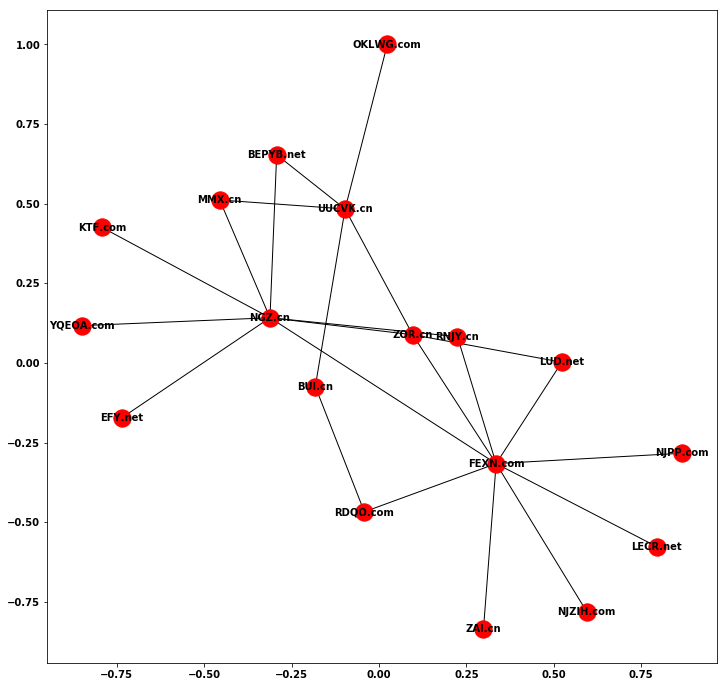

In [480]:
plt.figure(figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)
plt.show()

In [482]:
sorted(nx.pagerank(website_network).items(), key=lambda x: x[1], reverse=True)

[('FEXN.com', 0.19639142166779583),
 ('NGZ.cn', 0.15906242222784925),
 ('UUCVK.cn', 0.09848941636756374),
 ('ZOR.cn', 0.07618627884380438),
 ('BUI.cn', 0.05989527085971541),
 ('RDQO.com', 0.04199710479734521),
 ('MMX.cn', 0.041976133735566676),
 ('BEPYB.net', 0.041976133735566676),
 ('RNJY.cn', 0.0419266381651343),
 ('LUD.net', 0.04121648653374474),
 ('EFY.net', 0.025233329998428405),
 ('YQEOA.com', 0.025233329998428405),
 ('KTF.com', 0.025233329998428405),
 ('OKLWG.com', 0.02507613707047161),
 ('NJPP.com', 0.025026641500039234),
 ('ZAI.cn', 0.025026641500039234),
 ('NJZIH.com', 0.025026641500039234),
 ('LECR.net', 0.025026641500039234)]